# Predict AAPL Stock Close Price

## Compare the consequent wheather using some Technical Indicators
## Compare the consequent the price gap prediction and MinMAXScaler Price prediction

1.import data<br>
2.data cleaning<br>
3.add technical indicators<br>
4.technical indicators visualization<br>
5.technical indicators interpretation<br>
6.more feature engineering<br>
7.rebuild dataset, split train/val/test set<br>
8.create model(LSTM)<br>
9.train model, prediction<br>
10.compare prediction<br>
11.conclusion and future<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import copy
from tqdm import tqdm

In [2]:
data= pd.read_csv('AAPL_40.csv')

data['Date'] = pd.to_datetime(data['Date'])


In [3]:
data

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
...          ...         ...         ...         ...         ...         ...   
9999  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
10000 2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10001 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10002 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10003 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  
0      43971200.0  
1      26432000.0  
2      21610400.0  
3      18362400.0  
4      12157600.0  
...           ...  
9999   46975600.0  
10000  41486200.0  
10001  52520500.0  
10002  41352800.0  
10003  19322241.0  

[10004 rows x 7 columns]

# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10004 non-null  datetime64[ns]
 1   Open       10003 non-null  float64       
 2   High       10003 non-null  float64       
 3   Low        10003 non-null  float64       
 4   Close      10003 non-null  float64       
 5   Adj Close  10003 non-null  float64       
 6   Volume     10003 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 547.2 KB


In [5]:
data=data.reset_index(drop=True)

In [6]:
data[data.isnull().any(axis=1)]

Date  Open  High  Low  Close  Adj Close  Volume
164 1981-08-10   NaN   NaN  NaN    NaN        NaN     NaN

In [7]:
data=data.drop(index=164)
data=data.reset_index(drop=True)
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

In [8]:
data_dup=data.duplicated()
for i in tqdm(range(len(data_dup))) :
    if data_dup[i] == True:
        print(str(i)+'True')

100%|██████████| 10003/10003 [00:00<00:00, 77208.75it/s]


In [9]:
for i in tqdm(range(len(data))):
    if data['Open'].iloc[i]==0:
        print(str(i)+'Open')
    if data['High'].iloc[i]==0:
        print(str(i)+'High')
    if data['Low'].iloc[i]==0:
        print(str(i)+'Low')
    if data['Close'].iloc[i]==0:
        print(str(i)+'Close')
    if data['Volume'].iloc[i]==0:
        print(str(i)+'Volume')
    if data['Adj Close'].iloc[i]==0:
        print(str(i)+'Adj Close')

100%|██████████| 10003/10003 [00:00<00:00, 18611.81it/s]


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10003 non-null  datetime64[ns]
 1   Open       10003 non-null  float64       
 2   High       10003 non-null  float64       
 3   Low        10003 non-null  float64       
 4   Close      10003 non-null  float64       
 5   Adj Close  10003 non-null  float64       
 6   Volume     10003 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 547.2 KB


# copy 2 data one add Technical Indicators, one do nothing

In [11]:
data1=copy.deepcopy(data)
data2=copy.deepcopy(data)

# data 1

##  add technical indicators
 
### Stochastic Relative Strength Index (StoRSI) and RSI

In [12]:
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [13]:
data1['difference_1']=data1['Close']-data1['Close'].shift(1)
data1['difference_1']=data1['difference_1'].fillna(0)
data1['RSI_10']=data1['difference_1'].rolling(window=10).apply(rsi)
data1['RSI_10']=data1['RSI_10'].fillna(0)

data1.head()

Date      Open      High       Low     Close  Adj Close      Volume  \
0 1980-12-15  0.488839  0.488839  0.486607  0.486607   0.383825  43971200.0   
1 1980-12-16  0.453125  0.453125  0.450893  0.450893   0.355655  26432000.0   
2 1980-12-17  0.462054  0.464286  0.462054  0.462054   0.364458  21610400.0   
3 1980-12-18  0.475446  0.477679  0.475446  0.475446   0.375022  18362400.0   
4 1980-12-19  0.504464  0.506696  0.504464  0.504464   0.397911  12157600.0   

   difference_1  RSI_10  
0      0.000000     0.0  
1     -0.035714     0.0  
2      0.011161     0.0  
3      0.013392     0.0  
4      0.029018     0.0

In [14]:
data1['RSI_MAX']=data1['RSI_10'].rolling(window=10).max()
data1['RSI_MIN']=data1['RSI_10'].rolling(window=10).min()
data1['Sto_RSI']=(data1['RSI_10']-data1['RSI_MIN'])/(data1['RSI_MAX']-data1['RSI_MIN'])
data1[20:30]

Date      Open      High       Low     Close  Adj Close      Volume  \
20 1981-01-14  0.546875  0.549107  0.546875  0.546875   0.431363   3572800.0   
21 1981-01-15  0.558036  0.562500  0.558036  0.558036   0.440166   3516800.0   
22 1981-01-16  0.555804  0.555804  0.553571  0.553571   0.436645   3348800.0   
23 1981-01-19  0.587054  0.589286  0.587054  0.587054   0.463055  10393600.0   
24 1981-01-20  0.571429  0.571429  0.569196  0.569196   0.448970   7520800.0   
25 1981-01-21  0.580357  0.584821  0.580357  0.580357   0.457773   3976000.0   
26 1981-01-22  0.587054  0.591518  0.587054  0.587054   0.463055   8887200.0   
27 1981-01-23  0.587054  0.589286  0.584821  0.584821   0.461294   2805600.0   
28 1981-01-26  0.578125  0.578125  0.575893  0.575893   0.454252   6160000.0   
29 1981-01-27  0.575893  0.575893  0.571429  0.571429   0.450731   5924800.0   

    difference_1     RSI_10    RSI_MAX    RSI_MIN   Sto_RSI  
20      0.002232  42.805159  61.417809  42.805159  0.000000  
21      0.011161  42.307471  61.417809  42.307471  0.000000  
22     -0.004465  48.539895  61.417809  42.307471  0.326128  
23      0.033483  55.434791  57.391457  42.307471  0.870282  
24     -0.017858  57.954381  57.954381  42.307471  1.000000  
25      0.011161  60.000000  60.000000  42.307471  1.000000  
26      0.006697  57.142596  60.000000  42.307471  0.838497  
27     -0.002233  56.862521  60.000000  42.307471  0.822666  
28     -0.008928  54.716965  60.000000  42.307471  0.701397  
29     -0.004464  63.043182  63.043182  42.307471  1.000000

%K and %D

In [15]:
data1['K'] = ((data1['Close'] - data1['Low'].rolling(window=10).min())
              / (data1['High'].rolling(window=10).max()
                - data1['Low'].rolling(window=10).min())) *100

data1['D'] = data1['K'].rolling(window = 3).mean()

data1['K'].fillna(0)
data1['D'].fillna(0)

data1.tail()

Date        Open        High         Low       Close   Adj Close  \
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX    RSI_MIN   Sto_RSI  \
9998   46975600.0    -13.410004  47.539248  76.162704  47.539248  0.000000   
9999   41486200.0     14.540009  49.530137  76.162704  47.539248  0.069554   
10000  52520500.0      8.000000  50.396222  76.162704  47.539248  0.099812   
10001  41352800.0     -0.410004  50.544456  76.162704  47.539248  0.104991   
10002  19322241.0     -1.489990  55.168540  76.162704  47.539248  0.266540   

               K          D  
9998   75.664255  84.037084  
9999   93.206605  86.969872  
10000  93.215045  87.361968  
10001  86.073598  90.831749  
10002  79.837703  86.375449

### Chaikin Money Flow(CMF)

In [16]:
def CMF(data, days):
    CHMF = []
    MFMs = []
    MFVs = []
    x = days
    y = days
    
    while x < len(data['Date']):
        PeriodVolume = 0
        volRange = data['Volume'][x-days:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        
        MFM = ((data['Close'][x] - data['Low'][x]) - (data['High'][x] - data['Close'][x])) / (data['High'][x] - data['Low'][x])
        MFV = MFM*PeriodVolume
        
        MFMs.append(MFM)
        MFVs.append(MFV)
        x+=1
    
    while y < len(MFVs):
        PeriodVolume = 0
        volRange = data['Volume'][x-days:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        c_list = MFVs[y-days:y]
        tfsMFV = 0
        
        for eachMFV in c_list:
            tfsMFV += eachMFV
        
        tfsCMF = tfsMFV/PeriodVolume
        CHMF.append(tfsCMF)
        y+=1
    
    return CHMF

In [17]:
CHMF=CMF(data1,10)
print(len(CHMF))
print(data1.shape)

data1['CMF']=([0]*20)+CHMF

data1.tail()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


9983
(10003, 14)


Date        Open        High         Low       Close   Adj Close  \
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX    RSI_MIN   Sto_RSI  \
9998   46975600.0    -13.410004  47.539248  76.162704  47.539248  0.000000   
9999   41486200.0     14.540009  49.530137  76.162704  47.539248  0.069554   
10000  52520500.0      8.000000  50.396222  76.162704  47.539248  0.099812   
10001  41352800.0     -0.410004  50.544456  76.162704  47.539248  0.104991   
10002  19322241.0     -1.489990  55.168540  76.162704  47.539248  0.266540   

               K          D       CMF  
9998   75.664255  84.037084  2.115976  
9999   93.206605  86.969872  1.922949  
10000  93.215045  87.361968  2.349753  
10001  86.073598  90.831749  1.747140  
10002  79.837703  86.375449  2.206590

### Parabolic SAR(Stop And Reverse)

In [18]:
def pSAR(data, min_alpha=0.02, max_alpha=0.2):
    length=len(data)
    date=(data['Date'])
    high=(data['High'])
    low=(data['Low'])
    close=(data['Close'])
    psar=copy.deepcopy(data['Close'][0:])
    psarbull = [None] * length
    psarbear = [None] * length
    bull = True
    af = min_alpha
    ep = data['Low'][0]
    hp = data['High'][0]
    lp = data['Low'][0]
    
    for i in tqdm(range(2,length)):
        if bull:
            psar[i] = psar[i - 1] + af * (hp - psar[i - 1])
        else:
            psar[i] = psar[i - 1] + af * (lp - psar[i - 1])
        reverse = False
        if bull:
            if data['Low'][i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = data['Low'][i]
                af = min_alpha
        else:
            if data['High'][i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = data['High'][i]
                af = min_alpha
        if not reverse:
            if bull:
                if data['High'][i] > hp:
                    hp = data['High'][i]
                    af = min(af + min_alpha, max_alpha)
                if data['Low'][i - 1] < psar[i]:
                    psar[i] = data['Low'][i - 1]
                if data['Low'][i - 2] < psar[i]:
                    psar[i] = data['Low'][i - 2]
            else:
                if data['Low'][i] < lp:
                    lp = data['Low'][i]
                    af = min(af + min_alpha, max_alpha)
                if data['High'][i - 1] > psar[i]:
                    psar[i] = data['High'][i - 1]
                if data['High'][i - 2] > psar[i]:
                    psar[i] = data['High'][i - 2]
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]
        
        data['pSAR'] = psar

In [19]:
pSAR(data1)

data1.tail()

100%|██████████| 10001/10001 [00:02<00:00, 3994.33it/s]


Date        Open        High         Low       Close   Adj Close  \
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX    RSI_MIN   Sto_RSI  \
9998   46975600.0    -13.410004  47.539248  76.162704  47.539248  0.000000   
9999   41486200.0     14.540009  49.530137  76.162704  47.539248  0.069554   
10000  52520500.0      8.000000  50.396222  76.162704  47.539248  0.099812   
10001  41352800.0     -0.410004  50.544456  76.162704  47.539248  0.104991   
10002  19322241.0     -1.489990  55.168540  76.162704  47.539248  0.266540   

               K          D       CMF        pSAR  
9998   75.664255  84.037084  2.115976  383.331536  
9999   93.206605  86.969872  1.922949  387.790644  
10000  93.215045  87.361968  2.349753  391.982205  
10001  86.073598  90.831749  1.747140  397.757229  
10002  79.837703  86.375449  2.206590  403.070252

### Rate of Change

In [20]:
data1['ROC']=((data1['Close']-data1['Close'].shift(10))/(data1['Close'].shift(10)))*100
data1=data1.fillna(0)
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX    RSI_MIN   Sto_RSI  \
0      43971200.0      0.000000   0.000000   0.000000   0.000000  0.000000   
1      26432000.0     -0.035714   0.000000   0.000000   0.000000  0.000000   
2      21610400.0      0.011161   0.000000   0.000000   0.000000  0.000000   
3      18362400.0      0.013392   0.000000   0.000000   0.000000  0.000000   
4      12157600.0      0.029018   0.000000   0.000000   0.000000  0.000000   
9998   46975600.0    -13.410004  47.539248  76.162704  47.539248  0.000000   
9999   41486200.0     14.540009  49.530137  76.162704  47.539248  0.069554   
10000  52520500.0      8.000000  50.396222  76.162704  47.539248  0.099812   
10001  41352800.0     -0.410004  50.544456  76.162704  47.539248  0.104991   
10002  19322241.0     -1.489990  55.168540  76.162704  47.539248  0.266540   

               K          D       CMF        pSAR        ROC  
0       0.000000   0.000000  0.000000    0.486607   0.000000  
1       0.000000   0.000000  0.000000    0.450893   0.000000  
2       0.000000   0.000000  0.000000    0.450893   0.000000  
3       0.000000   0.000000  0.000000    0.450893   0.000000  
4       0.000000   0.000000  0.000000    0.451652   0.000000  
9998   75.664255  84.037084  2.115976  383.331536  17.289078  
9999   93.206605  86.969872  1.922949  387.790644  18.907829  
10000  93.215045  87.361968  2.349753  391.982205  19.565443  
10001  86.073598  90.831749  1.747140  397.757229   8.138056  
10002  79.837703  86.375449  2.206590  403.070252   5.138271

### Volume Weighted Average Price (VWAP)

In [21]:
data1['VWAP']=np.cumsum(data1['Volume']*(data1['High']-data1['Low'])/2)/np.cumsum(data1['Volume'])
data1=data1.fillna(0)

data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX    RSI_MIN   Sto_RSI  \
0      43971200.0      0.000000   0.000000   0.000000   0.000000  0.000000   
1      26432000.0     -0.035714   0.000000   0.000000   0.000000  0.000000   
2      21610400.0      0.011161   0.000000   0.000000   0.000000  0.000000   
3      18362400.0      0.013392   0.000000   0.000000   0.000000  0.000000   
4      12157600.0      0.029018   0.000000   0.000000   0.000000  0.000000   
9998   46975600.0    -13.410004  47.539248  76.162704  47.539248  0.000000   
9999   41486200.0     14.540009  49.530137  76.162704  47.539248  0.069554   
10000  52520500.0      8.000000  50.396222  76.162704  47.539248  0.099812   
10001  41352800.0     -0.410004  50.544456  76.162704  47.539248  0.104991   
10002  19322241.0     -1.489990  55.168540  76.162704  47.539248  0.266540   

               K          D       CMF        pSAR        ROC      VWAP  
0       0.000000   0.000000  0.000000    0.486607   0.000000  0.001116  
1       0.000000   0.000000  0.000000    0.450893   0.000000  0.001116  
2       0.000000   0.000000  0.000000    0.450893   0.000000  0.001116  
3       0.000000   0.000000  0.000000    0.450893   0.000000  0.001116  
4       0.000000   0.000000  0.000000    0.451652   0.000000  0.001116  
9998   75.664255  84.037084  2.115976  383.331536  17.289078  0.352566  
9999   93.206605  86.969872  1.922949  387.790644  18.907829  0.352838  
10000  93.215045  87.361968  2.349753  391.982205  19.565443  0.353076  
10001  86.073598  90.831749  1.747140  397.757229   8.138056  0.353249  
10002  79.837703  86.375449  2.206590  403.070252   5.138271  0.353337

 Momentum 10Days

In [22]:
data1['Momentum_10']=data1['Close']-data1['Close'].shift(10)
data1['Momentum_10']=data1['Momentum_10'].fillna(0)

data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX    RSI_MIN   Sto_RSI  \
0      43971200.0      0.000000   0.000000   0.000000   0.000000  0.000000   
1      26432000.0     -0.035714   0.000000   0.000000   0.000000  0.000000   
2      21610400.0      0.011161   0.000000   0.000000   0.000000  0.000000   
3      18362400.0      0.013392   0.000000   0.000000   0.000000  0.000000   
4      12157600.0      0.029018   0.000000   0.000000   0.000000  0.000000   
9998   46975600.0    -13.410004  47.539248  76.162704  47.539248  0.000000   
9999   41486200.0     14.540009  49.530137  76.162704  47.539248  0.069554   
10000  52520500.0      8.000000  50.396222  76.162704  47.539248  0.099812   
10001  41352800.0     -0.410004  50.544456  76.162704  47.539248  0.104991   
10002  19322241.0     -1.489990  55.168540  76.162704  47.539248  0.266540   

               K          D       CMF        pSAR        ROC      VWAP  \
0       0.000000   0.000000  0.000000    0.486607   0.000000  0.001116   
1       0.000000   0.000000  0.000000    0.450893   0.000000  0.001116   
2       0.000000   0.000000  0.000000    0.450893   0.000000  0.001116   
3       0.000000   0.000000  0.000000    0.450893   0.000000  0.001116   
4       0.000000   0.000000  0.000000    0.451652   0.000000  0.001116   
9998   75.664255  84.037084  2.115976  383.331536  17.289078  0.352566   
9999   93.206605  86.969872  1.922949  387.790644  18.907829  0.352838   
10000  93.215045  87.361968  2.349753  391.982205  19.565443  0.353076   
10001  86.073598  90.831749  1.747140  397.757229   8.138056  0.353249   
10002  79.837703  86.375449  2.206590  403.070252   5.138271  0.353337   

       Momentum_10  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000  
9998     64.489990  
9999     71.880005  
10000    75.279999  
10001    34.589996  
10002    22.390015

### Moving Average Convergence Divergence(MACD)

In [23]:
data1['26_ema'] = data1['Close'].ewm(span=26,min_periods=0,adjust=False,ignore_na=False).mean()
data1['12_ema'] = data1['Close'].ewm(span=12,min_periods=0,adjust=False,ignore_na=False).mean()
data1['DIF'] = data1['12_ema'] - data1['26_ema']
data1['MACD'] = data1['DIF'].ewm(span=9, min_periods=0, adjust=False, ignore_na=False).mean()
data1['hist']=data1['DIF']-data1['MACD']
data1 = data1.fillna(0)


### Average Directional Movement Index (ADX)

In [24]:
def ADX(data, days):
    data['UpMove'] = data['High'] - data['High'].shift(1)
    data['DownMove'] = data['Low'].shift(1) - data['Low']
    data['Zero'] = 0

    data['PDM'] = np.where((data['UpMove'] > data['DownMove']) & (data['UpMove'] > data['Zero']), data['UpMove'], 0)
    data['NDM'] = np.where((data['UpMove'] < data['DownMove']) & (data['DownMove'] > data['Zero']), data['DownMove'], 0)

    data['HL'] = data['High'] - data['Low']
    data['absHC'] = abs(data['High'] - data['Close'].shift(1))
    data['absLC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['HL','absHC','absLC']].max(axis=1)
    data['ATR'] = data['TR'].rolling(window=10).mean()
    
    data['PDI'] = 100 * (data['PDM']/data['ATR']).ewm(span=days,min_periods=0,adjust=True,ignore_na=False).mean()
    data['NDI'] = 100 * (data['NDM']/data['ATR']).ewm(span=days,min_periods=0,adjust=True,ignore_na=False).mean()

    data['ADX'] = 100 * (abs((data['PDI'] - data['NDI'])/(data['PDI'] + data['NDI']))).ewm(span=days,min_periods=0,adjust=True,ignore_na=False).mean()
    
    

In [25]:
ADX(data1, 10)
data1=data1.fillna(0)
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX  ...        PDM  \
0      43971200.0      0.000000   0.000000   0.000000  ...   0.000000   
1      26432000.0     -0.035714   0.000000   0.000000  ...   0.000000   
2      21610400.0      0.011161   0.000000   0.000000  ...   0.011161   
3      18362400.0      0.013392   0.000000   0.000000  ...   0.013393   
4      12157600.0      0.029018   0.000000   0.000000  ...   0.029017   
9998   46975600.0    -13.410004  47.539248  76.162704  ...   0.000000   
9999   41486200.0     14.540009  49.530137  76.162704  ...   3.170013   
10000  52520500.0      8.000000  50.396222  76.162704  ...  11.070007   
10001  41352800.0     -0.410004  50.544456  76.162704  ...   0.000000   
10002  19322241.0     -1.489990  55.168540  76.162704  ...   4.350006   

            NDM         HL      absHC      absLC         TR        ATR  \
0      0.000000   0.002232   0.000000   0.000000   0.002232   0.000000   
1      0.035714   0.002232   0.033482   0.035714   0.035714   0.000000   
2      0.000000   0.002232   0.013393   0.011161   0.013393   0.000000   
3      0.000000   0.002233   0.015625   0.013392   0.015625   0.000000   
4      0.000000   0.002232   0.031250   0.029018   0.031250   0.000000   
9998   3.570007  13.500000   0.980011  14.480011  14.480011  15.850998   
9999   0.000000  11.910004  15.600006   3.690002  15.600006  16.619998   
10000  0.000000   8.460022  12.130004   3.669982  12.130004  16.820999   
10001  3.529998   7.820007   0.040009   7.860016   7.860016  13.517001   
10002  0.000000   8.490021   4.720001   3.770020   8.490021  12.215006   

             PDI        NDI        ADX  
0       0.000000   0.000000   0.000000  
1       0.000000   0.000000   0.000000  
2       0.000000   0.000000   0.000000  
3       0.000000   0.000000   0.000000  
4       0.000000   0.000000   0.000000  
9998   37.749948   9.830036  61.677008  
9999   34.354228   8.042757  61.746601  
10000  40.073575   6.580438  63.572760  
10001  32.787471  10.132221  61.611387  
10002  33.301019   8.289999  61.343068  

[10 rows x 37 columns]

### Williams %R

In [26]:
def WilliamsR(data):
    highest_high = data['High'].rolling(window=10,center=False).max()
    lowest_low = data['Low'].rolling(window=10,center=False).min()
    data['WilliamsR'] = (100) * ((highest_high - data['Close']) / (highest_high - lowest_low))

In [27]:
WilliamsR(data1)
data1=data1.fillna(0)
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX  ...       NDM  \
0      43971200.0      0.000000   0.000000   0.000000  ...  0.000000   
1      26432000.0     -0.035714   0.000000   0.000000  ...  0.035714   
2      21610400.0      0.011161   0.000000   0.000000  ...  0.000000   
3      18362400.0      0.013392   0.000000   0.000000  ...  0.000000   
4      12157600.0      0.029018   0.000000   0.000000  ...  0.000000   
9998   46975600.0    -13.410004  47.539248  76.162704  ...  3.570007   
9999   41486200.0     14.540009  49.530137  76.162704  ...  0.000000   
10000  52520500.0      8.000000  50.396222  76.162704  ...  0.000000   
10001  41352800.0     -0.410004  50.544456  76.162704  ...  3.529998   
10002  19322241.0     -1.489990  55.168540  76.162704  ...  0.000000   

              HL      absHC      absLC         TR        ATR        PDI  \
0       0.002232   0.000000   0.000000   0.002232   0.000000   0.000000   
1       0.002232   0.033482   0.035714   0.035714   0.000000   0.000000   
2       0.002232   0.013393   0.011161   0.013393   0.000000   0.000000   
3       0.002233   0.015625   0.013392   0.015625   0.000000   0.000000   
4       0.002232   0.031250   0.029018   0.031250   0.000000   0.000000   
9998   13.500000   0.980011  14.480011  14.480011  15.850998  37.749948   
9999   11.910004  15.600006   3.690002  15.600006  16.619998  34.354228   
10000   8.460022  12.130004   3.669982  12.130004  16.820999  40.073575   
10001   7.820007   0.040009   7.860016   7.860016  13.517001  32.787471   
10002   8.490021   4.720001   3.770020   8.490021  12.215006  33.301019   

             NDI        ADX  WilliamsR  
0       0.000000   0.000000   0.000000  
1       0.000000   0.000000   0.000000  
2       0.000000   0.000000   0.000000  
3       0.000000   0.000000   0.000000  
4       0.000000   0.000000   0.000000  
9998    9.830036  61.677008  24.335745  
9999    8.042757  61.746601   6.793395  
10000   6.580438  63.572760   6.784955  
10001  10.132221  61.611387  13.926402  
10002   8.289999  61.343068  20.162297  

[10 rows x 38 columns]

### The Ichimoku Cloud
 
Conversion Line<br>
Base Line<br>
Leading Span A<br>
Leading Span B<br>
Cloud(Leading Span A, Leading Span B)<br>


In [28]:
data1['CLine']=(data1['Close'].rolling(window=9).max()+data1['Close'].rolling(window=9).min())/2
data1['BLine']=(data1['Close'].rolling(window=26).max()+data1['Close'].rolling(window=26).min())/2
data1['LSA']=(data1['CLine']+data1['BLine'])/2
data1['LSB']=(data1['Close'].rolling(window=52).max()+data1['Close'].rolling(window=52).min())/2
data1=data1.fillna(0)
data1['Red_Green_Cloud']=np.where(data1['LSA']<data1['LSB'].shift(1),1,-1)


### Bollinger Bands

In [29]:
data1['MA']=data1['Close'].rolling(window=10).mean()
data1['BOLU']=data1['MA']+1.5*(data1['Close'].rolling(window=10).std())
data1['BOLD']=data1['MA']-1.5*(data1['Close'].rolling(window=10).std())

### Trend UP/DOWN

In [30]:
data1['Trend_Stock']=np.where(data1['Close']>data1['Close'].shift(1),1,-1)
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX  ...  WilliamsR  \
0      43971200.0      0.000000   0.000000   0.000000  ...   0.000000   
1      26432000.0     -0.035714   0.000000   0.000000  ...   0.000000   
2      21610400.0      0.011161   0.000000   0.000000  ...   0.000000   
3      18362400.0      0.013392   0.000000   0.000000  ...   0.000000   
4      12157600.0      0.029018   0.000000   0.000000  ...   0.000000   
9998   46975600.0    -13.410004  47.539248  76.162704  ...  24.335745   
9999   41486200.0     14.540009  49.530137  76.162704  ...   6.793395   
10000  52520500.0      8.000000  50.396222  76.162704  ...   6.784955   
10001  41352800.0     -0.410004  50.544456  76.162704  ...  13.926402   
10002  19322241.0     -1.489990  55.168540  76.162704  ...  20.162297   

            CLine       BLine         LSA         LSB  Red_Green_Cloud  \
0        0.000000    0.000000    0.000000    0.000000               -1   
1        0.000000    0.000000    0.000000    0.000000               -1   
2        0.000000    0.000000    0.000000    0.000000               -1   
3        0.000000    0.000000    0.000000    0.000000               -1   
4        0.000000    0.000000    0.000000    0.000000               -1   
9998   420.184998  413.034988  416.609993  386.774993               -1   
9999   440.324997  413.034988  426.679992  388.729995               -1   
10000  447.895005  415.250000  431.572502  391.180008               -1   
10001  448.770005  415.250000  432.010002  391.180008               -1   
10002  448.770005  415.250000  432.010002  391.180008               -1   

               MA        BOLU        BOLD  Trend_Stock  
0             NaN         NaN         NaN           -1  
1             NaN         NaN         NaN           -1  
2             NaN         NaN         NaN            1  
3             NaN         NaN         NaN            1  
4             NaN         NaN         NaN            1  
9998   429.309003  468.429911  390.188095           -1  
9999   436.497003  466.936216  406.057790            1  
10000  444.025003  459.970470  428.079537            1  
10001  447.484003  461.452458  433.515548           -1  
10002  449.723004  463.010248  436.435760           -1  

[10 rows x 47 columns]

In [31]:
data1['Trend_V']=np.where(data1['Volume']>data1['Volume'].shift(1),1,-1)
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX  ...       CLine  \
0      43971200.0      0.000000   0.000000   0.000000  ...    0.000000   
1      26432000.0     -0.035714   0.000000   0.000000  ...    0.000000   
2      21610400.0      0.011161   0.000000   0.000000  ...    0.000000   
3      18362400.0      0.013392   0.000000   0.000000  ...    0.000000   
4      12157600.0      0.029018   0.000000   0.000000  ...    0.000000   
9998   46975600.0    -13.410004  47.539248  76.162704  ...  420.184998   
9999   41486200.0     14.540009  49.530137  76.162704  ...  440.324997   
10000  52520500.0      8.000000  50.396222  76.162704  ...  447.895005   
10001  41352800.0     -0.410004  50.544456  76.162704  ...  448.770005   
10002  19322241.0     -1.489990  55.168540  76.162704  ...  448.770005   

            BLine         LSA         LSB  Red_Green_Cloud          MA  \
0        0.000000    0.000000    0.000000               -1         NaN   
1        0.000000    0.000000    0.000000               -1         NaN   
2        0.000000    0.000000    0.000000               -1         NaN   
3        0.000000    0.000000    0.000000               -1         NaN   
4        0.000000    0.000000    0.000000               -1         NaN   
9998   413.034988  416.609993  386.774993               -1  429.309003   
9999   413.034988  426.679992  388.729995               -1  436.497003   
10000  415.250000  431.572502  391.180008               -1  444.025003   
10001  415.250000  432.010002  391.180008               -1  447.484003   
10002  415.250000  432.010002  391.180008               -1  449.723004   

             BOLU        BOLD  Trend_Stock  Trend_V  
0             NaN         NaN           -1       -1  
1             NaN         NaN           -1       -1  
2             NaN         NaN            1       -1  
3             NaN         NaN            1       -1  
4             NaN         NaN            1       -1  
9998   468.429911  390.188095           -1       -1  
9999   466.936216  406.057790            1       -1  
10000  459.970470  428.079537            1        1  
10001  461.452458  433.515548           -1       -1  
10002  463.010248  436.435760           -1       -1  

[10 rows x 48 columns]

## Visualization

In [32]:
plt.figure(figsize=(16,8))
plt.title("Close of AAPL")
plt.plot(data1['Date'],data1['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.show()

In [33]:
plt.figure(figsize=(16,8))
plt.title("RSI of AAPL")
plt.plot(data1['Date'],data1['RSI_10'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('RSI',fontsize=18)
plt.show()

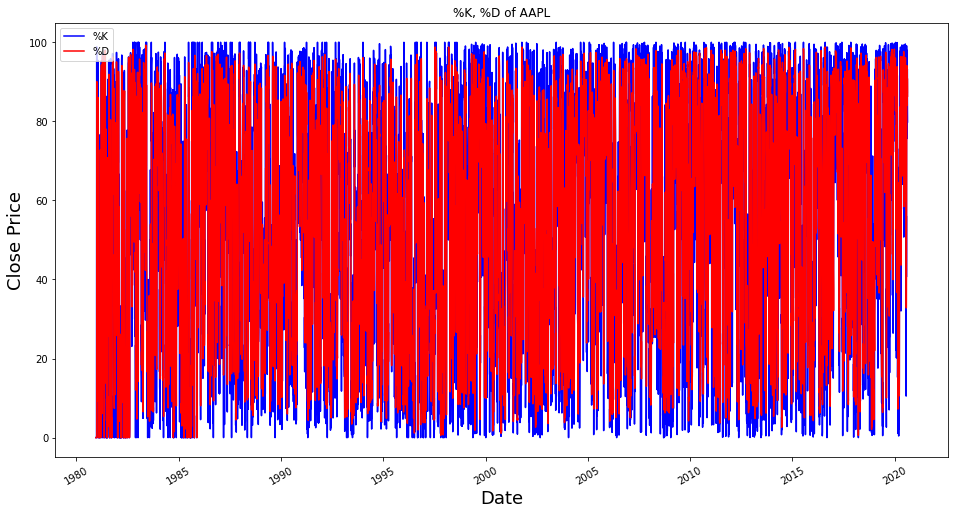

In [34]:
plt.figure(figsize=(16,8))
plt.title("%K, %D of AAPL")
plt.plot(data1['Date'], data1['K'], 'blue', label="%K")
plt.plot(data1['Date'], data1['D'], 'red', label="%D")
#plt.plot(data1['Date'], data1['Close'], color='black', lw=2, label = "Close")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['%K','%D'],loc='upper left')
plt.show()

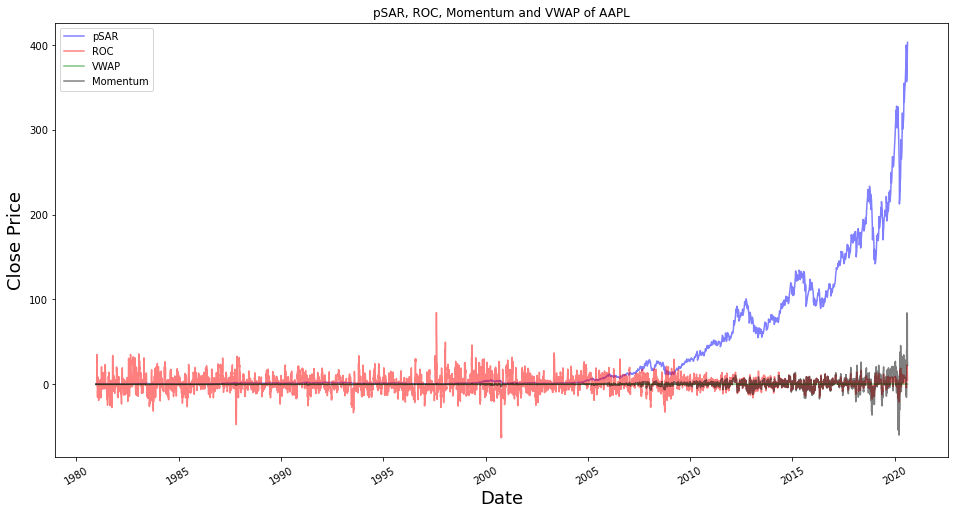

In [35]:
plt.figure(figsize=(16,8))
plt.title("pSAR, ROC, Momentum and VWAP of AAPL")
plt.plot(data1['Date'], data1['pSAR'], 'blue', label="pSAR",alpha = 0.5)
plt.plot(data1['Date'], data1['ROC'], 'red', label="ROC",alpha = 0.5)
plt.plot(data1['Date'], data1['VWAP'], 'green', label="VWAP",alpha = 0.5)
plt.plot(data1['Date'], data1['Momentum_10'], 'black', label="Momentum",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['pSAR','ROC','VWAP','Momentum'],loc='upper left')
plt.show()

In [36]:
plt.figure(figsize=(16,8))
plt.title("pSAR of AAPL")
plt.plot(data1['Date'][-10:], data1['pSAR'][-10:], 'blue', label="pSAR",alpha = 0.5)
plt.plot(data1['Date'][-10:], data1['Close'][-10:], 'red', label="Close",alpha = 0.5)

plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['pSAR','Close'],loc='upper left')
plt.show()

In [37]:
plt.figure(figsize=(16,8))
plt.title("ROC of AAPL")
plt.plot(data1['Date'][5000:5050], data1['ROC'][5000:5050], 'blue', label="ROC",alpha = 0.5)
plt.plot(data1['Date'][5000:5050], data1['Close'][5000:5050], 'red', label="Close",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['ROC','Close'],loc='upper left')
plt.show()

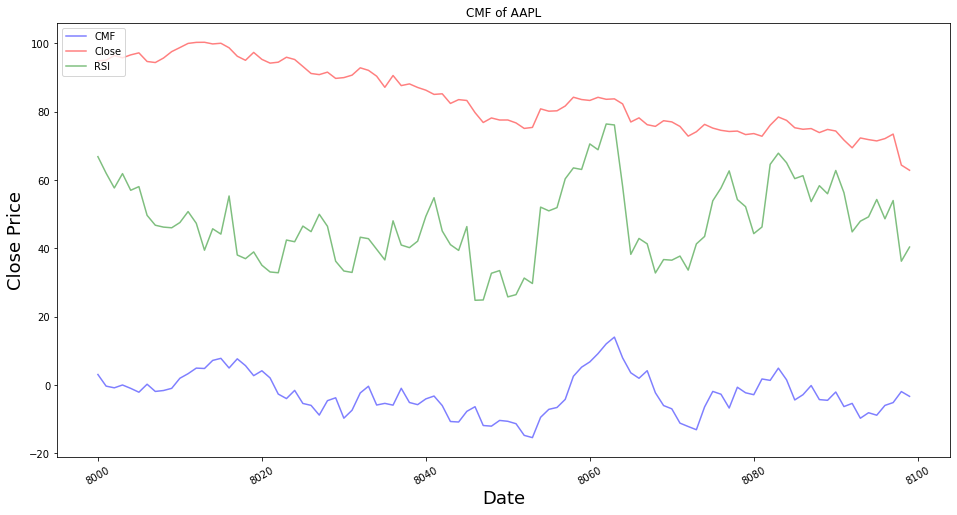

In [38]:
plt.figure(figsize=(16,8))
plt.title("CMF of AAPL")
plt.plot(data1['CMF'][8000:8100], 'blue', label="CMF",alpha = 0.5)
plt.plot(data1['Close'][8000:8100], 'red', label="Close",alpha = 0.5)
plt.plot(data1['RSI_10'][8000:8100], 'green', label="RSI",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['CMF','Close','RSI'],loc='upper left')
plt.show()

In [39]:
plt.figure(figsize=(16,8))
plt.title("MACD/ADX of AAPL")
plt.plot(data1['MACD'], 'blue', label="MACD",alpha = 0.5)
plt.plot(data1['ADX'], 'green', label="ADX",alpha = 0.5)
plt.plot(data1['Close'], 'red', label="Close",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['MACD','ADX','Close'],loc='upper left')
plt.show()

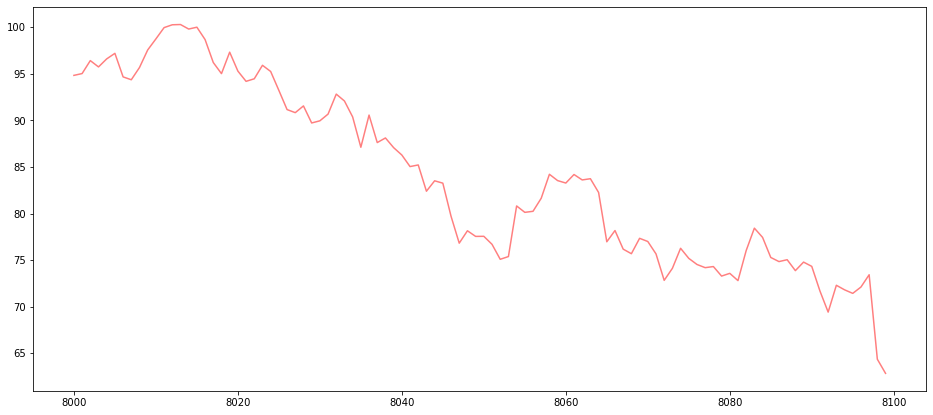

In [40]:
plt.figure(figsize=(16,24))
plt.subplot(311)
plt.bar(np.arange(8000,8100),data1['hist'][8000:8100].values)
plt.show()

plt.figure(figsize=(16,24))
plt.subplot(312)
plt.title("MACD of AAPL")
plt.plot(data1['DIF'][8000:8100], 'green', label="DIF",alpha = 0.5)
plt.plot(data1['MACD'][8000:8100], 'blue', label="MACD",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['DIF','MACD'],loc='upper right')
plt.show()

plt.figure(figsize=(16,24))
plt.subplot(313)
plt.plot(data1['Close'][8000:8100], 'red', label="Close",alpha = 0.5)
plt.show()

In [41]:
plt.figure(figsize=(16,8))
plt.title("RSI of AAPL")
plt.plot(data1['RSI_10'][8000:8100], 'blue', label="RSI",alpha = 0.5)
plt.plot(data1['Close'][8000:8100], 'red', label="Close",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['RSI','Close'],loc='upper left')
plt.show()

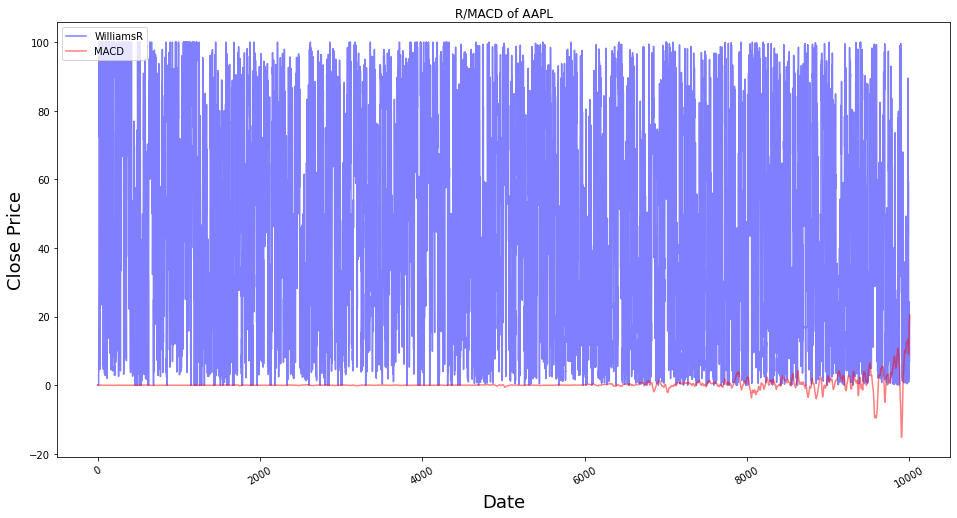

In [42]:
plt.figure(figsize=(16,8))
plt.title("R/MACD of AAPL")
plt.plot(data1['WilliamsR'], 'blue', label="WilliamsR",alpha = 0.5)
plt.plot(data1['MACD'], 'red', label="MACD",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['WilliamsR','MACD'],loc='upper left')
plt.show()

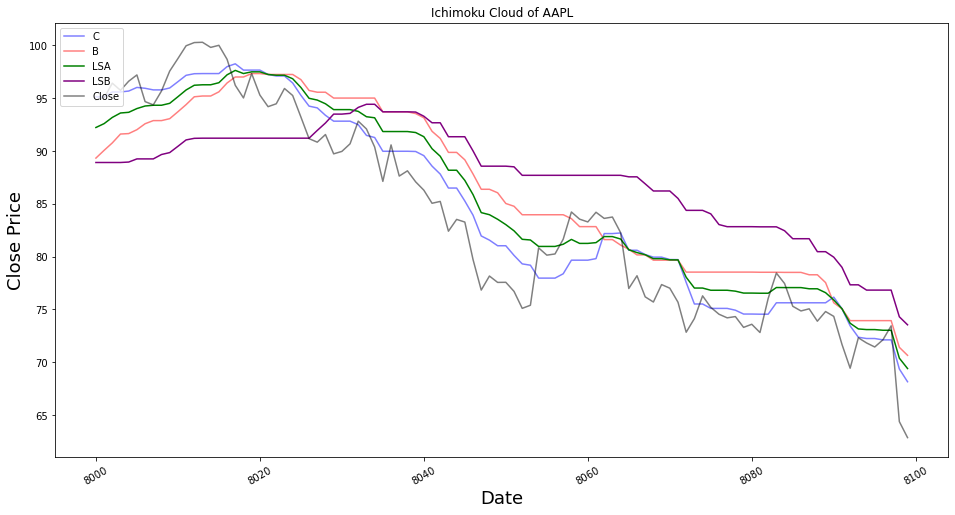

In [43]:
plt.figure(figsize=(16,8))
plt.title("Ichimoku Cloud of AAPL")
plt.plot(data1['CLine'][8000:8100], 'blue', label="C",alpha = 0.5)
plt.plot(data1['BLine'][8000:8100], 'red', label="B",alpha = 0.5)
plt.plot(data1['LSA'][8000:8100], 'green', label="LSA",alpha = 1)
plt.plot(data1['LSB'][8000:8100], 'purple', label="LSB",alpha = 1)
plt.plot(data1['Close'][8000:8100], 'black', label="LSB",alpha = 0.5)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.xticks(rotation=30)
plt.legend(['C','B','LSA','LSB','Close'],loc='upper left')
plt.show()

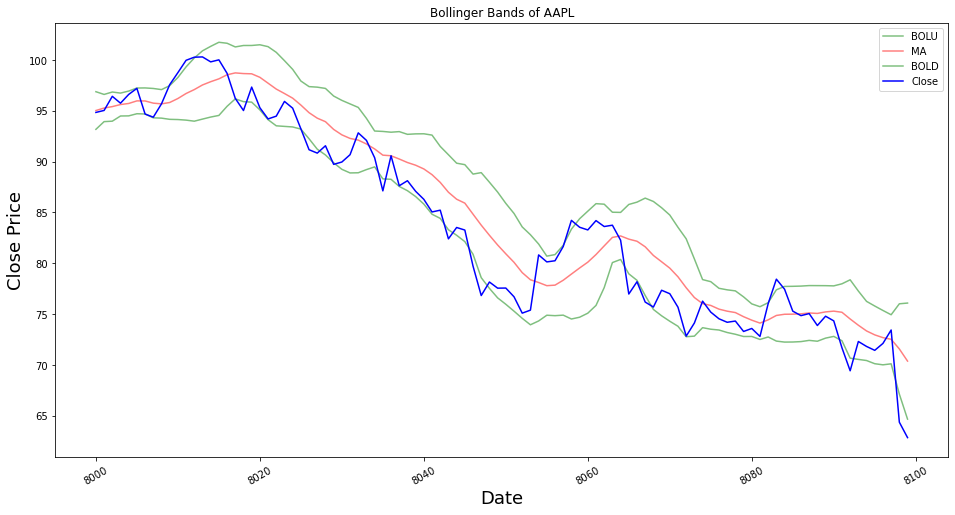

In [44]:
plt.figure(figsize=(16,8))
plt.title("Bollinger Bands of AAPL")
plt.plot(data1['BOLU'][8000:8100], 'green', label="BOLU",alpha = 0.5)
plt.plot(data1['MA'][8000:8100], 'red', label="MA",alpha = 0.5)
plt.plot(data1['BOLD'][8000:8100], 'green', label="BOLD",alpha = 0.5)
plt.plot(data1['Close'][8000:8100], 'blue', label="close",alpha = 1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend(['BOLU','MA','BOLD','Close'],loc='upper right')
plt.xticks(rotation=30)

plt.show()

# More feature engineering

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             10003 non-null  datetime64[ns]
 1   Open             10003 non-null  float64       
 2   High             10003 non-null  float64       
 3   Low              10003 non-null  float64       
 4   Close            10003 non-null  float64       
 5   Adj Close        10003 non-null  float64       
 6   Volume           10003 non-null  float64       
 7   difference_1     10003 non-null  float64       
 8   RSI_10           10003 non-null  float64       
 9   RSI_MAX          10003 non-null  float64       
 10  RSI_MIN          10003 non-null  float64       
 11  Sto_RSI          10003 non-null  float64       
 12  K                10003 non-null  float64       
 13  D                10003 non-null  float64       
 14  CMF              10003 non-null  float

## The interpretations for technical indicatiors

In [46]:
B_S=[]
RS=[]
S_R=[]
K_=[]
R_=[]
M_D=[]
M_D.append(0)
D_D=[]
D_D.append(0)
A_D=[]
R_C=[]
PN_DI=[]
P_C=[]
C_R=[]
Cloud=[]
Cloud.append(0)
BOL=[]
HMACD=[]
HMACD.append(1)

for i in tqdm(range(len(data1))):
    if data1['RSI_10'].iloc[i]>=80:
        B_S.append(-1)
    elif data1['RSI_10'].iloc[i]<=20 and data1['RSI_10'].iloc[i]>0:
        B_S.append(1)
    elif data1['RSI_10'].iloc[i]==0:
        B_S.append(0)
    else:
        B_S.append(0)
    
    if data1['RSI_10'].iloc[i]>50:
        RS.append(1)
    else:
        RS.append(-1)
        
    if data1['Sto_RSI'].iloc[i]>=0.80:
        S_R.append(-1)
    elif data1['Sto_RSI'].iloc[i]<=0.20 and data1['Sto_RSI'].iloc[i]>0.0:
        S_R.append(1)
    elif data1['Sto_RSI'].iloc[i]==0.0:
        S_R.append(0)
    else:
        S_R.append(0)
    
    if data1['K'].iloc[i]>=80:
        K_.append(-1)
    elif data1['K'].iloc[i]<=20 and data1['K'].iloc[i]>0:
        K_.append(11)
    elif data1['K'].iloc[i]==0:
        K_.append(0)
    else:
        K_.append(0)
    if data1['WilliamsR'].iloc[i]<20:
        R_.append(-1)
    elif data1['WilliamsR'].iloc[i]>80:
        R_.append(1)
    else:
        R_.append(0)
    
    
    if i != 0 :
        if data1['hist'].iloc[i-1]<data1['hist'].iloc[i]:
            HMACD.append(1)
        else:
            HMACD.append(-1)
        if data1['hist'].iloc[i-1]<0 and data1['hist'].iloc[i]>=0:
            D_D.append(1)
        elif data1['hist'].iloc[i-1]>0 and data1['hist'].iloc[i]<=0:
            D_D.append(-1)
        else:
            D_D.append(0)
        if  data1['MACD'].iloc[i]>0:
            M_D.append(1)
        elif  data1['MACD'].iloc[i]<0:
            M_D.append(-1)
        else:
            M_D.append(0)
            
        #Ichimoku Cloud
        #Conversion-Base Line Signals
        #Green Cloud, Close Price bigger than LSA, Conversion Line cross Base Line and bigger than Base Line
        #Occurr bullish signal
        #Red Cloud, Close Price smaller than LSA, Conversion Line cross Base Line and smaller than Base Line
        #Occurr bearish signal
        if data1['Red_Green_Cloud'].iloc[i]==-1:
            if data1['Close'].iloc[i]>data1['LSA'].iloc[i]:
                if data1['CLine'].iloc[i-1]<data1['BLine'].iloc[i-1] and data1['CLine'].iloc[i]>=data1['BLine'].iloc[i]:
                    Cloud.append(1)
                else:
                    Cloud.append(0)
            else:
                Cloud.append(0)
        elif data1['Red_Green_Cloud'].iloc[i]==1:
            if data1['Close'].iloc[i]<data1['LSA'].iloc[i]:
                if data1['CLine'].iloc[i-1]>data1['BLine'].iloc[i-1] and data1['CLine'].iloc[i]<=data1['BLine'].iloc[i]:
                    Cloud.append(-1)
                else:
                    Cloud.append(0)
            else:
                Cloud.append(0)
        
        
            
    if data1['PDI'].iloc[i]>data1['NDI'].iloc[i]:
        PN_DI.append(1)
    else:
        PN_DI.append(-1)
    
    if data1['ADX'].iloc[i]>30 and data1['ADX'].iloc[i]<=50:
        A_D.append(0)
    elif data1['ADX'].iloc[i]>50:
        A_D.append(1)
    elif data1['ADX'].iloc[i]<=30:
        A_D.append(-1)
    if data1['ROC'].iloc[i]>0:
        R_C.append(1)
    else:
        R_C.append(-1)
    if data1['pSAR'].iloc[i]<data1['Close'].iloc[i]:
        P_C.append(1)
    else:
        P_C.append(-1)
    
    if data1['CMF'].iloc[i]>0 and data1['RSI_10'].iloc[i]>50:
        C_R.append(1)
    elif data1['CMF'].iloc[i]<0 and data1['RSI_10'].iloc[i]<45:
        C_R.append(-1)
    else:
        C_R.append(0)
    
    if i < len(data1)-1:
        if data1['Close'].iloc[i]<=data1['BOLU'].iloc[i] and data1['Close'].iloc[i+1]>data1['BOLU'].iloc[i+1]:
            BOL.append(1)
        elif data1['Close'].iloc[i]>=data1['BOLD'].iloc[i] and data1['Close'].iloc[i+1]<data1['BOLD'].iloc[i+1]:
            BOL.append(-1)
        else:
            BOL.append(0)
    
    
            
    
    
BOL.append(0)    


              
data1['B_S']=B_S 
data1['RS']=RS
data1['S_R']=S_R
data1['K_']=K_
data1['R_']=R_
data1['M_D']=M_D
data1['D_D']=D_D
data1['A_D']=A_D
data1['R_C']=R_C
data1['PN_DI']=PN_DI
data1['P_C']=P_C
data1['C_R']=C_R
data1['Cloud']=Cloud
data1['BOL']=BOL
data1['HMACD']=HMACD

100%|██████████| 10003/10003 [00:03<00:00, 2882.95it/s]


In [47]:
data1[['B_S','K_','R_','D_D','Trend_Stock','R_C','M_D','PN_DI','S_R','A_D','P_C','C_R','BOL','HMACD']][7000:]

B_S  K_  R_  D_D  Trend_Stock  R_C  M_D  PN_DI  S_R  A_D  P_C  C_R  \
7000     0  11   1    0           -1   -1   -1     -1    0    1   -1   -1   
7001     1   0   1    0           -1   -1   -1     -1    0    1   -1   -1   
7002     0   0   0    0           -1   -1   -1     -1    1    1   -1   -1   
7003     1   0   1    0           -1   -1   -1     -1    0    1   -1   -1   
7004     0   0   0    0            1   -1   -1     -1   -1    1   -1    0   
...    ...  ..  ..  ...          ...  ...  ...    ...  ...  ...  ...  ...   
9998     0   0   0    0           -1    1    1      1    0    1    1    0   
9999     0  -1  -1    0            1    1    1      1    1    1    1    0   
10000    0  -1  -1    0            1    1    1      1    1    1    1    1   
10001    0  -1  -1    0           -1    1    1      1    1    1    1    1   
10002    0   0   0    0           -1    1    1      1    0    1    1    1   

       BOL  HMACD  
7000    -1     -1  
7001     0     -1  
7002     0     -1  
7003     0     -1  
7004     0      1  
...    ...    ...  
9998     0     -1  
9999     1     -1  
10000    0     -1  
10001    0     -1  
10002    0     -1  

[3003 rows x 14 columns]

## Mean, Variance, Deviation

In [48]:
data1['Open_Mean']=data1['Open'].rolling(window=11).mean()
data1['Open_Var']=data1['Open'].rolling(window=11).var()
data1['Open_Std']=data1['Open'].rolling(window=11).std()

data1['High_Mean']=data1['High'].rolling(window=11).mean()
data1['High_Var']=data1['High'].rolling(window=11).var()
data1['High_Std']=data1['High'].rolling(window=11).std()

data1['Low_Mean']=data1['Low'].rolling(window=11).mean()
data1['Low_Var']=data1['Low'].rolling(window=11).var()
data1['Low_Std']=data1['Low'].rolling(window=11).std()

data1['Close_Mean']=data1['Close'].rolling(window=11).mean()
data1['Close_Var']=data1['Close'].rolling(window=11).var()
data1['Close_Std']=data1['Close'].rolling(window=11).std()

data1['Adj Close_Mean']=data1['Adj Close'].rolling(window=11).mean()
data1['Adj Close_Var']=data1['Adj Close'].rolling(window=11).var()
data1['Adj Close_Std']=data1['Adj Close'].rolling(window=11).std()

In [49]:
data1[8:15]

Date      Open      High       Low     Close  Adj Close      Volume  \
8  1980-12-26  0.633929  0.636161  0.633929  0.633929   0.500029  13893600.0   
9  1980-12-29  0.642857  0.645089  0.642857  0.642857   0.507072  23290400.0   
10 1980-12-30  0.629464  0.629464  0.627232  0.627232   0.494747  17220000.0   
11 1980-12-31  0.611607  0.611607  0.609375  0.609375   0.480662   8937600.0   
12 1981-01-02  0.616071  0.620536  0.616071  0.616071   0.485944   5415200.0   
13 1981-01-05  0.604911  0.604911  0.602679  0.602679   0.475380   8932000.0   
14 1981-01-06  0.578125  0.578125  0.575893  0.575893   0.454252  11289600.0   

    difference_1     RSI_10    RSI_MAX  ...  High_Std  Low_Mean   Low_Var  \
8       0.053572   0.000000   0.000000  ...       NaN       NaN       NaN   
9       0.008928  40.187072  40.187072  ...       NaN       NaN       NaN   
10     -0.015625  48.314709  48.314709  ...  0.071543  0.540381  0.005118   
11     -0.017857  58.904177  58.904177  ...  0.071891  0.551542  0.005168   
12      0.006696  58.333307  58.904177  ...  0.065925  0.566558  0.004324   
13     -0.013392  61.417809  61.417809  ...  0.056560  0.579342  0.003182   
14     -0.026786  56.768749  61.417809  ...  0.045000  0.588474  0.002012   

     Low_Std  Close_Mean  Close_Var  Close_Std  Adj Close_Mean  Adj Close_Var  \
8        NaN         NaN        NaN        NaN             NaN            NaN   
9        NaN         NaN        NaN        NaN             NaN            NaN   
10  0.071543    0.540381   0.005118   0.071543        0.426241       0.003185   
11  0.071891    0.551542   0.005168   0.071891        0.435045       0.003216   
12  0.065754    0.566558   0.004324   0.065754        0.446889       0.002690   
13  0.056411    0.579342   0.003182   0.056411        0.456973       0.001980   
14  0.044857    0.588474   0.002012   0.044857        0.464176       0.001252   

    Adj Close_Std  
8             NaN  
9             NaN  
10       0.056432  
11       0.056706  
12       0.051865  
13       0.044495  
14       0.035382  

[7 rows x 78 columns]

## The day of week, the month, the year

In [50]:
data1['day_week']=((data1['Date'].dt.dayofweek)+1)

In [51]:
data1['day']=data1['Date'].dt.day

In [52]:
mon_se=[]
for i in range(len(data1)):
    if data1['Date'].iloc[i].is_month_start:
        mon_se.append(1)
    elif data1['Date'].iloc[i].is_month_end:
        mon_se.append(-1)
    else:
        mon_se.append(0)
data1['mon_se']=mon_se

In [53]:
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX  ...    Low_Std  \
0      43971200.0      0.000000   0.000000   0.000000  ...        NaN   
1      26432000.0     -0.035714   0.000000   0.000000  ...        NaN   
2      21610400.0      0.011161   0.000000   0.000000  ...        NaN   
3      18362400.0      0.013392   0.000000   0.000000  ...        NaN   
4      12157600.0      0.029018   0.000000   0.000000  ...        NaN   
9998   46975600.0    -13.410004  47.539248  76.162704  ...  29.108794   
9999   41486200.0     14.540009  49.530137  76.162704  ...  25.960451   
10000  52520500.0      8.000000  50.396222  76.162704  ...  22.164392   
10001  41352800.0     -0.410004  50.544456  76.162704  ...  13.445722   
10002  19322241.0     -1.489990  55.168540  76.162704  ...   8.655746   

       Close_Mean   Close_Var  Close_Std  Adj Close_Mean  Adj Close_Var  \
0             NaN         NaN        NaN             NaN            NaN   
1             NaN         NaN        NaN             NaN            NaN   
2             NaN         NaN        NaN             NaN            NaN   
3             NaN         NaN        NaN             NaN            NaN   
4             NaN         NaN        NaN             NaN            NaN   
9998   424.190913  900.321501  30.005358      423.645544     906.879501   
9999   431.375458  659.150779  25.673932      430.891119     666.516486   
10000  438.637277  421.006745  20.518449      438.215138     428.123383   
10001  445.443640  123.840987  11.128387      445.084453     128.880502   
10002  448.452731   88.369872   9.400525      448.163089      92.196240   

       Adj Close_Std  day_week  day  mon_se  
0                NaN         1   15       0  
1                NaN         2   16       0  
2                NaN         3   17       0  
3                NaN         4   18       0  
4                NaN         5   19       0  
9998       30.114440         2   11       0  
9999       25.816981         3   12       0  
10000      20.691143         4   13       0  
10001      11.352555         5   14       0  
10002       9.601887         1   17       0  

[10 rows x 81 columns]

## delete the 0-9 rows data

In [54]:
data1=data1[10:]
data1

Date        Open        High         Low       Close   Adj Close  \
10    1980-12-30    0.629464    0.629464    0.627232    0.627232    0.494747   
11    1980-12-31    0.611607    0.611607    0.609375    0.609375    0.480662   
12    1981-01-02    0.616071    0.620536    0.616071    0.616071    0.485944   
13    1981-01-05    0.604911    0.604911    0.602679    0.602679    0.475380   
14    1981-01-06    0.578125    0.578125    0.575893    0.575893    0.454252   
...          ...         ...         ...         ...         ...         ...   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  difference_1     RSI_10    RSI_MAX  ...    Low_Std  \
10     17220000.0     -0.015625  48.314709  48.314709  ...   0.071543   
11      8937600.0     -0.017857  58.904177  58.904177  ...   0.071891   
12      5415200.0      0.006696  58.333307  58.904177  ...   0.065754   
13      8932000.0     -0.013392  61.417809  61.417809  ...   0.056411   
14     11289600.0     -0.026786  56.768749  61.417809  ...   0.044857   
...           ...           ...        ...        ...  ...        ...   
9998   46975600.0    -13.410004  47.539248  76.162704  ...  29.108794   
9999   41486200.0     14.540009  49.530137  76.162704  ...  25.960451   
10000  52520500.0      8.000000  50.396222  76.162704  ...  22.164392   
10001  41352800.0     -0.410004  50.544456  76.162704  ...  13.445722   
10002  19322241.0     -1.489990  55.168540  76.162704  ...   8.655746   

       Close_Mean   Close_Var  Close_Std  Adj Close_Mean  Adj Close_Var  \
10       0.540381    0.005118   0.071543        0.426241       0.003185   
11       0.551542    0.005168   0.071891        0.435045       0.003216   
12       0.566558    0.004324   0.065754        0.446889       0.002690   
13       0.579342    0.003182   0.056411        0.456973       0.001980   
14       0.588474    0.002012   0.044857        0.464176       0.001252   
...           ...         ...        ...             ...            ...   
9998   424.190913  900.321501  30.005358      423.645544     906.879501   
9999   431.375458  659.150779  25.673932      430.891119     666.516486   
10000  438.637277  421.006745  20.518449      438.215138     428.123383   
10001  445.443640  123.840987  11.128387      445.084453     128.880502   
10002  448.452731   88.369872   9.400525      448.163089      92.196240   

       Adj Close_Std  day_week  day  mon_se  
10          0.056432         2   30       0  
11          0.056706         3   31      -1  
12          0.051865         5    2       0  
13          0.044495         1    5       0  
14          0.035382         2    6       0  
...              ...       ...  ...     ...  
9998       30.114440         2   11       0  
9999       25.816981         3   12       0  
10000      20.691143         4   13       0  
10001      11.352555         5   14       0  
10002       9.601887         1   17       0  

[9993 rows x 81 columns]

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 10 to 10002
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             9993 non-null   datetime64[ns]
 1   Open             9993 non-null   float64       
 2   High             9993 non-null   float64       
 3   Low              9993 non-null   float64       
 4   Close            9993 non-null   float64       
 5   Adj Close        9993 non-null   float64       
 6   Volume           9993 non-null   float64       
 7   difference_1     9993 non-null   float64       
 8   RSI_10           9993 non-null   float64       
 9   RSI_MAX          9993 non-null   float64       
 10  RSI_MIN          9993 non-null   float64       
 11  Sto_RSI          9993 non-null   float64       
 12  K                9993 non-null   float64       
 13  D                9993 non-null   float64       
 14  CMF              9993 non-null   float

## drop the unused features

In [56]:
data1=data1.drop(['difference_1','D','TR','ATR','PDI','NDI','26_ema','12_ema','UpMove','DownMove','Zero','PDM','NDM','HL','absHC','absLC','RSI_MAX','RSI_MIN','BOLU','BOLD'],1)
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
10    1980-12-30    0.629464    0.629464    0.627232    0.627232    0.494747   
11    1980-12-31    0.611607    0.611607    0.609375    0.609375    0.480662   
12    1981-01-02    0.616071    0.620536    0.616071    0.616071    0.485944   
13    1981-01-05    0.604911    0.604911    0.602679    0.602679    0.475380   
14    1981-01-06    0.578125    0.578125    0.575893    0.575893    0.454252   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume     RSI_10   Sto_RSI          K  ...    Low_Std  Close_Mean  \
10     17220000.0  48.314709  1.000000  90.804651  ...   0.071543    0.540381   
11      8937600.0  58.904177  1.000000  80.487885  ...   0.071891    0.551542   
12      5415200.0  58.333307  0.990309  82.894667  ...   0.065754    0.566558   
13      8932000.0  61.417809  1.000000  69.841778  ...   0.056411    0.579342   
14     11289600.0  56.768749  0.924304  40.384764  ...   0.044857    0.588474   
9998   46975600.0  47.539248  0.000000  75.664255  ...  29.108794  424.190913   
9999   41486200.0  49.530137  0.069554  93.206605  ...  25.960451  431.375458   
10000  52520500.0  50.396222  0.099812  93.215045  ...  22.164392  438.637277   
10001  41352800.0  50.544456  0.104991  86.073598  ...  13.445722  445.443640   
10002  19322241.0  55.168540  0.266540  79.837703  ...   8.655746  448.452731   

        Close_Var  Close_Std  Adj Close_Mean  Adj Close_Var  Adj Close_Std  \
10       0.005118   0.071543        0.426241       0.003185       0.056432   
11       0.005168   0.071891        0.435045       0.003216       0.056706   
12       0.004324   0.065754        0.446889       0.002690       0.051865   
13       0.003182   0.056411        0.456973       0.001980       0.044495   
14       0.002012   0.044857        0.464176       0.001252       0.035382   
9998   900.321501  30.005358      423.645544     906.879501      30.114440   
9999   659.150779  25.673932      430.891119     666.516486      25.816981   
10000  421.006745  20.518449      438.215138     428.123383      20.691143   
10001  123.840987  11.128387      445.084453     128.880502      11.352555   
10002   88.369872   9.400525      448.163089      92.196240       9.601887   

       day_week  day  mon_se  
10            2   30       0  
11            3   31      -1  
12            5    2       0  
13            1    5       0  
14            2    6       0  
9998          2   11       0  
9999          3   12       0  
10000         4   13       0  
10001         5   14       0  
10002         1   17       0  

[10 rows x 61 columns]

In [57]:
data1=data1.reset_index(drop=True)
data1.head().append(data1.tail())

Date        Open        High         Low       Close   Adj Close  \
0    1980-12-30    0.629464    0.629464    0.627232    0.627232    0.494747   
1    1980-12-31    0.611607    0.611607    0.609375    0.609375    0.480662   
2    1981-01-02    0.616071    0.620536    0.616071    0.616071    0.485944   
3    1981-01-05    0.604911    0.604911    0.602679    0.602679    0.475380   
4    1981-01-06    0.578125    0.578125    0.575893    0.575893    0.454252   
9988 2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9989 2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
9990 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
9991 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
9992 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

          Volume     RSI_10   Sto_RSI          K  ...    Low_Std  Close_Mean  \
0     17220000.0  48.314709  1.000000  90.804651  ...   0.071543    0.540381   
1      8937600.0  58.904177  1.000000  80.487885  ...   0.071891    0.551542   
2      5415200.0  58.333307  0.990309  82.894667  ...   0.065754    0.566558   
3      8932000.0  61.417809  1.000000  69.841778  ...   0.056411    0.579342   
4     11289600.0  56.768749  0.924304  40.384764  ...   0.044857    0.588474   
9988  46975600.0  47.539248  0.000000  75.664255  ...  29.108794  424.190913   
9989  41486200.0  49.530137  0.069554  93.206605  ...  25.960451  431.375458   
9990  52520500.0  50.396222  0.099812  93.215045  ...  22.164392  438.637277   
9991  41352800.0  50.544456  0.104991  86.073598  ...  13.445722  445.443640   
9992  19322241.0  55.168540  0.266540  79.837703  ...   8.655746  448.452731   

       Close_Var  Close_Std  Adj Close_Mean  Adj Close_Var  Adj Close_Std  \
0       0.005118   0.071543        0.426241       0.003185       0.056432   
1       0.005168   0.071891        0.435045       0.003216       0.056706   
2       0.004324   0.065754        0.446889       0.002690       0.051865   
3       0.003182   0.056411        0.456973       0.001980       0.044495   
4       0.002012   0.044857        0.464176       0.001252       0.035382   
9988  900.321501  30.005358      423.645544     906.879501      30.114440   
9989  659.150779  25.673932      430.891119     666.516486      25.816981   
9990  421.006745  20.518449      438.215138     428.123383      20.691143   
9991  123.840987  11.128387      445.084453     128.880502      11.352555   
9992   88.369872   9.400525      448.163089      92.196240       9.601887   

      day_week  day  mon_se  
0            2   30       0  
1            3   31      -1  
2            5    2       0  
3            1    5       0  
4            2    6       0  
9988         2   11       0  
9989         3   12       0  
9990         4   13       0  
9991         5   14       0  
9992         1   17       0  

[10 rows x 61 columns]

In [58]:
data1=data1.drop(['VWAP','CMF','Momentum_10','BLine','LSA','LSB','Red_Green_Cloud'],axis=1)

In [59]:
data1=data1.drop(['RSI_10','K','WilliamsR','DIF','ROC','ADX','MACD','Sto_RSI','Volume','Trend_V'],axis=1)
#data1=data1.drop(['Open_Mean','Open_Var','Open_Std','High_Mean','High_Var','High_Std','Low_Mean','Low_Var','Low_Std'],axis=1)



In [60]:
#data1=data1.drop(['Open','High','Low'],axis=1)

In [61]:
data1=data1.drop(['Open_Mean','Open_Var','Open_Std','High_Mean','High_Var','High_Std','Low_Mean','Low_Var','Low_Std'],axis=1)


In [62]:
data1=data1.drop(['hist','CLine'],axis=1)

In [63]:
data1=data1.drop(['MA'],axis=1)

In [64]:
data1=data1.drop(['RS','mon_se','day'],axis=1)


In [65]:
data1=data1.drop(['Adj Close','Adj Close_Mean','Adj Close_Var','Adj Close_Std'],axis=1)

In [130]:
data1[7000:7005]

Date       Open       High        Low      Close       pSAR  \
7000 2008-09-26  17.844286  18.542856  17.571428  18.320000  17.500843   
7001 2008-09-29  17.088572  17.097143  14.370000  15.037143  20.600000   
7002 2008-09-30  15.464286  16.428572  15.185715  16.237143  20.475400   
7003 2008-10-01  15.988571  16.051428  15.341429  15.588572  20.353292   
7004 2008-10-02  15.430000  15.541429  14.285714  14.300000  20.233626   

      Trend_Stock  B_S  S_R  K_  ...  PN_DI  P_C  C_R  Cloud  BOL  HMACD  \
7000           -1    0    0   0  ...     -1    1   -1      0   -1      1   
7001           -1    0    0  11  ...     -1   -1   -1      0    0     -1   
7002            1    0    0   0  ...     -1   -1   -1      0    0      1   
7003           -1    0    0  11  ...     -1   -1   -1      0   -1     -1   
7004           -1    0    1  11  ...     -1   -1   -1      0    0     -1   

      Close_Mean  Close_Var  Close_Std  day_week  
7000   19.204935   1.035490   1.017590         5  
7001   18.637662   1.989156   1.410374         1  
7002   18.290909   2.233270   1.494413         2  
7003   17.891429   2.501721   1.581683         3  
7004   17.531299   3.635204   1.906621         4  

[5 rows x 25 columns]

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9993 non-null   datetime64[ns]
 1   Open         9993 non-null   float64       
 2   High         9993 non-null   float64       
 3   Low          9993 non-null   float64       
 4   Close        9993 non-null   float64       
 5   pSAR         9993 non-null   float64       
 6   Trend_Stock  9993 non-null   int64         
 7   B_S          9993 non-null   int64         
 8   S_R          9993 non-null   int64         
 9   K_           9993 non-null   int64         
 10  R_           9993 non-null   int64         
 11  M_D          9993 non-null   int64         
 12  D_D          9993 non-null   int64         
 13  A_D          9993 non-null   int64         
 14  R_C          9993 non-null   int64         
 15  PN_DI        9993 non-null   int64         
 16  P_C   

# data 1
# split data, (train, val, test)

30 data for test<br>
1 data for val<br>
others for train<br>

In [68]:
windows=10

test_date_1=list(data1["Date"][-(40+1):])[0]

temp_set_1, test_set_1=data1[data1['Date'] < test_date_1], data1[data1['Date'] >= test_date_1]

val_date_1=list(temp_set_1["Date"][-(10+1):])[0]

train_set_1, val_set_1=temp_set_1[temp_set_1['Date'] < val_date_1], temp_set_1[temp_set_1['Date'] >= val_date_1]

train_set_1=train_set_1.drop(['Date',],1)
val_set_1=val_set_1.drop(['Date'],1)
test_set_1=test_set_1.drop(['Date'],1)

In [69]:
print(train_set_1.shape)
print(val_set_1.shape)
print(test_set_1.shape)

(9941, 24)
(11, 24)
(41, 24)


In [70]:
train_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9941 entries, 0 to 9940
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         9941 non-null   float64
 1   High         9941 non-null   float64
 2   Low          9941 non-null   float64
 3   Close        9941 non-null   float64
 4   pSAR         9941 non-null   float64
 5   Trend_Stock  9941 non-null   int64  
 6   B_S          9941 non-null   int64  
 7   S_R          9941 non-null   int64  
 8   K_           9941 non-null   int64  
 9   R_           9941 non-null   int64  
 10  M_D          9941 non-null   int64  
 11  D_D          9941 non-null   int64  
 12  A_D          9941 non-null   int64  
 13  R_C          9941 non-null   int64  
 14  PN_DI        9941 non-null   int64  
 15  P_C          9941 non-null   int64  
 16  C_R          9941 non-null   int64  
 17  Cloud        9941 non-null   int64  
 18  BOL          9941 non-null   int64  
 19  HMACD 

# Option1

## Use the gap of previous day.


(today close/precious day close)-1<br><br>
0th-9th day train  --------------- 10th day for prediction<br>
1st-10th day train --------------- 11th day for prediction<br>
2nd-11th day train --------------- 12th day for prediction<br>
.....

the ouputs

In [71]:
LSTM_train_1D_outputs_1=((train_set_1['Close'][windows:].values/train_set_1['Close'][windows-1:-1].values)-1)
LSTM_val_1D_outputs_1=((val_set_1['Close'][windows:].values/val_set_1['Close'][windows-1:-1].values)-1)
LSTM_test_1D_outputs_1=((test_set_1['Close'][windows:].values/test_set_1['Close'][windows-1:-1].values)-1)



the inputs

(today close/precious day close)-1

add the gap between the price and one time-window mean price 

In [72]:
LSTM_train_1D_inputs_1 = []

for i in tqdm(range(len(train_set_1)-windows)):
    temp_set=train_set_1[i:i+windows].copy()
    
    #for g in range(windows):
        #temp_set['G_A'].iloc[g]=(temp_set['Close'].iloc[g]/temp_set['Close'].mean())-1
    
    for col in list(temp_set):
        if col in ['Close','Adj Close','TSLine','Close_Mean','Close_Var','Close_Std','Adj Close_Mean',
                   'Adj Close_Var','Adj Close_Std','Open','High','Low','Open_Mean','Open_Var','Open_Std',
                   'High_Mean','High_Var','High_Std','Low_Mean','Low_Var','Low_Std','pSAR','CLine']:
            temp_col=temp_set[col].copy()
            #temp_set[col+'_1']=temp_set[col]/temp_set[col].iloc[0]-1
            if i!=0:
                #print(i)
                temp_set[col].iloc[0]=((temp_col.iloc[0]/train_set_1[col].iloc[i-1])-1)
                
            else:
                #print(i)
                temp_set[col].iloc[0]=0.0
            for j in range(1,windows):
                temp_set[col].iloc[j]=((temp_col.iloc[j]/temp_col.iloc[j-1])-1)
                
    
    
    LSTM_train_1D_inputs_1.append(temp_set)
    


LSTM_train_1D_inputs_1 = [np.array(LSTM_train_1D_input_1) for LSTM_train_1D_input_1 in LSTM_train_1D_inputs_1]
LSTM_train_1D_inputs_1 = np.array(LSTM_train_1D_inputs_1)


LSTM_val_1D_inputs_1 = []

for i in tqdm(range(len(val_set_1)-windows)):
    temp_set=val_set_1[i:i+windows].copy()
    
    #for g in range(windows):
        #temp_set['G_A'].iloc[g]=(temp_set['Close'].iloc[g]/temp_set['Close'].mean())-1
    
    for col in list(temp_set):
        if col in ['Close','Adj Close','TSLine','Close_Mean','Close_Var','Close_Std','Adj Close_Mean',
                   'Adj Close_Var','Adj Close_Std','Open','High','Low','Open_Mean','Open_Var','Open_Std',
                   'High_Mean','High_Var','High_Std','Low_Mean','Low_Var','Low_Std','pSAR','CLine']:
            temp_col=temp_set[col].copy()
            #temp_set[col+'_1']=temp_set[col]/temp_set[col].iloc[0]-1
            if i!=0:
                temp_set[col].iloc[0]=((temp_col.iloc[0]/val_set_1[col].iloc[i-1])-1)
                
            else:
                
                temp_set[col].iloc[0]=((temp_col.iloc[0]/train_set_1[col].iloc[-1])-1)
            for j in range(1,windows):
                temp_set[col].iloc[j]=((temp_col.iloc[j]/temp_col.iloc[j-1])-1)
                
                       
    LSTM_val_1D_inputs_1.append(temp_set)


LSTM_val_1D_inputs_1 = [np.array(LSTM_val_1D_input_1) for LSTM_val_1D_input_1 in LSTM_val_1D_inputs_1]
LSTM_val_1D_inputs_1 = np.array(LSTM_val_1D_inputs_1)


LSTM_test_1D_inputs_1 = []

for i in tqdm(range(len(test_set_1)-windows)):
    temp_set=test_set_1[i:i+windows].copy()
    
    #for g in range(windows):
        #temp_set['G_A'].iloc[g]=(temp_set['Close'].iloc[g]/temp_set['Close'].mean())-1
    
    for col in list(temp_set):
        if col in ['Close','Adj Close','TSLine','Close_Mean','Close_Var','Close_Std','Adj Close_Mean',
                   'Adj Close_Var','Adj Close_Std','Open','High','Low','Open_Mean','Open_Var','Open_Std',
                   'High_Mean','High_Var','High_Std','Low_Mean','Low_Var','Low_Std','pSAR','CLine']:
            temp_col=temp_set[col].copy()
            #temp_set[col+'_1']=temp_set[col]/temp_set[col].iloc[0]-1
            if i!=0:
                temp_set[col].iloc[0]=((temp_col.iloc[0]/test_set_1[col].iloc[i-1])-1)
               
            else:
                temp_set[col].iloc[0]=((temp_col.iloc[0]/val_set_1[col].iloc[-1])-1)
            for j in range(1,windows):
                temp_set[col].iloc[j]=((temp_col.iloc[j]/temp_col.iloc[j-1])-1)
               
                
    
    
    LSTM_test_1D_inputs_1.append(temp_set)


LSTM_test_1D_inputs_1 = [np.array(LSTM_test_1D_input_1) for LSTM_test_1D_input_1 in LSTM_test_1D_inputs_1]
LSTM_test_1D_inputs_1 = np.array(LSTM_test_1D_inputs_1)

  0%|          | 0/9931 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 31/31 [00:00<00:00, 69.63it/s]


In [73]:
print(LSTM_train_1D_inputs_1.shape)
print(LSTM_train_1D_outputs_1.shape)
print(LSTM_val_1D_inputs_1.shape)
print(LSTM_val_1D_outputs_1.shape)
print(LSTM_test_1D_inputs_1.shape)
print(LSTM_test_1D_outputs_1.shape)

(9931, 10, 24)
(9931,)
(1, 10, 24)
(1,)
(31, 10, 24)
(31,)


In [74]:
pd.DataFrame(LSTM_train_1D_inputs_1[9008])

0         1         2         3         4    5    6    7     8    9   \
0  0.000608  0.000431 -0.006927 -0.011660  0.009575 -1.0  0.0 -1.0  -1.0 -1.0   
1 -0.018578 -0.017731 -0.006534 -0.000088  0.010954 -1.0  0.0 -1.0  -1.0 -1.0   
2  0.007076 -0.001139 -0.000622 -0.000176  0.009752 -1.0  0.0 -1.0  -1.0 -1.0   
3  0.004392  0.008334  0.013874  0.009423  0.008692  1.0  0.0 -1.0  -1.0 -1.0   
4  0.000612 -0.001305 -0.021491 -0.016664  0.007755 -1.0  0.0 -1.0   0.0  0.0   
5 -0.024296 -0.012196  0.000000  0.001508  0.006926  1.0  0.0 -1.0   0.0  0.0   
6  0.012182 -0.001852  0.007082  0.001860  0.006191  1.0  0.0  0.0   0.0  0.0   
7  0.006106  0.012900  0.009703  0.007605  0.005537  1.0  0.0  0.0   0.0  0.0   
8 -0.004662 -0.007327 -0.014370 -0.015533  0.004956 -1.0  0.0  0.0  11.0  1.0   
9 -0.006186 -0.003779  0.000000  0.007755  0.004439  1.0  0.0  1.0   0.0  0.0   

   ...   14   15   16   17   18   19        20        21        22   23  
0  ...  1.0  1.0  1.0  0.0  0.0  1.0  0.005733  0.109208  0.053189  1.0  
1  ...  1.0  1.0  0.0  0.0  0.0 -1.0  0.004860  0.078326  0.038425  2.0  
2  ...  1.0  1.0  1.0  0.0  0.0 -1.0  0.004845  0.037307  0.018483  3.0  
3  ...  1.0  1.0  1.0  0.0  0.0 -1.0  0.005159  0.059164  0.029157  4.0  
4  ... -1.0  1.0  1.0  0.0  0.0 -1.0  0.005895 -0.148729 -0.077356  5.0  
5  ... -1.0  1.0  1.0  0.0  0.0 -1.0  0.007947 -0.450406 -0.258654  1.0  
6  ... -1.0  1.0  1.0  0.0  0.0 -1.0  0.006187 -0.566965 -0.341946  2.0  
7  ...  1.0  1.0  1.0  0.0 -1.0 -1.0  0.004822 -0.714310 -0.465501  3.0  
8  ... -1.0  1.0  0.0  0.0  0.0 -1.0  0.000328 -0.119330 -0.061560  4.0  
9  ... -1.0  1.0  0.0  0.0  0.0 -1.0 -0.002015 -0.358706 -0.199192  5.0  

[10 rows x 24 columns]

In [75]:
LSTM_train_1D_outputs_1[7000]

0.09082708935286132

In [76]:
np.argwhere(np.isnan(LSTM_train_1D_inputs_1))

array([], shape=(0, 3), dtype=int64)

# Option 2

## Put the data fit the MinMaxScaler, the Stock values between 0 and 1

In [77]:
scaler_in_1=MinMaxScaler(feature_range=(0,1))
scaler_out_1=MinMaxScaler(feature_range=(0,1))
data_sca_1=copy.deepcopy(data1)

In [78]:
cols= ['Open','High','Low','Close_Mean','Close_Var','Close_Std','pSAR']
data_sca_1[cols]=scaler_in_1.fit_transform(data_sca_1[cols])


In [79]:
data_sca_1[['Close']]=scaler_out_1.fit_transform(data_sca_1[['Close']])

In [80]:
test_date_1=list(data_sca_1["Date"][-(40+1):])[0]

temp_set_sca_1, test_set_sca_1=data_sca_1[data_sca_1['Date'] < test_date_1], data_sca_1[data_sca_1['Date'] >= test_date_1]

val_date_sca_1=list(temp_set_sca_1["Date"][-(10+1):])[0]

train_set_sca_1, val_set_sca_1=temp_set_sca_1[temp_set_sca_1['Date'] < val_date_sca_1], temp_set_sca_1[temp_set_sca_1['Date'] >= val_date_sca_1]

train_set_sca_1=train_set_sca_1.drop(['Date'],1)
val_set_sca_1=val_set_sca_1.drop(['Date'],1)
test_set_sca_1=test_set_sca_1.drop(['Date'],1)

In [81]:
LSTM_train_sca_outputs_1=train_set_sca_1['Close'][windows:].values
LSTM_val_sca_outputs_1=val_set_sca_1['Close'][windows:].values
LSTM_test_sca_outputs_1=test_set_sca_1['Close'][windows:].values



In [82]:
LSTM_train_sca_inputs_1 = []

for i in tqdm(range(len(train_set_sca_1)-windows)):
    temp_set=train_set_sca_1[i:i+windows].copy()
    #temp_set[['Open','High','Low','Close','pSAR']]=scaler.fit_transform(temp_set[['Open','High','Low','Close','pSAR']])
    
    LSTM_train_sca_inputs_1.append(temp_set)


LSTM_train_sca_inputs_1 = [np.array(LSTM_train_sca_input_1) for LSTM_train_sca_input_1 in LSTM_train_sca_inputs_1]
LSTM_train_sca_inputs_1 = np.array(LSTM_train_sca_inputs_1)


LSTM_val_sca_inputs_1 = []

for i in tqdm(range(len(val_set_sca_1)-windows)):
    temp_set=val_set_sca_1[i:i+windows].copy()
    #temp_set[['Open','High','Low','Close','pSAR']]=scaler.fit_transform(temp_set[['Open','High','Low','Close','pSAR']])
    
    LSTM_val_sca_inputs_1.append(temp_set)


LSTM_val_sca_inputs_1 = [np.array(LSTM_val_sca_input_1) for LSTM_val_sca_input_1 in LSTM_val_sca_inputs_1]
LSTM_val_sca_inputs_1 = np.array(LSTM_val_sca_inputs_1)


LSTM_test_sca_inputs_1 = []

for i in tqdm(range(len(test_set_sca_1)-windows)):
    temp_set=test_set_sca_1[i:i+windows].copy()
    #temp_set[['Open','High','Low','Close','pSAR']]=scaler.fit_transform(temp_set[['Open','High','Low','Close','pSAR']])
    
    LSTM_test_sca_inputs_1.append(temp_set)


LSTM_test_sca_inputs_1 = [np.array(LSTM_test_sca_input_1) for LSTM_test_sca_input_1 in LSTM_test_sca_inputs_1]
LSTM_test_sca_inputs_1 = np.array(LSTM_test_sca_inputs_1)

100%|██████████| 31/31 [00:00<00:00, 3619.50it/s]


In [83]:
print(LSTM_train_sca_inputs_1.shape)
print(LSTM_train_sca_outputs_1.shape)
print(LSTM_val_sca_inputs_1.shape)
print(LSTM_val_sca_outputs_1.shape)
print(LSTM_test_sca_inputs_1.shape)
print(LSTM_test_sca_outputs_1.shape)

(9931, 10, 24)
(9931,)
(1, 10, 24)
(1,)
(31, 10, 24)
(31,)


In [84]:
pd.DataFrame(LSTM_test_sca_inputs_1[0])

0         1         2         3         4    5    6    7    8    9   \
0  0.763798  0.767770  0.757036  0.760092  0.827274 -1.0  0.0  0.0  0.0  0.0   
1  0.756686  0.774018  0.770203  0.779990  0.829566  1.0  0.0  0.0 -1.0 -1.0   
2  0.783968  0.801853  0.794607  0.796648  0.833297  1.0  0.0  0.0 -1.0 -1.0   
3  0.786123  0.794119  0.786377  0.782578  0.840539 -1.0  0.0  0.0  0.0  0.0   
4  0.776857  0.785953  0.784293  0.792973  0.847201  1.0  0.0 -1.0 -1.0 -1.0   
5  0.784851  0.786643  0.774307  0.768595  0.853331 -1.0  0.0  0.0  0.0  0.0   
6  0.760802  0.779856  0.770489  0.786319  0.858970  1.0  0.0  0.0  0.0  0.0   
7  0.775520  0.788065  0.789626  0.792886  0.864158  1.0  0.0  0.0  0.0  0.0   
8  0.786381  0.791038  0.798206  0.791386  0.868931 -1.0  0.0  0.0  0.0  0.0   
9  0.792264  0.797738  0.797614  0.791386  0.873323 -1.0  0.0  0.0  0.0  0.0   

   ...   14   15   16   17   18   19        20        21        22   23  
0  ...  1.0  1.0  0.0  0.0  1.0 -1.0  0.767092  0.057812  0.240394  5.0  
1  ...  1.0  1.0  0.0  0.0  0.0  1.0  0.772643  0.057263  0.239249  1.0  
2  ...  1.0  1.0  0.0  0.0  0.0  1.0  0.779350  0.068650  0.261965  2.0  
3  ...  1.0  1.0  0.0  0.0  0.0 -1.0  0.782610  0.073605  0.271257  3.0  
4  ...  1.0  1.0  0.0  0.0  0.0 -1.0  0.785043  0.089048  0.298365  4.0  
5  ...  1.0  1.0  1.0  0.0  0.0 -1.0  0.788639  0.063546  0.252036  5.0  
6  ... -1.0  1.0  1.0  0.0  0.0 -1.0  0.793300  0.045410  0.213047  1.0  
7  ...  1.0  1.0  1.0  0.0  0.0 -1.0  0.797723  0.034243  0.184998  2.0  
8  ...  1.0  1.0  1.0  0.0  0.0 -1.0  0.800163  0.033741  0.183636  3.0  
9  ...  1.0  1.0  1.0  0.0  1.0 -1.0  0.802702  0.030208  0.173753  4.0  

[10 rows x 24 columns]

In [85]:
print(LSTM_train_sca_outputs_1)

[0.0007621  0.00078637 0.00077666 ... 0.69948476 0.70272497 0.70659585]


In [86]:
np.argwhere(np.isnan(LSTM_train_sca_inputs_1))

array([], shape=(0, 3), dtype=int64)

# data2

In [87]:
print(data2.shape)
data2.head().append(data2.tail())

(10003, 7)


Date        Open        High         Low       Close   Adj Close  \
0     1980-12-15    0.488839    0.488839    0.486607    0.486607    0.383825   
1     1980-12-16    0.453125    0.453125    0.450893    0.450893    0.355655   
2     1980-12-17    0.462054    0.464286    0.462054    0.462054    0.364458   
3     1980-12-18    0.475446    0.477679    0.475446    0.475446    0.375022   
4     1980-12-19    0.504464    0.506696    0.504464    0.504464    0.397911   
9998  2020-08-11  447.880005  449.929993  436.429993  437.500000  437.500000   
9999  2020-08-12  441.989990  453.100006  441.190002  452.040009  452.040009   
10000 2020-08-13  457.720001  464.170013  455.709991  460.040009  460.040009   
10001 2020-08-14  459.320007  460.000000  452.179993  459.630005  459.630005   
10002 2020-08-17  464.250000  464.350006  455.859985  458.140015  458.140015   

           Volume  
0      43971200.0  
1      26432000.0  
2      21610400.0  
3      18362400.0  
4      12157600.0  
9998   46975600.0  
9999   41486200.0  
10000  52520500.0  
10001  41352800.0  
10002  19322241.0

## split data, (train, val, test)

In [88]:
windows=10

test_date=list(data2["Date"][-(40+1):])[0]

temp_set, test_set=data2[data2['Date'] < test_date], data2[data2['Date'] >= test_date]

val_date=list(temp_set["Date"][-(10+1):])[0]

train_set, val_set=temp_set[temp_set['Date'] < val_date], temp_set[temp_set['Date'] >= val_date]

train_set=train_set.drop(['Date'],1)
val_set=val_set.drop(['Date'],1)
test_set=test_set.drop(['Date'],1)

In [89]:
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(9951, 6)
(11, 6)
(41, 6)


# Option 1

## create windows

## use the gap of previous window day and the gap of previous day.



(today close/precious day close)-1<br><br>
0th-9th day train --------------- 10th day for prediction<br>
1st-10th day train --------------- 11th day for prediction<br>
2nd-11th day train --------------- 12th day for prediction<br>
.....

In [90]:
LSTM_train_1D_outputs=((train_set['Close'][windows:].values/train_set['Close'][windows-1:-1].values)-1)
LSTM_val_1D_outputs=((val_set['Close'][windows:].values/val_set['Close'][windows-1:-1].values)-1)
LSTM_test_1D_outputs=((test_set['Close'][windows:].values/test_set['Close'][windows-1:-1].values)-1)

In [91]:
LSTM_train_1D_inputs = []

for i in tqdm(range(len(train_set)-windows)):
    temp_set=train_set[i:i+windows].copy()
    
    for col in list(temp_set):
        temp_col=temp_set[col].copy()
        if i!=0:
                #print(i)
                temp_set[col].iloc[0]=(temp_col.iloc[0]/train_set[col].iloc[i-1])-1
        else:
                #print(i)
                temp_set[col].iloc[0]=0.0
        for i in range(1,windows):
            
            temp_set[col].iloc[i]=((temp_col.iloc[i]/temp_col.iloc[i-1])-1)
            
    LSTM_train_1D_inputs.append(temp_set)


LSTM_train_1D_inputs = [np.array(LSTM_train_1D_input) for LSTM_train_1D_input in LSTM_train_1D_inputs]
LSTM_train_1D_inputs = np.array(LSTM_train_1D_inputs)


LSTM_val_1D_inputs = []

for i in tqdm(range(len(val_set)-windows)):
    temp_set=val_set[i:i+windows].copy()
    
    for col in list(temp_set):
            temp_col=temp_set[col].copy()
            
            if i!=0:
                #print(i)
                temp_set[col].iloc[0]=(temp_col.iloc[0]/val_set[col].iloc[i-1])-1
            else:
                #print(i)
                temp_set[col].iloc[0]=temp_set[col].iloc[0]=(temp_col.iloc[0]/train_set[col].iloc[-1])-1
            for i in range(1,windows):
                temp_set[col].iloc[i]=((temp_col.iloc[i]/temp_col.iloc[i-1])-1)
                
    LSTM_val_1D_inputs.append(temp_set)


LSTM_val_1D_inputs = [np.array(LSTM_val_1D_input) for LSTM_val_1D_input in LSTM_val_1D_inputs]
LSTM_val_1D_inputs = np.array(LSTM_val_1D_inputs)


LSTM_test_1D_inputs = []

for i in tqdm(range(len(test_set)-windows)):
    temp_set=test_set[i:i+windows].copy()
    
    for col in list(temp_set):
            temp_col=temp_set[col].copy()
            
            if i!=0:
                #print(i)
                temp_set[col].iloc[0]=(temp_col.iloc[0]/test_set[col].iloc[i-1])-1
            else:
                #print(i)
                temp_set[col].iloc[0]=temp_set[col].iloc[0]=(temp_col.iloc[0]/val_set[col].iloc[-1])-1
                
            for i in range(1,windows):
                
                temp_set[col].iloc[i]=((temp_col.iloc[i]/temp_col.iloc[i-1])-1)
                
    LSTM_test_1D_inputs.append(temp_set)


LSTM_test_1D_inputs = [np.array(LSTM_test_1D_input) for LSTM_test_1D_input in LSTM_test_1D_inputs]
LSTM_test_1D_inputs = np.array(LSTM_test_1D_inputs)

100%|██████████| 31/31 [00:00<00:00, 122.90it/s]


In [92]:
print(LSTM_train_1D_inputs.shape)
print(LSTM_train_1D_outputs.shape)
print(LSTM_val_1D_inputs.shape)
print(LSTM_val_1D_outputs.shape)
print(LSTM_test_1D_inputs.shape)
print(LSTM_test_1D_outputs.shape)

(9941, 10, 6)
(9941,)
(1, 10, 6)
(1,)
(31, 10, 6)
(31,)


In [93]:

np.argwhere(np.isnan(LSTM_train_1D_inputs))

array([], shape=(0, 3), dtype=int64)

# Option 2

## Put the data fit the MinMaxScaler, the Stock values between 0 and 

In [94]:
scaler_in_2=MinMaxScaler(feature_range=(0,1))
scaler_out_2=MinMaxScaler(feature_range=(0,1))
data_sca=copy.deepcopy(data2)

In [95]:
cols= ['Open','High','Low','Adj Close','Volume']
data_sca[cols]=scaler_in_2.fit_transform(data_sca[cols])

In [96]:
data_sca[['Close']]=scaler_out_2.fit_transform(data_sca[['Close']])

In [97]:
test_date=list(data_sca["Date"][-(40+1):])[0]

temp_set_sca, test_set_sca=data_sca[data_sca['Date'] < test_date], data_sca[data_sca['Date'] >= test_date]

val_date_sca=list(temp_set_sca["Date"][-(10+1):])[0]

train_set_sca, val_set_sca=temp_set_sca[temp_set_sca['Date'] < val_date_sca], temp_set_sca[temp_set_sca['Date'] >= val_date_sca]

train_set_sca=train_set_sca.drop(['Date'],1)
val_set_sca=val_set_sca.drop(['Date'],1)
test_set_sca=test_set_sca.drop(['Date'],1)

In [98]:
LSTM_train_sca_outputs=train_set_sca['Close'][windows:].values
LSTM_val_sca_outputs=val_set_sca['Close'][windows:].values
LSTM_test_sca_outputs=test_set_sca['Close'][windows:].values

In [99]:
LSTM_train_sca_inputs = []

for i in tqdm(range(len(train_set_sca)-windows)):
    temp_set=train_set_sca[i:i+windows].copy()
    #temp_set[['Open','High','Low','Close','pSAR']]=scaler.fit_transform(temp_set[['Open','High','Low','Close','pSAR']])
    
    LSTM_train_sca_inputs.append(temp_set)


LSTM_train_sca_inputs = [np.array(LSTM_train_sca_input) for LSTM_train_sca_input in LSTM_train_sca_inputs]
LSTM_train_sca_inputs = np.array(LSTM_train_sca_inputs)


LSTM_val_sca_inputs = []

for i in tqdm(range(len(val_set_sca)-windows)):
    temp_set=val_set_sca[i:i+windows].copy()
    #temp_set[['Open','High','Low','Close','pSAR']]=scaler.fit_transform(temp_set[['Open','High','Low','Close','pSAR']])
    
    LSTM_val_sca_inputs.append(temp_set)


LSTM_val_sca_inputs = [np.array(LSTM_val_sca_input) for LSTM_val_sca_input in LSTM_val_sca_inputs]
LSTM_val_sca_inputs = np.array(LSTM_val_sca_inputs)


LSTM_test_sca_inputs = []

for i in tqdm(range(len(test_set_sca)-windows)):
    temp_set=test_set_sca[i:i+windows].copy()
    #temp_set[['Open','High','Low','Close','pSAR']]=scaler.fit_transform(temp_set[['Open','High','Low','Close','pSAR']])
    
    LSTM_test_sca_inputs.append(temp_set)


LSTM_test_sca_inputs = [np.array(LSTM_test_sca_input) for LSTM_test_sca_input in LSTM_test_sca_inputs]
LSTM_test_sca_inputs = np.array(LSTM_test_sca_inputs)

100%|██████████| 31/31 [00:00<00:00, 3420.68it/s]


In [100]:
print(LSTM_train_sca_inputs.shape)
print(LSTM_train_sca_outputs.shape)
print(LSTM_val_sca_inputs.shape)
print(LSTM_val_sca_outputs.shape)
print(LSTM_test_sca_inputs.shape)
print(LSTM_test_sca_outputs.shape)

(9941, 10, 6)
(9941,)
(1, 10, 6)
(1,)
(31, 10, 6)
(31,)


In [101]:
np.argwhere(np.isnan(LSTM_train_sca_inputs))

array([], shape=(0, 3), dtype=int64)

# Create Model
## LSTM Model

Input Gate<br>
Forget Gate<br>
Output Gate<br>
New Merory Cell<br>
Final Merory Cell<br>

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [103]:
def CreateModel(input_):
    
    model=Sequential()
    model.add(LSTM(256,return_sequences=True,input_shape=(input_.shape[1],input_.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(256,return_sequences=True))
    #model.add(Dropout(0.1))
    model.add(LSTM(256,return_sequences=True))
    model.add(Dropout(0.1))
    #model.add(LSTM(256,return_sequences=True))
    #model.add(Dropout(0.1))
    model.add(LSTM(256))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.add(Activation('linear'))
    
    return model

# DATA 1

## Only use [7000:]data(09/2008-) to train.
## Train/Predict 10 times 

## Option 1

In [104]:
Predict_List=[]
for i in tqdm(range(10)):
    model_1=CreateModel(LSTM_train_1D_inputs_1[7000:]);
    model_1.compile(loss='mse',
                  optimizer=Adam(),
                  metrics=['mse'])

    #prevent overfit
    early_stopping = EarlyStopping(monitor='val_loss',
                                   verbose=0,
                                   mode='min',
                                   patience=15)

    #reduce trainning rate, if not any progress
    plateau = ReduceLROnPlateau(monitor="val_loss",
                                verbose=0,
                                mode='min',
                                factor=0.1,
                                patience=20)

    BATCH_SIZE=128
    EPOCHS=650

    model_1.fit(LSTM_train_1D_inputs_1[7000:],LSTM_train_1D_outputs_1[7000:],
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         validation_data=(LSTM_val_1D_inputs_1, LSTM_val_1D_outputs_1))
         #callbacks=[early_stopping])

    test_predict_1=model_1.predict(LSTM_test_1D_inputs_1,verbose=0, batch_size=BATCH_SIZE)
    
    Predict_List.append(test_predict_1)

  0%|          | 0/10 [00:00<?, ?it/s]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 9s 3ms/sample - loss: 0.0030 - mse: 0.0030 - val_loss: 6.4156e-05 - val_mse: 6.4156e-05
Epoch 2/650
2931/2931 [==============================] - 0s 96us/sample - loss: 4.0834e-04 - mse: 4.0834e-04 - val_loss: 9.3489e-06 - val_mse: 9.3489e-06
Epoch 3/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.7420e-04 - mse: 3.7420e-04 - val_loss: 8.8074e-10 - val_mse: 8.8074e-10
Epoch 4/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6584e-04 - mse: 3.6584e-04 - val_loss: 1.8468e-07 - val_mse: 1.8468e-07
Epoch 5/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6685e-04 - mse: 3.6685e-04 - val_loss: 2.0540e-06 - val_mse: 2.0540e-06
Epoch 6/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7210e-04 - mse: 3.7210e-04 - val_loss: 1.2757e-06 - val_mse: 1.2757e-06
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6904e-04 - mse: 2.6904e-04 - val_loss: 2.1603e-05 - val_mse: 2.1603e-05
Epoch 55/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.7039e-04 - mse: 2.7039e-04 - val_loss: 1.2740e-05 - val_mse: 1.2740e-05
Epoch 56/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6944e-04 - mse: 2.6944e-04 - val_loss: 6.2903e-05 - val_mse: 6.2903e-05
Epoch 57/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.7182e-04 - mse: 2.7182e-04 - val_loss: 1.0957e-04 - val_mse: 1.0957e-04
Epoch 58/650
2931/2931 [==============================] - 0s 86us/sample - loss: 2.6991e-04 - mse: 2.6991e-04 - val_loss: 3.4936e-05 - val_mse: 3.4936e-05
Epoch 59/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6282e-04 - mse: 2.6282e-04 - val_loss: 6.4727e-05 - val_mse: 6.4727e-05
Epoch 60/650
2931/2931 [==============================] - 0s 88us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.8209e-04 - mse: 1.8209e-04 - val_loss: 7.9328e-05 - val_mse: 7.9328e-05
Epoch 108/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.8109e-04 - mse: 1.8109e-04 - val_loss: 1.7322e-04 - val_mse: 1.7322e-04
Epoch 109/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.8090e-04 - mse: 1.8090e-04 - val_loss: 1.0081e-04 - val_mse: 1.0081e-04
Epoch 110/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.7204e-04 - mse: 1.7204e-04 - val_loss: 1.1051e-04 - val_mse: 1.1051e-04
Epoch 111/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.7176e-04 - mse: 1.7176e-04 - val_loss: 7.4669e-05 - val_mse: 7.4669e-05
Epoch 112/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.6840e-04 - mse: 1.6840e-04 - val_loss: 1.6344e-04 - val_mse: 1.6344e-04
Epoch 113/650
2931/2931 [==============================] - 0s 90

2931/2931 [==============================] - 0s 94us/sample - loss: 3.8175e-05 - mse: 3.8175e-05 - val_loss: 2.3422e-04 - val_mse: 2.3422e-04
Epoch 212/650
2931/2931 [==============================] - 0s 93us/sample - loss: 3.8122e-05 - mse: 3.8122e-05 - val_loss: 2.3650e-04 - val_mse: 2.3650e-04
Epoch 213/650
2931/2931 [==============================] - 0s 95us/sample - loss: 3.7521e-05 - mse: 3.7521e-05 - val_loss: 1.5550e-04 - val_mse: 1.5550e-04
Epoch 214/650
2931/2931 [==============================] - 0s 94us/sample - loss: 3.6279e-05 - mse: 3.6279e-05 - val_loss: 2.8518e-04 - val_mse: 2.8518e-04
Epoch 215/650
2931/2931 [==============================] - 0s 94us/sample - loss: 3.4934e-05 - mse: 3.4934e-05 - val_loss: 1.4334e-04 - val_mse: 1.4334e-04
Epoch 216/650
2931/2931 [==============================] - 0s 93us/sample - loss: 3.4215e-05 - mse: 3.4215e-05 - val_loss: 2.1817e-04 - val_mse: 2.1817e-04
Epoch 217/650
2931/2931 [==============================] - 0s 95us/sample - lo

2931/2931 [==============================] - 0s 90us/sample - loss: 1.2971e-05 - mse: 1.2971e-05 - val_loss: 1.3013e-04 - val_mse: 1.3013e-04
Epoch 316/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.2564e-05 - mse: 1.2564e-05 - val_loss: 1.5449e-04 - val_mse: 1.5449e-04
Epoch 317/650
2931/2931 [==============================] - 0s 94us/sample - loss: 1.3779e-05 - mse: 1.3779e-05 - val_loss: 1.7858e-04 - val_mse: 1.7858e-04
Epoch 318/650
2931/2931 [==============================] - 0s 93us/sample - loss: 1.2400e-05 - mse: 1.2400e-05 - val_loss: 1.7575e-04 - val_mse: 1.7575e-04
Epoch 319/650
2931/2931 [==============================] - 0s 93us/sample - loss: 1.1955e-05 - mse: 1.1955e-05 - val_loss: 1.5029e-04 - val_mse: 1.5029e-04
Epoch 320/650
2931/2931 [==============================] - 0s 93us/sample - loss: 1.0948e-05 - mse: 1.0948e-05 - val_loss: 1.2881e-04 - val_mse: 1.2881e-04
Epoch 321/650
2931/2931 [==============================] - 0s 95us/sample - lo

2931/2931 [==============================] - 0s 90us/sample - loss: 7.3049e-06 - mse: 7.3049e-06 - val_loss: 1.1252e-04 - val_mse: 1.1252e-04
Epoch 420/650
2931/2931 [==============================] - 0s 94us/sample - loss: 7.4243e-06 - mse: 7.4243e-06 - val_loss: 6.4311e-05 - val_mse: 6.4311e-05
Epoch 421/650
2931/2931 [==============================] - 0s 93us/sample - loss: 7.8423e-06 - mse: 7.8423e-06 - val_loss: 3.2986e-05 - val_mse: 3.2986e-05
Epoch 422/650
2931/2931 [==============================] - 0s 93us/sample - loss: 7.4253e-06 - mse: 7.4253e-06 - val_loss: 1.4154e-04 - val_mse: 1.4154e-04
Epoch 423/650
2931/2931 [==============================] - 0s 95us/sample - loss: 7.0776e-06 - mse: 7.0776e-06 - val_loss: 1.0977e-04 - val_mse: 1.0977e-04
Epoch 424/650
2931/2931 [==============================] - 0s 96us/sample - loss: 7.3038e-06 - mse: 7.3038e-06 - val_loss: 6.4265e-05 - val_mse: 6.4265e-05
Epoch 425/650
2931/2931 [==============================] - 0s 95us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 5.5340e-06 - mse: 5.5340e-06 - val_loss: 1.0839e-04 - val_mse: 1.0839e-04
Epoch 524/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7714e-06 - mse: 5.7714e-06 - val_loss: 6.8049e-05 - val_mse: 6.8049e-05
Epoch 525/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7988e-06 - mse: 5.7988e-06 - val_loss: 2.8695e-05 - val_mse: 2.8695e-05
Epoch 526/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.6293e-06 - mse: 5.6293e-06 - val_loss: 8.0390e-05 - val_mse: 8.0390e-05
Epoch 527/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.8497e-06 - mse: 5.8497e-06 - val_loss: 1.1629e-04 - val_mse: 1.1629e-04
Epoch 528/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.4800e-06 - mse: 5.4800e-06 - val_loss: 5.0049e-05 - val_mse: 5.0049e-05
Epoch 529/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 5.0900e-06 - mse: 5.0900e-06 - val_loss: 2.3637e-05 - val_mse: 2.3637e-05
Epoch 628/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.2539e-06 - mse: 4.2539e-06 - val_loss: 5.4193e-05 - val_mse: 5.4193e-05
Epoch 629/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.2217e-06 - mse: 4.2217e-06 - val_loss: 2.3124e-05 - val_mse: 2.3124e-05
Epoch 630/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.1974e-06 - mse: 4.1974e-06 - val_loss: 6.3589e-05 - val_mse: 6.3589e-05
Epoch 631/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.0986e-06 - mse: 4.0986e-06 - val_loss: 4.1783e-05 - val_mse: 4.1783e-05
Epoch 632/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.4779e-06 - mse: 4.4779e-06 - val_loss: 2.0563e-05 - val_mse: 2.0563e-05
Epoch 633/650
2931/2931 [==============================] - 0s 88us/sample - lo

 10%|█         | 1/10 [03:09<28:22, 189.17s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0050 - mse: 0.0050 - val_loss: 1.0326e-04 - val_mse: 1.0326e-04
Epoch 2/650
2931/2931 [==============================] - 0s 93us/sample - loss: 4.4430e-04 - mse: 4.4430e-04 - val_loss: 2.0564e-05 - val_mse: 2.0564e-05
Epoch 3/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.9645e-04 - mse: 3.9645e-04 - val_loss: 9.0735e-07 - val_mse: 9.0735e-07
Epoch 4/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.8318e-04 - mse: 3.8318e-04 - val_loss: 9.2335e-06 - val_mse: 9.2335e-06
Epoch 5/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.7427e-04 - mse: 3.7427e-04 - val_loss: 4.4196e-06 - val_mse: 4.4196e-06
Epoch 6/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.7382e-04 - mse: 3.7382e-04 - val_loss: 1.7826e-06 - val_mse: 1.7826e-06
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6854e-04 - mse: 2.6854e-04 - val_loss: 1.8038e-05 - val_mse: 1.8038e-05
Epoch 55/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6855e-04 - mse: 2.6855e-04 - val_loss: 5.4739e-06 - val_mse: 5.4739e-06
Epoch 56/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.7320e-04 - mse: 2.7320e-04 - val_loss: 6.7871e-05 - val_mse: 6.7871e-05
Epoch 57/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.5956e-04 - mse: 2.5956e-04 - val_loss: 2.4695e-05 - val_mse: 2.4695e-05
Epoch 58/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.5323e-04 - mse: 2.5323e-04 - val_loss: 2.2389e-05 - val_mse: 2.2389e-05
Epoch 59/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.5263e-04 - mse: 2.5263e-04 - val_loss: 2.7578e-05 - val_mse: 2.7578e-05
Epoch 60/650
2931/2931 [==============================] - 0s 89us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.8240e-04 - mse: 1.8240e-04 - val_loss: 5.5556e-05 - val_mse: 5.5556e-05
Epoch 108/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.7840e-04 - mse: 1.7840e-04 - val_loss: 1.5708e-04 - val_mse: 1.5708e-04
Epoch 109/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.7458e-04 - mse: 1.7458e-04 - val_loss: 5.0161e-05 - val_mse: 5.0161e-05
Epoch 110/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.8067e-04 - mse: 1.8067e-04 - val_loss: 1.1126e-04 - val_mse: 1.1126e-04
Epoch 111/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.7643e-04 - mse: 1.7643e-04 - val_loss: 1.4472e-04 - val_mse: 1.4472e-04
Epoch 112/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.6987e-04 - mse: 1.6987e-04 - val_loss: 1.0885e-04 - val_mse: 1.0885e-04
Epoch 113/650
2931/2931 [==============================] - 0s 87

2931/2931 [==============================] - 0s 89us/sample - loss: 4.4176e-05 - mse: 4.4176e-05 - val_loss: 2.4411e-04 - val_mse: 2.4411e-04
Epoch 212/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.2962e-05 - mse: 4.2962e-05 - val_loss: 1.4462e-04 - val_mse: 1.4462e-04
Epoch 213/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.5213e-05 - mse: 4.5213e-05 - val_loss: 2.3948e-04 - val_mse: 2.3948e-04
Epoch 214/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.1655e-05 - mse: 4.1655e-05 - val_loss: 3.0443e-04 - val_mse: 3.0443e-04
Epoch 215/650
2931/2931 [==============================] - 0s 87us/sample - loss: 4.0145e-05 - mse: 4.0145e-05 - val_loss: 2.5447e-04 - val_mse: 2.5447e-04
Epoch 216/650
2931/2931 [==============================] - 0s 87us/sample - loss: 4.2452e-05 - mse: 4.2452e-05 - val_loss: 1.5370e-04 - val_mse: 1.5370e-04
Epoch 217/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 1.4189e-05 - mse: 1.4189e-05 - val_loss: 5.2838e-05 - val_mse: 5.2838e-05
Epoch 316/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3867e-05 - mse: 1.3867e-05 - val_loss: 2.4112e-05 - val_mse: 2.4112e-05
Epoch 317/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.3454e-05 - mse: 1.3454e-05 - val_loss: 2.7955e-05 - val_mse: 2.7955e-05
Epoch 318/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.2524e-05 - mse: 1.2524e-05 - val_loss: 2.9594e-05 - val_mse: 2.9594e-05
Epoch 319/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3222e-05 - mse: 1.3222e-05 - val_loss: 4.5717e-05 - val_mse: 4.5717e-05
Epoch 320/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.2470e-05 - mse: 1.2470e-05 - val_loss: 7.4810e-05 - val_mse: 7.4810e-05
Epoch 321/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 87us/sample - loss: 8.0033e-06 - mse: 8.0033e-06 - val_loss: 2.6754e-05 - val_mse: 2.6754e-05
Epoch 420/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.9158e-06 - mse: 7.9158e-06 - val_loss: 5.2573e-05 - val_mse: 5.2573e-05
Epoch 421/650
2931/2931 [==============================] - 0s 87us/sample - loss: 8.4367e-06 - mse: 8.4367e-06 - val_loss: 7.4349e-05 - val_mse: 7.4349e-05
Epoch 422/650
2931/2931 [==============================] - 0s 88us/sample - loss: 9.6124e-06 - mse: 9.6124e-06 - val_loss: 8.6170e-05 - val_mse: 8.6170e-05
Epoch 423/650
2931/2931 [==============================] - 0s 86us/sample - loss: 9.4349e-06 - mse: 9.4349e-06 - val_loss: 3.7059e-05 - val_mse: 3.7059e-05
Epoch 424/650
2931/2931 [==============================] - 0s 87us/sample - loss: 9.4511e-06 - mse: 9.4511e-06 - val_loss: 2.4050e-05 - val_mse: 2.4050e-05
Epoch 425/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 6.5293e-06 - mse: 6.5293e-06 - val_loss: 2.2335e-05 - val_mse: 2.2335e-05
Epoch 524/650
2931/2931 [==============================] - 0s 87us/sample - loss: 6.9983e-06 - mse: 6.9983e-06 - val_loss: 7.7380e-05 - val_mse: 7.7380e-05
Epoch 525/650
2931/2931 [==============================] - 0s 86us/sample - loss: 7.1070e-06 - mse: 7.1070e-06 - val_loss: 5.2326e-05 - val_mse: 5.2326e-05
Epoch 526/650
2931/2931 [==============================] - 0s 87us/sample - loss: 6.9884e-06 - mse: 6.9884e-06 - val_loss: 4.6963e-05 - val_mse: 4.6963e-05
Epoch 527/650
2931/2931 [==============================] - 0s 87us/sample - loss: 6.7945e-06 - mse: 6.7945e-06 - val_loss: 3.5881e-05 - val_mse: 3.5881e-05
Epoch 528/650
2931/2931 [==============================] - 0s 88us/sample - loss: 6.3874e-06 - mse: 6.3874e-06 - val_loss: 4.1859e-05 - val_mse: 4.1859e-05
Epoch 529/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 4.2540e-06 - mse: 4.2540e-06 - val_loss: 8.1933e-05 - val_mse: 8.1933e-05
Epoch 628/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.1687e-06 - mse: 4.1687e-06 - val_loss: 1.2528e-04 - val_mse: 1.2528e-04
Epoch 629/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.2083e-06 - mse: 4.2083e-06 - val_loss: 5.6422e-05 - val_mse: 5.6422e-05
Epoch 630/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.4679e-06 - mse: 4.4679e-06 - val_loss: 7.1886e-05 - val_mse: 7.1886e-05
Epoch 631/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.0778e-06 - mse: 4.0778e-06 - val_loss: 5.4498e-05 - val_mse: 5.4498e-05
Epoch 632/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.1693e-06 - mse: 4.1693e-06 - val_loss: 8.7724e-05 - val_mse: 8.7724e-05
Epoch 633/650
2931/2931 [==============================] - 0s 87us/sample - lo

 20%|██        | 2/10 [06:04<24:39, 184.88s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0027 - mse: 0.0027 - val_loss: 2.0822e-06 - val_mse: 2.0822e-06
Epoch 2/650
2931/2931 [==============================] - 0s 95us/sample - loss: 4.2628e-04 - mse: 4.2628e-04 - val_loss: 9.6061e-06 - val_mse: 9.6061e-06
Epoch 3/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.8087e-04 - mse: 3.8087e-04 - val_loss: 7.5931e-06 - val_mse: 7.5931e-06
Epoch 4/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.7433e-04 - mse: 3.7433e-04 - val_loss: 1.6509e-06 - val_mse: 1.6509e-06
Epoch 5/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.7658e-04 - mse: 3.7658e-04 - val_loss: 3.3720e-09 - val_mse: 3.3720e-09
Epoch 6/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.8387e-04 - mse: 3.8387e-04 - val_loss: 6.3333e-09 - val_mse: 6.3333e-09
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.6108e-04 - mse: 2.6108e-04 - val_loss: 2.0245e-05 - val_mse: 2.0245e-05
Epoch 55/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6097e-04 - mse: 2.6097e-04 - val_loss: 1.4459e-05 - val_mse: 1.4459e-05
Epoch 56/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.5998e-04 - mse: 2.5998e-04 - val_loss: 7.5670e-05 - val_mse: 7.5670e-05
Epoch 57/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6141e-04 - mse: 2.6141e-04 - val_loss: 5.4640e-05 - val_mse: 5.4640e-05
Epoch 58/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.5587e-04 - mse: 2.5587e-04 - val_loss: 8.4934e-05 - val_mse: 8.4934e-05
Epoch 59/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.5470e-04 - mse: 2.5470e-04 - val_loss: 4.3979e-05 - val_mse: 4.3979e-05
Epoch 60/650
2931/2931 [==============================] - 0s 87us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.6563e-04 - mse: 1.6563e-04 - val_loss: 1.2815e-04 - val_mse: 1.2815e-04
Epoch 108/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.6462e-04 - mse: 1.6462e-04 - val_loss: 5.4573e-05 - val_mse: 5.4573e-05
Epoch 109/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.6387e-04 - mse: 1.6387e-04 - val_loss: 1.1883e-04 - val_mse: 1.1883e-04
Epoch 110/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.5168e-04 - mse: 1.5168e-04 - val_loss: 1.2140e-04 - val_mse: 1.2140e-04
Epoch 111/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.4659e-04 - mse: 1.4659e-04 - val_loss: 1.2325e-04 - val_mse: 1.2325e-04
Epoch 112/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.4966e-04 - mse: 1.4966e-04 - val_loss: 9.6318e-05 - val_mse: 9.6318e-05
Epoch 113/650
2931/2931 [==============================] - 0s 89

2931/2931 [==============================] - 0s 89us/sample - loss: 3.6996e-05 - mse: 3.6996e-05 - val_loss: 2.8569e-04 - val_mse: 2.8569e-04
Epoch 212/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4223e-05 - mse: 3.4223e-05 - val_loss: 3.2880e-04 - val_mse: 3.2880e-04
Epoch 213/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.5584e-05 - mse: 3.5584e-05 - val_loss: 1.5858e-04 - val_mse: 1.5858e-04
Epoch 214/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.3216e-05 - mse: 3.3216e-05 - val_loss: 2.4872e-04 - val_mse: 2.4872e-04
Epoch 215/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.2369e-05 - mse: 3.2369e-05 - val_loss: 2.6070e-04 - val_mse: 2.6070e-04
Epoch 216/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.1883e-05 - mse: 3.1883e-05 - val_loss: 2.3643e-04 - val_mse: 2.3643e-04
Epoch 217/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 1.2361e-05 - mse: 1.2361e-05 - val_loss: 1.3292e-04 - val_mse: 1.3292e-04
Epoch 316/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3062e-05 - mse: 1.3062e-05 - val_loss: 1.2372e-04 - val_mse: 1.2372e-04
Epoch 317/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.2469e-05 - mse: 1.2469e-05 - val_loss: 6.4333e-05 - val_mse: 6.4333e-05
Epoch 318/650
2931/2931 [==============================] - 0s 92us/sample - loss: 1.2355e-05 - mse: 1.2355e-05 - val_loss: 9.2407e-05 - val_mse: 9.2407e-05
Epoch 319/650
2931/2931 [==============================] - 0s 92us/sample - loss: 1.1105e-05 - mse: 1.1105e-05 - val_loss: 1.2119e-04 - val_mse: 1.2119e-04
Epoch 320/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.1734e-05 - mse: 1.1734e-05 - val_loss: 7.3901e-05 - val_mse: 7.3901e-05
Epoch 321/650
2931/2931 [==============================] - 0s 92us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 8.3569e-06 - mse: 8.3569e-06 - val_loss: 2.1237e-04 - val_mse: 2.1237e-04
Epoch 420/650
2931/2931 [==============================] - 0s 91us/sample - loss: 7.7921e-06 - mse: 7.7921e-06 - val_loss: 1.1748e-04 - val_mse: 1.1748e-04
Epoch 421/650
2931/2931 [==============================] - 0s 93us/sample - loss: 7.3333e-06 - mse: 7.3333e-06 - val_loss: 1.3072e-04 - val_mse: 1.3072e-04
Epoch 422/650
2931/2931 [==============================] - 0s 93us/sample - loss: 7.5153e-06 - mse: 7.5153e-06 - val_loss: 1.5906e-04 - val_mse: 1.5906e-04
Epoch 423/650
2931/2931 [==============================] - 0s 92us/sample - loss: 7.9781e-06 - mse: 7.9781e-06 - val_loss: 1.6470e-04 - val_mse: 1.6470e-04
Epoch 424/650
2931/2931 [==============================] - 0s 90us/sample - loss: 8.4748e-06 - mse: 8.4748e-06 - val_loss: 8.3706e-05 - val_mse: 8.3706e-05
Epoch 425/650
2931/2931 [==============================] - 0s 90us/sample - lo

2931/2931 [==============================] - 0s 90us/sample - loss: 5.2143e-06 - mse: 5.2143e-06 - val_loss: 2.2402e-04 - val_mse: 2.2402e-04
Epoch 524/650
2931/2931 [==============================] - 0s 89us/sample - loss: 6.0278e-06 - mse: 6.0278e-06 - val_loss: 1.8817e-04 - val_mse: 1.8817e-04
Epoch 525/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.1476e-06 - mse: 7.1476e-06 - val_loss: 1.8500e-04 - val_mse: 1.8500e-04
Epoch 526/650
2931/2931 [==============================] - 0s 88us/sample - loss: 6.5268e-06 - mse: 6.5268e-06 - val_loss: 1.5998e-04 - val_mse: 1.5998e-04
Epoch 527/650
2931/2931 [==============================] - 0s 89us/sample - loss: 6.1208e-06 - mse: 6.1208e-06 - val_loss: 1.5636e-04 - val_mse: 1.5636e-04
Epoch 528/650
2931/2931 [==============================] - 0s 88us/sample - loss: 6.1923e-06 - mse: 6.1923e-06 - val_loss: 1.5954e-04 - val_mse: 1.5954e-04
Epoch 529/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 91us/sample - loss: 4.1400e-06 - mse: 4.1400e-06 - val_loss: 1.9667e-04 - val_mse: 1.9667e-04
Epoch 628/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.0123e-06 - mse: 4.0123e-06 - val_loss: 2.3332e-04 - val_mse: 2.3332e-04
Epoch 629/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.2557e-06 - mse: 4.2557e-06 - val_loss: 1.8789e-04 - val_mse: 1.8789e-04
Epoch 630/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.3163e-06 - mse: 4.3163e-06 - val_loss: 2.5510e-04 - val_mse: 2.5510e-04
Epoch 631/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.5736e-06 - mse: 4.5736e-06 - val_loss: 2.0969e-04 - val_mse: 2.0969e-04
Epoch 632/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.7684e-06 - mse: 4.7684e-06 - val_loss: 2.7694e-04 - val_mse: 2.7694e-04
Epoch 633/650
2931/2931 [==============================] - 0s 90us/sample - lo

 30%|███       | 3/10 [09:00<21:16, 182.37s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0046 - mse: 0.0046 - val_loss: 2.7167e-04 - val_mse: 2.7167e-04
Epoch 2/650
2931/2931 [==============================] - 0s 92us/sample - loss: 4.6555e-04 - mse: 4.6555e-04 - val_loss: 2.2598e-05 - val_mse: 2.2598e-05
Epoch 3/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.8394e-04 - mse: 3.8394e-04 - val_loss: 2.5970e-05 - val_mse: 2.5970e-05
Epoch 4/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7535e-04 - mse: 3.7535e-04 - val_loss: 6.7765e-07 - val_mse: 6.7765e-07
Epoch 5/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.6651e-04 - mse: 3.6651e-04 - val_loss: 5.1044e-07 - val_mse: 5.1044e-07
Epoch 6/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.7232e-04 - mse: 3.7232e-04 - val_loss: 3.1666e-08 - val_mse: 3.1666e-08
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 92us/sample - loss: 2.6547e-04 - mse: 2.6547e-04 - val_loss: 4.4029e-05 - val_mse: 4.4029e-05
Epoch 55/650
2931/2931 [==============================] - 0s 91us/sample - loss: 2.6552e-04 - mse: 2.6552e-04 - val_loss: 3.8537e-05 - val_mse: 3.8537e-05
Epoch 56/650
2931/2931 [==============================] - 0s 90us/sample - loss: 2.6519e-04 - mse: 2.6519e-04 - val_loss: 2.1089e-05 - val_mse: 2.1089e-05
Epoch 57/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6098e-04 - mse: 2.6098e-04 - val_loss: 5.2406e-05 - val_mse: 5.2406e-05
Epoch 58/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.5614e-04 - mse: 2.5614e-04 - val_loss: 3.6395e-05 - val_mse: 3.6395e-05
Epoch 59/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.5940e-04 - mse: 2.5940e-04 - val_loss: 5.3864e-05 - val_mse: 5.3864e-05
Epoch 60/650
2931/2931 [==============================] - 0s 88us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.7872e-04 - mse: 1.7872e-04 - val_loss: 1.0864e-04 - val_mse: 1.0864e-04
Epoch 108/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.7638e-04 - mse: 1.7638e-04 - val_loss: 1.2859e-04 - val_mse: 1.2859e-04
Epoch 109/650
2931/2931 [==============================] - 0s 91us/sample - loss: 1.7204e-04 - mse: 1.7204e-04 - val_loss: 7.8418e-05 - val_mse: 7.8418e-05
Epoch 110/650
2931/2931 [==============================] - 0s 92us/sample - loss: 1.6944e-04 - mse: 1.6944e-04 - val_loss: 1.0472e-04 - val_mse: 1.0472e-04
Epoch 111/650
2931/2931 [==============================] - 0s 92us/sample - loss: 1.6167e-04 - mse: 1.6167e-04 - val_loss: 1.2355e-04 - val_mse: 1.2355e-04
Epoch 112/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.6094e-04 - mse: 1.6094e-04 - val_loss: 1.5572e-04 - val_mse: 1.5572e-04
Epoch 113/650
2931/2931 [==============================] - 0s 89

2931/2931 [==============================] - 0s 97us/sample - loss: 4.4010e-05 - mse: 4.4010e-05 - val_loss: 4.2586e-05 - val_mse: 4.2586e-05
Epoch 212/650
2931/2931 [==============================] - 0s 93us/sample - loss: 4.1688e-05 - mse: 4.1688e-05 - val_loss: 6.5635e-05 - val_mse: 6.5635e-05
Epoch 213/650
2931/2931 [==============================] - 0s 93us/sample - loss: 4.0783e-05 - mse: 4.0783e-05 - val_loss: 9.0979e-05 - val_mse: 9.0979e-05
Epoch 214/650
2931/2931 [==============================] - 0s 91us/sample - loss: 3.8216e-05 - mse: 3.8216e-05 - val_loss: 9.0412e-05 - val_mse: 9.0412e-05
Epoch 215/650
2931/2931 [==============================] - 0s 91us/sample - loss: 3.7650e-05 - mse: 3.7650e-05 - val_loss: 8.2193e-05 - val_mse: 8.2193e-05
Epoch 216/650
2931/2931 [==============================] - 0s 92us/sample - loss: 3.8525e-05 - mse: 3.8525e-05 - val_loss: 8.9665e-05 - val_mse: 8.9665e-05
Epoch 217/650
2931/2931 [==============================] - 0s 91us/sample - lo

2931/2931 [==============================] - 0s 91us/sample - loss: 1.2216e-05 - mse: 1.2216e-05 - val_loss: 4.5693e-05 - val_mse: 4.5693e-05
Epoch 316/650
2931/2931 [==============================] - 0s 92us/sample - loss: 1.2047e-05 - mse: 1.2047e-05 - val_loss: 5.8480e-05 - val_mse: 5.8480e-05
Epoch 317/650
2931/2931 [==============================] - 0s 91us/sample - loss: 1.2324e-05 - mse: 1.2324e-05 - val_loss: 8.8744e-05 - val_mse: 8.8744e-05
Epoch 318/650
2931/2931 [==============================] - 0s 91us/sample - loss: 1.2706e-05 - mse: 1.2706e-05 - val_loss: 2.5446e-05 - val_mse: 2.5446e-05
Epoch 319/650
2931/2931 [==============================] - 0s 92us/sample - loss: 1.3128e-05 - mse: 1.3128e-05 - val_loss: 3.1657e-05 - val_mse: 3.1657e-05
Epoch 320/650
2931/2931 [==============================] - 0s 93us/sample - loss: 1.2926e-05 - mse: 1.2926e-05 - val_loss: 3.1830e-05 - val_mse: 3.1830e-05
Epoch 321/650
2931/2931 [==============================] - 0s 92us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 8.4902e-06 - mse: 8.4902e-06 - val_loss: 4.2321e-07 - val_mse: 4.2321e-07
Epoch 420/650
2931/2931 [==============================] - 0s 87us/sample - loss: 8.1804e-06 - mse: 8.1804e-06 - val_loss: 9.9926e-06 - val_mse: 9.9926e-06
Epoch 421/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.8963e-06 - mse: 7.8963e-06 - val_loss: 5.3019e-06 - val_mse: 5.3019e-06
Epoch 422/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.6075e-06 - mse: 7.6075e-06 - val_loss: 1.8003e-05 - val_mse: 1.8003e-05
Epoch 423/650
2931/2931 [==============================] - 0s 89us/sample - loss: 8.1361e-06 - mse: 8.1361e-06 - val_loss: 1.5838e-05 - val_mse: 1.5838e-05
Epoch 424/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.3714e-06 - mse: 7.3714e-06 - val_loss: 2.1855e-05 - val_mse: 2.1855e-05
Epoch 425/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 90us/sample - loss: 6.0473e-06 - mse: 6.0473e-06 - val_loss: 8.4651e-06 - val_mse: 8.4651e-06
Epoch 524/650
2931/2931 [==============================] - 0s 91us/sample - loss: 6.0708e-06 - mse: 6.0708e-06 - val_loss: 1.1124e-05 - val_mse: 1.1124e-05
Epoch 525/650
2931/2931 [==============================] - 0s 89us/sample - loss: 6.4262e-06 - mse: 6.4262e-06 - val_loss: 4.0365e-07 - val_mse: 4.0365e-07
Epoch 526/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.6645e-06 - mse: 5.6645e-06 - val_loss: 9.3292e-06 - val_mse: 9.3292e-06
Epoch 527/650
2931/2931 [==============================] - 0s 91us/sample - loss: 5.0115e-06 - mse: 5.0115e-06 - val_loss: 6.0629e-06 - val_mse: 6.0629e-06
Epoch 528/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.6547e-06 - mse: 5.6547e-06 - val_loss: 4.4827e-07 - val_mse: 4.4827e-07
Epoch 529/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 90us/sample - loss: 4.7899e-06 - mse: 4.7899e-06 - val_loss: 9.1556e-06 - val_mse: 9.1556e-06
Epoch 628/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.8546e-06 - mse: 4.8546e-06 - val_loss: 2.6137e-06 - val_mse: 2.6137e-06
Epoch 629/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.3819e-06 - mse: 4.3819e-06 - val_loss: 1.6460e-05 - val_mse: 1.6460e-05
Epoch 630/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.0626e-06 - mse: 5.0626e-06 - val_loss: 8.4231e-06 - val_mse: 8.4231e-06
Epoch 631/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.0659e-06 - mse: 5.0659e-06 - val_loss: 7.0250e-06 - val_mse: 7.0250e-06
Epoch 632/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.6850e-06 - mse: 4.6850e-06 - val_loss: 3.9616e-06 - val_mse: 3.9616e-06
Epoch 633/650
2931/2931 [==============================] - 0s 90us/sample - lo

 40%|████      | 4/10 [11:58<18:06, 181.12s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0033 - mse: 0.0033 - val_loss: 4.8218e-06 - val_mse: 4.8218e-06
Epoch 2/650
2931/2931 [==============================] - 0s 92us/sample - loss: 4.0512e-04 - mse: 4.0512e-04 - val_loss: 5.3804e-06 - val_mse: 5.3804e-06
Epoch 3/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.7640e-04 - mse: 3.7640e-04 - val_loss: 3.8037e-06 - val_mse: 3.8037e-06
Epoch 4/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.7305e-04 - mse: 3.7305e-04 - val_loss: 2.9025e-07 - val_mse: 2.9025e-07
Epoch 5/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6639e-04 - mse: 3.6639e-04 - val_loss: 2.6974e-08 - val_mse: 2.6974e-08
Epoch 6/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.7125e-04 - mse: 3.7125e-04 - val_loss: 5.3072e-07 - val_mse: 5.3072e-07
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 95us/sample - loss: 2.6356e-04 - mse: 2.6356e-04 - val_loss: 1.4022e-05 - val_mse: 1.4022e-05
Epoch 55/650
2931/2931 [==============================] - 0s 94us/sample - loss: 2.6000e-04 - mse: 2.6000e-04 - val_loss: 1.7032e-05 - val_mse: 1.7032e-05
Epoch 56/650
2931/2931 [==============================] - 0s 94us/sample - loss: 2.6111e-04 - mse: 2.6111e-04 - val_loss: 2.9025e-05 - val_mse: 2.9025e-05
Epoch 57/650
2931/2931 [==============================] - 0s 94us/sample - loss: 2.6089e-04 - mse: 2.6089e-04 - val_loss: 2.3410e-05 - val_mse: 2.3410e-05
Epoch 58/650
2931/2931 [==============================] - 0s 93us/sample - loss: 2.5244e-04 - mse: 2.5244e-04 - val_loss: 4.7948e-05 - val_mse: 4.7948e-05
Epoch 59/650
2931/2931 [==============================] - 0s 95us/sample - loss: 2.5448e-04 - mse: 2.5448e-04 - val_loss: 4.9009e-05 - val_mse: 4.9009e-05
Epoch 60/650
2931/2931 [==============================] - 0s 96us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 93us/sample - loss: 1.7403e-04 - mse: 1.7403e-04 - val_loss: 7.7460e-05 - val_mse: 7.7460e-05
Epoch 108/650
2931/2931 [==============================] - 0s 93us/sample - loss: 1.6591e-04 - mse: 1.6591e-04 - val_loss: 1.3224e-04 - val_mse: 1.3224e-04
Epoch 109/650
2931/2931 [==============================] - 0s 95us/sample - loss: 1.6881e-04 - mse: 1.6881e-04 - val_loss: 9.3533e-05 - val_mse: 9.3533e-05
Epoch 110/650
2931/2931 [==============================] - 0s 96us/sample - loss: 1.5719e-04 - mse: 1.5719e-04 - val_loss: 1.0818e-04 - val_mse: 1.0818e-04
Epoch 111/650
2931/2931 [==============================] - 0s 97us/sample - loss: 1.6006e-04 - mse: 1.6006e-04 - val_loss: 5.0505e-05 - val_mse: 5.0505e-05
Epoch 112/650
2931/2931 [==============================] - 0s 97us/sample - loss: 1.6004e-04 - mse: 1.6004e-04 - val_loss: 5.9884e-05 - val_mse: 5.9884e-05
Epoch 113/650
2931/2931 [==============================] - 0s 97

2931/2931 [==============================] - 0s 89us/sample - loss: 3.6419e-05 - mse: 3.6419e-05 - val_loss: 1.5805e-04 - val_mse: 1.5805e-04
Epoch 212/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.7098e-05 - mse: 3.7098e-05 - val_loss: 1.5524e-04 - val_mse: 1.5524e-04
Epoch 213/650
2931/2931 [==============================] - 0s 92us/sample - loss: 3.4009e-05 - mse: 3.4009e-05 - val_loss: 2.2658e-04 - val_mse: 2.2658e-04
Epoch 214/650
2931/2931 [==============================] - 0s 94us/sample - loss: 3.3606e-05 - mse: 3.3606e-05 - val_loss: 1.6406e-04 - val_mse: 1.6406e-04
Epoch 215/650
2931/2931 [==============================] - 0s 93us/sample - loss: 3.4087e-05 - mse: 3.4087e-05 - val_loss: 3.8614e-04 - val_mse: 3.8614e-04
Epoch 216/650
2931/2931 [==============================] - 0s 92us/sample - loss: 3.4207e-05 - mse: 3.4207e-05 - val_loss: 6.4757e-05 - val_mse: 6.4757e-05
Epoch 217/650
2931/2931 [==============================] - 0s 90us/sample - lo

2931/2931 [==============================] - 0s 87us/sample - loss: 1.4870e-05 - mse: 1.4870e-05 - val_loss: 2.6358e-04 - val_mse: 2.6358e-04
Epoch 316/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3632e-05 - mse: 1.3632e-05 - val_loss: 2.5150e-04 - val_mse: 2.5150e-04
Epoch 317/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3488e-05 - mse: 1.3488e-05 - val_loss: 2.1415e-04 - val_mse: 2.1415e-04
Epoch 318/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.2645e-05 - mse: 1.2645e-05 - val_loss: 2.7784e-04 - val_mse: 2.7784e-04
Epoch 319/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.3466e-05 - mse: 1.3466e-05 - val_loss: 3.3635e-04 - val_mse: 3.3635e-04
Epoch 320/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.2178e-05 - mse: 1.2178e-05 - val_loss: 2.5607e-04 - val_mse: 2.5607e-04
Epoch 321/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 7.8302e-06 - mse: 7.8302e-06 - val_loss: 2.7157e-04 - val_mse: 2.7157e-04
Epoch 420/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.8968e-06 - mse: 7.8968e-06 - val_loss: 4.1842e-04 - val_mse: 4.1842e-04
Epoch 421/650
2931/2931 [==============================] - 0s 87us/sample - loss: 6.9979e-06 - mse: 6.9979e-06 - val_loss: 4.4757e-04 - val_mse: 4.4757e-04
Epoch 422/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.6813e-06 - mse: 7.6813e-06 - val_loss: 3.2397e-04 - val_mse: 3.2397e-04
Epoch 423/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.4624e-06 - mse: 7.4624e-06 - val_loss: 3.7314e-04 - val_mse: 3.7314e-04
Epoch 424/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.4058e-06 - mse: 7.4058e-06 - val_loss: 3.3579e-04 - val_mse: 3.3579e-04
Epoch 425/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 6.2537e-06 - mse: 6.2537e-06 - val_loss: 4.5983e-04 - val_mse: 4.5983e-04
Epoch 524/650
2931/2931 [==============================] - 0s 88us/sample - loss: 6.0456e-06 - mse: 6.0456e-06 - val_loss: 3.9518e-04 - val_mse: 3.9518e-04
Epoch 525/650
2931/2931 [==============================] - 0s 88us/sample - loss: 6.0920e-06 - mse: 6.0920e-06 - val_loss: 4.0400e-04 - val_mse: 4.0400e-04
Epoch 526/650
2931/2931 [==============================] - 0s 89us/sample - loss: 6.1443e-06 - mse: 6.1443e-06 - val_loss: 3.7057e-04 - val_mse: 3.7057e-04
Epoch 527/650
2931/2931 [==============================] - 0s 88us/sample - loss: 6.5327e-06 - mse: 6.5327e-06 - val_loss: 5.0061e-04 - val_mse: 5.0061e-04
Epoch 528/650
2931/2931 [==============================] - 0s 86us/sample - loss: 7.9279e-06 - mse: 7.9279e-06 - val_loss: 3.4621e-04 - val_mse: 3.4621e-04
Epoch 529/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 4.5095e-06 - mse: 4.5095e-06 - val_loss: 3.8793e-04 - val_mse: 3.8793e-04
Epoch 628/650
2931/2931 [==============================] - 0s 92us/sample - loss: 4.6792e-06 - mse: 4.6792e-06 - val_loss: 3.6212e-04 - val_mse: 3.6212e-04
Epoch 629/650
2931/2931 [==============================] - 0s 91us/sample - loss: 5.9237e-06 - mse: 5.9237e-06 - val_loss: 4.4577e-04 - val_mse: 4.4577e-04
Epoch 630/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.1627e-06 - mse: 5.1627e-06 - val_loss: 4.1119e-04 - val_mse: 4.1119e-04
Epoch 631/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.0524e-06 - mse: 5.0524e-06 - val_loss: 4.0145e-04 - val_mse: 4.0145e-04
Epoch 632/650
2931/2931 [==============================] - 0s 92us/sample - loss: 5.1903e-06 - mse: 5.1903e-06 - val_loss: 4.4866e-04 - val_mse: 4.4866e-04
Epoch 633/650
2931/2931 [==============================] - 0s 92us/sample - lo

 50%|█████     | 5/10 [14:57<15:01, 180.27s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0041 - mse: 0.0041 - val_loss: 1.9037e-04 - val_mse: 1.9037e-04
Epoch 2/650
2931/2931 [==============================] - 0s 95us/sample - loss: 4.2567e-04 - mse: 4.2567e-04 - val_loss: 6.0984e-05 - val_mse: 6.0984e-05
Epoch 3/650
2931/2931 [==============================] - 0s 87us/sample - loss: 3.8833e-04 - mse: 3.8833e-04 - val_loss: 1.6738e-05 - val_mse: 1.6738e-05
Epoch 4/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.9756e-04 - mse: 3.9756e-04 - val_loss: 2.4305e-06 - val_mse: 2.4305e-06
Epoch 5/650
2931/2931 [==============================] - 0s 92us/sample - loss: 3.7438e-04 - mse: 3.7438e-04 - val_loss: 6.2663e-06 - val_mse: 6.2663e-06
Epoch 6/650
2931/2931 [==============================] - 0s 91us/sample - loss: 3.6907e-04 - mse: 3.6907e-04 - val_loss: 1.3570e-05 - val_mse: 1.3570e-05
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 92us/sample - loss: 2.6358e-04 - mse: 2.6358e-04 - val_loss: 2.1152e-05 - val_mse: 2.1152e-05
Epoch 55/650
2931/2931 [==============================] - 0s 92us/sample - loss: 2.6398e-04 - mse: 2.6398e-04 - val_loss: 1.8564e-06 - val_mse: 1.8564e-06
Epoch 56/650
2931/2931 [==============================] - 0s 93us/sample - loss: 2.6022e-04 - mse: 2.6022e-04 - val_loss: 7.7287e-05 - val_mse: 7.7287e-05
Epoch 57/650
2931/2931 [==============================] - 0s 93us/sample - loss: 2.5726e-04 - mse: 2.5726e-04 - val_loss: 3.1751e-05 - val_mse: 3.1751e-05
Epoch 58/650
2931/2931 [==============================] - 0s 92us/sample - loss: 2.5974e-04 - mse: 2.5974e-04 - val_loss: 6.2157e-05 - val_mse: 6.2157e-05
Epoch 59/650
2931/2931 [==============================] - 0s 93us/sample - loss: 2.5441e-04 - mse: 2.5441e-04 - val_loss: 1.6183e-05 - val_mse: 1.6183e-05
Epoch 60/650
2931/2931 [==============================] - 0s 93us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 91us/sample - loss: 1.7027e-04 - mse: 1.7027e-04 - val_loss: 1.4407e-04 - val_mse: 1.4407e-04
Epoch 108/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.6220e-04 - mse: 1.6220e-04 - val_loss: 1.2965e-04 - val_mse: 1.2965e-04
Epoch 109/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.5626e-04 - mse: 1.5626e-04 - val_loss: 9.0210e-05 - val_mse: 9.0210e-05
Epoch 110/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.5587e-04 - mse: 1.5587e-04 - val_loss: 8.8482e-05 - val_mse: 8.8482e-05
Epoch 111/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.5733e-04 - mse: 1.5733e-04 - val_loss: 1.0212e-04 - val_mse: 1.0212e-04
Epoch 112/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.6339e-04 - mse: 1.6339e-04 - val_loss: 1.0628e-04 - val_mse: 1.0628e-04
Epoch 113/650
2931/2931 [==============================] - 0s 89

2931/2931 [==============================] - 0s 88us/sample - loss: 3.8816e-05 - mse: 3.8816e-05 - val_loss: 7.1417e-05 - val_mse: 7.1417e-05
Epoch 212/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.5686e-05 - mse: 3.5686e-05 - val_loss: 8.0742e-05 - val_mse: 8.0742e-05
Epoch 213/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.6401e-05 - mse: 3.6401e-05 - val_loss: 8.8608e-05 - val_mse: 8.8608e-05
Epoch 214/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.4065e-05 - mse: 3.4065e-05 - val_loss: 4.5623e-05 - val_mse: 4.5623e-05
Epoch 215/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6667e-05 - mse: 3.6667e-05 - val_loss: 1.2319e-04 - val_mse: 1.2319e-04
Epoch 216/650
2931/2931 [==============================] - 0s 86us/sample - loss: 3.4779e-05 - mse: 3.4779e-05 - val_loss: 1.0072e-04 - val_mse: 1.0072e-04
Epoch 217/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 87us/sample - loss: 1.3792e-05 - mse: 1.3792e-05 - val_loss: 1.2841e-04 - val_mse: 1.2841e-04
Epoch 316/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.2180e-05 - mse: 1.2180e-05 - val_loss: 5.4692e-05 - val_mse: 5.4692e-05
Epoch 317/650
2931/2931 [==============================] - 0s 86us/sample - loss: 1.1856e-05 - mse: 1.1856e-05 - val_loss: 1.2173e-04 - val_mse: 1.2173e-04
Epoch 318/650
2931/2931 [==============================] - 0s 86us/sample - loss: 1.1622e-05 - mse: 1.1622e-05 - val_loss: 7.8840e-05 - val_mse: 7.8840e-05
Epoch 319/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.1826e-05 - mse: 1.1826e-05 - val_loss: 1.0471e-04 - val_mse: 1.0471e-04
Epoch 320/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.2205e-05 - mse: 1.2205e-05 - val_loss: 1.4288e-04 - val_mse: 1.4288e-04
Epoch 321/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 87us/sample - loss: 7.6840e-06 - mse: 7.6840e-06 - val_loss: 5.3365e-05 - val_mse: 5.3365e-05
Epoch 420/650
2931/2931 [==============================] - 0s 87us/sample - loss: 7.5231e-06 - mse: 7.5231e-06 - val_loss: 1.1399e-04 - val_mse: 1.1399e-04
Epoch 421/650
2931/2931 [==============================] - 0s 88us/sample - loss: 8.1960e-06 - mse: 8.1960e-06 - val_loss: 1.0321e-04 - val_mse: 1.0321e-04
Epoch 422/650
2931/2931 [==============================] - 0s 88us/sample - loss: 8.7384e-06 - mse: 8.7384e-06 - val_loss: 1.2879e-04 - val_mse: 1.2879e-04
Epoch 423/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.4123e-06 - mse: 7.4123e-06 - val_loss: 9.1783e-05 - val_mse: 9.1783e-05
Epoch 424/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.3440e-06 - mse: 7.3440e-06 - val_loss: 1.3227e-04 - val_mse: 1.3227e-04
Epoch 425/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 6.1015e-06 - mse: 6.1015e-06 - val_loss: 9.5241e-05 - val_mse: 9.5241e-05
Epoch 524/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.6016e-06 - mse: 5.6016e-06 - val_loss: 9.7115e-05 - val_mse: 9.7115e-05
Epoch 525/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7820e-06 - mse: 5.7820e-06 - val_loss: 7.6366e-05 - val_mse: 7.6366e-05
Epoch 526/650
2931/2931 [==============================] - 0s 88us/sample - loss: 5.3233e-06 - mse: 5.3233e-06 - val_loss: 1.1815e-04 - val_mse: 1.1815e-04
Epoch 527/650
2931/2931 [==============================] - 0s 88us/sample - loss: 5.4303e-06 - mse: 5.4303e-06 - val_loss: 8.7364e-05 - val_mse: 8.7364e-05
Epoch 528/650
2931/2931 [==============================] - 0s 87us/sample - loss: 5.5591e-06 - mse: 5.5591e-06 - val_loss: 7.9372e-05 - val_mse: 7.9372e-05
Epoch 529/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 91us/sample - loss: 4.5227e-06 - mse: 4.5227e-06 - val_loss: 8.8476e-05 - val_mse: 8.8476e-05
Epoch 628/650
2931/2931 [==============================] - 0s 92us/sample - loss: 4.9309e-06 - mse: 4.9309e-06 - val_loss: 1.4668e-04 - val_mse: 1.4668e-04
Epoch 629/650
2931/2931 [==============================] - 0s 91us/sample - loss: 5.0537e-06 - mse: 5.0537e-06 - val_loss: 9.9659e-05 - val_mse: 9.9659e-05
Epoch 630/650
2931/2931 [==============================] - 0s 91us/sample - loss: 5.0705e-06 - mse: 5.0705e-06 - val_loss: 9.6957e-05 - val_mse: 9.6957e-05
Epoch 631/650
2931/2931 [==============================] - 0s 91us/sample - loss: 5.6040e-06 - mse: 5.6040e-06 - val_loss: 7.6663e-05 - val_mse: 7.6663e-05
Epoch 632/650
2931/2931 [==============================] - 0s 92us/sample - loss: 4.7197e-06 - mse: 4.7197e-06 - val_loss: 9.1712e-05 - val_mse: 9.1712e-05
Epoch 633/650
2931/2931 [==============================] - 0s 91us/sample - lo

 60%|██████    | 6/10 [17:53<11:56, 179.15s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 8.1702e-08 - val_mse: 8.1702e-08
Epoch 2/650
2931/2931 [==============================] - 0s 93us/sample - loss: 4.0057e-04 - mse: 4.0057e-04 - val_loss: 1.4450e-07 - val_mse: 1.4450e-07
Epoch 3/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.8535e-04 - mse: 3.8535e-04 - val_loss: 1.2846e-05 - val_mse: 1.2846e-05
Epoch 4/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.8040e-04 - mse: 3.8040e-04 - val_loss: 6.5732e-07 - val_mse: 6.5732e-07
Epoch 5/650
2931/2931 [==============================] - 0s 91us/sample - loss: 3.7101e-04 - mse: 3.7101e-04 - val_loss: 1.4779e-06 - val_mse: 1.4779e-06
Epoch 6/650
2931/2931 [==============================] - 0s 94us/sample - loss: 3.9114e-04 - mse: 3.9114e-04 - val_loss: 2.4237e-05 - val_mse: 2.4237e-05
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.7271e-04 - mse: 2.7271e-04 - val_loss: 2.9609e-05 - val_mse: 2.9609e-05
Epoch 55/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6713e-04 - mse: 2.6713e-04 - val_loss: 9.3748e-05 - val_mse: 9.3748e-05
Epoch 56/650
2931/2931 [==============================] - 0s 87us/sample - loss: 2.6999e-04 - mse: 2.6999e-04 - val_loss: 2.5348e-05 - val_mse: 2.5348e-05
Epoch 57/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6764e-04 - mse: 2.6764e-04 - val_loss: 2.1214e-05 - val_mse: 2.1214e-05
Epoch 58/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6659e-04 - mse: 2.6659e-04 - val_loss: 4.7603e-05 - val_mse: 4.7603e-05
Epoch 59/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6070e-04 - mse: 2.6070e-04 - val_loss: 6.2899e-06 - val_mse: 6.2899e-06
Epoch 60/650
2931/2931 [==============================] - 0s 89us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.9039e-04 - mse: 1.9039e-04 - val_loss: 5.0365e-05 - val_mse: 5.0365e-05
Epoch 108/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.8883e-04 - mse: 1.8883e-04 - val_loss: 5.2077e-05 - val_mse: 5.2077e-05
Epoch 109/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.8168e-04 - mse: 1.8168e-04 - val_loss: 9.2825e-05 - val_mse: 9.2825e-05
Epoch 110/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.7941e-04 - mse: 1.7941e-04 - val_loss: 8.2052e-05 - val_mse: 8.2052e-05
Epoch 111/650
2931/2931 [==============================] - 0s 86us/sample - loss: 1.7707e-04 - mse: 1.7707e-04 - val_loss: 7.3450e-05 - val_mse: 7.3450e-05
Epoch 112/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.7493e-04 - mse: 1.7493e-04 - val_loss: 7.9855e-05 - val_mse: 7.9855e-05
Epoch 113/650
2931/2931 [==============================] - 0s 89

2931/2931 [==============================] - 0s 87us/sample - loss: 4.1573e-05 - mse: 4.1573e-05 - val_loss: 1.0072e-05 - val_mse: 1.0072e-05
Epoch 212/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.2203e-05 - mse: 4.2203e-05 - val_loss: 2.3542e-05 - val_mse: 2.3542e-05
Epoch 213/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.0611e-05 - mse: 4.0611e-05 - val_loss: 1.7651e-06 - val_mse: 1.7651e-06
Epoch 214/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.9226e-05 - mse: 3.9226e-05 - val_loss: 8.3918e-06 - val_mse: 8.3918e-06
Epoch 215/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.9554e-05 - mse: 3.9554e-05 - val_loss: 3.3350e-06 - val_mse: 3.3350e-06
Epoch 216/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7585e-05 - mse: 3.7585e-05 - val_loss: 1.9301e-05 - val_mse: 1.9301e-05
Epoch 217/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 87us/sample - loss: 1.2797e-05 - mse: 1.2797e-05 - val_loss: 2.1723e-05 - val_mse: 2.1723e-05
Epoch 316/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.2577e-05 - mse: 1.2578e-05 - val_loss: 2.1092e-05 - val_mse: 2.1092e-05
Epoch 317/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.2023e-05 - mse: 1.2023e-05 - val_loss: 1.7075e-05 - val_mse: 1.7075e-05
Epoch 318/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.1742e-05 - mse: 1.1742e-05 - val_loss: 1.0431e-05 - val_mse: 1.0431e-05
Epoch 319/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.1517e-05 - mse: 1.1517e-05 - val_loss: 1.0416e-05 - val_mse: 1.0416e-05
Epoch 320/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.2571e-05 - mse: 1.2571e-05 - val_loss: 5.2645e-05 - val_mse: 5.2645e-05
Epoch 321/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 87us/sample - loss: 7.6689e-06 - mse: 7.6689e-06 - val_loss: 4.1829e-05 - val_mse: 4.1829e-05
Epoch 420/650
2931/2931 [==============================] - 0s 89us/sample - loss: 8.5216e-06 - mse: 8.5216e-06 - val_loss: 3.2453e-05 - val_mse: 3.2453e-05
Epoch 421/650
2931/2931 [==============================] - 0s 88us/sample - loss: 8.3081e-06 - mse: 8.3081e-06 - val_loss: 5.8735e-05 - val_mse: 5.8735e-05
Epoch 422/650
2931/2931 [==============================] - 0s 87us/sample - loss: 8.6796e-06 - mse: 8.6796e-06 - val_loss: 1.6124e-05 - val_mse: 1.6124e-05
Epoch 423/650
2931/2931 [==============================] - 0s 88us/sample - loss: 8.3148e-06 - mse: 8.3148e-06 - val_loss: 1.2781e-05 - val_mse: 1.2781e-05
Epoch 424/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.6226e-06 - mse: 7.6226e-06 - val_loss: 3.3658e-05 - val_mse: 3.3658e-05
Epoch 425/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 92us/sample - loss: 6.1533e-06 - mse: 6.1533e-06 - val_loss: 2.2408e-07 - val_mse: 2.2408e-07
Epoch 524/650
2931/2931 [==============================] - 0s 91us/sample - loss: 6.8418e-06 - mse: 6.8418e-06 - val_loss: 1.0641e-05 - val_mse: 1.0641e-05
Epoch 525/650
2931/2931 [==============================] - 0s 94us/sample - loss: 5.2192e-06 - mse: 5.2192e-06 - val_loss: 2.3941e-05 - val_mse: 2.3941e-05
Epoch 526/650
2931/2931 [==============================] - 0s 92us/sample - loss: 5.3975e-06 - mse: 5.3975e-06 - val_loss: 2.1757e-05 - val_mse: 2.1757e-05
Epoch 527/650
2931/2931 [==============================] - 0s 93us/sample - loss: 5.5549e-06 - mse: 5.5549e-06 - val_loss: 1.5906e-05 - val_mse: 1.5906e-05
Epoch 528/650
2931/2931 [==============================] - 0s 93us/sample - loss: 5.7851e-06 - mse: 5.7851e-06 - val_loss: 1.1494e-05 - val_mse: 1.1494e-05
Epoch 529/650
2931/2931 [==============================] - 0s 91us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 4.8873e-06 - mse: 4.8873e-06 - val_loss: 1.4853e-05 - val_mse: 1.4853e-05
Epoch 628/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.6377e-06 - mse: 4.6377e-06 - val_loss: 2.7914e-05 - val_mse: 2.7914e-05
Epoch 629/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.0945e-06 - mse: 5.0945e-06 - val_loss: 1.3684e-05 - val_mse: 1.3684e-05
Epoch 630/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.5168e-06 - mse: 4.5168e-06 - val_loss: 5.7995e-06 - val_mse: 5.7995e-06
Epoch 631/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.4888e-06 - mse: 4.4888e-06 - val_loss: 2.2733e-05 - val_mse: 2.2733e-05
Epoch 632/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.6574e-06 - mse: 4.6574e-06 - val_loss: 1.9291e-05 - val_mse: 1.9291e-05
Epoch 633/650
2931/2931 [==============================] - 0s 90us/sample - lo

 70%|███████   | 7/10 [20:50<08:55, 178.40s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0046 - mse: 0.0046 - val_loss: 2.6124e-04 - val_mse: 2.6124e-04
Epoch 2/650
2931/2931 [==============================] - 0s 93us/sample - loss: 4.3404e-04 - mse: 4.3404e-04 - val_loss: 7.1296e-05 - val_mse: 7.1296e-05
Epoch 3/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.9128e-04 - mse: 3.9128e-04 - val_loss: 1.3374e-06 - val_mse: 1.3374e-06
Epoch 4/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7322e-04 - mse: 3.7322e-04 - val_loss: 7.8093e-06 - val_mse: 7.8093e-06
Epoch 5/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.7370e-04 - mse: 3.7370e-04 - val_loss: 4.8745e-06 - val_mse: 4.8745e-06
Epoch 6/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7360e-04 - mse: 3.7360e-04 - val_loss: 9.4860e-06 - val_mse: 9.4860e-06
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6260e-04 - mse: 2.6260e-04 - val_loss: 3.2183e-05 - val_mse: 3.2183e-05
Epoch 55/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.5961e-04 - mse: 2.5961e-04 - val_loss: 2.4857e-05 - val_mse: 2.4857e-05
Epoch 56/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.5932e-04 - mse: 2.5932e-04 - val_loss: 6.6937e-05 - val_mse: 6.6937e-05
Epoch 57/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.5657e-04 - mse: 2.5657e-04 - val_loss: 8.2971e-05 - val_mse: 8.2971e-05
Epoch 58/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.5666e-04 - mse: 2.5666e-04 - val_loss: 9.8237e-05 - val_mse: 9.8237e-05
Epoch 59/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.5337e-04 - mse: 2.5337e-04 - val_loss: 4.7841e-05 - val_mse: 4.7841e-05
Epoch 60/650
2931/2931 [==============================] - 0s 87us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.7810e-04 - mse: 1.7810e-04 - val_loss: 1.4516e-04 - val_mse: 1.4516e-04
Epoch 108/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.7812e-04 - mse: 1.7812e-04 - val_loss: 9.6682e-05 - val_mse: 9.6682e-05
Epoch 109/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.7943e-04 - mse: 1.7943e-04 - val_loss: 1.6651e-04 - val_mse: 1.6651e-04
Epoch 110/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.7579e-04 - mse: 1.7579e-04 - val_loss: 1.2897e-04 - val_mse: 1.2897e-04
Epoch 111/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.6870e-04 - mse: 1.6870e-04 - val_loss: 6.0926e-05 - val_mse: 6.0926e-05
Epoch 112/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.6926e-04 - mse: 1.6926e-04 - val_loss: 1.0684e-04 - val_mse: 1.0684e-04
Epoch 113/650
2931/2931 [==============================] - 0s 89

2931/2931 [==============================] - 0s 90us/sample - loss: 4.3129e-05 - mse: 4.3129e-05 - val_loss: 3.9959e-05 - val_mse: 3.9959e-05
Epoch 212/650
2931/2931 [==============================] - 0s 92us/sample - loss: 4.3234e-05 - mse: 4.3234e-05 - val_loss: 6.8357e-06 - val_mse: 6.8357e-06
Epoch 213/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.3908e-05 - mse: 4.3908e-05 - val_loss: 1.5039e-05 - val_mse: 1.5039e-05
Epoch 214/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.1124e-05 - mse: 4.1124e-05 - val_loss: 1.8376e-05 - val_mse: 1.8376e-05
Epoch 215/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.2728e-05 - mse: 4.2728e-05 - val_loss: 1.0179e-05 - val_mse: 1.0179e-05
Epoch 216/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.0202e-05 - mse: 4.0202e-05 - val_loss: 5.6895e-06 - val_mse: 5.6895e-06
Epoch 217/650
2931/2931 [==============================] - 0s 89us/sample - lo

2931/2931 [==============================] - 0s 88us/sample - loss: 1.2975e-05 - mse: 1.2975e-05 - val_loss: 2.9173e-06 - val_mse: 2.9173e-06
Epoch 316/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.4254e-05 - mse: 1.4254e-05 - val_loss: 9.3677e-07 - val_mse: 9.3677e-07
Epoch 317/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3615e-05 - mse: 1.3615e-05 - val_loss: 2.2012e-07 - val_mse: 2.2012e-07
Epoch 318/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.4295e-05 - mse: 1.4295e-05 - val_loss: 4.3831e-07 - val_mse: 4.3831e-07
Epoch 319/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.3837e-05 - mse: 1.3837e-05 - val_loss: 4.8491e-06 - val_mse: 4.8491e-06
Epoch 320/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.3296e-05 - mse: 1.3296e-05 - val_loss: 1.7595e-06 - val_mse: 1.7595e-06
Epoch 321/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 7.4862e-06 - mse: 7.4862e-06 - val_loss: 2.4574e-05 - val_mse: 2.4574e-05
Epoch 420/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.9381e-06 - mse: 7.9381e-06 - val_loss: 1.3006e-05 - val_mse: 1.3006e-05
Epoch 421/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.1587e-06 - mse: 7.1587e-06 - val_loss: 1.7278e-05 - val_mse: 1.7278e-05
Epoch 422/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.4798e-06 - mse: 7.4798e-06 - val_loss: 3.3400e-05 - val_mse: 3.3400e-05
Epoch 423/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.4664e-06 - mse: 7.4664e-06 - val_loss: 2.4328e-05 - val_mse: 2.4328e-05
Epoch 424/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.4088e-06 - mse: 7.4088e-06 - val_loss: 2.2768e-05 - val_mse: 2.2768e-05
Epoch 425/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 6.6830e-06 - mse: 6.6830e-06 - val_loss: 2.5602e-05 - val_mse: 2.5602e-05
Epoch 524/650
2931/2931 [==============================] - 0s 89us/sample - loss: 6.1635e-06 - mse: 6.1635e-06 - val_loss: 2.2076e-05 - val_mse: 2.2076e-05
Epoch 525/650
2931/2931 [==============================] - 0s 89us/sample - loss: 6.9259e-06 - mse: 6.9259e-06 - val_loss: 2.5783e-05 - val_mse: 2.5783e-05
Epoch 526/650
2931/2931 [==============================] - 0s 87us/sample - loss: 6.9294e-06 - mse: 6.9294e-06 - val_loss: 1.3875e-05 - val_mse: 1.3875e-05
Epoch 527/650
2931/2931 [==============================] - 0s 87us/sample - loss: 6.7925e-06 - mse: 6.7925e-06 - val_loss: 1.4137e-05 - val_mse: 1.4137e-05
Epoch 528/650
2931/2931 [==============================] - 0s 89us/sample - loss: 6.1734e-06 - mse: 6.1734e-06 - val_loss: 2.1277e-05 - val_mse: 2.1277e-05
Epoch 529/650
2931/2931 [==============================] - 0s 90us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 5.2498e-06 - mse: 5.2498e-06 - val_loss: 6.3330e-06 - val_mse: 6.3330e-06
Epoch 628/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.6771e-06 - mse: 4.6771e-06 - val_loss: 1.4201e-05 - val_mse: 1.4201e-05
Epoch 629/650
2931/2931 [==============================] - 0s 87us/sample - loss: 4.0868e-06 - mse: 4.0868e-06 - val_loss: 5.2803e-06 - val_mse: 5.2803e-06
Epoch 630/650
2931/2931 [==============================] - 0s 87us/sample - loss: 4.9075e-06 - mse: 4.9075e-06 - val_loss: 6.1267e-06 - val_mse: 6.1267e-06
Epoch 631/650
2931/2931 [==============================] - 0s 87us/sample - loss: 4.9408e-06 - mse: 4.9408e-06 - val_loss: 1.0362e-05 - val_mse: 1.0362e-05
Epoch 632/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.8171e-06 - mse: 4.8171e-06 - val_loss: 1.7192e-05 - val_mse: 1.7192e-05
Epoch 633/650
2931/2931 [==============================] - 0s 88us/sample - lo

 80%|████████  | 8/10 [23:46<05:55, 177.79s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 1.5496e-07 - val_mse: 1.5496e-07
Epoch 2/650
2931/2931 [==============================] - 0s 95us/sample - loss: 3.8577e-04 - mse: 3.8577e-04 - val_loss: 1.0591e-06 - val_mse: 1.0591e-06
Epoch 3/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.8118e-04 - mse: 3.8118e-04 - val_loss: 2.2174e-05 - val_mse: 2.2174e-05
Epoch 4/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7390e-04 - mse: 3.7390e-04 - val_loss: 1.1194e-05 - val_mse: 1.1194e-05
Epoch 5/650
2931/2931 [==============================] - 0s 91us/sample - loss: 3.6809e-04 - mse: 3.6809e-04 - val_loss: 2.9496e-12 - val_mse: 2.9496e-12
Epoch 6/650
2931/2931 [==============================] - 0s 89us/sample - loss: 3.6241e-04 - mse: 3.6241e-04 - val_loss: 9.4340e-06 - val_mse: 9.4340e-06
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 91us/sample - loss: 2.6713e-04 - mse: 2.6713e-04 - val_loss: 3.1118e-05 - val_mse: 3.1118e-05
Epoch 55/650
2931/2931 [==============================] - 0s 90us/sample - loss: 2.6940e-04 - mse: 2.6940e-04 - val_loss: 8.5945e-05 - val_mse: 8.5945e-05
Epoch 56/650
2931/2931 [==============================] - 0s 90us/sample - loss: 2.6323e-04 - mse: 2.6323e-04 - val_loss: 6.0661e-05 - val_mse: 6.0661e-05
Epoch 57/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.5808e-04 - mse: 2.5808e-04 - val_loss: 2.4140e-05 - val_mse: 2.4140e-05
Epoch 58/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.5484e-04 - mse: 2.5484e-04 - val_loss: 2.6845e-05 - val_mse: 2.6845e-05
Epoch 59/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.5623e-04 - mse: 2.5623e-04 - val_loss: 3.1706e-05 - val_mse: 3.1706e-05
Epoch 60/650
2931/2931 [==============================] - 0s 90us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.5465e-04 - mse: 1.5465e-04 - val_loss: 4.1957e-05 - val_mse: 4.1957e-05
Epoch 108/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.5016e-04 - mse: 1.5016e-04 - val_loss: 4.6293e-05 - val_mse: 4.6293e-05
Epoch 109/650
2931/2931 [==============================] - 0s 87us/sample - loss: 1.5990e-04 - mse: 1.5990e-04 - val_loss: 1.1150e-04 - val_mse: 1.1150e-04
Epoch 110/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.4728e-04 - mse: 1.4728e-04 - val_loss: 3.4184e-05 - val_mse: 3.4184e-05
Epoch 111/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.4981e-04 - mse: 1.4981e-04 - val_loss: 9.8554e-05 - val_mse: 9.8554e-05
Epoch 112/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.4328e-04 - mse: 1.4328e-04 - val_loss: 1.2152e-04 - val_mse: 1.2152e-04
Epoch 113/650
2931/2931 [==============================] - 0s 87

2931/2931 [==============================] - 0s 90us/sample - loss: 2.8672e-05 - mse: 2.8672e-05 - val_loss: 4.8155e-05 - val_mse: 4.8155e-05
Epoch 212/650
2931/2931 [==============================] - 0s 90us/sample - loss: 2.9443e-05 - mse: 2.9443e-05 - val_loss: 1.9846e-05 - val_mse: 1.9846e-05
Epoch 213/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.7442e-05 - mse: 2.7442e-05 - val_loss: 6.3574e-05 - val_mse: 6.3574e-05
Epoch 214/650
2931/2931 [==============================] - 0s 86us/sample - loss: 2.9004e-05 - mse: 2.9004e-05 - val_loss: 1.5601e-05 - val_mse: 1.5601e-05
Epoch 215/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.7979e-05 - mse: 2.7979e-05 - val_loss: 1.9957e-05 - val_mse: 1.9957e-05
Epoch 216/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.8329e-05 - mse: 2.8329e-05 - val_loss: 3.0711e-05 - val_mse: 3.0711e-05
Epoch 217/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 91us/sample - loss: 9.5175e-06 - mse: 9.5175e-06 - val_loss: 3.2723e-05 - val_mse: 3.2723e-05
Epoch 316/650
2931/2931 [==============================] - 0s 90us/sample - loss: 9.8791e-06 - mse: 9.8791e-06 - val_loss: 4.8913e-05 - val_mse: 4.8913e-05
Epoch 317/650
2931/2931 [==============================] - 0s 91us/sample - loss: 9.5874e-06 - mse: 9.5874e-06 - val_loss: 4.2564e-05 - val_mse: 4.2564e-05
Epoch 318/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.0516e-05 - mse: 1.0516e-05 - val_loss: 3.3440e-05 - val_mse: 3.3440e-05
Epoch 319/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.0748e-05 - mse: 1.0748e-05 - val_loss: 2.5787e-05 - val_mse: 2.5787e-05
Epoch 320/650
2931/2931 [==============================] - 0s 86us/sample - loss: 9.9263e-06 - mse: 9.9263e-06 - val_loss: 3.4787e-05 - val_mse: 3.4787e-05
Epoch 321/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 90us/sample - loss: 6.7686e-06 - mse: 6.7686e-06 - val_loss: 3.0678e-05 - val_mse: 3.0678e-05
Epoch 420/650
2931/2931 [==============================] - 0s 91us/sample - loss: 6.9322e-06 - mse: 6.9322e-06 - val_loss: 2.3620e-05 - val_mse: 2.3620e-05
Epoch 421/650
2931/2931 [==============================] - 0s 91us/sample - loss: 6.7587e-06 - mse: 6.7587e-06 - val_loss: 2.4237e-05 - val_mse: 2.4237e-05
Epoch 422/650
2931/2931 [==============================] - 0s 90us/sample - loss: 6.3095e-06 - mse: 6.3095e-06 - val_loss: 1.3366e-05 - val_mse: 1.3366e-05
Epoch 423/650
2931/2931 [==============================] - 0s 89us/sample - loss: 7.5480e-06 - mse: 7.5480e-06 - val_loss: 1.8423e-05 - val_mse: 1.8423e-05
Epoch 424/650
2931/2931 [==============================] - 0s 90us/sample - loss: 7.9662e-06 - mse: 7.9662e-06 - val_loss: 7.9408e-06 - val_mse: 7.9408e-06
Epoch 425/650
2931/2931 [==============================] - 0s 91us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 6.0297e-06 - mse: 6.0297e-06 - val_loss: 2.4262e-05 - val_mse: 2.4262e-05
Epoch 524/650
2931/2931 [==============================] - 0s 88us/sample - loss: 5.6241e-06 - mse: 5.6241e-06 - val_loss: 1.3711e-05 - val_mse: 1.3711e-05
Epoch 525/650
2931/2931 [==============================] - 0s 88us/sample - loss: 5.9302e-06 - mse: 5.9302e-06 - val_loss: 9.7070e-06 - val_mse: 9.7070e-06
Epoch 526/650
2931/2931 [==============================] - 0s 87us/sample - loss: 5.1500e-06 - mse: 5.1500e-06 - val_loss: 3.6105e-05 - val_mse: 3.6105e-05
Epoch 527/650
2931/2931 [==============================] - 0s 87us/sample - loss: 5.6639e-06 - mse: 5.6639e-06 - val_loss: 1.6682e-05 - val_mse: 1.6682e-05
Epoch 528/650
2931/2931 [==============================] - 0s 88us/sample - loss: 5.3797e-06 - mse: 5.3797e-06 - val_loss: 2.0565e-05 - val_mse: 2.0565e-05
Epoch 529/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 4.5085e-06 - mse: 4.5085e-06 - val_loss: 1.3036e-05 - val_mse: 1.3036e-05
Epoch 628/650
2931/2931 [==============================] - 0s 88us/sample - loss: 5.0444e-06 - mse: 5.0444e-06 - val_loss: 2.2626e-05 - val_mse: 2.2626e-05
Epoch 629/650
2931/2931 [==============================] - 0s 89us/sample - loss: 5.5018e-06 - mse: 5.5018e-06 - val_loss: 3.7275e-05 - val_mse: 3.7275e-05
Epoch 630/650
2931/2931 [==============================] - 0s 87us/sample - loss: 4.9376e-06 - mse: 4.9376e-06 - val_loss: 1.2409e-05 - val_mse: 1.2409e-05
Epoch 631/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.7222e-06 - mse: 4.7222e-06 - val_loss: 1.1354e-05 - val_mse: 1.1354e-05
Epoch 632/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.8890e-06 - mse: 4.8890e-06 - val_loss: 1.2220e-05 - val_mse: 1.2220e-05
Epoch 633/650
2931/2931 [==============================] - 0s 88us/sample - lo

 90%|█████████ | 9/10 [26:43<02:57, 177.57s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/650
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0053 - mse: 0.0053 - val_loss: 1.2037e-04 - val_mse: 1.2037e-04
Epoch 2/650
2931/2931 [==============================] - 0s 96us/sample - loss: 4.3739e-04 - mse: 4.3739e-04 - val_loss: 7.2168e-07 - val_mse: 7.2168e-07
Epoch 3/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.8534e-04 - mse: 3.8534e-04 - val_loss: 1.2339e-05 - val_mse: 1.2339e-05
Epoch 4/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.6761e-04 - mse: 3.6761e-04 - val_loss: 2.4987e-08 - val_mse: 2.4987e-08
Epoch 5/650
2931/2931 [==============================] - 0s 90us/sample - loss: 3.7827e-04 - mse: 3.7827e-04 - val_loss: 7.4145e-06 - val_mse: 7.4145e-06
Epoch 6/650
2931/2931 [==============================] - 0s 88us/sample - loss: 3.8340e-04 - mse: 3.8340e-04 - val_loss: 6.3001e-06 - val_mse: 6.3001e-06
Epoch 7/650
2931/2931 [=================

Epoch 54/650
2931/2931 [==============================] - 0s 90us/sample - loss: 2.6407e-04 - mse: 2.6407e-04 - val_loss: 4.8783e-05 - val_mse: 4.8783e-05
Epoch 55/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6781e-04 - mse: 2.6781e-04 - val_loss: 3.0379e-05 - val_mse: 3.0379e-05
Epoch 56/650
2931/2931 [==============================] - 0s 90us/sample - loss: 2.6661e-04 - mse: 2.6661e-04 - val_loss: 5.0203e-05 - val_mse: 5.0203e-05
Epoch 57/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6555e-04 - mse: 2.6555e-04 - val_loss: 1.1475e-04 - val_mse: 1.1475e-04
Epoch 58/650
2931/2931 [==============================] - 0s 88us/sample - loss: 2.6342e-04 - mse: 2.6342e-04 - val_loss: 2.9980e-05 - val_mse: 2.9980e-05
Epoch 59/650
2931/2931 [==============================] - 0s 89us/sample - loss: 2.6503e-04 - mse: 2.6503e-04 - val_loss: 3.9396e-05 - val_mse: 3.9396e-05
Epoch 60/650
2931/2931 [==============================] - 0s 88us/samp

Epoch 107/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.8921e-04 - mse: 1.8921e-04 - val_loss: 1.0913e-04 - val_mse: 1.0913e-04
Epoch 108/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.9154e-04 - mse: 1.9154e-04 - val_loss: 7.9445e-05 - val_mse: 7.9445e-05
Epoch 109/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.8166e-04 - mse: 1.8166e-04 - val_loss: 7.0370e-05 - val_mse: 7.0370e-05
Epoch 110/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.8171e-04 - mse: 1.8171e-04 - val_loss: 1.0872e-04 - val_mse: 1.0872e-04
Epoch 111/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.8197e-04 - mse: 1.8197e-04 - val_loss: 1.2459e-04 - val_mse: 1.2459e-04
Epoch 112/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.7676e-04 - mse: 1.7676e-04 - val_loss: 1.2305e-04 - val_mse: 1.2305e-04
Epoch 113/650
2931/2931 [==============================] - 0s 89

2931/2931 [==============================] - 0s 89us/sample - loss: 4.7184e-05 - mse: 4.7184e-05 - val_loss: 3.5321e-06 - val_mse: 3.5321e-06
Epoch 212/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.5915e-05 - mse: 4.5915e-05 - val_loss: 3.0023e-05 - val_mse: 3.0023e-05
Epoch 213/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.4908e-05 - mse: 4.4908e-05 - val_loss: 2.8714e-05 - val_mse: 2.8714e-05
Epoch 214/650
2931/2931 [==============================] - 0s 90us/sample - loss: 4.5168e-05 - mse: 4.5168e-05 - val_loss: 2.9270e-05 - val_mse: 2.9270e-05
Epoch 215/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.4161e-05 - mse: 4.4161e-05 - val_loss: 2.4420e-05 - val_mse: 2.4420e-05
Epoch 216/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.2821e-05 - mse: 4.2821e-05 - val_loss: 4.8854e-05 - val_mse: 4.8854e-05
Epoch 217/650
2931/2931 [==============================] - 0s 87us/sample - lo

2931/2931 [==============================] - 0s 90us/sample - loss: 1.4466e-05 - mse: 1.4466e-05 - val_loss: 1.0791e-05 - val_mse: 1.0791e-05
Epoch 316/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.4570e-05 - mse: 1.4570e-05 - val_loss: 3.6611e-06 - val_mse: 3.6611e-06
Epoch 317/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.4926e-05 - mse: 1.4926e-05 - val_loss: 4.7776e-05 - val_mse: 4.7776e-05
Epoch 318/650
2931/2931 [==============================] - 0s 88us/sample - loss: 1.4801e-05 - mse: 1.4801e-05 - val_loss: 1.3682e-05 - val_mse: 1.3682e-05
Epoch 319/650
2931/2931 [==============================] - 0s 90us/sample - loss: 1.5324e-05 - mse: 1.5324e-05 - val_loss: 4.2421e-05 - val_mse: 4.2421e-05
Epoch 320/650
2931/2931 [==============================] - 0s 89us/sample - loss: 1.5441e-05 - mse: 1.5441e-05 - val_loss: 4.4589e-05 - val_mse: 4.4589e-05
Epoch 321/650
2931/2931 [==============================] - 0s 88us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 8.3646e-06 - mse: 8.3646e-06 - val_loss: 3.3959e-05 - val_mse: 3.3959e-05
Epoch 420/650
2931/2931 [==============================] - 0s 89us/sample - loss: 8.2780e-06 - mse: 8.2780e-06 - val_loss: 1.7818e-05 - val_mse: 1.7818e-05
Epoch 421/650
2931/2931 [==============================] - 0s 88us/sample - loss: 7.6853e-06 - mse: 7.6853e-06 - val_loss: 1.4775e-05 - val_mse: 1.4775e-05
Epoch 422/650
2931/2931 [==============================] - 0s 90us/sample - loss: 7.9408e-06 - mse: 7.9408e-06 - val_loss: 5.8714e-05 - val_mse: 5.8714e-05
Epoch 423/650
2931/2931 [==============================] - 0s 87us/sample - loss: 7.9301e-06 - mse: 7.9301e-06 - val_loss: 1.8669e-05 - val_mse: 1.8669e-05
Epoch 424/650
2931/2931 [==============================] - 0s 89us/sample - loss: 8.1044e-06 - mse: 8.1044e-06 - val_loss: 2.8853e-06 - val_mse: 2.8853e-06
Epoch 425/650
2931/2931 [==============================] - 0s 90us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 6.6688e-06 - mse: 6.6688e-06 - val_loss: 6.0614e-05 - val_mse: 6.0614e-05
Epoch 524/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.7358e-06 - mse: 5.7358e-06 - val_loss: 2.2168e-05 - val_mse: 2.2168e-05
Epoch 525/650
2931/2931 [==============================] - 0s 88us/sample - loss: 5.9774e-06 - mse: 5.9774e-06 - val_loss: 4.9370e-05 - val_mse: 4.9370e-05
Epoch 526/650
2931/2931 [==============================] - 0s 90us/sample - loss: 5.7590e-06 - mse: 5.7590e-06 - val_loss: 7.4926e-05 - val_mse: 7.4926e-05
Epoch 527/650
2931/2931 [==============================] - 0s 91us/sample - loss: 5.9725e-06 - mse: 5.9725e-06 - val_loss: 1.5651e-05 - val_mse: 1.5651e-05
Epoch 528/650
2931/2931 [==============================] - 0s 90us/sample - loss: 6.7581e-06 - mse: 6.7581e-06 - val_loss: 3.6338e-05 - val_mse: 3.6338e-05
Epoch 529/650
2931/2931 [==============================] - 0s 90us/sample - lo

2931/2931 [==============================] - 0s 89us/sample - loss: 5.0116e-06 - mse: 5.0116e-06 - val_loss: 4.2943e-05 - val_mse: 4.2943e-05
Epoch 628/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.6693e-06 - mse: 4.6693e-06 - val_loss: 4.0220e-05 - val_mse: 4.0220e-05
Epoch 629/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.6228e-06 - mse: 4.6228e-06 - val_loss: 1.8140e-05 - val_mse: 1.8140e-05
Epoch 630/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.6035e-06 - mse: 4.6035e-06 - val_loss: 4.7293e-05 - val_mse: 4.7293e-05
Epoch 631/650
2931/2931 [==============================] - 0s 89us/sample - loss: 4.5586e-06 - mse: 4.5586e-06 - val_loss: 4.6195e-05 - val_mse: 4.6195e-05
Epoch 632/650
2931/2931 [==============================] - 0s 88us/sample - loss: 4.4067e-06 - mse: 4.4067e-06 - val_loss: 8.8464e-05 - val_mse: 8.8464e-05
Epoch 633/650
2931/2931 [==============================] - 0s 91us/sample - lo

100%|██████████| 10/10 [29:41<00:00, 178.15s/it]


In [105]:
Predict_List[1]

array([[ 0.01376688],
       [ 0.00528454],
       [ 0.0143673 ],
       [ 0.00208769],
       [ 0.00718215],
       [ 0.00437092],
       [ 0.01352588],
       [ 0.00232868],
       [-0.00058346],
       [-0.00662684],
       [ 0.01978553],
       [ 0.00855174],
       [ 0.00862197],
       [-0.00579159],
       [-0.01704694],
       [-0.01681774],
       [-0.0071018 ],
       [ 0.01029083],
       [-0.00392276],
       [ 0.01268604],
       [ 0.00405718],
       [-0.00016393],
       [-0.00021409],
       [-0.0047214 ],
       [-0.00378508],
       [ 0.00560032],
       [-0.00024066],
       [-0.00451433],
       [ 0.01568849],
       [-0.00195487],
       [-0.00938236]], dtype=float32)

In [106]:
LSTM_test_1D_outputs_1

array([ 0.02675022, -0.00310286,  0.02329011,  0.00430033,  0.00174926,
       -0.00461319,  0.01654842,  0.00687732, -0.01230493, -0.00202025,
        0.02107393, -0.01380168,  0.00280927, -0.04551644, -0.00247728,
        0.02370026, -0.01642754,  0.01916837,  0.01210018,  0.10468863,
        0.02519761,  0.00667815,  0.00362467,  0.03488923, -0.02449458,
        0.0145348 , -0.02973987,  0.03323431,  0.01769755, -0.00089124,
       -0.00324172])

In [107]:
mse_1=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,8))
plt.title("Predict VS Truth Data 1")
plt.plot(LSTM_test_1D_outputs_1, 'red', label="Truth")
for i in tqdm(range(10)):
    mse_1.append(mean_squared_error(LSTM_test_1D_outputs_1,Predict_List[i]))
    plt.plot(Predict_List[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth'],loc='upper left')
plt.show()

100%|██████████| 10/10 [00:00<00:00, 1000.74it/s]


In [108]:
print(mse_1)
print(np.mean(mse_1))

[0.0005451545448911646, 0.0005935637298393686, 0.0005321709619524955, 0.0005586814361367348, 0.0005800037491142127, 0.0006421942421543436, 0.00052298573612381, 0.0006124778222838595, 0.0005085714185866155, 0.0006107025459247663]
0.0005706506187007371


In [109]:

test_set_temp_1= data1[data1['Date'] >= test_date_1]
test_or_1=(LSTM_test_1D_outputs_1+1)*test_set_1['Close'][windows-1:-1]
predcit_or_list_1=[]
for i in tqdm(range(10)):
    test_predict_temp_1=Predict_List[i][:,0]
    predict_or_1=(test_predict_temp_1+1)*test_set_1['Close'][windows-1:-1]
    predcit_or_list_1.append(predict_or_1)

100%|██████████| 10/10 [00:00<00:00, 1935.80it/s]


100%|██████████| 10/10 [00:00<00:00, 1070.33it/s]


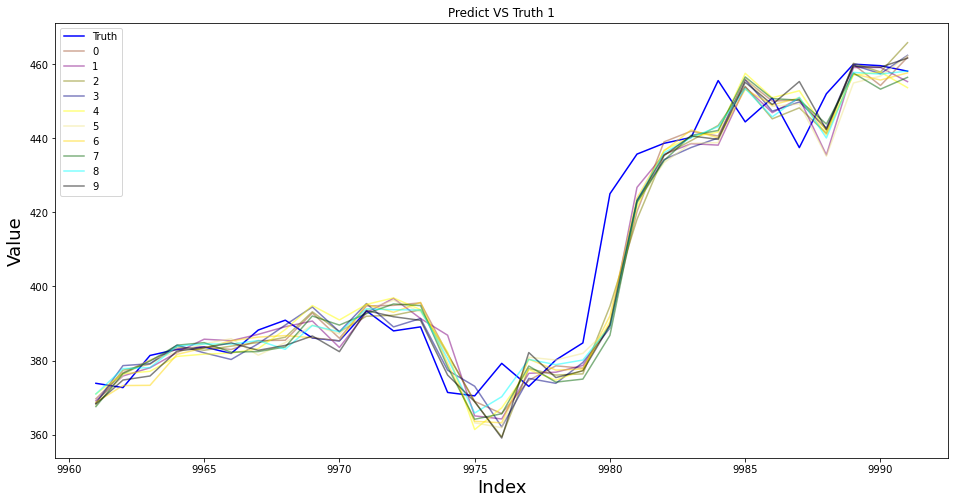

90.61528315553844


In [110]:
mse_or_1=[]
plt.figure(figsize=(16,8))
plt.title("Predict VS Truth 1")
plt.plot(test_or_1, 'blue', label="Truth")
for i in tqdm(range(10)):
    mse_or_1.append(mean_squared_error(test_or_1,predcit_or_list_1[i]))
    plt.plot(predcit_or_list_1[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print(np.mean(mse_or_1))

In [111]:
test_set_1.index=test_set_1.index-1
df = pd.DataFrame()
df['True']=test_or_1
for i in tqdm(range(10)):
    
    df[str(i)]=predcit_or_list_1[i]


df

100%|██████████| 10/10 [00:00<00:00, 1445.51it/s]


True           0           1           2           3           4  \
9961  373.850006  369.684136  369.122645  368.492965  368.506941  370.987944   
9962  372.690002  376.701498  375.825634  377.385503  378.629351  376.432049   
9963  381.369995  380.038012  378.044567  379.035447  379.145140  377.094161   
9964  383.010010  383.118769  382.166186  383.705421  384.164642  381.112584   
9965  383.679993  383.708674  385.760834  382.770943  382.080315  381.720504   
9966  381.910004  382.985412  385.357031  383.887873  380.283061  382.006157   
9967  388.230011  385.369208  387.075659  384.864812  384.545575  383.211354   
9968  390.899994  385.483765  389.134057  386.294764  389.586635  388.366400   
9969  386.089996  392.833709  390.671916  393.169920  394.463506  394.850370   
9970  385.309998  386.021441  383.531438  387.764128  387.793216  390.953604   
9971  393.429993  394.744035  392.933558  391.966311  395.380476  395.170289   
9972  388.000000  394.898260  396.794495  392.220405  389.079689  396.908182   
9973  389.089996  395.579605  391.345309  393.690902  391.359694  393.750892   
9974  371.380005  381.805338  386.836541  381.731171  377.378438  382.300571   
9975  370.459991  368.980665  365.049117  368.848867  373.058266  361.367993   
9976  379.239990  365.660877  364.229688  359.379368  362.068144  367.215499   
9977  373.010010  374.675877  376.546713  377.859219  375.177538  377.566943   
9978  380.160004  378.570026  376.848604  376.073068  373.844330  374.708221   
9979  384.760010  377.927904  378.668727  376.399557  379.473269  377.373272   
9980  425.040009  389.783635  389.641081  394.672137  388.778644  390.539569   
9981  435.750000  420.240693  426.764468  418.123881  423.071732  421.548250   
9982  438.660004  439.060743  435.678575  435.483754  434.265503  436.835400   
9983  440.250000  441.933087  438.566087  439.382161  437.528267  440.364944   
9984  455.609985  440.645556  438.171402  443.485351  440.107958  441.682703   
9985  444.450012  455.865636  453.885468  454.026355  455.909086  457.567478   
9986  450.910004  450.064734  446.939080  445.267268  447.349218  450.969411   
9987  437.500000  450.396129  450.801477  448.238739  449.821432  452.856012   
9988  452.040009  442.310587  435.524978  441.374160  442.797184  441.912703   
9989  460.040009  459.972014  459.131856  460.272274  459.794563  457.074544   
9990  459.630005  454.280959  459.140698  457.925558  457.453513  457.895669   
9991  458.140015  461.892648  455.317588  465.836588  462.424132  453.685055   

               5           6           7           8           9  
9961  367.927394  368.698793  367.565524  370.978135  368.262960  
9962  376.025069  373.240182  376.478844  377.828314  374.734872  
9963  380.241270  373.306175  379.858789  378.086862  375.825383  
9964  382.230607  381.667186  384.147684  383.888500  382.583035  
9965  384.520662  383.389796  384.829358  384.465370  383.412580  
9966  385.902688  385.313488  382.263778  384.415464  384.768883  
9967  381.436885  386.331517  382.419408  385.389422  382.757129  
9968  384.862702  386.722790  383.664798  383.025477  384.089932  
9969  389.578309  386.173397  392.027967  389.451886  386.635867  
9970  387.195713  385.325604  389.571412  387.759710  382.394239  
9971  393.655204  395.200650  392.678678  393.956613  393.502570  
9972  396.297865  393.022240  395.272433  393.722324  391.830006  
9973  393.158019  395.712537  394.845983  393.644649  390.854008  
9974  381.597356  379.213657  378.278712  380.496730  376.076116  
9975  363.172672  363.586814  364.147231  365.828679  368.906686  
9976  361.865682  363.189203  365.629279  370.226858  359.071667  
9977  380.892196  380.361804  378.519473  380.306695  382.154971  
9978  380.147022  377.420218  374.171291  378.896142  375.398159  
9979  381.938669  377.695193  374.984778  380.135464  377.238540  
9980  388.980184  392.080699  386.807374  389.179292  389.508984  
9981  422.648091  423.877339  422.694199  42

## option 2

In [112]:
Predict_List_sca=[]
for i in tqdm(range(10)):
    model_1=CreateModel(LSTM_train_sca_inputs_1[7000:]);
    model_1.compile(loss='mse',
                  optimizer=Adam(),
                  metrics=['mse'])

    #prevent overfit
    early_stopping = EarlyStopping(monitor='val_loss',
                                   verbose=0,
                                   mode='min',
                                   patience=15)

    #reduce trainning rate, if not any progress
    plateau = ReduceLROnPlateau(monitor="val_loss",
                                verbose=0,
                                mode='min',
                                factor=0.1,
                                patience=20)

    BATCH_SIZE=128
    EPOCHS=600

    model_1.fit(LSTM_train_sca_inputs_1[7000:],LSTM_train_sca_outputs_1[7000:],
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         validation_data=(LSTM_val_sca_inputs_1, LSTM_val_sca_outputs_1))
         #callbacks=[early_stopping])

    test_predict_1=model_1.predict(LSTM_test_sca_inputs_1,verbose=0, batch_size=BATCH_SIZE)
    
    Predict_List_sca.append(test_predict_1)

  0%|          | 0/10 [00:00<?, ?it/s]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2/600
2931/2931 [==============================] - 0s 93us/sample - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.5535e-04 - mse: 4.5535e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.4608e-04 - mse: 3.4608e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.2122e-04 - mse: 3.2122e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 6/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.1760e-04 - mse: 3.1760e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 7/600
2931/2931 [==============================] - 0s 88us/sample - loss: 2.7822e-04 - mse

Epoch 109/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.5589e-05 - mse: 8.5589e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 110/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.3455e-04 - mse: 1.3455e-04 - val_loss: 3.1123e-04 - val_mse: 3.1123e-04
Epoch 111/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.1715e-04 - mse: 1.1715e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 112/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.0734e-04 - mse: 1.0734e-04 - val_loss: 6.4616e-04 - val_mse: 6.4616e-04
Epoch 113/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.0864e-04 - mse: 1.0864e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 114/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.3749e-05 - mse: 8.3749e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 115/600
2931/2931 [==============================] - 0s 88us/sample - loss: 9.0244e-05 - m

Epoch 164/600
2931/2931 [==============================] - 0s 92us/sample - loss: 7.2176e-05 - mse: 7.2176e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 165/600
2931/2931 [==============================] - 0s 94us/sample - loss: 9.9282e-05 - mse: 9.9282e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 166/600
2931/2931 [==============================] - 0s 91us/sample - loss: 6.5718e-05 - mse: 6.5718e-05 - val_loss: 8.8862e-04 - val_mse: 8.8862e-04
Epoch 167/600
2931/2931 [==============================] - 0s 92us/sample - loss: 7.8834e-05 - mse: 7.8834e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 168/600
2931/2931 [==============================] - 0s 94us/sample - loss: 1.0824e-04 - mse: 1.0824e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 169/600
2931/2931 [==============================] - 0s 93us/sample - loss: 6.9012e-05 - mse: 6.9012e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 170/600
2931/2931 [==============================] - 0s 92us/sample - loss: 6.2047e-05 - mse: 6.20

2931/2931 [==============================] - 0s 94us/sample - loss: 5.2361e-05 - mse: 5.2361e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 275/600
2931/2931 [==============================] - 0s 94us/sample - loss: 5.7245e-05 - mse: 5.7245e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 276/600
2931/2931 [==============================] - 0s 94us/sample - loss: 5.7863e-05 - mse: 5.7863e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 277/600
2931/2931 [==============================] - 0s 92us/sample - loss: 5.0851e-05 - mse: 5.0851e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 278/600
2931/2931 [==============================] - 0s 96us/sample - loss: 6.0448e-05 - mse: 6.0448e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 279/600
2931/2931 [==============================] - 0s 92us/sample - loss: 5.3439e-05 - mse: 5.3439e-05 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 280/600
2931/2931 [==============================] - 0s 92us/sample - loss: 7.9811e-05 - mse: 7.9811e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 91us/sample - loss: 4.5205e-05 - mse: 4.5205e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 385/600
2931/2931 [==============================] - 0s 92us/sample - loss: 4.3160e-05 - mse: 4.3160e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 386/600
2931/2931 [==============================] - 0s 91us/sample - loss: 4.5289e-05 - mse: 4.5289e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 387/600
2931/2931 [==============================] - 0s 91us/sample - loss: 5.6061e-05 - mse: 5.6061e-05 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 388/600
2931/2931 [==============================] - 0s 95us/sample - loss: 5.3951e-05 - mse: 5.3951e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 389/600
2931/2931 [==============================] - 0s 93us/sample - loss: 4.4052e-05 - mse: 4.4052e-05 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 390/600
2931/2931 [==============================] - 0s 92us/sample - loss: 4.0728e-05 - mse: 4.0728e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 92us/sample - loss: 3.8867e-05 - mse: 3.8867e-05 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 495/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4696e-05 - mse: 3.4696e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 496/600
2931/2931 [==============================] - 0s 95us/sample - loss: 3.4562e-05 - mse: 3.4562e-05 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 497/600
2931/2931 [==============================] - 0s 95us/sample - loss: 4.0622e-05 - mse: 4.0622e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 498/600
2931/2931 [==============================] - 0s 97us/sample - loss: 5.6062e-05 - mse: 5.6062e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 499/600
2931/2931 [==============================] - 0s 93us/sample - loss: 4.1030e-05 - mse: 4.1030e-05 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 500/600
2931/2931 [==============================] - 0s 95us/sample - loss: 4.6481e-05 - mse: 4.6481e-05 - val_loss: 0.0

 10%|█         | 1/10 [02:47<25:11, 167.89s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2/600
2931/2931 [==============================] - 0s 102us/sample - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 3/600
2931/2931 [==============================] - 0s 92us/sample - loss: 5.0642e-04 - mse: 5.0642e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.6853e-04 - mse: 3.6853e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 5/600
2931/2931 [==============================] - 0s 92us/sample - loss: 3.0491e-04 - mse: 3.0491e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 6/600
2931/2931 [==============================] - 0s 91us/sample - loss: 2.7644e-04 - mse: 2.7644e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 7/600
2931/2931 [==============================] - 0s 90us/sample - loss: 2.8372e-04 - ms

2931/2931 [==============================] - 0s 92us/sample - loss: 8.5556e-05 - mse: 8.5556e-05 - val_loss: 5.9973e-05 - val_mse: 5.9973e-05
Epoch 108/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.0373e-04 - mse: 1.0373e-04 - val_loss: 6.8539e-04 - val_mse: 6.8539e-04
Epoch 109/600
2931/2931 [==============================] - 0s 90us/sample - loss: 9.1556e-05 - mse: 9.1556e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 110/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.4167e-04 - mse: 1.4167e-04 - val_loss: 5.1278e-04 - val_mse: 5.1278e-04
Epoch 111/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.0611e-04 - mse: 1.0611e-04 - val_loss: 1.9179e-04 - val_mse: 1.9179e-04
Epoch 112/600
2931/2931 [==============================] - 0s 90us/sample - loss: 9.7310e-05 - mse: 9.7310e-05 - val_loss: 7.6075e-04 - val_mse: 7.6075e-04
Epoch 113/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.91

Epoch 216/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.0612e-04 - mse: 1.0612e-04 - val_loss: 8.8682e-04 - val_mse: 8.8682e-04
Epoch 217/600
2931/2931 [==============================] - 0s 91us/sample - loss: 7.5048e-05 - mse: 7.5048e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 218/600
2931/2931 [==============================] - 0s 92us/sample - loss: 8.5215e-05 - mse: 8.5215e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 219/600
2931/2931 [==============================] - 0s 91us/sample - loss: 7.9638e-05 - mse: 7.9638e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 220/600
2931/2931 [==============================] - 0s 91us/sample - loss: 7.1241e-05 - mse: 7.1241e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 221/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.5814e-05 - mse: 7.5814e-05 - val_loss: 5.0953e-04 - val_mse: 5.0953e-04
Epoch 222/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.0484e-04 - m

2931/2931 [==============================] - 0s 100us/sample - loss: 5.6655e-05 - mse: 5.6655e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 327/600
2931/2931 [==============================] - 0s 95us/sample - loss: 4.5058e-05 - mse: 4.5058e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 328/600
2931/2931 [==============================] - 0s 103us/sample - loss: 4.0593e-05 - mse: 4.0593e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 329/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.6466e-05 - mse: 4.6466e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 330/600
2931/2931 [==============================] - 0s 91us/sample - loss: 4.3209e-05 - mse: 4.3209e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 331/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.4363e-05 - mse: 5.4363e-05 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 332/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.1438e-05 - mse: 6.1438e-05 - val_loss: 0

2931/2931 [==============================] - 0s 88us/sample - loss: 4.1058e-05 - mse: 4.1058e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 437/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.0131e-05 - mse: 4.0131e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 438/600
2931/2931 [==============================] - 0s 90us/sample - loss: 2.9342e-05 - mse: 2.9342e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 439/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.8597e-05 - mse: 3.8597e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 440/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.9237e-05 - mse: 3.9237e-05 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 441/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.4800e-05 - mse: 3.4800e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 442/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.7548e-05 - mse: 3.7548e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 91us/sample - loss: 4.3426e-05 - mse: 4.3426e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 547/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.4308e-05 - mse: 4.4308e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 548/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.8409e-05 - mse: 3.8409e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 549/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.2698e-05 - mse: 4.2698e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 550/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.8718e-05 - mse: 3.8718e-05 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 551/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.3364e-05 - mse: 4.3364e-05 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 552/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.2670e-05 - mse: 3.2670e-05 - val_loss: 0.0

 20%|██        | 2/10 [05:33<22:18, 167.26s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2/600
2931/2931 [==============================] - 0s 93us/sample - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/600
2931/2931 [==============================] - 0s 91us/sample - loss: 4.9545e-04 - mse: 4.9545e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.1731e-04 - mse: 3.1731e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 5/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.0282e-04 - mse: 3.0282e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.3608e-04 - mse: 3.3608e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.5089e-04 - mse

2931/2931 [==============================] - 0s 88us/sample - loss: 2.2435e-04 - mse: 2.2435e-04 - val_loss: 8.7479e-05 - val_mse: 8.7479e-05
Epoch 56/600
2931/2931 [==============================] - 0s 89us/sample - loss: 2.5245e-04 - mse: 2.5245e-04 - val_loss: 8.1117e-05 - val_mse: 8.1117e-05
Epoch 57/600
2931/2931 [==============================] - 0s 87us/sample - loss: 2.1379e-04 - mse: 2.1379e-04 - val_loss: 2.4016e-04 - val_mse: 2.4016e-04
Epoch 58/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.6711e-04 - mse: 1.6711e-04 - val_loss: 2.5217e-05 - val_mse: 2.5217e-05
Epoch 59/600
2931/2931 [==============================] - 0s 93us/sample - loss: 1.3501e-04 - mse: 1.3501e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 60/600
2931/2931 [==============================] - 0s 92us/sample - loss: 1.1745e-04 - mse: 1.1745e-04 - val_loss: 5.1783e-04 - val_mse: 5.1783e-04
Epoch 61/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.1116e-04

Epoch 162/600
2931/2931 [==============================] - 0s 88us/sample - loss: 7.4487e-05 - mse: 7.4487e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 163/600
2931/2931 [==============================] - 0s 87us/sample - loss: 9.8021e-05 - mse: 9.8021e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 164/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.0553e-04 - mse: 1.0553e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 165/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.3962e-05 - mse: 8.3962e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 166/600
2931/2931 [==============================] - 0s 90us/sample - loss: 6.8232e-05 - mse: 6.8232e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 167/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.7942e-05 - mse: 8.7942e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 168/600
2931/2931 [==============================] - 0s 90us/sample - loss: 7.8859e-05 - mse: 7.8859e-05 -

Epoch 217/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.7719e-05 - mse: 7.7719e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 218/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7113e-05 - mse: 5.7113e-05 - val_loss: 7.7018e-04 - val_mse: 7.7018e-04
Epoch 219/600
2931/2931 [==============================] - 0s 87us/sample - loss: 6.2075e-05 - mse: 6.2075e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 220/600
2931/2931 [==============================] - 0s 89us/sample - loss: 9.0185e-05 - mse: 9.0185e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 221/600
2931/2931 [==============================] - 0s 90us/sample - loss: 6.9387e-05 - mse: 6.9387e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 222/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.9064e-05 - mse: 6.9064e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 223/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.4806e-05 - mse: 5.48

2931/2931 [==============================] - 0s 88us/sample - loss: 5.5635e-05 - mse: 5.5635e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 328/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.3468e-05 - mse: 4.3468e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 329/600
2931/2931 [==============================] - 0s 86us/sample - loss: 4.9303e-05 - mse: 4.9303e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 330/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.7329e-05 - mse: 4.7329e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 331/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.5998e-05 - mse: 5.5998e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 332/600
2931/2931 [==============================] - 0s 91us/sample - loss: 8.9738e-05 - mse: 8.9738e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 333/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.3923e-05 - mse: 5.3923e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 88us/sample - loss: 3.8585e-05 - mse: 3.8585e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 438/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7572e-05 - mse: 3.7572e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 439/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4046e-05 - mse: 3.4046e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 440/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.1549e-05 - mse: 4.1549e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 441/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.6931e-05 - mse: 4.6931e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 442/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7108e-05 - mse: 5.7108e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 443/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.0184e-05 - mse: 4.0184e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 3.3868e-05 - mse: 3.3868e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 548/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.5318e-05 - mse: 4.5318e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 549/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.4797e-05 - mse: 3.4797e-05 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 550/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.7714e-05 - mse: 3.7714e-05 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 551/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.1058e-05 - mse: 4.1058e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 552/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.3483e-05 - mse: 5.3483e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 553/600
2931/2931 [==============================] - 0s 88us/sample - loss: 2.7758e-05 - mse: 2.7758e-05 - val_loss: 0.0

 30%|███       | 3/10 [08:16<19:22, 166.03s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/600
2931/2931 [==============================] - 0s 90us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.6345e-04 - mse: 4.6345e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 4/600
2931/2931 [==============================] - 0s 89us/sample - loss: 2.8448e-04 - mse: 2.8448e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 5/600
2931/2931 [==============================] - 0s 90us/sample - loss: 2.8502e-04 - mse: 2.8502e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/600
2931/2931 [==============================] - 0s 89us/sample - loss: 2.9167e-04 - mse: 2.9167e-04 - val_loss: 1.4401e-04 - val_mse: 1.4401e-04
Epoch 7/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6948e-

Epoch 55/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.4558e-04 - mse: 1.4558e-04 - val_loss: 6.4167e-04 - val_mse: 6.4167e-04
Epoch 56/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.1827e-04 - mse: 1.1827e-04 - val_loss: 3.3207e-04 - val_mse: 3.3207e-04
Epoch 57/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.3232e-04 - mse: 1.3232e-04 - val_loss: 1.3069e-04 - val_mse: 1.3069e-04
Epoch 58/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.3647e-04 - mse: 1.3647e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 59/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.4007e-04 - mse: 1.4007e-04 - val_loss: 4.2716e-06 - val_mse: 4.2716e-06
Epoch 60/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.1887e-04 - mse: 1.1887e-04 - val_loss: 1.4223e-04 - val_mse: 1.4223e-04
Epoch 61/600
2931/2931 [==============================] - 0s 89us/sample - los

Epoch 109/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.0226e-04 - mse: 1.0226e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 110/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.6204e-05 - mse: 8.6204e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 111/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.5313e-05 - mse: 8.5313e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 112/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.9885e-05 - mse: 7.9885e-05 - val_loss: 5.1393e-04 - val_mse: 5.1393e-04
Epoch 113/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.6043e-05 - mse: 7.6043e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 114/600
2931/2931 [==============================] - 0s 91us/sample - loss: 8.1828e-05 - mse: 8.1828e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 115/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.3025e-04 - mse: 1.30

2931/2931 [==============================] - 0s 88us/sample - loss: 7.0846e-05 - mse: 7.0846e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 219/600
2931/2931 [==============================] - 0s 86us/sample - loss: 6.0687e-05 - mse: 6.0687e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 220/600
2931/2931 [==============================] - 0s 86us/sample - loss: 7.0039e-05 - mse: 7.0039e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 221/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.6879e-05 - mse: 8.6879e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 222/600
2931/2931 [==============================] - 0s 87us/sample - loss: 6.0761e-05 - mse: 6.0761e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 223/600
2931/2931 [==============================] - 0s 87us/sample - loss: 5.5712e-05 - mse: 5.5712e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 224/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.2042e-05 - mse: 5.2042e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 88us/sample - loss: 5.2176e-05 - mse: 5.2176e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 329/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.1921e-05 - mse: 4.1921e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 330/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.8693e-05 - mse: 4.8693e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 331/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.3324e-05 - mse: 4.3324e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 332/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.1275e-05 - mse: 4.1275e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 333/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.7429e-05 - mse: 4.7429e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 334/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.7804e-05 - mse: 4.7804e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 3.4805e-05 - mse: 3.4805e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 439/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.2821e-05 - mse: 3.2821e-05 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 440/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.8854e-05 - mse: 3.8854e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 441/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.7100e-05 - mse: 4.7100e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 442/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.3549e-05 - mse: 4.3549e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 443/600
2931/2931 [==============================] - 0s 91us/sample - loss: 5.3228e-05 - mse: 5.3228e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 444/600
2931/2931 [==============================] - 0s 92us/sample - loss: 4.2316e-05 - mse: 4.2316e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 87us/sample - loss: 3.1490e-05 - mse: 3.1490e-05 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 549/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.5934e-05 - mse: 3.5934e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 550/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.7286e-05 - mse: 3.7286e-05 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 551/600
2931/2931 [==============================] - 0s 90us/sample - loss: 4.1043e-05 - mse: 4.1043e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 552/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.0246e-05 - mse: 3.0246e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 553/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.3532e-05 - mse: 3.3532e-05 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 554/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.4995e-05 - mse: 3.4995e-05 - val_loss: 0.0

 40%|████      | 4/10 [11:01<16:33, 165.50s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/600
2931/2931 [==============================] - 0s 96us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.2816e-04 - mse: 4.2816e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.3811e-04 - mse: 3.3811e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 5/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.3533e-04 - mse: 3.3533e-04 - val_loss: 4.2157e-04 - val_mse: 4.2157e-04
Epoch 6/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.0280e-04 - mse: 3.0280e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/600
2931/2931 [==============================] - 0s 89us/sample - loss: 2.8423e-

Epoch 109/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.2695e-04 - mse: 1.2695e-04 - val_loss: 4.2298e-04 - val_mse: 4.2298e-04
Epoch 110/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.0441e-04 - mse: 1.0441e-04 - val_loss: 4.3678e-04 - val_mse: 4.3678e-04
Epoch 111/600
2931/2931 [==============================] - 0s 89us/sample - loss: 9.8367e-05 - mse: 9.8367e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 112/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.4964e-05 - mse: 8.4964e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 113/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.8367e-05 - mse: 8.8367e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 114/600
2931/2931 [==============================] - 0s 91us/sample - loss: 8.3391e-05 - mse: 8.3391e-05 - val_loss: 5.4244e-04 - val_mse: 5.4244e-04
Epoch 115/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.3422

2931/2931 [==============================] - 0s 88us/sample - loss: 7.0314e-05 - mse: 7.0314e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 219/600
2931/2931 [==============================] - 0s 90us/sample - loss: 7.4212e-05 - mse: 7.4212e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 220/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.8270e-05 - mse: 6.8270e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 221/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.9797e-05 - mse: 5.9797e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 222/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.3808e-05 - mse: 6.3808e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 223/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.1578e-05 - mse: 6.1578e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 224/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.5064e-05 - mse: 8.5064e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 1.3113e-04 - mse: 1.3113e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 329/600
2931/2931 [==============================] - 0s 88us/sample - loss: 6.0139e-05 - mse: 6.0139e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 330/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.9317e-05 - mse: 4.9317e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 331/600
2931/2931 [==============================] - 0s 88us/sample - loss: 6.6088e-05 - mse: 6.6088e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 332/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.4736e-05 - mse: 4.4736e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 333/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.9967e-05 - mse: 4.9967e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 334/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.2756e-05 - mse: 6.2756e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 4.6623e-05 - mse: 4.6623e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 439/600
2931/2931 [==============================] - 0s 90us/sample - loss: 4.3460e-05 - mse: 4.3460e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 440/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.9528e-05 - mse: 4.9528e-05 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 441/600
2931/2931 [==============================] - 0s 90us/sample - loss: 5.0297e-05 - mse: 5.0297e-05 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 442/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.2513e-05 - mse: 4.2513e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 443/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.9069e-05 - mse: 3.9069e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 444/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6162e-05 - mse: 3.6162e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 5.2192e-05 - mse: 5.2192e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 549/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.1988e-05 - mse: 4.1988e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 550/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.6114e-05 - mse: 4.6114e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 551/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4955e-05 - mse: 3.4955e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 552/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.5278e-05 - mse: 3.5278e-05 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 553/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.4959e-05 - mse: 3.4959e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 554/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4496e-05 - mse: 3.4496e-05 - val_loss: 0.0

 50%|█████     | 5/10 [13:45<13:45, 165.05s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 2/600
2931/2931 [==============================] - 0s 96us/sample - loss: 0.0014 - mse: 0.0014 - val_loss: 3.3761e-04 - val_mse: 3.3761e-04
Epoch 3/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.0281e-04 - mse: 5.0281e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.5892e-04 - mse: 3.5892e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 5/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.0358e-04 - mse: 3.0358e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 6/600
2931/2931 [==============================] - 0s 90us/sample - loss: 2.8970e-04 - mse: 2.8970e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/600
2931/2931 [==============================] - 0s 91us/sample - loss: 2.9100e-

Epoch 55/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.1735e-04 - mse: 1.1735e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 56/600
2931/2931 [==============================] - 0s 87us/sample - loss: 1.3558e-04 - mse: 1.3558e-04 - val_loss: 1.8278e-04 - val_mse: 1.8278e-04
Epoch 57/600
2931/2931 [==============================] - 0s 87us/sample - loss: 1.2262e-04 - mse: 1.2262e-04 - val_loss: 9.5314e-05 - val_mse: 9.5314e-05
Epoch 58/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.2181e-04 - mse: 1.2181e-04 - val_loss: 6.8107e-04 - val_mse: 6.8107e-04
Epoch 59/600
2931/2931 [==============================] - 0s 87us/sample - loss: 1.1525e-04 - mse: 1.1525e-04 - val_loss: 3.0450e-04 - val_mse: 3.0450e-04
Epoch 60/600
2931/2931 [==============================] - 0s 86us/sample - loss: 1.2972e-04 - mse: 1.2972e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 61/600
2931/2931 [==============================] - 0s 86us/sample - loss: 1.747

Epoch 109/600
2931/2931 [==============================] - 0s 90us/sample - loss: 9.1313e-05 - mse: 9.1313e-05 - val_loss: 5.4879e-04 - val_mse: 5.4879e-04
Epoch 110/600
2931/2931 [==============================] - 0s 92us/sample - loss: 8.6129e-05 - mse: 8.6129e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 111/600
2931/2931 [==============================] - 0s 92us/sample - loss: 1.0588e-04 - mse: 1.0588e-04 - val_loss: 3.8930e-05 - val_mse: 3.8930e-05
Epoch 112/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.4357e-04 - mse: 1.4357e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 113/600
2931/2931 [==============================] - 0s 89us/sample - loss: 9.0686e-05 - mse: 9.0686e-05 - val_loss: 7.4617e-04 - val_mse: 7.4617e-04
Epoch 114/600
2931/2931 [==============================] - 0s 91us/sample - loss: 8.8031e-05 - mse: 8.8031e-05 - val_loss: 9.8644e-05 - val_mse: 9.8644e-05
Epoch 115/600
2931/2931 [==============================] - 0s 113us/sample - los

2931/2931 [==============================] - 0s 88us/sample - loss: 8.9001e-05 - mse: 8.9001e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 219/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.7355e-04 - mse: 1.7355e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 220/600
2931/2931 [==============================] - 0s 86us/sample - loss: 9.4121e-05 - mse: 9.4121e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 221/600
2931/2931 [==============================] - 0s 87us/sample - loss: 6.9616e-05 - mse: 6.9616e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 222/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.9263e-05 - mse: 5.9263e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 223/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.5333e-05 - mse: 7.5333e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 224/600
2931/2931 [==============================] - 0s 88us/sample - loss: 6.2118e-05 - mse: 6.2118e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 87us/sample - loss: 6.7564e-05 - mse: 6.7564e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 329/600
2931/2931 [==============================] - 0s 86us/sample - loss: 7.9618e-05 - mse: 7.9618e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 330/600
2931/2931 [==============================] - 0s 87us/sample - loss: 5.0542e-05 - mse: 5.0542e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 331/600
2931/2931 [==============================] - 0s 86us/sample - loss: 5.4242e-05 - mse: 5.4242e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 332/600
2931/2931 [==============================] - 0s 86us/sample - loss: 5.6776e-05 - mse: 5.6776e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 333/600
2931/2931 [==============================] - 0s 86us/sample - loss: 5.6390e-05 - mse: 5.6390e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 334/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.9574e-05 - mse: 4.9574e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 86us/sample - loss: 4.5203e-05 - mse: 4.5203e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 439/600
2931/2931 [==============================] - 0s 87us/sample - loss: 5.1695e-05 - mse: 5.1695e-05 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 440/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.7560e-05 - mse: 3.7560e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 441/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.5797e-05 - mse: 3.5797e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 442/600
2931/2931 [==============================] - 0s 86us/sample - loss: 4.6447e-05 - mse: 4.6447e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 443/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.2946e-05 - mse: 4.2946e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 444/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.6848e-05 - mse: 3.6848e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 2.8365e-05 - mse: 2.8365e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 549/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6162e-05 - mse: 3.6162e-05 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 550/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.2563e-05 - mse: 4.2563e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 551/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.6197e-05 - mse: 3.6197e-05 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 552/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.1439e-05 - mse: 3.1439e-05 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 553/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.2640e-05 - mse: 3.2640e-05 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 554/600
2931/2931 [==============================] - 0s 89us/sample - loss: 2.7546e-05 - mse: 2.7546e-05 - val_loss: 0.0

 60%|██████    | 6/10 [16:27<10:56, 164.14s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2/600
2931/2931 [==============================] - 0s 93us/sample - loss: 8.6046e-04 - mse: 8.6046e-04 - val_loss: 6.8843e-04 - val_mse: 6.8843e-04
Epoch 3/600
2931/2931 [==============================] - 0s 90us/sample - loss: 4.4823e-04 - mse: 4.4823e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.4772e-04 - mse: 3.4772e-04 - val_loss: 4.0315e-04 - val_mse: 4.0315e-04
Epoch 5/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.1911e-04 - mse: 3.1911e-04 - val_loss: 8.9607e-05 - val_mse: 8.9607e-05
Epoch 6/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.0345e-04 - mse: 3.0345e-04 - val_loss: 3.5358e-04 - val_mse: 3.5358e-04
Epoch 7/600
2931/2931 [==============================] -

Epoch 55/600
2931/2931 [==============================] - 0s 90us/sample - loss: 2.2021e-04 - mse: 2.2021e-04 - val_loss: 1.8179e-04 - val_mse: 1.8179e-04
Epoch 56/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.8087e-04 - mse: 1.8087e-04 - val_loss: 2.8713e-09 - val_mse: 2.8713e-09
Epoch 57/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.3216e-04 - mse: 1.3216e-04 - val_loss: 6.3195e-05 - val_mse: 6.3195e-05
Epoch 58/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.7453e-04 - mse: 1.7453e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 59/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.4566e-04 - mse: 1.4566e-04 - val_loss: 1.7454e-05 - val_mse: 1.7454e-05
Epoch 60/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.7075e-04 - mse: 1.7075e-04 - val_loss: 2.6392e-04 - val_mse: 2.6392e-04
Epoch 61/600
2931/2931 [==============================] - 0s 90us/sample - los

Epoch 109/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.8413e-05 - mse: 8.8413e-05 - val_loss: 3.0745e-04 - val_mse: 3.0745e-04
Epoch 110/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.2883e-04 - mse: 1.2883e-04 - val_loss: 2.5441e-04 - val_mse: 2.5441e-04
Epoch 111/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.0457e-04 - mse: 1.0457e-04 - val_loss: 6.7687e-04 - val_mse: 6.7687e-04
Epoch 112/600
2931/2931 [==============================] - 0s 90us/sample - loss: 9.8784e-05 - mse: 9.8784e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 113/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.4630e-04 - mse: 1.4630e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 114/600
2931/2931 [==============================] - 0s 90us/sample - loss: 9.2421e-05 - mse: 9.2421e-05 - val_loss: 4.6856e-05 - val_mse: 4.6856e-05
Epoch 115/600
2931/2931 [==============================] - 0s 90us/sample - loss

2931/2931 [==============================] - 0s 90us/sample - loss: 8.7405e-05 - mse: 8.7405e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 219/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.2911e-05 - mse: 7.2911e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 220/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.2567e-05 - mse: 7.2567e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 221/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.6653e-05 - mse: 7.6653e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 222/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.3375e-05 - mse: 6.3375e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 223/600
2931/2931 [==============================] - 0s 87us/sample - loss: 6.0527e-05 - mse: 6.0527e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 224/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7355e-05 - mse: 5.7355e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 88us/sample - loss: 7.6836e-05 - mse: 7.6836e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 329/600
2931/2931 [==============================] - 0s 87us/sample - loss: 5.9069e-05 - mse: 5.9069e-05 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 330/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7906e-05 - mse: 5.7906e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 331/600
2931/2931 [==============================] - 0s 90us/sample - loss: 6.0377e-05 - mse: 6.0377e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 332/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.6381e-05 - mse: 5.6381e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 333/600
2931/2931 [==============================] - 0s 90us/sample - loss: 5.2567e-05 - mse: 5.2567e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 334/600
2931/2931 [==============================] - 0s 90us/sample - loss: 5.4339e-05 - mse: 5.4339e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 90us/sample - loss: 3.2998e-05 - mse: 3.2998e-05 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 439/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.9285e-05 - mse: 3.9285e-05 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 440/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.2861e-05 - mse: 3.2861e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 441/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4608e-05 - mse: 3.4608e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 442/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.8855e-05 - mse: 3.8855e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 443/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4058e-05 - mse: 3.4058e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 444/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.8955e-05 - mse: 3.8955e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 88us/sample - loss: 3.5156e-05 - mse: 3.5156e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 549/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.2497e-05 - mse: 3.2497e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 550/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.1288e-05 - mse: 3.1288e-05 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 551/600
2931/2931 [==============================] - 0s 88us/sample - loss: 2.9026e-05 - mse: 2.9026e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 552/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.1791e-05 - mse: 3.1791e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 553/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.8576e-05 - mse: 3.8576e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 554/600
2931/2931 [==============================] - 0s 87us/sample - loss: 5.5022e-05 - mse: 5.5022e-05 - val_loss: 0.0

 70%|███████   | 7/10 [19:11<08:12, 164.15s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0178 - mse: 0.0178 - val_loss: 8.8672e-04 - val_mse: 8.8672e-04
Epoch 2/600
2931/2931 [==============================] - 0s 93us/sample - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/600
2931/2931 [==============================] - 0s 86us/sample - loss: 5.0747e-04 - mse: 5.0747e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/600
2931/2931 [==============================] - 0s 87us/sample - loss: 4.2410e-04 - mse: 4.2410e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 5/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.4477e-04 - mse: 3.4477e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 6/600
2931/2931 [==============================] - 0s 87us/sample - loss: 2.6172e-04 - mse: 2.6172e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 7/600
2931/2931 [==============================] - 0s 87us/sample - loss: 3.1349e-

2931/2931 [==============================] - 0s 89us/sample - loss: 1.8578e-04 - mse: 1.8578e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 56/600
2931/2931 [==============================] - 0s 86us/sample - loss: 1.1198e-04 - mse: 1.1198e-04 - val_loss: 3.2534e-04 - val_mse: 3.2534e-04
Epoch 57/600
2931/2931 [==============================] - 0s 87us/sample - loss: 1.3194e-04 - mse: 1.3194e-04 - val_loss: 9.0134e-06 - val_mse: 9.0134e-06
Epoch 58/600
2931/2931 [==============================] - 0s 87us/sample - loss: 1.1798e-04 - mse: 1.1798e-04 - val_loss: 3.0715e-06 - val_mse: 3.0715e-06
Epoch 59/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.0707e-04 - mse: 1.0707e-04 - val_loss: 7.7117e-04 - val_mse: 7.7117e-04
Epoch 60/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3456e-04 - mse: 1.3456e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 61/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.9227e-04 - mse: 

2931/2931 [==============================] - 0s 87us/sample - loss: 9.1929e-05 - mse: 9.1929e-05 - val_loss: 5.9919e-04 - val_mse: 5.9919e-04
Epoch 110/600
2931/2931 [==============================] - 0s 87us/sample - loss: 7.6348e-05 - mse: 7.6348e-05 - val_loss: 2.6623e-04 - val_mse: 2.6623e-04
Epoch 111/600
2931/2931 [==============================] - 0s 89us/sample - loss: 8.0970e-05 - mse: 8.0970e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 112/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.4654e-05 - mse: 8.4654e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 113/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.1827e-05 - mse: 8.1828e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 114/600
2931/2931 [==============================] - 0s 89us/sample - loss: 8.8270e-05 - mse: 8.8270e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 115/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.0034e-05 - mse: 8.0034e-05

2931/2931 [==============================] - 0s 87us/sample - loss: 5.5602e-05 - mse: 5.5602e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 219/600
2931/2931 [==============================] - 0s 87us/sample - loss: 7.2979e-05 - mse: 7.2979e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 220/600
2931/2931 [==============================] - 0s 87us/sample - loss: 8.8845e-05 - mse: 8.8845e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 221/600
2931/2931 [==============================] - 0s 88us/sample - loss: 7.4128e-05 - mse: 7.4128e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 222/600
2931/2931 [==============================] - 0s 88us/sample - loss: 6.4421e-05 - mse: 6.4421e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 223/600
2931/2931 [==============================] - 0s 87us/sample - loss: 6.7141e-05 - mse: 6.7141e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 224/600
2931/2931 [==============================] - 0s 88us/sample - loss: 7.8668e-05 - mse: 7.8668e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 87us/sample - loss: 4.8054e-05 - mse: 4.8054e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 329/600
2931/2931 [==============================] - 0s 86us/sample - loss: 4.8234e-05 - mse: 4.8234e-05 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 330/600
2931/2931 [==============================] - 0s 86us/sample - loss: 5.1569e-05 - mse: 5.1569e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 331/600
2931/2931 [==============================] - 0s 87us/sample - loss: 7.2826e-05 - mse: 7.2826e-05 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 332/600
2931/2931 [==============================] - 0s 87us/sample - loss: 7.3073e-05 - mse: 7.3073e-05 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 333/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.4984e-05 - mse: 5.4984e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 334/600
2931/2931 [==============================] - 0s 86us/sample - loss: 4.4760e-05 - mse: 4.4760e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 5.7779e-05 - mse: 5.7779e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 439/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.9046e-05 - mse: 3.9046e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 440/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.9805e-05 - mse: 3.9805e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 441/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.9131e-05 - mse: 4.9131e-05 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 442/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.1600e-05 - mse: 4.1600e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 443/600
2931/2931 [==============================] - 0s 91us/sample - loss: 6.1660e-05 - mse: 6.1660e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 444/600
2931/2931 [==============================] - 0s 90us/sample - loss: 4.1976e-05 - mse: 4.1976e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 88us/sample - loss: 2.6983e-05 - mse: 2.6983e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 549/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.7903e-05 - mse: 3.7903e-05 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 550/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.3400e-05 - mse: 4.3400e-05 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 551/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.4365e-05 - mse: 3.4365e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 552/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.7799e-05 - mse: 3.7799e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 553/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.0298e-05 - mse: 3.0298e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 554/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.0797e-05 - mse: 3.0797e-05 - val_loss: 0.0

 80%|████████  | 8/10 [21:53<05:27, 163.64s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/600
2931/2931 [==============================] - 0s 91us/sample - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/600
2931/2931 [==============================] - 0s 86us/sample - loss: 5.3097e-04 - mse: 5.3097e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.6786e-04 - mse: 3.6786e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 5/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.8000e-04 - mse: 3.8000e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.1097e-04 - mse: 3.1097e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/600
2931/2931 [==============================] - 0s 88us/sample - loss: 2.5316e-04 - mse

Epoch 55/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.3862e-04 - mse: 1.3862e-04 - val_loss: 5.1252e-04 - val_mse: 5.1252e-04
Epoch 56/600
2931/2931 [==============================] - 0s 87us/sample - loss: 1.2923e-04 - mse: 1.2923e-04 - val_loss: 2.7460e-04 - val_mse: 2.7460e-04
Epoch 57/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.1397e-04 - mse: 1.1397e-04 - val_loss: 4.2557e-04 - val_mse: 4.2557e-04
Epoch 58/600
2931/2931 [==============================] - 0s 89us/sample - loss: 1.1458e-04 - mse: 1.1458e-04 - val_loss: 4.4062e-04 - val_mse: 4.4062e-04
Epoch 59/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.3075e-04 - mse: 1.3075e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 60/600
2931/2931 [==============================] - 0s 87us/sample - loss: 1.3583e-04 - mse: 1.3583e-04 - val_loss: 2.3673e-04 - val_mse: 2.3673e-04
Epoch 61/600
2931/2931 [==============================] - 0s 89us/sample - los

Epoch 109/600
2931/2931 [==============================] - 0s 92us/sample - loss: 9.2359e-05 - mse: 9.2359e-05 - val_loss: 2.8194e-05 - val_mse: 2.8194e-05
Epoch 110/600
2931/2931 [==============================] - 0s 91us/sample - loss: 7.7678e-05 - mse: 7.7678e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 111/600
2931/2931 [==============================] - 0s 89us/sample - loss: 8.7685e-05 - mse: 8.7685e-05 - val_loss: 5.6363e-04 - val_mse: 5.6363e-04
Epoch 112/600
2931/2931 [==============================] - 0s 92us/sample - loss: 1.0356e-04 - mse: 1.0356e-04 - val_loss: 3.5122e-04 - val_mse: 3.5122e-04
Epoch 113/600
2931/2931 [==============================] - 0s 92us/sample - loss: 9.2050e-05 - mse: 9.2050e-05 - val_loss: 9.1027e-04 - val_mse: 9.1027e-04
Epoch 114/600
2931/2931 [==============================] - 0s 90us/sample - loss: 9.1214e-05 - mse: 9.1214e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 115/600
2931/2931 [==============================] - 0s 89us/sample - loss

2931/2931 [==============================] - 0s 88us/sample - loss: 1.0639e-04 - mse: 1.0639e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 219/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.6449e-04 - mse: 1.6449e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 220/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.9640e-05 - mse: 8.9640e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 221/600
2931/2931 [==============================] - 0s 88us/sample - loss: 6.6511e-05 - mse: 6.6511e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 222/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.7626e-05 - mse: 5.7626e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 223/600
2931/2931 [==============================] - 0s 88us/sample - loss: 6.1323e-05 - mse: 6.1323e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 224/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.8794e-05 - mse: 5.8794e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 90us/sample - loss: 7.4545e-05 - mse: 7.4545e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 329/600
2931/2931 [==============================] - 0s 90us/sample - loss: 5.9898e-05 - mse: 5.9898e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 330/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.7818e-05 - mse: 4.7818e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 331/600
2931/2931 [==============================] - 0s 90us/sample - loss: 4.8617e-05 - mse: 4.8617e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 332/600
2931/2931 [==============================] - 0s 90us/sample - loss: 4.5242e-05 - mse: 4.5242e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 333/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.4798e-05 - mse: 4.4798e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 334/600
2931/2931 [==============================] - 0s 91us/sample - loss: 5.6232e-05 - mse: 5.6232e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 90us/sample - loss: 4.2381e-05 - mse: 4.2381e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 439/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.6153e-05 - mse: 3.6153e-05 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 440/600
2931/2931 [==============================] - 0s 90us/sample - loss: 4.2203e-05 - mse: 4.2203e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 441/600
2931/2931 [==============================] - 0s 91us/sample - loss: 4.5927e-05 - mse: 4.5927e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 442/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.3390e-05 - mse: 3.3390e-05 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 443/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.3893e-05 - mse: 3.3893e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 444/600
2931/2931 [==============================] - 0s 91us/sample - loss: 3.2142e-05 - mse: 3.2142e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 90us/sample - loss: 3.2738e-05 - mse: 3.2738e-05 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 549/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.8006e-05 - mse: 3.8006e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 550/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.9813e-05 - mse: 3.9813e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 551/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.0891e-05 - mse: 3.0891e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 552/600
2931/2931 [==============================] - 0s 91us/sample - loss: 2.9971e-05 - mse: 2.9971e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 553/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.7533e-05 - mse: 3.7533e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 554/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.3182e-05 - mse: 3.3182e-05 - val_loss: 0.0

 90%|█████████ | 9/10 [24:38<02:44, 164.05s/it]

Train on 2931 samples, validate on 1 samples
Epoch 1/600
2931/2931 [==============================] - 5s 2ms/sample - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 2/600
2931/2931 [==============================] - 0s 94us/sample - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3/600
2931/2931 [==============================] - 0s 88us/sample - loss: 4.2935e-04 - mse: 4.2935e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.4240e-04 - mse: 3.4240e-04 - val_loss: 3.0076e-04 - val_mse: 3.0076e-04
Epoch 5/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.5229e-04 - mse: 3.5229e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.3843e-04 - mse: 3.3843e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.0812e-

Epoch 55/600
2931/2931 [==============================] - 0s 88us/sample - loss: 1.2923e-04 - mse: 1.2923e-04 - val_loss: 3.9284e-04 - val_mse: 3.9284e-04
Epoch 56/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.3274e-04 - mse: 1.3274e-04 - val_loss: 4.8215e-04 - val_mse: 4.8215e-04
Epoch 57/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.5862e-04 - mse: 1.5862e-04 - val_loss: 7.6972e-04 - val_mse: 7.6972e-04
Epoch 58/600
2931/2931 [==============================] - 0s 91us/sample - loss: 1.3378e-04 - mse: 1.3378e-04 - val_loss: 2.9496e-05 - val_mse: 2.9496e-05
Epoch 59/600
2931/2931 [==============================] - 0s 90us/sample - loss: 2.0436e-04 - mse: 2.0436e-04 - val_loss: 1.9796e-04 - val_mse: 1.9796e-04
Epoch 60/600
2931/2931 [==============================] - 0s 90us/sample - loss: 1.8849e-04 - mse: 1.8849e-04 - val_loss: 2.8189e-04 - val_mse: 2.8189e-04
Epoch 61/600
2931/2931 [==============================] - 0s 89us/samp

Epoch 109/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.5760e-05 - mse: 8.5760e-05 - val_loss: 2.7665e-04 - val_mse: 2.7665e-04
Epoch 110/600
2931/2931 [==============================] - 0s 90us/sample - loss: 9.0561e-05 - mse: 9.0561e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 111/600
2931/2931 [==============================] - 0s 89us/sample - loss: 8.5937e-05 - mse: 8.5937e-05 - val_loss: 8.5005e-04 - val_mse: 8.5005e-04
Epoch 112/600
2931/2931 [==============================] - 0s 91us/sample - loss: 7.4559e-05 - mse: 7.4559e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 113/600
2931/2931 [==============================] - 0s 90us/sample - loss: 8.1455e-05 - mse: 8.1455e-05 - val_loss: 4.4375e-04 - val_mse: 4.4375e-04
Epoch 114/600
2931/2931 [==============================] - 0s 91us/sample - loss: 7.7159e-05 - mse: 7.7159e-05 - val_loss: 9.9718e-04 - val_mse: 9.9718e-04
Epoch 115/600
2931/2931 [==============================] - 0s 89us/sample - loss

2931/2931 [==============================] - 0s 85us/sample - loss: 7.9134e-05 - mse: 7.9134e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 219/600
2931/2931 [==============================] - 0s 89us/sample - loss: 7.3735e-05 - mse: 7.3735e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 220/600
2931/2931 [==============================] - 0s 87us/sample - loss: 5.9965e-05 - mse: 5.9965e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 221/600
2931/2931 [==============================] - 0s 88us/sample - loss: 6.6234e-05 - mse: 6.6234e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 222/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.7744e-05 - mse: 6.7744e-05 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 223/600
2931/2931 [==============================] - 0s 88us/sample - loss: 8.3285e-05 - mse: 8.3285e-05 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 224/600
2931/2931 [==============================] - 0s 88us/sample - loss: 9.3625e-05 - mse: 9.3625e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 88us/sample - loss: 4.7327e-05 - mse: 4.7327e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 329/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.9560e-05 - mse: 5.9560e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 330/600
2931/2931 [==============================] - 0s 87us/sample - loss: 5.0743e-05 - mse: 5.0743e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 331/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.1376e-05 - mse: 6.1376e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 332/600
2931/2931 [==============================] - 0s 88us/sample - loss: 9.5988e-05 - mse: 9.5988e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 333/600
2931/2931 [==============================] - 0s 89us/sample - loss: 6.8286e-05 - mse: 6.8286e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 334/600
2931/2931 [==============================] - 0s 88us/sample - loss: 5.1411e-05 - mse: 5.1411e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 89us/sample - loss: 4.4793e-05 - mse: 4.4793e-05 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 439/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.1662e-05 - mse: 4.1662e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 440/600
2931/2931 [==============================] - 0s 89us/sample - loss: 4.0323e-05 - mse: 4.0323e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 441/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.7150e-05 - mse: 3.7150e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 442/600
2931/2931 [==============================] - 0s 89us/sample - loss: 3.8241e-05 - mse: 3.8241e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 443/600
2931/2931 [==============================] - 0s 90us/sample - loss: 5.0177e-05 - mse: 5.0177e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 444/600
2931/2931 [==============================] - 0s 91us/sample - loss: 4.4947e-05 - mse: 4.4947e-05 - val_loss: 0.0

2931/2931 [==============================] - 0s 91us/sample - loss: 3.3890e-05 - mse: 3.3890e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 549/600
2931/2931 [==============================] - 0s 90us/sample - loss: 5.3593e-05 - mse: 5.3593e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 550/600
2931/2931 [==============================] - 0s 89us/sample - loss: 5.8214e-05 - mse: 5.8214e-05 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 551/600
2931/2931 [==============================] - 0s 90us/sample - loss: 7.8467e-05 - mse: 7.8467e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 552/600
2931/2931 [==============================] - 0s 91us/sample - loss: 6.7002e-05 - mse: 6.7002e-05 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 553/600
2931/2931 [==============================] - 0s 88us/sample - loss: 3.6061e-05 - mse: 3.6061e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 554/600
2931/2931 [==============================] - 0s 90us/sample - loss: 3.2464e-05 - mse: 3.2464e-05 - val_loss: 0.0

100%|██████████| 10/10 [27:22<00:00, 164.23s/it]


In [113]:
Predict_List_sca[1]

array([[0.71436965],
       [0.71134186],
       [0.7149173 ],
       [0.7122606 ],
       [0.7075546 ],
       [0.7055278 ],
       [0.7033499 ],
       [0.70460856],
       [0.7077595 ],
       [0.7099253 ],
       [0.71055853],
       [0.70987964],
       [0.71270764],
       [0.69915307],
       [0.6979971 ],
       [0.6876116 ],
       [0.697911  ],
       [0.7147089 ],
       [0.7094399 ],
       [0.70646036],
       [0.7042133 ],
       [0.69877005],
       [0.7038344 ],
       [0.7089014 ],
       [0.71031153],
       [0.7096083 ],
       [0.7083436 ],
       [0.70968103],
       [0.7148061 ],
       [0.7116077 ],
       [0.7103784 ]], dtype=float32)

In [114]:
mse_1_sca=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,8))
plt.title("Predict VS Truth Data 1")
plt.plot(scaler_out_1.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs_1)), 'red', label="Truth")
for i in tqdm(range(10)):
    mse_1_sca.append(mean_squared_error(scaler_out_1.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs_1)),scaler_out_1.inverse_transform(Predict_List_sca[i])))
    plt.plot(scaler_out_1.inverse_transform(Predict_List_sca[i]), color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()

print(np.mean(mse_1_sca))


100%|██████████| 10/10 [00:00<00:00, 421.97it/s]


7353.304324901542


In [115]:
df = pd.DataFrame()
df['True']=scaler_out_1.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs_1))[:,0]
for i in tqdm(range(10)):
    df[str(i)]=scaler_out_1.inverse_transform(Predict_List_sca[i])

df

100%|██████████| 10/10 [00:00<00:00, 1277.74it/s]


True           0           1           2           3           4  \
0   373.850006  329.116180  328.694733  333.770905  330.434143  329.173462   
1   372.690002  328.549133  327.302429  332.273651  328.931641  329.303955   
2   381.369995  329.325958  328.946564  334.900360  331.438416  331.332794   
3   383.010010  326.759033  327.724915  333.134979  329.327393  330.466003   
4   383.679993  324.967133  325.560883  330.314667  326.945801  327.309692   
5   381.910004  322.839020  324.628845  329.742462  325.888977  325.662903   
6   388.230011  322.441925  323.627380  329.156403  322.720673  325.869110   
7   390.899994  323.952942  324.206177  330.062775  325.992310  327.606689   
8   386.089996  325.537842  325.655090  331.687622  327.276825  328.946869   
9   385.309998  326.909119  326.651031  332.101715  327.474548  329.193848   
10  393.429993  328.017914  326.942230  332.202393  328.638397  329.949677   
11  388.000000  327.563354  326.630035  331.514435  329.674530  330.793823   
12  389.089996  328.330078  327.930481  333.765198  330.407318  331.768646   
13  371.380005  323.382477  321.697479  320.455719  324.602905  325.915253   
14  370.459991  323.592041  321.165924  323.728699  323.731201  323.874573   
15  379.239990  320.919830  316.390198  319.596985  319.784546  320.183685   
16  373.010010  326.170563  321.126343  327.728729  327.437134  323.952820   
17  380.160004  329.727570  328.850739  335.825531  331.881134  334.581909   
18  384.760010  329.136719  326.427795  331.611755  328.207489  330.668549   
19  425.040009  329.025604  325.057709  331.692322  328.778992  330.153564   
20  435.750000  327.212952  324.024414  331.445709  326.655151  329.713196   
21  438.660004  325.993530  321.521362  330.202454  325.167053  326.437225   
22  440.250000  327.386414  323.850189  333.192047  327.987305  329.543823   
23  455.609985  327.376160  326.180206  333.831543  328.979950  330.898468   
24  444.450012  327.780640  326.828644  333.590393  328.405914  330.849884   
25  450.910004  328.502991  326.505280  332.157959  327.159546  330.459473   
26  437.500000  328.995728  325.923706  332.227997  327.960510  331.175629   
27  452.040009  329.784302  326.538696  332.148163  328.261536  332.140228   
28  460.040009  330.452423  328.895416  333.383545  329.688843  332.866302   
29  459.630005  329.227234  327.424683  329.284241  325.260590  332.141968   
30  458.140015  327.498230  326.859375  327.178650  321.379578  328.363800   

             5           6           7           8           9  
0   331.186157  326.429138  331.900940  329.641296  326.360901  
1   331.080688  321.975739  331.080902  328.622559  324.333466  
2   331.995117  321.454834  332.690979  330.448822  328.062988  
3   329.662750  319.327118  330.498535  328.524139  327.053894  
4   327.612305  314.931885  327.378387  325.943451  322.538513  
5   327.157806  317.654755  326.345856  325.697174  321.098053  
6   326.378571  319.179443  325.715607  324.656586  320.089508  
7   327.907379  324.745300  326.308228  325.877106  323.459656  
8   329.398254  326.364594  328.355194  327.441956  324.615417  
9   330.405212  326.957062  330.181274  327.623688  323.809082  
10  330.356232  327.558319  330.855164  328.748505  322.970703  
11  331.062988  328.665802  331.213074  328.785156  324.533417  
12  331.953552  328.280151  331.474335  329.054749  324.973022  
13  326.175018  326.338409  324.807526  319.392365  315.554565  
14  324.458923  323.255859  326.202332  321.096619  312.738220  
15  323.736267  321.416443  325.507568  314.927277  307.286041  
16  326.615845  323.015533  329.738678  321.198334  313.749023  
17  333.601776  329.969513  335.092438  331.570984  323.370087  
18  330.990875  326.057617  332.581360  327.073883  318.750885  
19  330.023529  321.053864  331.562378  327.894714  318.501465  
20  330.387299  316.339417  330.134247  327.852234  311.631012  
21  327.966187  320.715515  327.765198  325.071472  315.283386  
22  330.263824  32

# DATA2

## Only use [7000:]data(09/2008-) to train.
## Train/Predict 10 times

## option 1

In [116]:
Predict_List_data2=[]
for i in tqdm(range(10)):
    model=CreateModel(LSTM_train_1D_inputs[7000:]);
    model.compile(loss='mse',
                  optimizer=Adam(),
                  metrics=['mse'])

    #prevent overfit
    early_stopping = EarlyStopping(monitor='val_loss',
                                   verbose=0,
                                   mode='min',
                                   patience=20)

    #reduce trainning rate, if not any progress
    plateau = ReduceLROnPlateau(monitor="val_loss",
                                verbose=0,
                                mode='min',
                                factor=0.1,
                                patience=20)

    BATCH_SIZE=128
    EPOCHS=600

    model.fit(LSTM_train_1D_inputs[7000:],LSTM_train_1D_outputs[7000:],
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         validation_data=(LSTM_val_1D_inputs, LSTM_val_1D_outputs))
         #callbacks=[early_stopping])

    test_predict=model.predict(LSTM_test_1D_inputs,verbose=0, batch_size=BATCH_SIZE)
    Predict_List_data2.append(test_predict)

  0%|          | 0/10 [00:00<?, ?it/s]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0122 - mse: 0.0122 - val_loss: 5.4916e-04 - val_mse: 5.4916e-04
Epoch 2/600
2941/2941 [==============================] - 0s 89us/sample - loss: 4.9110e-04 - mse: 4.9110e-04 - val_loss: 4.2297e-04 - val_mse: 4.2297e-04
Epoch 3/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.9719e-04 - mse: 3.9719e-04 - val_loss: 3.9037e-04 - val_mse: 3.9037e-04
Epoch 4/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8416e-04 - mse: 3.8416e-04 - val_loss: 4.0672e-04 - val_mse: 4.0672e-04
Epoch 5/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7853e-04 - mse: 3.7853e-04 - val_loss: 3.8076e-04 - val_mse: 3.8076e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8472e-04 - mse: 3.8472e-04 - val_loss: 4.1129e-04 - val_mse: 4.1129e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7796e-04 - mse: 3.7796e-04 - val_loss: 5.9203e-05 - val_mse: 5.9203e-05
Epoch 55/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7844e-04 - mse: 3.7844e-04 - val_loss: 8.4723e-05 - val_mse: 8.4723e-05
Epoch 56/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7762e-04 - mse: 3.7762e-04 - val_loss: 7.0600e-05 - val_mse: 7.0600e-05
Epoch 57/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8581e-04 - mse: 3.8581e-04 - val_loss: 4.5052e-05 - val_mse: 4.5052e-05
Epoch 58/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8861e-04 - mse: 3.8861e-04 - val_loss: 5.9463e-05 - val_mse: 5.9463e-05
Epoch 59/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8056e-04 - mse: 3.8056e-04 - val_loss: 5.8960e-05 - val_mse: 5.8960e-05
Epoch 60/600
2941/2941 [==============================] - 0s 87us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7359e-04 - mse: 3.7359e-04 - val_loss: 1.8992e-05 - val_mse: 1.8992e-05
Epoch 108/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7661e-04 - mse: 3.7661e-04 - val_loss: 8.4067e-06 - val_mse: 8.4067e-06
Epoch 109/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8098e-04 - mse: 3.8098e-04 - val_loss: 1.7441e-05 - val_mse: 1.7441e-05
Epoch 110/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7921e-04 - mse: 3.7921e-04 - val_loss: 5.8441e-06 - val_mse: 5.8441e-06
Epoch 111/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7714e-04 - mse: 3.7714e-04 - val_loss: 5.3040e-06 - val_mse: 5.3040e-06
Epoch 112/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7766e-04 - mse: 3.7766e-04 - val_loss: 1.0744e-05 - val_mse: 1.0744e-05
Epoch 113/600
2941/2941 [==============================] - 0s 87

2941/2941 [==============================] - 0s 88us/sample - loss: 3.7936e-04 - mse: 3.7936e-04 - val_loss: 3.8974e-09 - val_mse: 3.8974e-09
Epoch 212/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7862e-04 - mse: 3.7862e-04 - val_loss: 2.9480e-07 - val_mse: 2.9480e-07
Epoch 213/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7497e-04 - mse: 3.7497e-04 - val_loss: 1.9862e-08 - val_mse: 1.9862e-08
Epoch 214/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7672e-04 - mse: 3.7672e-04 - val_loss: 3.3235e-07 - val_mse: 3.3235e-07
Epoch 215/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8146e-04 - mse: 3.8146e-04 - val_loss: 5.5631e-08 - val_mse: 5.5631e-08
Epoch 216/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7916e-04 - mse: 3.7916e-04 - val_loss: 3.4453e-08 - val_mse: 3.4453e-08
Epoch 217/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 3.7334e-04 - mse: 3.7334e-04 - val_loss: 1.5519e-06 - val_mse: 1.5519e-06
Epoch 316/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7324e-04 - mse: 3.7324e-04 - val_loss: 6.8066e-07 - val_mse: 6.8066e-07
Epoch 317/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7097e-04 - mse: 3.7097e-04 - val_loss: 8.2121e-08 - val_mse: 8.2121e-08
Epoch 318/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7255e-04 - mse: 3.7255e-04 - val_loss: 4.2863e-06 - val_mse: 4.2863e-06
Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7136e-04 - mse: 3.7136e-04 - val_loss: 3.4215e-07 - val_mse: 3.4215e-07
Epoch 320/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7068e-04 - mse: 3.7068e-04 - val_loss: 6.7405e-07 - val_mse: 6.7405e-07
Epoch 321/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 3.6864e-04 - mse: 3.6864e-04 - val_loss: 3.8924e-07 - val_mse: 3.8924e-07
Epoch 420/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.6072e-04 - mse: 3.6072e-04 - val_loss: 1.0233e-05 - val_mse: 1.0233e-05
Epoch 421/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.6034e-04 - mse: 3.6034e-04 - val_loss: 1.9143e-05 - val_mse: 1.9143e-05
Epoch 422/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.6365e-04 - mse: 3.6365e-04 - val_loss: 3.2799e-06 - val_mse: 3.2799e-06
Epoch 423/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.6644e-04 - mse: 3.6644e-04 - val_loss: 4.1375e-06 - val_mse: 4.1375e-06
Epoch 424/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.6123e-04 - mse: 3.6123e-04 - val_loss: 2.1448e-05 - val_mse: 2.1448e-05
Epoch 425/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.4843e-04 - mse: 3.4843e-04 - val_loss: 3.3558e-05 - val_mse: 3.3558e-05
Epoch 524/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4808e-04 - mse: 3.4808e-04 - val_loss: 3.2862e-05 - val_mse: 3.2862e-05
Epoch 525/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4371e-04 - mse: 3.4371e-04 - val_loss: 3.9662e-05 - val_mse: 3.9662e-05
Epoch 526/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.3828e-04 - mse: 3.3828e-04 - val_loss: 5.5095e-05 - val_mse: 5.5095e-05
Epoch 527/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4268e-04 - mse: 3.4268e-04 - val_loss: 7.6489e-05 - val_mse: 7.6489e-05
Epoch 528/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4346e-04 - mse: 3.4346e-04 - val_loss: 3.6353e-05 - val_mse: 3.6353e-05
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - lo

Epoch 576/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4398e-04 - mse: 3.4398e-04 - val_loss: 7.9234e-05 - val_mse: 7.9234e-05
Epoch 577/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4192e-04 - mse: 3.4192e-04 - val_loss: 6.6389e-05 - val_mse: 6.6389e-05
Epoch 578/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7019e-04 - mse: 3.7019e-04 - val_loss: 2.7920e-05 - val_mse: 2.7920e-05
Epoch 579/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.5335e-04 - mse: 3.5335e-04 - val_loss: 5.2092e-05 - val_mse: 5.2092e-05
Epoch 580/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.3721e-04 - mse: 3.3721e-04 - val_loss: 8.7190e-05 - val_mse: 8.7190e-05
Epoch 581/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4153e-04 - mse: 3.4153e-04 - val_loss: 5.6053e-05 - val_mse: 5.6053e-05
Epoch 582/600
2941/2941 [==============================] - 0s 85

 10%|█         | 1/10 [02:41<24:10, 161.14s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0129 - mse: 0.0129 - val_loss: 7.1717e-04 - val_mse: 7.1717e-04
Epoch 2/600
2941/2941 [==============================] - 0s 92us/sample - loss: 4.9127e-04 - mse: 4.9127e-04 - val_loss: 4.1893e-04 - val_mse: 4.1893e-04
Epoch 3/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.9615e-04 - mse: 3.9615e-04 - val_loss: 3.9910e-04 - val_mse: 3.9910e-04
Epoch 4/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.9166e-04 - mse: 3.9166e-04 - val_loss: 4.0052e-04 - val_mse: 4.0052e-04
Epoch 5/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.9130e-04 - mse: 3.9130e-04 - val_loss: 3.8279e-04 - val_mse: 3.8279e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8564e-04 - mse: 3.8564e-04 - val_loss: 4.0144e-04 - val_mse: 4.0144e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8759e-04 - mse: 3.8759e-04 - val_loss: 8.8216e-06 - val_mse: 8.8216e-06
Epoch 55/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8520e-04 - mse: 3.8520e-04 - val_loss: 1.2355e-05 - val_mse: 1.2355e-05
Epoch 56/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8077e-04 - mse: 3.8077e-04 - val_loss: 2.2982e-05 - val_mse: 2.2982e-05
Epoch 57/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7767e-04 - mse: 3.7767e-04 - val_loss: 3.3729e-06 - val_mse: 3.3729e-06
Epoch 58/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8086e-04 - mse: 3.8086e-04 - val_loss: 1.2557e-05 - val_mse: 1.2557e-05
Epoch 59/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7469e-04 - mse: 3.7469e-04 - val_loss: 1.1397e-05 - val_mse: 1.1397e-05
Epoch 60/600
2941/2941 [==============================] - 0s 87us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7810e-04 - mse: 3.7810e-04 - val_loss: 6.1221e-06 - val_mse: 6.1221e-06
Epoch 108/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7864e-04 - mse: 3.7864e-04 - val_loss: 6.3003e-07 - val_mse: 6.3003e-07
Epoch 109/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8451e-04 - mse: 3.8451e-04 - val_loss: 8.4864e-07 - val_mse: 8.4864e-07
Epoch 110/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8018e-04 - mse: 3.8018e-04 - val_loss: 7.6287e-08 - val_mse: 7.6287e-08
Epoch 111/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8003e-04 - mse: 3.8003e-04 - val_loss: 4.5721e-07 - val_mse: 4.5721e-07
Epoch 112/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7925e-04 - mse: 3.7925e-04 - val_loss: 2.6102e-07 - val_mse: 2.6102e-07
Epoch 113/600
2941/2941 [==============================] - 0s 88

2941/2941 [==============================] - 0s 86us/sample - loss: 3.7817e-04 - mse: 3.7817e-04 - val_loss: 4.1428e-06 - val_mse: 4.1428e-06
Epoch 212/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8244e-04 - mse: 3.8244e-04 - val_loss: 1.5064e-06 - val_mse: 1.5064e-06
Epoch 213/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7996e-04 - mse: 3.7996e-04 - val_loss: 8.4979e-06 - val_mse: 8.4979e-06
Epoch 214/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8214e-04 - mse: 3.8214e-04 - val_loss: 6.0237e-06 - val_mse: 6.0237e-06
Epoch 215/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7602e-04 - mse: 3.7602e-04 - val_loss: 7.5808e-06 - val_mse: 7.5808e-06
Epoch 216/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8013e-04 - mse: 3.8013e-04 - val_loss: 4.2409e-07 - val_mse: 4.2409e-07
Epoch 217/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.7718e-04 - mse: 3.7718e-04 - val_loss: 1.1226e-07 - val_mse: 1.1226e-07
Epoch 316/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7643e-04 - mse: 3.7643e-04 - val_loss: 5.4686e-06 - val_mse: 5.4686e-06
Epoch 317/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7888e-04 - mse: 3.7888e-04 - val_loss: 6.9266e-06 - val_mse: 6.9266e-06
Epoch 318/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7927e-04 - mse: 3.7927e-04 - val_loss: 1.9817e-06 - val_mse: 1.9817e-06
Epoch 319/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7468e-04 - mse: 3.7468e-04 - val_loss: 5.5902e-08 - val_mse: 5.5902e-08
Epoch 320/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7405e-04 - mse: 3.7405e-04 - val_loss: 1.9938e-06 - val_mse: 1.9938e-06
Epoch 321/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.6716e-04 - mse: 3.6716e-04 - val_loss: 7.3155e-08 - val_mse: 7.3155e-08
Epoch 420/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.6654e-04 - mse: 3.6654e-04 - val_loss: 1.5711e-07 - val_mse: 1.5711e-07
Epoch 421/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6295e-04 - mse: 3.6295e-04 - val_loss: 1.9568e-09 - val_mse: 1.9568e-09
Epoch 422/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.6454e-04 - mse: 3.6454e-04 - val_loss: 6.6230e-11 - val_mse: 6.6230e-11
Epoch 423/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7156e-04 - mse: 3.7156e-04 - val_loss: 1.5971e-07 - val_mse: 1.5971e-07
Epoch 424/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7042e-04 - mse: 3.7042e-04 - val_loss: 2.3963e-07 - val_mse: 2.3963e-07
Epoch 425/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.5066e-04 - mse: 3.5066e-04 - val_loss: 4.5542e-06 - val_mse: 4.5542e-06
Epoch 524/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4514e-04 - mse: 3.4514e-04 - val_loss: 3.0646e-06 - val_mse: 3.0646e-06
Epoch 525/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4778e-04 - mse: 3.4778e-04 - val_loss: 7.2133e-06 - val_mse: 7.2133e-06
Epoch 526/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4562e-04 - mse: 3.4562e-04 - val_loss: 7.0552e-06 - val_mse: 7.0552e-06
Epoch 527/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.4550e-04 - mse: 3.4550e-04 - val_loss: 3.8215e-05 - val_mse: 3.8215e-05
Epoch 528/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4944e-04 - mse: 3.4944e-04 - val_loss: 2.9953e-06 - val_mse: 2.9953e-06
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - lo

 20%|██        | 2/10 [05:21<21:28, 161.00s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0119 - mse: 0.0119 - val_loss: 5.0914e-04 - val_mse: 5.0914e-04
Epoch 2/600
2941/2941 [==============================] - 0s 93us/sample - loss: 4.7186e-04 - mse: 4.7186e-04 - val_loss: 3.3836e-04 - val_mse: 3.3836e-04
Epoch 3/600
2941/2941 [==============================] - 0s 87us/sample - loss: 4.0020e-04 - mse: 4.0020e-04 - val_loss: 3.1965e-04 - val_mse: 3.1965e-04
Epoch 4/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8450e-04 - mse: 3.8450e-04 - val_loss: 3.3598e-04 - val_mse: 3.3598e-04
Epoch 5/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.9134e-04 - mse: 3.9134e-04 - val_loss: 3.0993e-04 - val_mse: 3.0993e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8542e-04 - mse: 3.8542e-04 - val_loss: 2.7081e-04 - val_mse: 2.7081e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7794e-04 - mse: 3.7794e-04 - val_loss: 2.3182e-05 - val_mse: 2.3182e-05
Epoch 55/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.9706e-04 - mse: 3.9706e-04 - val_loss: 5.1527e-05 - val_mse: 5.1527e-05
Epoch 56/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.8506e-04 - mse: 3.8506e-04 - val_loss: 1.1017e-05 - val_mse: 1.1017e-05
Epoch 57/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.8091e-04 - mse: 3.8091e-04 - val_loss: 5.7033e-06 - val_mse: 5.7033e-06
Epoch 58/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.8017e-04 - mse: 3.8017e-04 - val_loss: 2.9275e-06 - val_mse: 2.9275e-06
Epoch 59/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8336e-04 - mse: 3.8336e-04 - val_loss: 1.4773e-05 - val_mse: 1.4773e-05
Epoch 60/600
2941/2941 [==============================] - 0s 88us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8044e-04 - mse: 3.8044e-04 - val_loss: 4.3491e-08 - val_mse: 4.3491e-08
Epoch 108/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7729e-04 - mse: 3.7729e-04 - val_loss: 1.3183e-07 - val_mse: 1.3183e-07
Epoch 109/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7736e-04 - mse: 3.7736e-04 - val_loss: 9.3407e-09 - val_mse: 9.3407e-09
Epoch 110/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7360e-04 - mse: 3.7360e-04 - val_loss: 5.2240e-07 - val_mse: 5.2240e-07
Epoch 111/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8529e-04 - mse: 3.8529e-04 - val_loss: 3.4504e-06 - val_mse: 3.4504e-06
Epoch 112/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8008e-04 - mse: 3.8008e-04 - val_loss: 3.7766e-06 - val_mse: 3.7766e-06
Epoch 113/600
2941/2941 [==============================] - 0s 87

2941/2941 [==============================] - 0s 87us/sample - loss: 3.7591e-04 - mse: 3.7591e-04 - val_loss: 1.2178e-10 - val_mse: 1.2178e-10
Epoch 212/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7781e-04 - mse: 3.7781e-04 - val_loss: 2.9774e-07 - val_mse: 2.9774e-07
Epoch 213/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7654e-04 - mse: 3.7654e-04 - val_loss: 8.3693e-07 - val_mse: 8.3693e-07
Epoch 214/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7623e-04 - mse: 3.7623e-04 - val_loss: 2.1166e-07 - val_mse: 2.1166e-07
Epoch 215/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7537e-04 - mse: 3.7538e-04 - val_loss: 5.4388e-06 - val_mse: 5.4388e-06
Epoch 216/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8287e-04 - mse: 3.8287e-04 - val_loss: 1.4190e-05 - val_mse: 1.4190e-05
Epoch 217/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.7161e-04 - mse: 3.7161e-04 - val_loss: 1.2364e-06 - val_mse: 1.2364e-06
Epoch 316/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7504e-04 - mse: 3.7504e-04 - val_loss: 2.1807e-06 - val_mse: 2.1807e-06
Epoch 317/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7196e-04 - mse: 3.7196e-04 - val_loss: 1.5502e-06 - val_mse: 1.5502e-06
Epoch 318/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7508e-04 - mse: 3.7508e-04 - val_loss: 3.0016e-06 - val_mse: 3.0016e-06
Epoch 319/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7820e-04 - mse: 3.7820e-04 - val_loss: 3.4067e-09 - val_mse: 3.4067e-09
Epoch 320/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7565e-04 - mse: 3.7565e-04 - val_loss: 7.4505e-07 - val_mse: 7.4505e-07
Epoch 321/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 92us/sample - loss: 3.7069e-04 - mse: 3.7069e-04 - val_loss: 1.2749e-05 - val_mse: 1.2749e-05
Epoch 420/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.6611e-04 - mse: 3.6611e-04 - val_loss: 9.2042e-06 - val_mse: 9.2042e-06
Epoch 421/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.6717e-04 - mse: 3.6717e-04 - val_loss: 5.0331e-06 - val_mse: 5.0331e-06
Epoch 422/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.6984e-04 - mse: 3.6984e-04 - val_loss: 1.1778e-06 - val_mse: 1.1778e-06
Epoch 423/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.6582e-04 - mse: 3.6582e-04 - val_loss: 1.9136e-05 - val_mse: 1.9136e-05
Epoch 424/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.6025e-04 - mse: 3.6025e-04 - val_loss: 1.6405e-05 - val_mse: 1.6405e-05
Epoch 425/600
2941/2941 [==============================] - 0s 90us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.4209e-04 - mse: 3.4209e-04 - val_loss: 1.8696e-04 - val_mse: 1.8696e-04
Epoch 524/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4574e-04 - mse: 3.4574e-04 - val_loss: 3.6462e-04 - val_mse: 3.6462e-04
Epoch 525/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4910e-04 - mse: 3.4910e-04 - val_loss: 2.5129e-04 - val_mse: 2.5129e-04
Epoch 526/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4189e-04 - mse: 3.4189e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 527/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.4621e-04 - mse: 3.4621e-04 - val_loss: 1.4457e-04 - val_mse: 1.4457e-04
Epoch 528/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4853e-04 - mse: 3.4853e-04 - val_loss: 8.6103e-05 - val_mse: 8.6103e-05
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.47

2941/2941 [==============================] - 0s 87us/sample - loss: 3.3165e-04 - mse: 3.3165e-04 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 578/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.1844e-04 - mse: 3.1844e-04 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 579/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.2051e-04 - mse: 3.2051e-04 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 580/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.1470e-04 - mse: 3.1470e-04 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 581/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.1948e-04 - mse: 3.1948e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 582/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.2834e-04 - mse: 3.2834e-04 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 583/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.1154e-04 - mse: 3.1154e-04 - val_loss: 0.0

 30%|███       | 3/10 [08:03<18:47, 161.13s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0094 - mse: 0.0094 - val_loss: 8.2019e-04 - val_mse: 8.2019e-04
Epoch 2/600
2941/2941 [==============================] - 0s 91us/sample - loss: 4.6704e-04 - mse: 4.6704e-04 - val_loss: 4.9844e-04 - val_mse: 4.9844e-04
Epoch 3/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.9763e-04 - mse: 3.9763e-04 - val_loss: 5.6442e-04 - val_mse: 5.6442e-04
Epoch 4/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8851e-04 - mse: 3.8851e-04 - val_loss: 4.9284e-04 - val_mse: 4.9284e-04
Epoch 5/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8869e-04 - mse: 3.8869e-04 - val_loss: 5.1097e-04 - val_mse: 5.1097e-04
Epoch 6/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8563e-04 - mse: 3.8563e-04 - val_loss: 4.5171e-04 - val_mse: 4.5171e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7651e-04 - mse: 3.7651e-04 - val_loss: 1.7994e-05 - val_mse: 1.7994e-05
Epoch 55/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7501e-04 - mse: 3.7501e-04 - val_loss: 3.4854e-05 - val_mse: 3.4854e-05
Epoch 56/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8977e-04 - mse: 3.8977e-04 - val_loss: 3.2862e-05 - val_mse: 3.2862e-05
Epoch 57/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7761e-04 - mse: 3.7761e-04 - val_loss: 1.7654e-05 - val_mse: 1.7654e-05
Epoch 58/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8199e-04 - mse: 3.8199e-04 - val_loss: 1.2939e-05 - val_mse: 1.2939e-05
Epoch 59/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7515e-04 - mse: 3.7515e-04 - val_loss: 1.2387e-05 - val_mse: 1.2387e-05
Epoch 60/600
2941/2941 [==============================] - 0s 88us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7610e-04 - mse: 3.7610e-04 - val_loss: 4.4613e-06 - val_mse: 4.4613e-06
Epoch 108/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8054e-04 - mse: 3.8054e-04 - val_loss: 1.0484e-07 - val_mse: 1.0484e-07
Epoch 109/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7821e-04 - mse: 3.7821e-04 - val_loss: 3.9904e-09 - val_mse: 3.9904e-09
Epoch 110/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7689e-04 - mse: 3.7689e-04 - val_loss: 4.8722e-06 - val_mse: 4.8722e-06
Epoch 111/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8041e-04 - mse: 3.8041e-04 - val_loss: 8.8409e-06 - val_mse: 8.8409e-06
Epoch 112/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8105e-04 - mse: 3.8105e-04 - val_loss: 9.5934e-08 - val_mse: 9.5934e-08
Epoch 113/600
2941/2941 [==============================] - 0s 86

2941/2941 [==============================] - 0s 84us/sample - loss: 3.7542e-04 - mse: 3.7542e-04 - val_loss: 1.4095e-06 - val_mse: 1.4095e-06
Epoch 212/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8167e-04 - mse: 3.8167e-04 - val_loss: 2.6697e-06 - val_mse: 2.6697e-06
Epoch 213/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7804e-04 - mse: 3.7804e-04 - val_loss: 6.7750e-07 - val_mse: 6.7750e-07
Epoch 214/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7585e-04 - mse: 3.7585e-04 - val_loss: 2.1981e-08 - val_mse: 2.1981e-08
Epoch 215/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7750e-04 - mse: 3.7750e-04 - val_loss: 3.4113e-09 - val_mse: 3.4113e-09
Epoch 216/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7470e-04 - mse: 3.7470e-04 - val_loss: 3.1639e-07 - val_mse: 3.1639e-07
Epoch 217/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 85us/sample - loss: 3.7046e-04 - mse: 3.7046e-04 - val_loss: 1.8759e-06 - val_mse: 1.8759e-06
Epoch 316/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7448e-04 - mse: 3.7448e-04 - val_loss: 2.9922e-06 - val_mse: 2.9922e-06
Epoch 317/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7278e-04 - mse: 3.7278e-04 - val_loss: 6.9567e-07 - val_mse: 6.9567e-07
Epoch 318/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7047e-04 - mse: 3.7047e-04 - val_loss: 1.0214e-05 - val_mse: 1.0214e-05
Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6688e-04 - mse: 3.6688e-04 - val_loss: 2.7249e-08 - val_mse: 2.7249e-08
Epoch 320/600
2941/2941 [==============================] - 0s 84us/sample - loss: 3.7192e-04 - mse: 3.7192e-04 - val_loss: 1.9827e-06 - val_mse: 1.9827e-06
Epoch 321/600
2941/2941 [==============================] - 0s 85us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.5933e-04 - mse: 3.5933e-04 - val_loss: 2.1627e-05 - val_mse: 2.1627e-05
Epoch 420/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.5791e-04 - mse: 3.5791e-04 - val_loss: 2.5137e-05 - val_mse: 2.5137e-05
Epoch 421/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.5791e-04 - mse: 3.5791e-04 - val_loss: 6.3000e-05 - val_mse: 6.3000e-05
Epoch 422/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.5741e-04 - mse: 3.5741e-04 - val_loss: 4.6721e-05 - val_mse: 4.6721e-05
Epoch 423/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.5739e-04 - mse: 3.5739e-04 - val_loss: 2.9673e-05 - val_mse: 2.9673e-05
Epoch 424/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6306e-04 - mse: 3.6306e-04 - val_loss: 4.8954e-05 - val_mse: 4.8954e-05
Epoch 425/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.3999e-04 - mse: 3.3999e-04 - val_loss: 2.1577e-04 - val_mse: 2.1577e-04
Epoch 524/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4222e-04 - mse: 3.4222e-04 - val_loss: 4.4736e-04 - val_mse: 4.4736e-04
Epoch 525/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4541e-04 - mse: 3.4541e-04 - val_loss: 2.5197e-04 - val_mse: 2.5197e-04
Epoch 526/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4612e-04 - mse: 3.4612e-04 - val_loss: 5.1825e-04 - val_mse: 5.1825e-04
Epoch 527/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.3885e-04 - mse: 3.3885e-04 - val_loss: 2.0957e-04 - val_mse: 2.0957e-04
Epoch 528/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4677e-04 - mse: 3.4677e-04 - val_loss: 6.8112e-05 - val_mse: 6.8112e-05
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - lo

 40%|████      | 4/10 [10:41<16:01, 160.26s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 6s 2ms/sample - loss: 0.0129 - mse: 0.0129 - val_loss: 7.8535e-04 - val_mse: 7.8535e-04
Epoch 2/600
2941/2941 [==============================] - 0s 90us/sample - loss: 4.7450e-04 - mse: 4.7450e-04 - val_loss: 5.6461e-04 - val_mse: 5.6461e-04
Epoch 3/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8425e-04 - mse: 3.8425e-04 - val_loss: 5.6628e-04 - val_mse: 5.6628e-04
Epoch 4/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8941e-04 - mse: 3.8941e-04 - val_loss: 5.6036e-04 - val_mse: 5.6036e-04
Epoch 5/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.9310e-04 - mse: 3.9310e-04 - val_loss: 5.0366e-04 - val_mse: 5.0366e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8085e-04 - mse: 3.8085e-04 - val_loss: 5.1788e-04 - val_mse: 5.1788e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8788e-04 - mse: 3.8788e-04 - val_loss: 1.9816e-05 - val_mse: 1.9816e-05
Epoch 55/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.9582e-04 - mse: 3.9582e-04 - val_loss: 5.0572e-05 - val_mse: 5.0572e-05
Epoch 56/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8176e-04 - mse: 3.8176e-04 - val_loss: 1.8534e-05 - val_mse: 1.8534e-05
Epoch 57/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7991e-04 - mse: 3.7991e-04 - val_loss: 1.7542e-05 - val_mse: 1.7542e-05
Epoch 58/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7802e-04 - mse: 3.7802e-04 - val_loss: 1.0476e-05 - val_mse: 1.0476e-05
Epoch 59/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8051e-04 - mse: 3.8051e-04 - val_loss: 2.7855e-05 - val_mse: 2.7855e-05
Epoch 60/600
2941/2941 [==============================] - 0s 86us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8574e-04 - mse: 3.8574e-04 - val_loss: 1.9198e-07 - val_mse: 1.9198e-07
Epoch 108/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7764e-04 - mse: 3.7764e-04 - val_loss: 4.5442e-06 - val_mse: 4.5442e-06
Epoch 109/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8160e-04 - mse: 3.8160e-04 - val_loss: 2.3846e-08 - val_mse: 2.3846e-08
Epoch 110/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7688e-04 - mse: 3.7688e-04 - val_loss: 1.6278e-08 - val_mse: 1.6278e-08
Epoch 111/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7435e-04 - mse: 3.7435e-04 - val_loss: 6.1929e-08 - val_mse: 6.1929e-08
Epoch 112/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8024e-04 - mse: 3.8024e-04 - val_loss: 1.0394e-05 - val_mse: 1.0394e-05
Epoch 113/600
2941/2941 [==============================] - 0s 87

2941/2941 [==============================] - 0s 87us/sample - loss: 3.7733e-04 - mse: 3.7733e-04 - val_loss: 3.8905e-07 - val_mse: 3.8905e-07
Epoch 212/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7765e-04 - mse: 3.7765e-04 - val_loss: 1.5796e-06 - val_mse: 1.5796e-06
Epoch 213/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7593e-04 - mse: 3.7593e-04 - val_loss: 4.3411e-08 - val_mse: 4.3411e-08
Epoch 214/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7355e-04 - mse: 3.7355e-04 - val_loss: 3.4007e-06 - val_mse: 3.4007e-06
Epoch 215/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7968e-04 - mse: 3.7968e-04 - val_loss: 7.4956e-06 - val_mse: 7.4956e-06
Epoch 216/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7678e-04 - mse: 3.7678e-04 - val_loss: 2.3607e-07 - val_mse: 2.3607e-07
Epoch 217/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.7472e-04 - mse: 3.7472e-04 - val_loss: 3.0671e-06 - val_mse: 3.0671e-06
Epoch 316/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7705e-04 - mse: 3.7705e-04 - val_loss: 5.1607e-06 - val_mse: 5.1607e-06
Epoch 317/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7858e-04 - mse: 3.7858e-04 - val_loss: 3.1507e-07 - val_mse: 3.1507e-07
Epoch 318/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7175e-04 - mse: 3.7175e-04 - val_loss: 3.0353e-07 - val_mse: 3.0353e-07
Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7467e-04 - mse: 3.7467e-04 - val_loss: 6.3124e-07 - val_mse: 6.3124e-07
Epoch 320/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7548e-04 - mse: 3.7548e-04 - val_loss: 1.6581e-06 - val_mse: 1.6581e-06
Epoch 321/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.6618e-04 - mse: 3.6618e-04 - val_loss: 5.6116e-07 - val_mse: 5.6116e-07
Epoch 420/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7119e-04 - mse: 3.7119e-04 - val_loss: 9.0390e-06 - val_mse: 9.0390e-06
Epoch 421/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6531e-04 - mse: 3.6531e-04 - val_loss: 3.5189e-06 - val_mse: 3.5189e-06
Epoch 422/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7000e-04 - mse: 3.7000e-04 - val_loss: 8.3827e-06 - val_mse: 8.3827e-06
Epoch 423/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.6634e-04 - mse: 3.6634e-04 - val_loss: 2.7679e-06 - val_mse: 2.7679e-06
Epoch 424/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6388e-04 - mse: 3.6388e-04 - val_loss: 1.0279e-05 - val_mse: 1.0279e-05
Epoch 425/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 3.5360e-04 - mse: 3.5360e-04 - val_loss: 7.2433e-05 - val_mse: 7.2433e-05
Epoch 524/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.4463e-04 - mse: 3.4463e-04 - val_loss: 1.0614e-04 - val_mse: 1.0614e-04
Epoch 525/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.4644e-04 - mse: 3.4644e-04 - val_loss: 9.6188e-05 - val_mse: 9.6188e-05
Epoch 526/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.4819e-04 - mse: 3.4819e-04 - val_loss: 1.3065e-04 - val_mse: 1.3065e-04
Epoch 527/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.4665e-04 - mse: 3.4665e-04 - val_loss: 1.7509e-04 - val_mse: 1.7509e-04
Epoch 528/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.5262e-04 - mse: 3.5262e-04 - val_loss: 8.9487e-05 - val_mse: 8.9487e-05
Epoch 529/600
2941/2941 [==============================] - 0s 88us/sample - lo

 50%|█████     | 5/10 [13:23<13:23, 160.67s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0126 - mse: 0.0126 - val_loss: 5.4286e-04 - val_mse: 5.4286e-04
Epoch 2/600
2941/2941 [==============================] - 0s 93us/sample - loss: 4.4798e-04 - mse: 4.4798e-04 - val_loss: 3.4702e-04 - val_mse: 3.4702e-04
Epoch 3/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.9353e-04 - mse: 3.9353e-04 - val_loss: 3.4747e-04 - val_mse: 3.4747e-04
Epoch 4/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8641e-04 - mse: 3.8641e-04 - val_loss: 3.4052e-04 - val_mse: 3.4052e-04
Epoch 5/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8957e-04 - mse: 3.8957e-04 - val_loss: 3.0656e-04 - val_mse: 3.0656e-04
Epoch 6/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8952e-04 - mse: 3.8952e-04 - val_loss: 3.1181e-04 - val_mse: 3.1181e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7833e-04 - mse: 3.7833e-04 - val_loss: 2.0042e-06 - val_mse: 2.0042e-06
Epoch 55/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8042e-04 - mse: 3.8042e-04 - val_loss: 2.9577e-06 - val_mse: 2.9577e-06
Epoch 56/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8055e-04 - mse: 3.8055e-04 - val_loss: 1.2595e-05 - val_mse: 1.2595e-05
Epoch 57/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.9216e-04 - mse: 3.9216e-04 - val_loss: 2.1216e-05 - val_mse: 2.1216e-05
Epoch 58/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7806e-04 - mse: 3.7806e-04 - val_loss: 6.1532e-06 - val_mse: 6.1532e-06
Epoch 59/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7699e-04 - mse: 3.7699e-04 - val_loss: 6.3745e-06 - val_mse: 6.3745e-06
Epoch 60/600
2941/2941 [==============================] - 0s 87us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8079e-04 - mse: 3.8079e-04 - val_loss: 1.9065e-06 - val_mse: 1.9065e-06
Epoch 108/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.8209e-04 - mse: 3.8209e-04 - val_loss: 2.2709e-07 - val_mse: 2.2709e-07
Epoch 109/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7766e-04 - mse: 3.7766e-04 - val_loss: 1.5769e-07 - val_mse: 1.5769e-07
Epoch 110/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7794e-04 - mse: 3.7794e-04 - val_loss: 5.6382e-07 - val_mse: 5.6382e-07
Epoch 111/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7671e-04 - mse: 3.7671e-04 - val_loss: 1.3107e-06 - val_mse: 1.3107e-06
Epoch 112/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7881e-04 - mse: 3.7881e-04 - val_loss: 3.7416e-09 - val_mse: 3.7416e-09
Epoch 113/600
2941/2941 [==============================] - 0s 88

2941/2941 [==============================] - 0s 86us/sample - loss: 3.7810e-04 - mse: 3.7810e-04 - val_loss: 2.6951e-09 - val_mse: 2.6951e-09
Epoch 212/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7475e-04 - mse: 3.7475e-04 - val_loss: 1.8940e-06 - val_mse: 1.8940e-06
Epoch 213/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8071e-04 - mse: 3.8071e-04 - val_loss: 2.3983e-06 - val_mse: 2.3983e-06
Epoch 214/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7984e-04 - mse: 3.7984e-04 - val_loss: 1.1782e-05 - val_mse: 1.1782e-05
Epoch 215/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7505e-04 - mse: 3.7505e-04 - val_loss: 2.4484e-08 - val_mse: 2.4484e-08
Epoch 216/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8031e-04 - mse: 3.8031e-04 - val_loss: 5.7482e-07 - val_mse: 5.7482e-07
Epoch 217/600
2941/2941 [==============================] - 0s 85us/sample - lo

2941/2941 [==============================] - 0s 85us/sample - loss: 3.7782e-04 - mse: 3.7782e-04 - val_loss: 5.0137e-06 - val_mse: 5.0137e-06
Epoch 316/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7438e-04 - mse: 3.7438e-04 - val_loss: 1.5443e-06 - val_mse: 1.5443e-06
Epoch 317/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7338e-04 - mse: 3.7338e-04 - val_loss: 7.6094e-07 - val_mse: 7.6094e-07
Epoch 318/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7157e-04 - mse: 3.7157e-04 - val_loss: 4.8240e-07 - val_mse: 4.8240e-07
Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7523e-04 - mse: 3.7523e-04 - val_loss: 1.0853e-06 - val_mse: 1.0853e-06
Epoch 320/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7479e-04 - mse: 3.7479e-04 - val_loss: 1.9599e-06 - val_mse: 1.9599e-06
Epoch 321/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.5971e-04 - mse: 3.5971e-04 - val_loss: 1.8090e-05 - val_mse: 1.8090e-05
Epoch 420/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6286e-04 - mse: 3.6286e-04 - val_loss: 6.6450e-06 - val_mse: 6.6450e-06
Epoch 421/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.6278e-04 - mse: 3.6278e-04 - val_loss: 3.0671e-05 - val_mse: 3.0671e-05
Epoch 422/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6341e-04 - mse: 3.6341e-04 - val_loss: 9.0551e-06 - val_mse: 9.0551e-06
Epoch 423/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.6465e-04 - mse: 3.6465e-04 - val_loss: 7.7942e-07 - val_mse: 7.7942e-07
Epoch 424/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6891e-04 - mse: 3.6891e-04 - val_loss: 4.6500e-06 - val_mse: 4.6500e-06
Epoch 425/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.5144e-04 - mse: 3.5144e-04 - val_loss: 2.7531e-07 - val_mse: 2.7531e-07
Epoch 524/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4721e-04 - mse: 3.4721e-04 - val_loss: 4.6925e-06 - val_mse: 4.6925e-06
Epoch 525/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4718e-04 - mse: 3.4718e-04 - val_loss: 3.5927e-06 - val_mse: 3.5927e-06
Epoch 526/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4019e-04 - mse: 3.4019e-04 - val_loss: 1.4804e-06 - val_mse: 1.4804e-06
Epoch 527/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4165e-04 - mse: 3.4165e-04 - val_loss: 6.2692e-11 - val_mse: 6.2692e-11
Epoch 528/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4643e-04 - mse: 3.4643e-04 - val_loss: 4.3254e-06 - val_mse: 4.3254e-06
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - lo

 60%|██████    | 6/10 [16:03<10:42, 160.72s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0123 - mse: 0.0123 - val_loss: 7.6681e-04 - val_mse: 7.6681e-04
Epoch 2/600
2941/2941 [==============================] - 0s 92us/sample - loss: 4.7658e-04 - mse: 4.7658e-04 - val_loss: 4.7681e-04 - val_mse: 4.7681e-04
Epoch 3/600
2941/2941 [==============================] - 0s 86us/sample - loss: 4.0163e-04 - mse: 4.0163e-04 - val_loss: 5.2739e-04 - val_mse: 5.2739e-04
Epoch 4/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.8377e-04 - mse: 3.8377e-04 - val_loss: 4.4835e-04 - val_mse: 4.4835e-04
Epoch 5/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8870e-04 - mse: 3.8870e-04 - val_loss: 4.3245e-04 - val_mse: 4.3245e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8484e-04 - mse: 3.8484e-04 - val_loss: 4.2677e-04 - val_mse: 4.2677e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8202e-04 - mse: 3.8202e-04 - val_loss: 2.0633e-05 - val_mse: 2.0633e-05
Epoch 55/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8122e-04 - mse: 3.8122e-04 - val_loss: 1.6398e-05 - val_mse: 1.6398e-05
Epoch 56/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7841e-04 - mse: 3.7841e-04 - val_loss: 1.1487e-05 - val_mse: 1.1487e-05
Epoch 57/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8189e-04 - mse: 3.8189e-04 - val_loss: 1.1984e-05 - val_mse: 1.1984e-05
Epoch 58/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8044e-04 - mse: 3.8044e-04 - val_loss: 6.4873e-06 - val_mse: 6.4873e-06
Epoch 59/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7693e-04 - mse: 3.7693e-04 - val_loss: 2.0284e-05 - val_mse: 2.0284e-05
Epoch 60/600
2941/2941 [==============================] - 0s 90us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8164e-04 - mse: 3.8164e-04 - val_loss: 9.2149e-06 - val_mse: 9.2149e-06
Epoch 108/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7475e-04 - mse: 3.7475e-04 - val_loss: 7.8187e-07 - val_mse: 7.8187e-07
Epoch 109/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7828e-04 - mse: 3.7828e-04 - val_loss: 1.0597e-06 - val_mse: 1.0597e-06
Epoch 110/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8528e-04 - mse: 3.8528e-04 - val_loss: 8.0141e-09 - val_mse: 8.0141e-09
Epoch 111/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8012e-04 - mse: 3.8012e-04 - val_loss: 1.0256e-07 - val_mse: 1.0256e-07
Epoch 112/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7739e-04 - mse: 3.7739e-04 - val_loss: 9.3064e-09 - val_mse: 9.3064e-09
Epoch 113/600
2941/2941 [==============================] - 0s 89

2941/2941 [==============================] - 0s 87us/sample - loss: 3.7651e-04 - mse: 3.7651e-04 - val_loss: 2.0239e-06 - val_mse: 2.0239e-06
Epoch 212/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8027e-04 - mse: 3.8027e-04 - val_loss: 3.8890e-06 - val_mse: 3.8890e-06
Epoch 213/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7508e-04 - mse: 3.7508e-04 - val_loss: 6.9700e-08 - val_mse: 6.9700e-08
Epoch 214/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7465e-04 - mse: 3.7465e-04 - val_loss: 3.6427e-08 - val_mse: 3.6427e-08
Epoch 215/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7705e-04 - mse: 3.7705e-04 - val_loss: 1.7443e-06 - val_mse: 1.7443e-06
Epoch 216/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7722e-04 - mse: 3.7722e-04 - val_loss: 4.8355e-08 - val_mse: 4.8355e-08
Epoch 217/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.7132e-04 - mse: 3.7132e-04 - val_loss: 3.2465e-06 - val_mse: 3.2465e-06
Epoch 316/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7370e-04 - mse: 3.7370e-04 - val_loss: 8.3799e-06 - val_mse: 8.3799e-06
Epoch 317/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7772e-04 - mse: 3.7772e-04 - val_loss: 2.0236e-06 - val_mse: 2.0236e-06
Epoch 318/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7748e-04 - mse: 3.7748e-04 - val_loss: 8.8494e-07 - val_mse: 8.8494e-07
Epoch 319/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7220e-04 - mse: 3.7220e-04 - val_loss: 1.4011e-06 - val_mse: 1.4011e-06
Epoch 320/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7509e-04 - mse: 3.7509e-04 - val_loss: 1.3521e-06 - val_mse: 1.3521e-06
Epoch 321/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.7108e-04 - mse: 3.7108e-04 - val_loss: 1.0595e-06 - val_mse: 1.0595e-06
Epoch 420/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.6910e-04 - mse: 3.6910e-04 - val_loss: 4.6809e-07 - val_mse: 4.6809e-07
Epoch 421/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6634e-04 - mse: 3.6634e-04 - val_loss: 2.6926e-06 - val_mse: 2.6926e-06
Epoch 422/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.6579e-04 - mse: 3.6579e-04 - val_loss: 1.3993e-06 - val_mse: 1.3993e-06
Epoch 423/600
2941/2941 [==============================] - 0s 84us/sample - loss: 3.6588e-04 - mse: 3.6588e-04 - val_loss: 7.6852e-09 - val_mse: 7.6852e-09
Epoch 424/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7434e-04 - mse: 3.7434e-04 - val_loss: 5.4355e-06 - val_mse: 5.4355e-06
Epoch 425/600
2941/2941 [==============================] - 0s 84us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.5449e-04 - mse: 3.5449e-04 - val_loss: 6.1530e-06 - val_mse: 6.1530e-06
Epoch 524/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4813e-04 - mse: 3.4813e-04 - val_loss: 2.0012e-05 - val_mse: 2.0012e-05
Epoch 525/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4966e-04 - mse: 3.4966e-04 - val_loss: 3.5065e-05 - val_mse: 3.5065e-05
Epoch 526/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.5711e-04 - mse: 3.5711e-04 - val_loss: 8.0586e-06 - val_mse: 8.0586e-06
Epoch 527/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6008e-04 - mse: 3.6008e-04 - val_loss: 2.3016e-05 - val_mse: 2.3016e-05
Epoch 528/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.5636e-04 - mse: 3.5636e-04 - val_loss: 7.6876e-05 - val_mse: 7.6876e-05
Epoch 529/600
2941/2941 [==============================] - 0s 86us/sample - lo

Epoch 576/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4397e-04 - mse: 3.4397e-04 - val_loss: 4.0837e-04 - val_mse: 4.0837e-04
Epoch 577/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4218e-04 - mse: 3.4218e-04 - val_loss: 6.7000e-04 - val_mse: 6.7000e-04
Epoch 578/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.3654e-04 - mse: 3.3654e-04 - val_loss: 7.0222e-04 - val_mse: 7.0222e-04
Epoch 579/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.3166e-04 - mse: 3.3166e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 580/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.3657e-04 - mse: 3.3657e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 581/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.3292e-04 - mse: 3.3292e-04 - val_loss: 7.8976e-04 - val_mse: 7.8976e-04
Epoch 582/600
2941/2941 [==============================] - 0s 89us/sample - loss

 70%|███████   | 7/10 [18:43<08:01, 160.50s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 6s 2ms/sample - loss: 0.0144 - mse: 0.0144 - val_loss: 6.8616e-04 - val_mse: 6.8616e-04
Epoch 2/600
2941/2941 [==============================] - 0s 92us/sample - loss: 4.9896e-04 - mse: 4.9896e-04 - val_loss: 4.5644e-04 - val_mse: 4.5644e-04
Epoch 3/600
2941/2941 [==============================] - 0s 84us/sample - loss: 4.0224e-04 - mse: 4.0224e-04 - val_loss: 4.6244e-04 - val_mse: 4.6244e-04
Epoch 4/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8816e-04 - mse: 3.8816e-04 - val_loss: 4.6470e-04 - val_mse: 4.6470e-04
Epoch 5/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.9480e-04 - mse: 3.9480e-04 - val_loss: 3.9985e-04 - val_mse: 3.9985e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.9422e-04 - mse: 3.9422e-04 - val_loss: 4.4109e-04 - val_mse: 4.4109e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8540e-04 - mse: 3.8540e-04 - val_loss: 1.7533e-05 - val_mse: 1.7533e-05
Epoch 55/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8961e-04 - mse: 3.8961e-04 - val_loss: 1.9621e-05 - val_mse: 1.9621e-05
Epoch 56/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7922e-04 - mse: 3.7922e-04 - val_loss: 8.4886e-06 - val_mse: 8.4886e-06
Epoch 57/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8278e-04 - mse: 3.8278e-04 - val_loss: 1.1143e-05 - val_mse: 1.1143e-05
Epoch 58/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8450e-04 - mse: 3.8450e-04 - val_loss: 1.0048e-05 - val_mse: 1.0048e-05
Epoch 59/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7870e-04 - mse: 3.7870e-04 - val_loss: 2.3933e-05 - val_mse: 2.3933e-05
Epoch 60/600
2941/2941 [==============================] - 0s 88us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7649e-04 - mse: 3.7649e-04 - val_loss: 2.2351e-07 - val_mse: 2.2351e-07
Epoch 108/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7850e-04 - mse: 3.7850e-04 - val_loss: 3.6429e-07 - val_mse: 3.6429e-07
Epoch 109/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8030e-04 - mse: 3.8030e-04 - val_loss: 1.5709e-07 - val_mse: 1.5709e-07
Epoch 110/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7559e-04 - mse: 3.7559e-04 - val_loss: 3.2377e-09 - val_mse: 3.2377e-09
Epoch 111/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8619e-04 - mse: 3.8619e-04 - val_loss: 2.0756e-06 - val_mse: 2.0756e-06
Epoch 112/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8128e-04 - mse: 3.8128e-04 - val_loss: 4.5666e-06 - val_mse: 4.5666e-06
Epoch 113/600
2941/2941 [==============================] - 0s 89

2941/2941 [==============================] - 0s 87us/sample - loss: 3.7578e-04 - mse: 3.7578e-04 - val_loss: 1.9864e-06 - val_mse: 1.9864e-06
Epoch 212/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7729e-04 - mse: 3.7729e-04 - val_loss: 1.7671e-06 - val_mse: 1.7671e-06
Epoch 213/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7717e-04 - mse: 3.7717e-04 - val_loss: 8.3835e-07 - val_mse: 8.3835e-07
Epoch 214/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7521e-04 - mse: 3.7521e-04 - val_loss: 3.9760e-06 - val_mse: 3.9760e-06
Epoch 215/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8340e-04 - mse: 3.8340e-04 - val_loss: 5.2330e-06 - val_mse: 5.2330e-06
Epoch 216/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8119e-04 - mse: 3.8119e-04 - val_loss: 1.2370e-06 - val_mse: 1.2370e-06
Epoch 217/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 3.8070e-04 - mse: 3.8070e-04 - val_loss: 1.1732e-06 - val_mse: 1.1732e-06
Epoch 316/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7454e-04 - mse: 3.7454e-04 - val_loss: 1.1914e-06 - val_mse: 1.1914e-06
Epoch 317/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7320e-04 - mse: 3.7320e-04 - val_loss: 9.8290e-09 - val_mse: 9.8290e-09
Epoch 318/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7287e-04 - mse: 3.7287e-04 - val_loss: 5.0495e-09 - val_mse: 5.0495e-09
Epoch 319/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8042e-04 - mse: 3.8042e-04 - val_loss: 5.7963e-07 - val_mse: 5.7963e-07
Epoch 320/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7757e-04 - mse: 3.7757e-04 - val_loss: 4.7297e-06 - val_mse: 4.7297e-06
Epoch 321/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 3.7295e-04 - mse: 3.7295e-04 - val_loss: 9.5601e-07 - val_mse: 9.5601e-07
Epoch 420/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.7208e-04 - mse: 3.7208e-04 - val_loss: 5.5252e-08 - val_mse: 5.5252e-08
Epoch 421/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7019e-04 - mse: 3.7019e-04 - val_loss: 3.3963e-07 - val_mse: 3.3963e-07
Epoch 422/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7269e-04 - mse: 3.7269e-04 - val_loss: 6.5456e-06 - val_mse: 6.5456e-06
Epoch 423/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.6736e-04 - mse: 3.6736e-04 - val_loss: 3.8286e-07 - val_mse: 3.8286e-07
Epoch 424/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7086e-04 - mse: 3.7086e-04 - val_loss: 4.4002e-06 - val_mse: 4.4002e-06
Epoch 425/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 86us/sample - loss: 3.5002e-04 - mse: 3.5002e-04 - val_loss: 5.0462e-05 - val_mse: 5.0462e-05
Epoch 524/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4815e-04 - mse: 3.4815e-04 - val_loss: 3.8241e-05 - val_mse: 3.8241e-05
Epoch 525/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4754e-04 - mse: 3.4754e-04 - val_loss: 2.9329e-05 - val_mse: 2.9329e-05
Epoch 526/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4554e-04 - mse: 3.4554e-04 - val_loss: 1.0848e-04 - val_mse: 1.0848e-04
Epoch 527/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4572e-04 - mse: 3.4572e-04 - val_loss: 2.9114e-05 - val_mse: 2.9114e-05
Epoch 528/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.5532e-04 - mse: 3.5532e-04 - val_loss: 3.9782e-05 - val_mse: 3.9782e-05
Epoch 529/600
2941/2941 [==============================] - 0s 86us/sample - lo

 80%|████████  | 8/10 [21:25<05:21, 160.88s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0169 - mse: 0.0169 - val_loss: 7.8592e-04 - val_mse: 7.8592e-04
Epoch 2/600
2941/2941 [==============================] - 0s 90us/sample - loss: 4.7609e-04 - mse: 4.7609e-04 - val_loss: 5.9683e-04 - val_mse: 5.9683e-04
Epoch 3/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8863e-04 - mse: 3.8863e-04 - val_loss: 6.0450e-04 - val_mse: 6.0450e-04
Epoch 4/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8811e-04 - mse: 3.8811e-04 - val_loss: 6.0213e-04 - val_mse: 6.0213e-04
Epoch 5/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8230e-04 - mse: 3.8230e-04 - val_loss: 5.2989e-04 - val_mse: 5.2989e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8719e-04 - mse: 3.8719e-04 - val_loss: 5.8160e-04 - val_mse: 5.8160e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7794e-04 - mse: 3.7794e-04 - val_loss: 1.5734e-04 - val_mse: 1.5734e-04
Epoch 55/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8237e-04 - mse: 3.8237e-04 - val_loss: 1.4540e-04 - val_mse: 1.4540e-04
Epoch 56/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8169e-04 - mse: 3.8169e-04 - val_loss: 1.3198e-04 - val_mse: 1.3198e-04
Epoch 57/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8226e-04 - mse: 3.8226e-04 - val_loss: 1.1545e-04 - val_mse: 1.1545e-04
Epoch 58/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7922e-04 - mse: 3.7922e-04 - val_loss: 1.1849e-04 - val_mse: 1.1849e-04
Epoch 59/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7987e-04 - mse: 3.7987e-04 - val_loss: 1.2425e-04 - val_mse: 1.2425e-04
Epoch 60/600
2941/2941 [==============================] - 0s 88us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7874e-04 - mse: 3.7874e-04 - val_loss: 3.5666e-05 - val_mse: 3.5666e-05
Epoch 108/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7647e-04 - mse: 3.7647e-04 - val_loss: 3.0435e-05 - val_mse: 3.0435e-05
Epoch 109/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7571e-04 - mse: 3.7571e-04 - val_loss: 1.7627e-05 - val_mse: 1.7627e-05
Epoch 110/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8353e-04 - mse: 3.8353e-04 - val_loss: 5.8861e-05 - val_mse: 5.8861e-05
Epoch 111/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7756e-04 - mse: 3.7756e-04 - val_loss: 4.0485e-05 - val_mse: 4.0485e-05
Epoch 112/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7754e-04 - mse: 3.7754e-04 - val_loss: 3.1323e-05 - val_mse: 3.1323e-05
Epoch 113/600
2941/2941 [==============================] - 0s 86

2941/2941 [==============================] - 0s 86us/sample - loss: 3.7794e-04 - mse: 3.7794e-04 - val_loss: 8.6555e-07 - val_mse: 8.6555e-07
Epoch 212/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7584e-04 - mse: 3.7584e-04 - val_loss: 6.5920e-07 - val_mse: 6.5920e-07
Epoch 213/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7472e-04 - mse: 3.7472e-04 - val_loss: 5.9882e-06 - val_mse: 5.9882e-06
Epoch 214/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7778e-04 - mse: 3.7778e-04 - val_loss: 3.8461e-06 - val_mse: 3.8461e-06
Epoch 215/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7823e-04 - mse: 3.7823e-04 - val_loss: 7.3048e-08 - val_mse: 7.3048e-08
Epoch 216/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.7723e-04 - mse: 3.7723e-04 - val_loss: 3.4518e-06 - val_mse: 3.4518e-06
Epoch 217/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 92us/sample - loss: 3.7276e-04 - mse: 3.7276e-04 - val_loss: 1.8276e-07 - val_mse: 1.8276e-07
Epoch 316/600
2941/2941 [==============================] - 0s 91us/sample - loss: 3.7374e-04 - mse: 3.7374e-04 - val_loss: 1.1984e-06 - val_mse: 1.1984e-06
Epoch 317/600
2941/2941 [==============================] - 0s 93us/sample - loss: 3.7635e-04 - mse: 3.7635e-04 - val_loss: 1.2334e-07 - val_mse: 1.2334e-07
Epoch 318/600
2941/2941 [==============================] - 0s 91us/sample - loss: 3.7293e-04 - mse: 3.7293e-04 - val_loss: 1.1540e-06 - val_mse: 1.1540e-06
Epoch 319/600
2941/2941 [==============================] - 0s 91us/sample - loss: 3.7487e-04 - mse: 3.7487e-04 - val_loss: 4.8751e-06 - val_mse: 4.8751e-06
Epoch 320/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.7689e-04 - mse: 3.7689e-04 - val_loss: 2.0561e-07 - val_mse: 2.0561e-07
Epoch 321/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 3.7264e-04 - mse: 3.7264e-04 - val_loss: 2.9825e-06 - val_mse: 2.9825e-06
Epoch 420/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.6405e-04 - mse: 3.6405e-04 - val_loss: 4.1829e-05 - val_mse: 4.1829e-05
Epoch 421/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6651e-04 - mse: 3.6651e-04 - val_loss: 1.7758e-05 - val_mse: 1.7758e-05
Epoch 422/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.6440e-04 - mse: 3.6440e-04 - val_loss: 1.8823e-05 - val_mse: 1.8823e-05
Epoch 423/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.6377e-04 - mse: 3.6377e-04 - val_loss: 9.8584e-06 - val_mse: 9.8584e-06
Epoch 424/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.5995e-04 - mse: 3.5995e-04 - val_loss: 5.5849e-05 - val_mse: 5.5849e-05
Epoch 425/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 3.4029e-04 - mse: 3.4029e-04 - val_loss: 2.5422e-04 - val_mse: 2.5422e-04
Epoch 524/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4907e-04 - mse: 3.4907e-04 - val_loss: 4.2811e-04 - val_mse: 4.2811e-04
Epoch 525/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4228e-04 - mse: 3.4228e-04 - val_loss: 1.8880e-04 - val_mse: 1.8880e-04
Epoch 526/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.4038e-04 - mse: 3.4038e-04 - val_loss: 6.0275e-04 - val_mse: 6.0275e-04
Epoch 527/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.4526e-04 - mse: 3.4526e-04 - val_loss: 2.9927e-04 - val_mse: 2.9927e-04
Epoch 528/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.4470e-04 - mse: 3.4470e-04 - val_loss: 4.7403e-04 - val_mse: 4.7403e-04
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - lo

 90%|█████████ | 9/10 [24:06<02:40, 160.82s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 6s 2ms/sample - loss: 0.0125 - mse: 0.0125 - val_loss: 6.0680e-04 - val_mse: 6.0680e-04
Epoch 2/600
2941/2941 [==============================] - 0s 92us/sample - loss: 4.9686e-04 - mse: 4.9686e-04 - val_loss: 3.9556e-04 - val_mse: 3.9556e-04
Epoch 3/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.9467e-04 - mse: 3.9467e-04 - val_loss: 3.8273e-04 - val_mse: 3.8273e-04
Epoch 4/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8045e-04 - mse: 3.8045e-04 - val_loss: 3.9485e-04 - val_mse: 3.9485e-04
Epoch 5/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8376e-04 - mse: 3.8376e-04 - val_loss: 3.7791e-04 - val_mse: 3.7791e-04
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.8736e-04 - mse: 3.8736e-04 - val_loss: 3.6710e-04 - val_mse: 3.6710e-04
Epoch 7/600
2941/2941 [=================

Epoch 54/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.8384e-04 - mse: 3.8384e-04 - val_loss: 1.2164e-04 - val_mse: 1.2164e-04
Epoch 55/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8371e-04 - mse: 3.8371e-04 - val_loss: 9.0782e-05 - val_mse: 9.0782e-05
Epoch 56/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8579e-04 - mse: 3.8579e-04 - val_loss: 5.7360e-05 - val_mse: 5.7360e-05
Epoch 57/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8149e-04 - mse: 3.8149e-04 - val_loss: 6.3498e-05 - val_mse: 6.3498e-05
Epoch 58/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7774e-04 - mse: 3.7774e-04 - val_loss: 6.5473e-05 - val_mse: 6.5473e-05
Epoch 59/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8016e-04 - mse: 3.8016e-04 - val_loss: 5.6449e-05 - val_mse: 5.6449e-05
Epoch 60/600
2941/2941 [==============================] - 0s 87us/samp

Epoch 107/600
2941/2941 [==============================] - 0s 85us/sample - loss: 3.8370e-04 - mse: 3.8370e-04 - val_loss: 2.1633e-05 - val_mse: 2.1633e-05
Epoch 108/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7520e-04 - mse: 3.7520e-04 - val_loss: 6.7665e-06 - val_mse: 6.7665e-06
Epoch 109/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.8071e-04 - mse: 3.8071e-04 - val_loss: 1.6875e-05 - val_mse: 1.6875e-05
Epoch 110/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7764e-04 - mse: 3.7764e-04 - val_loss: 1.9844e-05 - val_mse: 1.9844e-05
Epoch 111/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8147e-04 - mse: 3.8147e-04 - val_loss: 1.7710e-05 - val_mse: 1.7710e-05
Epoch 112/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7465e-04 - mse: 3.7465e-04 - val_loss: 1.2195e-05 - val_mse: 1.2195e-05
Epoch 113/600
2941/2941 [==============================] - 0s 89

2941/2941 [==============================] - 0s 88us/sample - loss: 3.7464e-04 - mse: 3.7464e-04 - val_loss: 8.4623e-08 - val_mse: 8.4623e-08
Epoch 212/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7857e-04 - mse: 3.7857e-04 - val_loss: 1.2720e-06 - val_mse: 1.2720e-06
Epoch 213/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7808e-04 - mse: 3.7808e-04 - val_loss: 1.1602e-06 - val_mse: 1.1602e-06
Epoch 214/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8362e-04 - mse: 3.8362e-04 - val_loss: 1.2447e-05 - val_mse: 1.2447e-05
Epoch 215/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7902e-04 - mse: 3.7902e-04 - val_loss: 4.9931e-06 - val_mse: 4.9931e-06
Epoch 216/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.8034e-04 - mse: 3.8034e-04 - val_loss: 4.4376e-08 - val_mse: 4.4376e-08
Epoch 217/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 90us/sample - loss: 3.7203e-04 - mse: 3.7203e-04 - val_loss: 1.2373e-06 - val_mse: 1.2373e-06
Epoch 316/600
2941/2941 [==============================] - 0s 91us/sample - loss: 3.7762e-04 - mse: 3.7762e-04 - val_loss: 7.6073e-06 - val_mse: 7.6073e-06
Epoch 317/600
2941/2941 [==============================] - 0s 92us/sample - loss: 3.7538e-04 - mse: 3.7538e-04 - val_loss: 3.3489e-06 - val_mse: 3.3489e-06
Epoch 318/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.7969e-04 - mse: 3.7969e-04 - val_loss: 3.1708e-06 - val_mse: 3.1708e-06
Epoch 319/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.7289e-04 - mse: 3.7289e-04 - val_loss: 3.0701e-07 - val_mse: 3.0701e-07
Epoch 320/600
2941/2941 [==============================] - 0s 91us/sample - loss: 3.7058e-04 - mse: 3.7058e-04 - val_loss: 1.2700e-05 - val_mse: 1.2700e-05
Epoch 321/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 3.6331e-04 - mse: 3.6331e-04 - val_loss: 1.8463e-05 - val_mse: 1.8463e-05
Epoch 420/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6684e-04 - mse: 3.6684e-04 - val_loss: 5.0362e-06 - val_mse: 5.0362e-06
Epoch 421/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.7704e-04 - mse: 3.7704e-04 - val_loss: 4.2026e-07 - val_mse: 4.2026e-07
Epoch 422/600
2941/2941 [==============================] - 0s 86us/sample - loss: 3.7346e-04 - mse: 3.7346e-04 - val_loss: 9.4020e-07 - val_mse: 9.4020e-07
Epoch 423/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7137e-04 - mse: 3.7137e-04 - val_loss: 9.5256e-07 - val_mse: 9.5256e-07
Epoch 424/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.6070e-04 - mse: 3.6070e-04 - val_loss: 6.7207e-06 - val_mse: 6.7207e-06
Epoch 425/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 89us/sample - loss: 3.6029e-04 - mse: 3.6029e-04 - val_loss: 4.2409e-06 - val_mse: 4.2409e-06
Epoch 524/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.5905e-04 - mse: 3.5905e-04 - val_loss: 1.5912e-05 - val_mse: 1.5912e-05
Epoch 525/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.5402e-04 - mse: 3.5402e-04 - val_loss: 1.8337e-06 - val_mse: 1.8337e-06
Epoch 526/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.5659e-04 - mse: 3.5659e-04 - val_loss: 1.1441e-05 - val_mse: 1.1441e-05
Epoch 527/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.5478e-04 - mse: 3.5478e-04 - val_loss: 1.0673e-05 - val_mse: 1.0673e-05
Epoch 528/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.5614e-04 - mse: 3.5614e-04 - val_loss: 1.6574e-05 - val_mse: 1.6574e-05
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - lo

100%|██████████| 10/10 [26:49<00:00, 160.92s/it]


In [117]:
mse_2=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,8))
plt.title("Predict VS Truth Data 2")
plt.plot(LSTM_test_1D_outputs, 'blue', label="Truth")
for i in tqdm(range(10)):
    mse_2.append(mean_squared_error(LSTM_test_1D_outputs,Predict_List_data2[i]))
    plt.plot(Predict_List_data2[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()

100%|██████████| 10/10 [00:00<00:00, 1011.97it/s]


In [118]:
print(mse_2)
print(np.mean(mse_2))

[0.0007263948469599688, 0.0007250392387561584, 0.0006087203899586378, 0.0014680409704332128, 0.0007263592867604784, 0.0005793806558488482, 0.0010576658156318198, 0.0009057649785156374, 0.0010398696361407103, 0.0009469432358190992]
0.0008784179054824572


In [119]:
predcit_or_list=[]
test_set_temp= data2[data2['Date'] >= test_date]
test_or_2=(LSTM_test_1D_outputs+1)*test_set_temp['Close'][windows-1:-1]

for i in tqdm(range(10)):
    test_predict_temp=Predict_List_data2[i][:,0]
    predict_or_2=(test_predict_temp+1)*test_set_temp['Close'][windows-1:-1]
    predcit_or_list.append(predict_or_2)

100%|██████████| 10/10 [00:00<00:00, 2114.28it/s]


In [120]:
mse_or_2=[]
plt.figure(figsize=(16,8))
plt.title("Predict VS Truth")
plt.plot(test_or_2, 'blue', label="Truth")
for i in tqdm(range(10)):
    mse_or_2.append(mean_squared_error(test_or_2,predcit_or_list[i]))
    plt.plot(predcit_or_list[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()

print(np.mean(mse_or_2))

100%|██████████| 10/10 [00:00<00:00, 1107.32it/s]


135.424431323489


In [121]:

df = pd.DataFrame()
df['True']=test_or_2
for i in tqdm(range(10)):
    df[str(i)]=predcit_or_list[i]

df

100%|██████████| 10/10 [00:00<00:00, 1604.74it/s]


True           0           1           2           3           4  \
9971   373.850006  371.516056  361.301467  366.752586  370.016664  361.860831   
9972   372.690002  364.745582  362.657602  378.123076  351.267947  372.244056   
9973   381.369995  384.573722  365.773922  375.878296  346.327228  371.857863   
9974   383.010010  395.401375  379.049753  384.716924  357.899846  382.253156   
9975   383.679993  393.799033  382.876847  385.478118  368.504352  384.822007   
9976   381.910004  388.147474  384.902896  384.584741  381.480854  385.557044   
9977   388.230011  385.416647  383.444135  383.307280  378.981238  383.738969   
9978   390.899994  392.178257  389.654575  388.011196  386.293352  388.320351   
9979   386.089996  394.091600  392.100242  390.773594  391.833976  390.423776   
9980   385.309998  388.982792  387.828196  386.498887  388.185814  387.206897   
9981   393.429993  387.297682  386.816218  386.755173  384.988746  386.689490   
9982   388.000000  393.733017  393.572805  394.874529  390.530088  392.254502   
9983   389.089996  389.451796  387.939986  388.995739  387.572204  386.059401   
9984   371.380005  391.791072  389.614079  389.962370  392.283707  388.987721   
9985   370.459991  377.285883  373.605821  372.634982  374.066515  375.089906   
9986   379.239990  378.379523  373.448364  371.565549  377.124608  373.410605   
9987   373.010010  386.515644  381.304682  380.031463  386.702040  380.392953   
9988   380.160004  378.939408  375.107839  374.977909  383.299680  374.876704   
9989   384.760010  383.719962  381.716064  383.528309  382.256171  380.742439   
9990   425.040009  386.471719  386.163493  388.163247  377.688356  383.140470   
9991   435.750000  427.934510  425.492835  428.117779  422.189640  422.366955   
9992   438.660004  441.504725  437.094400  437.441500  436.586997  435.537335   
9993   440.250000  443.917843  441.984804  441.270490  439.970032  443.294936   
9994   455.609985  442.522098  444.545485  442.968562  436.263738  444.094088   
9995   444.450012  456.578819  456.825780  457.958803  450.225943  457.276306   
9996   450.910004  444.072167  444.384208  443.729634  439.410946  445.751529   
9997   437.500000  450.445393  450.601921  449.921708  448.140398  450.177033   
9998   452.040009  439.590387  438.637063  437.530614  435.509201  437.788673   
9999   460.040009  454.501099  453.452612  454.197929  451.344108  452.838296   
10000  459.630005  464.010062  461.571555  463.609009  463.187007  461.196332   
10001  458.140015  466.212024  460.945236  463.044269  461.020849  461.159693   

                5           6           7           8           9  
9971   369.150859  356.696318  346.520229  350.977301  365.992950  
9972   379.989472  353.153195  368.914501  351.213375  356.175420  
9973   376.716655  356.757260  364.912550  355.618856  354.357542  
9974   382.822715  362.638552  382.375497  376.989218  368.132714  
9975   383.628863  369.163887  389.689051  382.031506  372.286735  
9976   385.053649  375.400987  389.840291  384.745099  377.058654  
9977   383.514611  384.931145  385.154911  383.310740  380.300093  
9978   388.880300  388.111741  389.841410  387.112357  387.547418  
9979   392.021304  390.757704  391.119661  389.750399  390.910013  
9980   387.690027  386.127323  386.943677  385.970974  386.547628  
9981   386.728486  384.958178  385.749251  384.975563  385.936793  
9982   394.891835  391.941113  392.649803  390.994332  392.920489  
9983   389.183157  387.864455  388.148658  384.250530  386.734559  
9984   389.734443  388.924779  390.347814  384.920476  387.146426  
9985   373.629684  375.424159  374.082719  369.541347  369.798855  
9986   373.762313  373.855186  372.533675  369.421670  368.032457  
9987   380.786994  378.757430  380.357148  379.116344  379.800762  
9988   375.081515  372.798662  375.581938  374.639076  376.596747  
9989   384.241805  382.021103  380.129641  380.684975  381.511541  
9990   389.686076  386.200049  384.282351  384.350968  385.9

## option 2

In [122]:
Predict_List_data2_sca=[]
for i in tqdm(range(10)):
    model=CreateModel(LSTM_train_sca_inputs[7000:]);
    model.compile(loss='mse',
                  optimizer=Adam(),
                  metrics=['mse'])

    #prevent overfit
    early_stopping = EarlyStopping(monitor='val_loss',
                                   verbose=0,
                                   mode='min',
                                   patience=20)

    #reduce trainning rate, if not any progress
    plateau = ReduceLROnPlateau(monitor="val_loss",
                                verbose=0,
                                mode='min',
                                factor=0.1,
                                patience=20)

    BATCH_SIZE=128
    EPOCHS=600

    model.fit(LSTM_train_sca_inputs[7000:],LSTM_train_sca_outputs[7000:],
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         validation_data=(LSTM_val_sca_inputs, LSTM_val_sca_outputs))
         #callbacks=[early_stopping])

    test_predict=model.predict(LSTM_test_sca_inputs,verbose=0, batch_size=BATCH_SIZE)
    Predict_List_data2_sca.append(test_predict)

  0%|          | 0/10 [00:00<?, ?it/s]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 2/600
2941/2941 [==============================] - 0s 92us/sample - loss: 9.5111e-04 - mse: 9.5111e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 3/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.2132e-04 - mse: 3.2132e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/600
2941/2941 [==============================] - 0s 91us/sample - loss: 2.7698e-04 - mse: 2.7698e-04 - val_loss: 3.6632e-04 - val_mse: 3.6632e-04
Epoch 5/600
2941/2941 [==============================] - 0s 91us/sample - loss: 2.4726e-04 - mse: 2.4726e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/600
2941/2941 [==============================] - 0s 94us/sample - loss: 2.4991e-04 - mse: 2.4991e-04 - val_loss: 3.6868e-04 - val_mse: 3.6868e-04
Epoch 7/600
2941/2941 [==============================] - 0s 94us/sample 

2941/2941 [==============================] - 0s 88us/sample - loss: 1.1577e-04 - mse: 1.1577e-04 - val_loss: 3.7298e-04 - val_mse: 3.7298e-04
Epoch 109/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.4560e-04 - mse: 1.4560e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 110/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.4794e-04 - mse: 1.4794e-04 - val_loss: 4.2327e-04 - val_mse: 4.2327e-04
Epoch 111/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.1270e-04 - mse: 1.1270e-04 - val_loss: 2.3269e-04 - val_mse: 2.3269e-04
Epoch 112/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.7059e-04 - mse: 1.7059e-04 - val_loss: 1.0437e-09 - val_mse: 1.0437e-09
Epoch 113/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.4375e-04 - mse: 1.4375e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 114/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.1145e-04 -

Epoch 161/600
2941/2941 [==============================] - 0s 85us/sample - loss: 1.0198e-04 - mse: 1.0198e-04 - val_loss: 2.5714e-04 - val_mse: 2.5714e-04
Epoch 162/600
2941/2941 [==============================] - 0s 86us/sample - loss: 8.4945e-05 - mse: 8.4945e-05 - val_loss: 1.8661e-04 - val_mse: 1.8661e-04
Epoch 163/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0619e-04 - mse: 1.0619e-04 - val_loss: 8.1559e-04 - val_mse: 8.1559e-04
Epoch 164/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0564e-04 - mse: 1.0564e-04 - val_loss: 9.1679e-06 - val_mse: 9.1679e-06
Epoch 165/600
2941/2941 [==============================] - 0s 90us/sample - loss: 8.7628e-05 - mse: 8.7628e-05 - val_loss: 6.7520e-05 - val_mse: 6.7520e-05
Epoch 166/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.9925e-05 - mse: 9.9925e-05 - val_loss: 1.2269e-04 - val_mse: 1.2269e-04
Epoch 167/600
2941/2941 [==============================] - 0s 86

Epoch 214/600
2941/2941 [==============================] - 0s 85us/sample - loss: 1.0062e-04 - mse: 1.0062e-04 - val_loss: 8.6618e-06 - val_mse: 8.6618e-06
Epoch 215/600
2941/2941 [==============================] - 0s 85us/sample - loss: 7.8348e-05 - mse: 7.8348e-05 - val_loss: 1.9658e-05 - val_mse: 1.9658e-05
Epoch 216/600
2941/2941 [==============================] - 0s 86us/sample - loss: 9.0344e-05 - mse: 9.0344e-05 - val_loss: 1.3680e-04 - val_mse: 1.3680e-04
Epoch 217/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0335e-04 - mse: 1.0335e-04 - val_loss: 3.8440e-04 - val_mse: 3.8440e-04
Epoch 218/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.8801e-04 - mse: 1.8801e-04 - val_loss: 5.7565e-04 - val_mse: 5.7565e-04
Epoch 219/600
2941/2941 [==============================] - 0s 86us/sample - loss: 9.8943e-05 - mse: 9.8943e-05 - val_loss: 4.6501e-05 - val_mse: 4.6501e-05
Epoch 220/600
2941/2941 [==============================] - 0s 87

Epoch 267/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.7694e-05 - mse: 7.7694e-05 - val_loss: 1.3459e-04 - val_mse: 1.3459e-04
Epoch 268/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.3828e-05 - mse: 9.3828e-05 - val_loss: 3.9275e-05 - val_mse: 3.9275e-05
Epoch 269/600
2941/2941 [==============================] - 0s 85us/sample - loss: 8.5492e-05 - mse: 8.5492e-05 - val_loss: 8.2900e-05 - val_mse: 8.2900e-05
Epoch 270/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.3558e-05 - mse: 8.3558e-05 - val_loss: 1.3080e-06 - val_mse: 1.3080e-06
Epoch 271/600
2941/2941 [==============================] - 0s 86us/sample - loss: 9.2327e-05 - mse: 9.2327e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 272/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0684e-04 - mse: 1.0684e-04 - val_loss: 4.6921e-04 - val_mse: 4.6921e-04
Epoch 273/600
2941/2941 [==============================] - 0s 89us/sampl

2941/2941 [==============================] - 0s 88us/sample - loss: 7.3856e-05 - mse: 7.3856e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 372/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.4373e-05 - mse: 7.4373e-05 - val_loss: 1.6829e-04 - val_mse: 1.6829e-04
Epoch 373/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.5546e-05 - mse: 7.5546e-05 - val_loss: 2.8040e-04 - val_mse: 2.8040e-04
Epoch 374/600
2941/2941 [==============================] - 0s 86us/sample - loss: 6.1814e-05 - mse: 6.1814e-05 - val_loss: 1.2485e-07 - val_mse: 1.2485e-07
Epoch 375/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.6427e-05 - mse: 7.6427e-05 - val_loss: 2.4688e-05 - val_mse: 2.4688e-05
Epoch 376/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.6574e-05 - mse: 8.6574e-05 - val_loss: 5.1592e-04 - val_mse: 5.1592e-04
Epoch 377/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.93

2941/2941 [==============================] - 0s 90us/sample - loss: 6.4060e-05 - mse: 6.4060e-05 - val_loss: 6.0816e-05 - val_mse: 6.0816e-05
Epoch 476/600
2941/2941 [==============================] - 0s 91us/sample - loss: 7.4280e-05 - mse: 7.4280e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 477/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.9552e-05 - mse: 7.9552e-05 - val_loss: 2.3134e-04 - val_mse: 2.3134e-04
Epoch 478/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.2615e-05 - mse: 6.2615e-05 - val_loss: 1.7807e-05 - val_mse: 1.7807e-05
Epoch 479/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.5514e-05 - mse: 6.5514e-05 - val_loss: 2.1550e-04 - val_mse: 2.1550e-04
Epoch 480/600
2941/2941 [==============================] - 0s 94us/sample - loss: 7.3425e-05 - mse: 7.3425e-05 - val_loss: 2.1007e-04 - val_mse: 2.1007e-04
Epoch 481/600
2941/2941 [==============================] - 0s 105us/sample - loss: 6.7

Epoch 528/600
2941/2941 [==============================] - 0s 86us/sample - loss: 6.2567e-05 - mse: 6.2567e-05 - val_loss: 6.9112e-04 - val_mse: 6.9112e-04
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.3243e-05 - mse: 7.3243e-05 - val_loss: 2.4313e-05 - val_mse: 2.4313e-05
Epoch 530/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.2654e-05 - mse: 8.2654e-05 - val_loss: 1.4115e-05 - val_mse: 1.4115e-05
Epoch 531/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.8863e-05 - mse: 6.8863e-05 - val_loss: 6.4875e-05 - val_mse: 6.4875e-05
Epoch 532/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.2067e-05 - mse: 7.2067e-05 - val_loss: 5.6143e-04 - val_mse: 5.6143e-04
Epoch 533/600
2941/2941 [==============================] - 0s 86us/sample - loss: 5.8302e-05 - mse: 5.8302e-05 - val_loss: 2.4585e-04 - val_mse: 2.4585e-04
Epoch 534/600
2941/2941 [==============================] - 0s 87

 10%|█         | 1/10 [02:42<24:22, 162.53s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 2/600
2941/2941 [==============================] - 0s 94us/sample - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3/600
2941/2941 [==============================] - 0s 88us/sample - loss: 4.1806e-04 - mse: 4.1806e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/600
2941/2941 [==============================] - 0s 88us/sample - loss: 2.8306e-04 - mse: 2.8306e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/600
2941/2941 [==============================] - 0s 88us/sample - loss: 2.5157e-04 - mse: 2.5157e-04 - val_loss: 1.2434e-04 - val_mse: 1.2434e-04
Epoch 6/600
2941/2941 [==============================] - 0s 89us/sample - loss: 2.6348e-04 - mse: 2.6348e-04 - val_loss: 4.2241e-04 - val_mse: 4.2241e-04
Epoch 7/600
2941/2941 [==============================] - 0s 87us/sample - loss: 

Epoch 55/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.6724e-04 - mse: 1.6724e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 56/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.7993e-04 - mse: 1.7993e-04 - val_loss: 4.9946e-04 - val_mse: 4.9946e-04
Epoch 57/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.5973e-04 - mse: 1.5973e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 58/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.8277e-04 - mse: 1.8277e-04 - val_loss: 5.7591e-04 - val_mse: 5.7591e-04
Epoch 59/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.8557e-04 - mse: 1.8557e-04 - val_loss: 3.7977e-04 - val_mse: 3.7977e-04
Epoch 60/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.7378e-04 - mse: 1.7378e-04 - val_loss: 9.0749e-05 - val_mse: 9.0749e-05
Epoch 61/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.980

Epoch 161/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0812e-04 - mse: 1.0812e-04 - val_loss: 9.0214e-04 - val_mse: 9.0214e-04
Epoch 162/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.9529e-05 - mse: 8.9529e-05 - val_loss: 2.7359e-05 - val_mse: 2.7359e-05
Epoch 163/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.7836e-05 - mse: 9.7836e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 164/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.2192e-04 - mse: 1.2192e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 165/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.2220e-05 - mse: 9.2220e-05 - val_loss: 5.6381e-04 - val_mse: 5.6381e-04
Epoch 166/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.3195e-04 - mse: 1.3195e-04 - val_loss: 1.0548e-04 - val_mse: 1.0548e-04
Epoch 167/600
2941/2941 [==============================] - 0s 86us/sample - loss

Epoch 214/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.1789e-04 - mse: 1.1789e-04 - val_loss: 8.1461e-04 - val_mse: 8.1461e-04
Epoch 215/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0386e-04 - mse: 1.0386e-04 - val_loss: 2.5866e-04 - val_mse: 2.5866e-04
Epoch 216/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.4365e-05 - mse: 9.4365e-05 - val_loss: 7.6973e-04 - val_mse: 7.6973e-04
Epoch 217/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0211e-04 - mse: 1.0211e-04 - val_loss: 1.0101e-04 - val_mse: 1.0101e-04
Epoch 218/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.3827e-05 - mse: 9.3827e-05 - val_loss: 2.4632e-04 - val_mse: 2.4632e-04
Epoch 219/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.0690e-04 - mse: 1.0690e-04 - val_loss: 6.6048e-06 - val_mse: 6.6048e-06
Epoch 220/600
2941/2941 [==============================] - 0s 87

Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.7784e-05 - mse: 9.7784e-05 - val_loss: 4.9827e-04 - val_mse: 4.9827e-04
Epoch 320/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.2612e-05 - mse: 7.2612e-05 - val_loss: 1.8933e-04 - val_mse: 1.8933e-04
Epoch 321/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.9071e-05 - mse: 6.9071e-05 - val_loss: 3.9506e-05 - val_mse: 3.9506e-05
Epoch 322/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.1316e-05 - mse: 8.1316e-05 - val_loss: 1.6470e-04 - val_mse: 1.6470e-04
Epoch 323/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.9999e-05 - mse: 7.9999e-05 - val_loss: 1.5073e-04 - val_mse: 1.5073e-04
Epoch 324/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.4900e-05 - mse: 8.4900e-05 - val_loss: 9.1708e-04 - val_mse: 9.1708e-04
Epoch 325/600
2941/2941 [==============================] - 0s 88

2941/2941 [==============================] - 0s 86us/sample - loss: 8.3672e-05 - mse: 8.3672e-05 - val_loss: 3.3188e-06 - val_mse: 3.3188e-06
Epoch 424/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.0767e-05 - mse: 7.0767e-05 - val_loss: 2.9983e-04 - val_mse: 2.9983e-04
Epoch 425/600
2941/2941 [==============================] - 0s 86us/sample - loss: 8.8278e-05 - mse: 8.8278e-05 - val_loss: 8.9327e-06 - val_mse: 8.9327e-06
Epoch 426/600
2941/2941 [==============================] - 0s 89us/sample - loss: 8.3534e-05 - mse: 8.3534e-05 - val_loss: 9.1888e-04 - val_mse: 9.1888e-04
Epoch 427/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.1424e-05 - mse: 7.1424e-05 - val_loss: 4.2060e-05 - val_mse: 4.2060e-05
Epoch 428/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.3567e-05 - mse: 6.3567e-05 - val_loss: 1.3480e-06 - val_mse: 1.3480e-06
Epoch 429/600
2941/2941 [==============================] - 0s 85us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 7.2674e-05 - mse: 7.2674e-05 - val_loss: 2.1220e-04 - val_mse: 2.1220e-04
Epoch 528/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.4464e-05 - mse: 6.4464e-05 - val_loss: 2.4931e-07 - val_mse: 2.4931e-07
Epoch 529/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.1526e-05 - mse: 6.1526e-05 - val_loss: 4.3082e-05 - val_mse: 4.3082e-05
Epoch 530/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.0523e-05 - mse: 7.0523e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 531/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.5670e-05 - mse: 7.5670e-05 - val_loss: 2.5690e-05 - val_mse: 2.5690e-05
Epoch 532/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.6273e-05 - mse: 6.6273e-05 - val_loss: 1.6291e-04 - val_mse: 1.6291e-04
Epoch 533/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.35

Epoch 580/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.1456e-05 - mse: 9.1456e-05 - val_loss: 3.9732e-04 - val_mse: 3.9732e-04
Epoch 581/600
2941/2941 [==============================] - 0s 85us/sample - loss: 6.1446e-05 - mse: 6.1446e-05 - val_loss: 4.3884e-04 - val_mse: 4.3884e-04
Epoch 582/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.0140e-05 - mse: 7.0140e-05 - val_loss: 4.6627e-04 - val_mse: 4.6627e-04
Epoch 583/600
2941/2941 [==============================] - 0s 86us/sample - loss: 6.1848e-05 - mse: 6.1848e-05 - val_loss: 6.2951e-04 - val_mse: 6.2951e-04
Epoch 584/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.2298e-05 - mse: 6.2298e-05 - val_loss: 4.4091e-04 - val_mse: 4.4091e-04
Epoch 585/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.1312e-05 - mse: 6.1312e-05 - val_loss: 6.6900e-04 - val_mse: 6.6900e-04
Epoch 586/600
2941/2941 [==============================] - 0s 87

 20%|██        | 2/10 [05:24<21:37, 162.24s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 6s 2ms/sample - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2/600
2941/2941 [==============================] - 0s 123us/sample - loss: 5.1012e-04 - mse: 5.1012e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3/600
2941/2941 [==============================] - 0s 88us/sample - loss: 3.1219e-04 - mse: 3.1219e-04 - val_loss: 6.0046e-04 - val_mse: 6.0046e-04
Epoch 4/600
2941/2941 [==============================] - 0s 86us/sample - loss: 2.6761e-04 - mse: 2.6761e-04 - val_loss: 4.2853e-04 - val_mse: 4.2853e-04
Epoch 5/600
2941/2941 [==============================] - 0s 86us/sample - loss: 2.4444e-04 - mse: 2.4444e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.6899e-04 - mse: 2.6899e-04 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 7/600
2941/2941 [==============================] - 0s 89us/sample

2941/2941 [==============================] - 0s 88us/sample - loss: 2.0138e-04 - mse: 2.0138e-04 - val_loss: 9.5600e-04 - val_mse: 9.5600e-04
Epoch 56/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.5422e-04 - mse: 1.5422e-04 - val_loss: 7.6681e-04 - val_mse: 7.6681e-04
Epoch 57/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.5500e-04 - mse: 1.5500e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 58/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.7308e-04 - mse: 1.7308e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 59/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.8578e-04 - mse: 1.8578e-04 - val_loss: 6.8168e-04 - val_mse: 6.8168e-04
Epoch 60/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.5751e-04 - mse: 1.5751e-04 - val_loss: 1.1944e-04 - val_mse: 1.1944e-04
Epoch 61/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.6444e-04 - mse: 

2941/2941 [==============================] - 0s 86us/sample - loss: 7.8356e-05 - mse: 7.8356e-05 - val_loss: 1.5089e-04 - val_mse: 1.5089e-04
Epoch 161/600
2941/2941 [==============================] - 0s 86us/sample - loss: 9.5339e-05 - mse: 9.5339e-05 - val_loss: 5.3727e-04 - val_mse: 5.3727e-04
Epoch 162/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.0946e-05 - mse: 9.0946e-05 - val_loss: 1.4519e-04 - val_mse: 1.4519e-04
Epoch 163/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.4929e-04 - mse: 1.4929e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 164/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.2136e-04 - mse: 1.2136e-04 - val_loss: 2.6811e-04 - val_mse: 2.6811e-04
Epoch 165/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.8587e-05 - mse: 9.8587e-05 - val_loss: 3.5244e-05 - val_mse: 3.5244e-05
Epoch 166/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.91

Epoch 213/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.4589e-05 - mse: 9.4589e-05 - val_loss: 5.7839e-04 - val_mse: 5.7839e-04
Epoch 214/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.8934e-05 - mse: 8.8934e-05 - val_loss: 7.3756e-05 - val_mse: 7.3756e-05
Epoch 215/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.3577e-05 - mse: 8.3577e-05 - val_loss: 7.5799e-04 - val_mse: 7.5799e-04
Epoch 216/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.9983e-05 - mse: 9.9983e-05 - val_loss: 1.2359e-07 - val_mse: 1.2359e-07
Epoch 217/600
2941/2941 [==============================] - 0s 86us/sample - loss: 8.7375e-05 - mse: 8.7375e-05 - val_loss: 4.4191e-04 - val_mse: 4.4191e-04
Epoch 218/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.8346e-05 - mse: 8.8346e-05 - val_loss: 7.2966e-05 - val_mse: 7.2966e-05
Epoch 219/600
2941/2941 [==============================] - 0s 87

Epoch 266/600
2941/2941 [==============================] - 0s 90us/sample - loss: 8.4793e-05 - mse: 8.4793e-05 - val_loss: 3.0002e-06 - val_mse: 3.0002e-06
Epoch 267/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0023e-04 - mse: 1.0023e-04 - val_loss: 2.8326e-05 - val_mse: 2.8326e-05
Epoch 268/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.8987e-05 - mse: 7.8987e-05 - val_loss: 3.1325e-09 - val_mse: 3.1325e-09
Epoch 269/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.5094e-05 - mse: 7.5094e-05 - val_loss: 4.7284e-05 - val_mse: 4.7284e-05
Epoch 270/600
2941/2941 [==============================] - 0s 89us/sample - loss: 8.9537e-05 - mse: 8.9537e-05 - val_loss: 7.1160e-05 - val_mse: 7.1160e-05
Epoch 271/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0648e-04 - mse: 1.0648e-04 - val_loss: 4.4247e-05 - val_mse: 4.4247e-05
Epoch 272/600
2941/2941 [==============================] - 0s 88

2941/2941 [==============================] - 0s 89us/sample - loss: 7.9381e-05 - mse: 7.9381e-05 - val_loss: 1.0484e-04 - val_mse: 1.0484e-04
Epoch 371/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.8784e-05 - mse: 7.8784e-05 - val_loss: 1.3725e-04 - val_mse: 1.3725e-04
Epoch 372/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.1239e-05 - mse: 7.1239e-05 - val_loss: 2.2172e-04 - val_mse: 2.2172e-04
Epoch 373/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.0109e-05 - mse: 7.0109e-05 - val_loss: 8.0673e-07 - val_mse: 8.0673e-07
Epoch 374/600
2941/2941 [==============================] - 0s 86us/sample - loss: 8.2571e-05 - mse: 8.2571e-05 - val_loss: 2.6259e-06 - val_mse: 2.6259e-06
Epoch 375/600
2941/2941 [==============================] - 0s 86us/sample - loss: 6.7980e-05 - mse: 6.7980e-05 - val_loss: 9.1996e-05 - val_mse: 9.1996e-05
Epoch 376/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 6.9984e-05 - mse: 6.9984e-05 - val_loss: 7.7900e-04 - val_mse: 7.7900e-04
Epoch 475/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.1469e-05 - mse: 7.1469e-05 - val_loss: 1.0171e-04 - val_mse: 1.0171e-04
Epoch 476/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.2075e-05 - mse: 8.2075e-05 - val_loss: 2.3612e-04 - val_mse: 2.3612e-04
Epoch 477/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.7651e-05 - mse: 6.7651e-05 - val_loss: 3.5171e-04 - val_mse: 3.5171e-04
Epoch 478/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.0599e-05 - mse: 6.0599e-05 - val_loss: 1.5953e-04 - val_mse: 1.5953e-04
Epoch 479/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.1687e-05 - mse: 6.1687e-05 - val_loss: 4.0884e-06 - val_mse: 4.0884e-06
Epoch 480/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 6.6089e-05 - mse: 6.6089e-05 - val_loss: 2.1599e-04 - val_mse: 2.1599e-04
Epoch 579/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.9849e-05 - mse: 5.9849e-05 - val_loss: 4.8155e-04 - val_mse: 4.8155e-04
Epoch 580/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.2192e-05 - mse: 6.2192e-05 - val_loss: 2.6014e-04 - val_mse: 2.6014e-04
Epoch 581/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.9750e-05 - mse: 5.9750e-05 - val_loss: 2.5170e-04 - val_mse: 2.5170e-04
Epoch 582/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.7412e-05 - mse: 5.7412e-05 - val_loss: 5.9509e-04 - val_mse: 5.9509e-04
Epoch 583/600
2941/2941 [==============================] - 0s 88us/sample - loss: 5.9583e-05 - mse: 5.9583e-05 - val_loss: 5.0872e-05 - val_mse: 5.0872e-05
Epoch 584/600
2941/2941 [==============================] - 0s 90us/sample - lo

 30%|███       | 3/10 [08:07<18:57, 162.55s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2/600
2941/2941 [==============================] - 0s 91us/sample - loss: 7.5334e-04 - mse: 7.5334e-04 - val_loss: 3.1961e-04 - val_mse: 3.1961e-04
Epoch 3/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.3918e-04 - mse: 3.3918e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4/600
2941/2941 [==============================] - 0s 96us/sample - loss: 2.5753e-04 - mse: 2.5753e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/600
2941/2941 [==============================] - 0s 95us/sample - loss: 2.5356e-04 - mse: 2.5356e-04 - val_loss: 8.0393e-04 - val_mse: 8.0393e-04
Epoch 6/600
2941/2941 [==============================] - 0s 96us/sample - loss: 2.6297e-04 - mse: 2.6297e-04 - val_loss: 4.6781e-04 - val_mse: 4.6781e-04
Epoch 7/600
2941/2941 [==============================] - 0s 97us

Epoch 55/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.6947e-04 - mse: 1.6947e-04 - val_loss: 1.7207e-04 - val_mse: 1.7207e-04
Epoch 56/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.4126e-04 - mse: 1.4126e-04 - val_loss: 1.7426e-04 - val_mse: 1.7426e-04
Epoch 57/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.6479e-04 - mse: 1.6479e-04 - val_loss: 4.5784e-04 - val_mse: 4.5784e-04
Epoch 58/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.6360e-04 - mse: 1.6360e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 59/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.9307e-04 - mse: 1.9307e-04 - val_loss: 6.0653e-04 - val_mse: 6.0653e-04
Epoch 60/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.6995e-04 - mse: 1.6995e-04 - val_loss: 1.1811e-05 - val_mse: 1.1811e-05
Epoch 61/600
2941/2941 [==============================] - 0s 89us/sample - los

Epoch 161/600
2941/2941 [==============================] - 0s 95us/sample - loss: 9.7569e-05 - mse: 9.7569e-05 - val_loss: 5.0650e-05 - val_mse: 5.0650e-05
Epoch 162/600
2941/2941 [==============================] - 0s 95us/sample - loss: 1.1133e-04 - mse: 1.1133e-04 - val_loss: 9.1496e-04 - val_mse: 9.1496e-04
Epoch 163/600
2941/2941 [==============================] - 0s 94us/sample - loss: 1.0020e-04 - mse: 1.0020e-04 - val_loss: 7.0135e-05 - val_mse: 7.0135e-05
Epoch 164/600
2941/2941 [==============================] - 0s 94us/sample - loss: 8.4525e-05 - mse: 8.4525e-05 - val_loss: 1.9730e-04 - val_mse: 1.9730e-04
Epoch 165/600
2941/2941 [==============================] - 0s 93us/sample - loss: 8.7087e-05 - mse: 8.7087e-05 - val_loss: 1.1109e-05 - val_mse: 1.1109e-05
Epoch 166/600
2941/2941 [==============================] - 0s 94us/sample - loss: 1.0549e-04 - mse: 1.0549e-04 - val_loss: 2.0137e-04 - val_mse: 2.0137e-04
Epoch 167/600
2941/2941 [==============================] - 0s 95

2941/2941 [==============================] - 0s 93us/sample - loss: 9.4871e-05 - mse: 9.4871e-05 - val_loss: 7.5208e-08 - val_mse: 7.5208e-08
Epoch 266/600
2941/2941 [==============================] - 0s 92us/sample - loss: 8.9408e-05 - mse: 8.9408e-05 - val_loss: 1.7833e-05 - val_mse: 1.7833e-05
Epoch 267/600
2941/2941 [==============================] - 0s 92us/sample - loss: 8.0005e-05 - mse: 8.0005e-05 - val_loss: 1.2292e-04 - val_mse: 1.2292e-04
Epoch 268/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.0241e-04 - mse: 1.0241e-04 - val_loss: 8.8415e-05 - val_mse: 8.8415e-05
Epoch 269/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.1005e-05 - mse: 8.1005e-05 - val_loss: 1.3071e-04 - val_mse: 1.3071e-04
Epoch 270/600
2941/2941 [==============================] - 0s 89us/sample - loss: 8.2292e-05 - mse: 8.2292e-05 - val_loss: 1.0949e-04 - val_mse: 1.0949e-04
Epoch 271/600
2941/2941 [==============================] - 0s 89us/sample - lo

Epoch 318/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.6687e-05 - mse: 7.6687e-05 - val_loss: 3.1570e-04 - val_mse: 3.1570e-04
Epoch 319/600
2941/2941 [==============================] - 0s 89us/sample - loss: 8.3071e-05 - mse: 8.3071e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 320/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.4661e-05 - mse: 7.4661e-05 - val_loss: 2.2620e-04 - val_mse: 2.2620e-04
Epoch 321/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.5002e-05 - mse: 7.5002e-05 - val_loss: 9.7299e-05 - val_mse: 9.7299e-05
Epoch 322/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.0410e-04 - mse: 1.0410e-04 - val_loss: 3.5960e-06 - val_mse: 3.5960e-06
Epoch 323/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.2737e-05 - mse: 9.2737e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 324/600
2941/2941 [==============================] - 0s 90us/sample - loss

2941/2941 [==============================] - 0s 88us/sample - loss: 6.1155e-05 - mse: 6.1155e-05 - val_loss: 2.6600e-06 - val_mse: 2.6600e-06
Epoch 423/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.1683e-05 - mse: 7.1683e-05 - val_loss: 1.2722e-04 - val_mse: 1.2722e-04
Epoch 424/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.1343e-05 - mse: 6.1343e-05 - val_loss: 1.1957e-05 - val_mse: 1.1957e-05
Epoch 425/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.7584e-05 - mse: 8.7584e-05 - val_loss: 4.4245e-06 - val_mse: 4.4245e-06
Epoch 426/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.2003e-05 - mse: 7.2003e-05 - val_loss: 2.5601e-06 - val_mse: 2.5601e-06
Epoch 427/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.4982e-05 - mse: 7.4982e-05 - val_loss: 1.6421e-04 - val_mse: 1.6421e-04
Epoch 428/600
2941/2941 [==============================] - 0s 87us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 6.3790e-05 - mse: 6.3790e-05 - val_loss: 1.0944e-05 - val_mse: 1.0944e-05
Epoch 527/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.0337e-05 - mse: 6.0337e-05 - val_loss: 1.9018e-04 - val_mse: 1.9018e-04
Epoch 528/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.0218e-05 - mse: 7.0218e-05 - val_loss: 5.3940e-05 - val_mse: 5.3940e-05
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.6602e-05 - mse: 6.6602e-05 - val_loss: 5.4731e-04 - val_mse: 5.4731e-04
Epoch 530/600
2941/2941 [==============================] - 0s 88us/sample - loss: 5.8774e-05 - mse: 5.8774e-05 - val_loss: 5.0250e-05 - val_mse: 5.0250e-05
Epoch 531/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.6384e-05 - mse: 8.6384e-05 - val_loss: 1.7290e-05 - val_mse: 1.7290e-05
Epoch 532/600
2941/2941 [==============================] - 0s 88us/sample - lo

 40%|████      | 4/10 [10:50<16:17, 162.86s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 6s 2ms/sample - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2/600
2941/2941 [==============================] - 0s 125us/sample - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 3/600
2941/2941 [==============================] - 0s 94us/sample - loss: 3.5709e-04 - mse: 3.5709e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/600
2941/2941 [==============================] - 0s 94us/sample - loss: 2.5631e-04 - mse: 2.5631e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 5/600
2941/2941 [==============================] - 0s 92us/sample - loss: 2.4697e-04 - mse: 2.4697e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/600
2941/2941 [==============================] - 0s 91us/sample - loss: 2.4085e-04 - mse: 2.4085e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/600
2941/2941 [==============================] - 0s 93us/sample - loss: 2.9051e-04 - ms

2941/2941 [==============================] - 0s 90us/sample - loss: 1.3009e-04 - mse: 1.3009e-04 - val_loss: 2.1294e-04 - val_mse: 2.1294e-04
Epoch 109/600
2941/2941 [==============================] - 0s 91us/sample - loss: 1.3378e-04 - mse: 1.3378e-04 - val_loss: 3.6577e-04 - val_mse: 3.6577e-04
Epoch 110/600
2941/2941 [==============================] - 0s 91us/sample - loss: 1.3336e-04 - mse: 1.3336e-04 - val_loss: 1.8861e-04 - val_mse: 1.8861e-04
Epoch 111/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.3843e-04 - mse: 1.3843e-04 - val_loss: 7.5802e-04 - val_mse: 7.5802e-04
Epoch 112/600
2941/2941 [==============================] - 0s 93us/sample - loss: 1.2749e-04 - mse: 1.2749e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 113/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.0900e-04 - mse: 1.0900e-04 - val_loss: 6.0538e-05 - val_mse: 6.0538e-05
Epoch 114/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.10

Epoch 161/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.2129e-04 - mse: 1.2129e-04 - val_loss: 9.6794e-05 - val_mse: 9.6794e-05
Epoch 162/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0345e-04 - mse: 1.0345e-04 - val_loss: 6.7784e-08 - val_mse: 6.7784e-08
Epoch 163/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0508e-04 - mse: 1.0508e-04 - val_loss: 2.1193e-04 - val_mse: 2.1193e-04
Epoch 164/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0066e-04 - mse: 1.0066e-04 - val_loss: 2.0062e-04 - val_mse: 2.0062e-04
Epoch 165/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.8626e-05 - mse: 9.8626e-05 - val_loss: 3.5081e-07 - val_mse: 3.5081e-07
Epoch 166/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.1149e-04 - mse: 1.1149e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 167/600
2941/2941 [==============================] - 0s 87us/sampl

Epoch 266/600
2941/2941 [==============================] - 0s 90us/sample - loss: 9.2667e-05 - mse: 9.2667e-05 - val_loss: 2.3943e-05 - val_mse: 2.3943e-05
Epoch 267/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.6647e-05 - mse: 7.6647e-05 - val_loss: 9.2620e-05 - val_mse: 9.2620e-05
Epoch 268/600
2941/2941 [==============================] - 0s 90us/sample - loss: 9.8929e-05 - mse: 9.8929e-05 - val_loss: 5.4258e-05 - val_mse: 5.4258e-05
Epoch 269/600
2941/2941 [==============================] - 0s 92us/sample - loss: 7.3421e-05 - mse: 7.3421e-05 - val_loss: 1.5826e-05 - val_mse: 1.5826e-05
Epoch 270/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.4211e-05 - mse: 7.4211e-05 - val_loss: 1.6922e-05 - val_mse: 1.6922e-05
Epoch 271/600
2941/2941 [==============================] - 0s 90us/sample - loss: 8.0624e-05 - mse: 8.0624e-05 - val_loss: 5.4405e-05 - val_mse: 5.4405e-05
Epoch 272/600
2941/2941 [==============================] - 0s 92

Epoch 319/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.3192e-05 - mse: 7.3192e-05 - val_loss: 1.4043e-05 - val_mse: 1.4043e-05
Epoch 320/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.1808e-05 - mse: 8.1808e-05 - val_loss: 1.9825e-04 - val_mse: 1.9825e-04
Epoch 321/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.3324e-05 - mse: 9.3324e-05 - val_loss: 1.7975e-05 - val_mse: 1.7975e-05
Epoch 322/600
2941/2941 [==============================] - 0s 90us/sample - loss: 8.0091e-05 - mse: 8.0091e-05 - val_loss: 2.1236e-06 - val_mse: 2.1236e-06
Epoch 323/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.6710e-05 - mse: 6.6710e-05 - val_loss: 3.1910e-05 - val_mse: 3.1910e-05
Epoch 324/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.0258e-04 - mse: 1.0258e-04 - val_loss: 2.4322e-04 - val_mse: 2.4322e-04
Epoch 325/600
2941/2941 [==============================] - 0s 88

2941/2941 [==============================] - 0s 88us/sample - loss: 6.6708e-05 - mse: 6.6708e-05 - val_loss: 4.4020e-08 - val_mse: 4.4020e-08
Epoch 424/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.4007e-05 - mse: 6.4007e-05 - val_loss: 1.1009e-06 - val_mse: 1.1009e-06
Epoch 425/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.1131e-05 - mse: 8.1131e-05 - val_loss: 2.5332e-05 - val_mse: 2.5332e-05
Epoch 426/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.2867e-05 - mse: 7.2867e-05 - val_loss: 3.9464e-06 - val_mse: 3.9464e-06
Epoch 427/600
2941/2941 [==============================] - 0s 86us/sample - loss: 6.5720e-05 - mse: 6.5720e-05 - val_loss: 1.9663e-05 - val_mse: 1.9663e-05
Epoch 428/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.9498e-05 - mse: 7.9498e-05 - val_loss: 1.2153e-05 - val_mse: 1.2153e-05
Epoch 429/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 5.9431e-05 - mse: 5.9431e-05 - val_loss: 3.2815e-05 - val_mse: 3.2815e-05
Epoch 528/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.5485e-05 - mse: 6.5485e-05 - val_loss: 9.0675e-04 - val_mse: 9.0675e-04
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.0926e-05 - mse: 7.0926e-05 - val_loss: 4.9842e-05 - val_mse: 4.9842e-05
Epoch 530/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.6297e-05 - mse: 6.6297e-05 - val_loss: 1.3472e-04 - val_mse: 1.3472e-04
Epoch 531/600
2941/2941 [==============================] - 0s 89us/sample - loss: 5.6708e-05 - mse: 5.6708e-05 - val_loss: 2.0113e-04 - val_mse: 2.0113e-04
Epoch 532/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.3897e-05 - mse: 7.3897e-05 - val_loss: 2.1497e-04 - val_mse: 2.1497e-04
Epoch 533/600
2941/2941 [==============================] - 0s 88us/sample - lo

 50%|█████     | 5/10 [13:35<13:36, 163.30s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 5.5254e-04 - val_mse: 5.5254e-04
Epoch 2/600
2941/2941 [==============================] - 0s 92us/sample - loss: 6.2872e-04 - mse: 6.2872e-04 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3/600
2941/2941 [==============================] - 0s 87us/sample - loss: 3.7570e-04 - mse: 3.7570e-04 - val_loss: 6.0917e-04 - val_mse: 6.0917e-04
Epoch 4/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.5826e-04 - mse: 2.5826e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/600
2941/2941 [==============================] - 0s 86us/sample - loss: 2.3081e-04 - mse: 2.3081e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 6/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.4119e-04 - mse: 2.4119e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/600
2941/2941 [==============================] - 0s 87us/sample 

2941/2941 [==============================] - 0s 88us/sample - loss: 1.8434e-04 - mse: 1.8434e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 56/600
2941/2941 [==============================] - 0s 89us/sample - loss: 2.2539e-04 - mse: 2.2539e-04 - val_loss: 9.5565e-07 - val_mse: 9.5565e-07
Epoch 57/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.6879e-04 - mse: 1.6879e-04 - val_loss: 4.5246e-04 - val_mse: 4.5246e-04
Epoch 58/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.4464e-04 - mse: 1.4464e-04 - val_loss: 3.3766e-04 - val_mse: 3.3766e-04
Epoch 59/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.7331e-04 - mse: 1.7331e-04 - val_loss: 5.0893e-05 - val_mse: 5.0893e-05
Epoch 60/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.6556e-04 - mse: 1.6556e-04 - val_loss: 9.0293e-04 - val_mse: 9.0293e-04
Epoch 61/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.6229e-04

2941/2941 [==============================] - 0s 88us/sample - loss: 9.1829e-05 - mse: 9.1829e-05 - val_loss: 1.1315e-04 - val_mse: 1.1315e-04
Epoch 161/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.7854e-05 - mse: 8.7854e-05 - val_loss: 2.2649e-05 - val_mse: 2.2649e-05
Epoch 162/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.5573e-05 - mse: 8.5573e-05 - val_loss: 6.8793e-06 - val_mse: 6.8793e-06
Epoch 163/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.0324e-04 - mse: 1.0324e-04 - val_loss: 1.7495e-04 - val_mse: 1.7495e-04
Epoch 164/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.1339e-04 - mse: 1.1339e-04 - val_loss: 2.1028e-05 - val_mse: 2.1028e-05
Epoch 165/600
2941/2941 [==============================] - 0s 89us/sample - loss: 8.4706e-05 - mse: 8.4706e-05 - val_loss: 2.9305e-05 - val_mse: 2.9305e-05
Epoch 166/600
2941/2941 [==============================] - 0s 89us/sample - lo

Epoch 265/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.8580e-05 - mse: 7.8580e-05 - val_loss: 7.9360e-05 - val_mse: 7.9360e-05
Epoch 266/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.5764e-05 - mse: 8.5764e-05 - val_loss: 4.2628e-04 - val_mse: 4.2628e-04
Epoch 267/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.7562e-05 - mse: 7.7562e-05 - val_loss: 1.8684e-05 - val_mse: 1.8684e-05
Epoch 268/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.8546e-05 - mse: 7.8546e-05 - val_loss: 1.7859e-09 - val_mse: 1.7859e-09
Epoch 269/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.5877e-05 - mse: 7.5877e-05 - val_loss: 5.7074e-06 - val_mse: 5.7074e-06
Epoch 270/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.1076e-04 - mse: 1.1076e-04 - val_loss: 2.2290e-04 - val_mse: 2.2290e-04
Epoch 271/600
2941/2941 [==============================] - 0s 86

Epoch 318/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.5820e-05 - mse: 7.5820e-05 - val_loss: 2.8592e-04 - val_mse: 2.8592e-04
Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.6752e-05 - mse: 7.6752e-05 - val_loss: 3.9648e-05 - val_mse: 3.9648e-05
Epoch 320/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.0506e-05 - mse: 8.0506e-05 - val_loss: 2.7344e-07 - val_mse: 2.7344e-07
Epoch 321/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.0417e-05 - mse: 7.0417e-05 - val_loss: 4.4185e-05 - val_mse: 4.4185e-05
Epoch 322/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.1457e-05 - mse: 7.1457e-05 - val_loss: 1.7411e-04 - val_mse: 1.7411e-04
Epoch 323/600
2941/2941 [==============================] - 0s 89us/sample - loss: 8.2757e-05 - mse: 8.2757e-05 - val_loss: 1.0518e-05 - val_mse: 1.0518e-05
Epoch 324/600
2941/2941 [==============================] - 0s 86

Epoch 371/600
2941/2941 [==============================] - 0s 93us/sample - loss: 7.8331e-05 - mse: 7.8331e-05 - val_loss: 7.2715e-06 - val_mse: 7.2715e-06
Epoch 372/600
2941/2941 [==============================] - 0s 92us/sample - loss: 7.0511e-05 - mse: 7.0511e-05 - val_loss: 5.2347e-04 - val_mse: 5.2347e-04
Epoch 373/600
2941/2941 [==============================] - 0s 92us/sample - loss: 9.5426e-05 - mse: 9.5426e-05 - val_loss: 4.8157e-04 - val_mse: 4.8157e-04
Epoch 374/600
2941/2941 [==============================] - 0s 93us/sample - loss: 7.5426e-05 - mse: 7.5426e-05 - val_loss: 5.1710e-04 - val_mse: 5.1710e-04
Epoch 375/600
2941/2941 [==============================] - 0s 94us/sample - loss: 7.0658e-05 - mse: 7.0658e-05 - val_loss: 1.1844e-04 - val_mse: 1.1844e-04
Epoch 376/600
2941/2941 [==============================] - 0s 95us/sample - loss: 6.7615e-05 - mse: 6.7615e-05 - val_loss: 8.7614e-04 - val_mse: 8.7614e-04
Epoch 377/600
2941/2941 [==============================] - 0s 95

2941/2941 [==============================] - 0s 87us/sample - loss: 6.5703e-05 - mse: 6.5703e-05 - val_loss: 1.7522e-05 - val_mse: 1.7522e-05
Epoch 476/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.1226e-05 - mse: 7.1226e-05 - val_loss: 2.4867e-05 - val_mse: 2.4867e-05
Epoch 477/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.4567e-05 - mse: 7.4567e-05 - val_loss: 8.8098e-06 - val_mse: 8.8098e-06
Epoch 478/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.8149e-05 - mse: 6.8149e-05 - val_loss: 1.0715e-05 - val_mse: 1.0715e-05
Epoch 479/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.5342e-05 - mse: 7.5342e-05 - val_loss: 9.4326e-05 - val_mse: 9.4326e-05
Epoch 480/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.8498e-05 - mse: 7.8498e-05 - val_loss: 1.3937e-04 - val_mse: 1.3937e-04
Epoch 481/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 87us/sample - loss: 7.5453e-05 - mse: 7.5453e-05 - val_loss: 5.3801e-05 - val_mse: 5.3801e-05
Epoch 580/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.9224e-05 - mse: 5.9224e-05 - val_loss: 6.4697e-04 - val_mse: 6.4697e-04
Epoch 581/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.7813e-05 - mse: 5.7813e-05 - val_loss: 2.9577e-04 - val_mse: 2.9577e-04
Epoch 582/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.4282e-05 - mse: 6.4282e-05 - val_loss: 1.1341e-04 - val_mse: 1.1341e-04
Epoch 583/600
2941/2941 [==============================] - 0s 90us/sample - loss: 6.6000e-05 - mse: 6.6000e-05 - val_loss: 2.7636e-05 - val_mse: 2.7636e-05
Epoch 584/600
2941/2941 [==============================] - 0s 89us/sample - loss: 5.9037e-05 - mse: 5.9037e-05 - val_loss: 3.0539e-04 - val_mse: 3.0539e-04
Epoch 585/600
2941/2941 [==============================] - 0s 88us/sample - lo

 60%|██████    | 6/10 [16:19<10:53, 163.43s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 6s 2ms/sample - loss: 0.0081 - mse: 0.0081 - val_loss: 3.4712e-06 - val_mse: 3.4712e-06
Epoch 2/600
2941/2941 [==============================] - 0s 125us/sample - loss: 6.1334e-04 - mse: 6.1334e-04 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 3/600
2941/2941 [==============================] - 0s 90us/sample - loss: 2.7928e-04 - mse: 2.7928e-04 - val_loss: 9.4905e-04 - val_mse: 9.4905e-04
Epoch 4/600
2941/2941 [==============================] - 0s 89us/sample - loss: 2.5236e-04 - mse: 2.5236e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/600
2941/2941 [==============================] - 0s 89us/sample - loss: 2.2100e-04 - mse: 2.2100e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.3233e-04 - mse: 2.3233e-04 - val_loss: 8.9257e-04 - val_mse: 8.9257e-04
Epoch 7/600
2941/2941 [==============================] - 0s 87u

Epoch 55/600
2941/2941 [==============================] - 0s 91us/sample - loss: 2.5333e-04 - mse: 2.5333e-04 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 56/600
2941/2941 [==============================] - 0s 93us/sample - loss: 2.6825e-04 - mse: 2.6825e-04 - val_loss: 1.7625e-04 - val_mse: 1.7625e-04
Epoch 57/600
2941/2941 [==============================] - 0s 92us/sample - loss: 1.6448e-04 - mse: 1.6448e-04 - val_loss: 3.5282e-05 - val_mse: 3.5282e-05
Epoch 58/600
2941/2941 [==============================] - 0s 92us/sample - loss: 1.7770e-04 - mse: 1.7770e-04 - val_loss: 6.8004e-05 - val_mse: 6.8004e-05
Epoch 59/600
2941/2941 [==============================] - 0s 91us/sample - loss: 1.5762e-04 - mse: 1.5762e-04 - val_loss: 7.4536e-04 - val_mse: 7.4536e-04
Epoch 60/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.5525e-04 - mse: 1.5525e-04 - val_loss: 7.1536e-05 - val_mse: 7.1536e-05
Epoch 61/600
2941/2941 [==============================] - 0s 92us/sample - los

Epoch 161/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0197e-04 - mse: 1.0197e-04 - val_loss: 5.3668e-05 - val_mse: 5.3668e-05
Epoch 162/600
2941/2941 [==============================] - 0s 86us/sample - loss: 9.4218e-05 - mse: 9.4218e-05 - val_loss: 1.1912e-04 - val_mse: 1.1912e-04
Epoch 163/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.0405e-05 - mse: 9.0405e-05 - val_loss: 2.7891e-05 - val_mse: 2.7891e-05
Epoch 164/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.7401e-05 - mse: 9.7401e-05 - val_loss: 1.2951e-05 - val_mse: 1.2951e-05
Epoch 165/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.1996e-04 - mse: 1.1996e-04 - val_loss: 3.2578e-04 - val_mse: 3.2578e-04
Epoch 166/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.2650e-05 - mse: 9.2650e-05 - val_loss: 2.5516e-04 - val_mse: 2.5516e-04
Epoch 167/600
2941/2941 [==============================] - 0s 88

Epoch 214/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.8869e-05 - mse: 8.8869e-05 - val_loss: 2.2551e-05 - val_mse: 2.2551e-05
Epoch 215/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.3650e-05 - mse: 8.3650e-05 - val_loss: 1.8132e-05 - val_mse: 1.8132e-05
Epoch 216/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.0713e-04 - mse: 1.0713e-04 - val_loss: 2.4380e-04 - val_mse: 2.4380e-04
Epoch 217/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0786e-04 - mse: 1.0786e-04 - val_loss: 2.3225e-04 - val_mse: 2.3225e-04
Epoch 218/600
2941/2941 [==============================] - 0s 86us/sample - loss: 8.2822e-05 - mse: 8.2822e-05 - val_loss: 8.1823e-05 - val_mse: 8.1823e-05
Epoch 219/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.4161e-05 - mse: 8.4161e-05 - val_loss: 1.6893e-04 - val_mse: 1.6893e-04
Epoch 220/600
2941/2941 [==============================] - 0s 87

2941/2941 [==============================] - 0s 86us/sample - loss: 7.9195e-05 - mse: 7.9195e-05 - val_loss: 1.1225e-05 - val_mse: 1.1225e-05
Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.7281e-05 - mse: 6.7281e-05 - val_loss: 7.1542e-05 - val_mse: 7.1542e-05
Epoch 320/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.3781e-05 - mse: 7.3781e-05 - val_loss: 6.7580e-05 - val_mse: 6.7580e-05
Epoch 321/600
2941/2941 [==============================] - 0s 85us/sample - loss: 7.5555e-05 - mse: 7.5555e-05 - val_loss: 1.4570e-05 - val_mse: 1.4570e-05
Epoch 322/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.2453e-05 - mse: 8.2453e-05 - val_loss: 1.9057e-04 - val_mse: 1.9057e-04
Epoch 323/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.1329e-05 - mse: 7.1329e-05 - val_loss: 1.0310e-04 - val_mse: 1.0310e-04
Epoch 324/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 89us/sample - loss: 8.5315e-05 - mse: 8.5315e-05 - val_loss: 1.7180e-04 - val_mse: 1.7180e-04
Epoch 423/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.6050e-05 - mse: 9.6050e-05 - val_loss: 1.0914e-06 - val_mse: 1.0914e-06
Epoch 424/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0070e-04 - mse: 1.0070e-04 - val_loss: 1.6171e-04 - val_mse: 1.6171e-04
Epoch 425/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.9023e-05 - mse: 7.9023e-05 - val_loss: 3.8317e-06 - val_mse: 3.8317e-06
Epoch 426/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.4836e-05 - mse: 6.4836e-05 - val_loss: 1.4183e-04 - val_mse: 1.4183e-04
Epoch 427/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.8589e-05 - mse: 5.8589e-05 - val_loss: 5.8230e-06 - val_mse: 5.8230e-06
Epoch 428/600
2941/2941 [==============================] - 0s 88us/sample - lo

2941/2941 [==============================] - 0s 88us/sample - loss: 7.2845e-05 - mse: 7.2845e-05 - val_loss: 1.9081e-04 - val_mse: 1.9081e-04
Epoch 527/600
2941/2941 [==============================] - 0s 86us/sample - loss: 5.6925e-05 - mse: 5.6925e-05 - val_loss: 6.5659e-05 - val_mse: 6.5659e-05
Epoch 528/600
2941/2941 [==============================] - 0s 86us/sample - loss: 6.2081e-05 - mse: 6.2081e-05 - val_loss: 4.5706e-05 - val_mse: 4.5706e-05
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.8724e-05 - mse: 5.8724e-05 - val_loss: 1.1710e-04 - val_mse: 1.1710e-04
Epoch 530/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.4603e-05 - mse: 6.4603e-05 - val_loss: 1.7949e-05 - val_mse: 1.7949e-05
Epoch 531/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.0076e-05 - mse: 6.0076e-05 - val_loss: 2.3893e-05 - val_mse: 2.3893e-05
Epoch 532/600
2941/2941 [==============================] - 0s 88us/sample - lo

Epoch 579/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.2398e-05 - mse: 6.2398e-05 - val_loss: 4.3580e-04 - val_mse: 4.3580e-04
Epoch 580/600
2941/2941 [==============================] - 0s 86us/sample - loss: 6.2284e-05 - mse: 6.2284e-05 - val_loss: 1.6974e-04 - val_mse: 1.6974e-04
Epoch 581/600
2941/2941 [==============================] - 0s 89us/sample - loss: 5.8240e-05 - mse: 5.8240e-05 - val_loss: 3.1747e-04 - val_mse: 3.1747e-04
Epoch 582/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.0468e-05 - mse: 6.0468e-05 - val_loss: 5.9783e-05 - val_mse: 5.9783e-05
Epoch 583/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.0779e-05 - mse: 7.0779e-05 - val_loss: 1.8381e-06 - val_mse: 1.8381e-06
Epoch 584/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.5189e-05 - mse: 6.5189e-05 - val_loss: 1.4659e-04 - val_mse: 1.4659e-04
Epoch 585/600
2941/2941 [==============================] - 0s 87

 70%|███████   | 7/10 [19:02<08:09, 163.31s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0151 - mse: 0.0151 - val_loss: 4.4574e-04 - val_mse: 4.4574e-04
Epoch 2/600
2941/2941 [==============================] - 0s 95us/sample - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 3/600
2941/2941 [==============================] - 0s 89us/sample - loss: 3.8892e-04 - mse: 3.8892e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 4/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.6182e-04 - mse: 2.6182e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/600
2941/2941 [==============================] - 0s 89us/sample - loss: 2.3588e-04 - mse: 2.3588e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.4837e-04 - mse: 2.4837e-04 - val_loss: 4.5366e-04 - val_mse: 4.5366e-04
Epoch 7/600
2941/2941 [==============================] - 0s 87us/sample - loss: 

Epoch 55/600
2941/2941 [==============================] - 0s 88us/sample - loss: 2.0556e-04 - mse: 2.0556e-04 - val_loss: 2.3144e-04 - val_mse: 2.3144e-04
Epoch 56/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.7888e-04 - mse: 1.7888e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 57/600
2941/2941 [==============================] - 0s 85us/sample - loss: 1.9472e-04 - mse: 1.9472e-04 - val_loss: 1.0169e-05 - val_mse: 1.0169e-05
Epoch 58/600
2941/2941 [==============================] - 0s 86us/sample - loss: 2.1604e-04 - mse: 2.1604e-04 - val_loss: 3.2947e-04 - val_mse: 3.2947e-04
Epoch 59/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.7866e-04 - mse: 1.7866e-04 - val_loss: 1.4440e-05 - val_mse: 1.4440e-05
Epoch 60/600
2941/2941 [==============================] - 0s 88us/sample - loss: 2.1782e-04 - mse: 2.1782e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 61/600
2941/2941 [==============================] - 0s 88us/sample - loss: 2.093

Epoch 161/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.9418e-05 - mse: 8.9418e-05 - val_loss: 4.0766e-06 - val_mse: 4.0766e-06
Epoch 162/600
2941/2941 [==============================] - 0s 86us/sample - loss: 8.8488e-05 - mse: 8.8488e-05 - val_loss: 1.9874e-05 - val_mse: 1.9874e-05
Epoch 163/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.2400e-04 - mse: 1.2400e-04 - val_loss: 2.6124e-04 - val_mse: 2.6124e-04
Epoch 164/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.5665e-05 - mse: 8.5665e-05 - val_loss: 6.6019e-04 - val_mse: 6.6019e-04
Epoch 165/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0418e-04 - mse: 1.0418e-04 - val_loss: 1.4225e-08 - val_mse: 1.4225e-08
Epoch 166/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.4697e-04 - mse: 1.4697e-04 - val_loss: 1.0100e-04 - val_mse: 1.0100e-04
Epoch 167/600
2941/2941 [==============================] - 0s 87

2941/2941 [==============================] - 0s 87us/sample - loss: 7.6862e-05 - mse: 7.6862e-05 - val_loss: 1.5659e-07 - val_mse: 1.5659e-07
Epoch 266/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.5805e-05 - mse: 7.5805e-05 - val_loss: 6.5550e-04 - val_mse: 6.5550e-04
Epoch 267/600
2941/2941 [==============================] - 0s 85us/sample - loss: 9.3832e-05 - mse: 9.3832e-05 - val_loss: 6.5381e-06 - val_mse: 6.5381e-06
Epoch 268/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.6784e-05 - mse: 7.6784e-05 - val_loss: 1.4448e-04 - val_mse: 1.4448e-04
Epoch 269/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0043e-04 - mse: 1.0043e-04 - val_loss: 1.7741e-05 - val_mse: 1.7741e-05
Epoch 270/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.8814e-05 - mse: 8.8814e-05 - val_loss: 1.3865e-04 - val_mse: 1.3865e-04
Epoch 271/600
2941/2941 [==============================] - 0s 86us/sample - lo

2941/2941 [==============================] - 0s 89us/sample - loss: 6.7181e-05 - mse: 6.7181e-05 - val_loss: 3.9744e-05 - val_mse: 3.9744e-05
Epoch 370/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.9659e-05 - mse: 6.9659e-05 - val_loss: 2.5171e-04 - val_mse: 2.5171e-04
Epoch 371/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.9309e-05 - mse: 7.9309e-05 - val_loss: 1.1359e-04 - val_mse: 1.1359e-04
Epoch 372/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.4497e-05 - mse: 7.4497e-05 - val_loss: 5.3474e-05 - val_mse: 5.3474e-05
Epoch 373/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.9058e-05 - mse: 6.9058e-05 - val_loss: 1.9450e-04 - val_mse: 1.9450e-04
Epoch 374/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.6949e-05 - mse: 6.6949e-05 - val_loss: 5.3291e-04 - val_mse: 5.3291e-04
Epoch 375/600
2941/2941 [==============================] - 0s 87us/sample - lo

Epoch 474/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.2646e-05 - mse: 6.2646e-05 - val_loss: 7.4427e-05 - val_mse: 7.4427e-05
Epoch 475/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.4472e-05 - mse: 7.4472e-05 - val_loss: 1.2081e-04 - val_mse: 1.2081e-04
Epoch 476/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.0958e-05 - mse: 7.0958e-05 - val_loss: 1.7401e-05 - val_mse: 1.7401e-05
Epoch 477/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.0874e-05 - mse: 7.0874e-05 - val_loss: 1.3782e-04 - val_mse: 1.3782e-04
Epoch 478/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.1476e-05 - mse: 6.1476e-05 - val_loss: 1.2439e-05 - val_mse: 1.2439e-05
Epoch 479/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.6524e-05 - mse: 6.6524e-05 - val_loss: 3.1272e-07 - val_mse: 3.1272e-07
Epoch 480/600
2941/2941 [==============================] - 0s 88

Epoch 579/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.7112e-05 - mse: 7.7112e-05 - val_loss: 4.7397e-04 - val_mse: 4.7397e-04
Epoch 580/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.0965e-05 - mse: 7.0965e-05 - val_loss: 4.4343e-04 - val_mse: 4.4343e-04
Epoch 581/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.2415e-05 - mse: 7.2415e-05 - val_loss: 4.2355e-04 - val_mse: 4.2355e-04
Epoch 582/600
2941/2941 [==============================] - 0s 88us/sample - loss: 5.6818e-05 - mse: 5.6818e-05 - val_loss: 6.7592e-04 - val_mse: 6.7592e-04
Epoch 583/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.8558e-05 - mse: 6.8558e-05 - val_loss: 7.2841e-04 - val_mse: 7.2841e-04
Epoch 584/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.5005e-05 - mse: 6.5005e-05 - val_loss: 1.8229e-04 - val_mse: 1.8229e-04
Epoch 585/600
2941/2941 [==============================] - 0s 86

 80%|████████  | 8/10 [21:43<05:25, 162.67s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2/600
2941/2941 [==============================] - 0s 93us/sample - loss: 0.0010 - mse: 0.0010 - val_loss: 8.0162e-04 - val_mse: 8.0162e-04
Epoch 3/600
2941/2941 [==============================] - 0s 90us/sample - loss: 3.3903e-04 - mse: 3.3903e-04 - val_loss: 2.8170e-04 - val_mse: 2.8170e-04
Epoch 4/600
2941/2941 [==============================] - 0s 89us/sample - loss: 2.5933e-04 - mse: 2.5933e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 5/600
2941/2941 [==============================] - 0s 89us/sample - loss: 2.5123e-04 - mse: 2.5123e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 6/600
2941/2941 [==============================] - 0s 90us/sample - loss: 2.5116e-04 - mse: 2.5116e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/600
2941/2941 [==============================] - 0s 89us/sample - loss: 

2941/2941 [==============================] - 0s 88us/sample - loss: 2.3651e-04 - mse: 2.3651e-04 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 56/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.3534e-04 - mse: 2.3534e-04 - val_loss: 1.8103e-04 - val_mse: 1.8103e-04
Epoch 57/600
2941/2941 [==============================] - 0s 86us/sample - loss: 2.2345e-04 - mse: 2.2345e-04 - val_loss: 5.4252e-05 - val_mse: 5.4252e-05
Epoch 58/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.7247e-04 - mse: 1.7247e-04 - val_loss: 9.3151e-04 - val_mse: 9.3151e-04
Epoch 59/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.6458e-04 - mse: 1.6458e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 60/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.8419e-04 - mse: 1.8419e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 61/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.7556e-04 - mse: 1.7556e-

Epoch 161/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.1004e-05 - mse: 9.1004e-05 - val_loss: 1.6902e-05 - val_mse: 1.6902e-05
Epoch 162/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.0254e-04 - mse: 1.0254e-04 - val_loss: 3.3040e-06 - val_mse: 3.3040e-06
Epoch 163/600
2941/2941 [==============================] - 0s 88us/sample - loss: 9.6680e-05 - mse: 9.6680e-05 - val_loss: 2.6390e-04 - val_mse: 2.6390e-04
Epoch 164/600
2941/2941 [==============================] - 0s 86us/sample - loss: 1.2111e-04 - mse: 1.2111e-04 - val_loss: 1.6537e-04 - val_mse: 1.6537e-04
Epoch 165/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0770e-04 - mse: 1.0770e-04 - val_loss: 2.5353e-05 - val_mse: 2.5353e-05
Epoch 166/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.0882e-05 - mse: 8.0882e-05 - val_loss: 5.1453e-05 - val_mse: 5.1453e-05
Epoch 167/600
2941/2941 [==============================] - 0s 86

Epoch 214/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0496e-04 - mse: 1.0496e-04 - val_loss: 3.8537e-04 - val_mse: 3.8537e-04
Epoch 215/600
2941/2941 [==============================] - 0s 90us/sample - loss: 1.0162e-04 - mse: 1.0162e-04 - val_loss: 2.0413e-09 - val_mse: 2.0413e-09
Epoch 216/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.1662e-05 - mse: 9.1662e-05 - val_loss: 2.6237e-05 - val_mse: 2.6237e-05
Epoch 217/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.0818e-05 - mse: 9.0818e-05 - val_loss: 1.3659e-05 - val_mse: 1.3659e-05
Epoch 218/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.5070e-05 - mse: 9.5070e-05 - val_loss: 7.5770e-04 - val_mse: 7.5770e-04
Epoch 219/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.3927e-05 - mse: 9.3927e-05 - val_loss: 7.0141e-06 - val_mse: 7.0141e-06
Epoch 220/600
2941/2941 [==============================] - 0s 88

2941/2941 [==============================] - 0s 87us/sample - loss: 7.4471e-05 - mse: 7.4471e-05 - val_loss: 4.1620e-06 - val_mse: 4.1620e-06
Epoch 319/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.4408e-05 - mse: 7.4408e-05 - val_loss: 1.2913e-04 - val_mse: 1.2913e-04
Epoch 320/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.5233e-05 - mse: 7.5233e-05 - val_loss: 4.8110e-06 - val_mse: 4.8110e-06
Epoch 321/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.4801e-05 - mse: 7.4801e-05 - val_loss: 1.7705e-04 - val_mse: 1.7705e-04
Epoch 322/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.2162e-05 - mse: 7.2162e-05 - val_loss: 7.1880e-05 - val_mse: 7.1880e-05
Epoch 323/600
2941/2941 [==============================] - 0s 86us/sample - loss: 7.9260e-05 - mse: 7.9260e-05 - val_loss: 9.5549e-08 - val_mse: 9.5549e-08
Epoch 324/600
2941/2941 [==============================] - 0s 87us/sample - lo

Epoch 371/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.1566e-05 - mse: 7.1566e-05 - val_loss: 2.1618e-04 - val_mse: 2.1618e-04
Epoch 372/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.2850e-05 - mse: 7.2850e-05 - val_loss: 6.3096e-05 - val_mse: 6.3096e-05
Epoch 373/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.5394e-05 - mse: 8.5394e-05 - val_loss: 4.7351e-05 - val_mse: 4.7351e-05
Epoch 374/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.3214e-05 - mse: 6.3214e-05 - val_loss: 5.7644e-05 - val_mse: 5.7644e-05
Epoch 375/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.7419e-05 - mse: 6.7419e-05 - val_loss: 2.3112e-06 - val_mse: 2.3112e-06
Epoch 376/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.4960e-05 - mse: 6.4960e-05 - val_loss: 9.1361e-05 - val_mse: 9.1361e-05
Epoch 377/600
2941/2941 [==============================] - 0s 87

2941/2941 [==============================] - 0s 88us/sample - loss: 7.7318e-05 - mse: 7.7318e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 476/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.5490e-05 - mse: 7.5490e-05 - val_loss: 3.8755e-05 - val_mse: 3.8755e-05
Epoch 477/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.7320e-05 - mse: 6.7320e-05 - val_loss: 2.2481e-04 - val_mse: 2.2481e-04
Epoch 478/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.2060e-05 - mse: 7.2060e-05 - val_loss: 8.1500e-04 - val_mse: 8.1500e-04
Epoch 479/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.8468e-05 - mse: 6.8468e-05 - val_loss: 4.6178e-04 - val_mse: 4.6178e-04
Epoch 480/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.8769e-05 - mse: 7.8769e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 481/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.9897e-05 -

Epoch 528/600
2941/2941 [==============================] - 0s 90us/sample - loss: 6.3278e-05 - mse: 6.3278e-05 - val_loss: 3.5109e-04 - val_mse: 3.5109e-04
Epoch 529/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.0268e-05 - mse: 7.0268e-05 - val_loss: 3.3009e-04 - val_mse: 3.3009e-04
Epoch 530/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.2597e-05 - mse: 6.2597e-05 - val_loss: 3.3777e-04 - val_mse: 3.3777e-04
Epoch 531/600
2941/2941 [==============================] - 0s 91us/sample - loss: 6.2410e-05 - mse: 6.2410e-05 - val_loss: 1.0790e-05 - val_mse: 1.0790e-05
Epoch 532/600
2941/2941 [==============================] - 0s 90us/sample - loss: 6.3231e-05 - mse: 6.3231e-05 - val_loss: 1.2734e-05 - val_mse: 1.2734e-05
Epoch 533/600
2941/2941 [==============================] - 0s 91us/sample - loss: 7.5566e-05 - mse: 7.5566e-05 - val_loss: 9.4979e-05 - val_mse: 9.4979e-05
Epoch 534/600
2941/2941 [==============================] - 0s 87

 90%|█████████ | 9/10 [24:26<02:42, 162.92s/it]

Train on 2941 samples, validate on 1 samples
Epoch 1/600
2941/2941 [==============================] - 5s 2ms/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 4.0522e-05 - val_mse: 4.0522e-05
Epoch 2/600
2941/2941 [==============================] - 0s 93us/sample - loss: 5.9321e-04 - mse: 5.9321e-04 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3/600
2941/2941 [==============================] - 0s 88us/sample - loss: 4.0864e-04 - mse: 4.0864e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4/600
2941/2941 [==============================] - 0s 88us/sample - loss: 2.6566e-04 - mse: 2.6566e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/600
2941/2941 [==============================] - 0s 87us/sample - loss: 2.6800e-04 - mse: 2.6800e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/600
2941/2941 [==============================] - 0s 86us/sample - loss: 2.7134e-04 - mse: 2.7134e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/600
2941/2941 [==============================] - 0s 87us/sample - loss: 

2941/2941 [==============================] - 0s 87us/sample - loss: 1.3472e-04 - mse: 1.3472e-04 - val_loss: 3.7732e-04 - val_mse: 3.7732e-04
Epoch 109/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.1118e-04 - mse: 1.1118e-04 - val_loss: 3.5007e-04 - val_mse: 3.5007e-04
Epoch 110/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0770e-04 - mse: 1.0770e-04 - val_loss: 2.2584e-07 - val_mse: 2.2584e-07
Epoch 111/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.5868e-04 - mse: 1.5868e-04 - val_loss: 1.2885e-04 - val_mse: 1.2885e-04
Epoch 112/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.5467e-04 - mse: 1.5467e-04 - val_loss: 1.1728e-04 - val_mse: 1.1728e-04
Epoch 113/600
2941/2941 [==============================] - 0s 89us/sample - loss: 1.2460e-04 - mse: 1.2460e-04 - val_loss: 1.6039e-04 - val_mse: 1.6039e-04
Epoch 114/600
2941/2941 [==============================] - 0s 88us/sample - lo

Epoch 161/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.1643e-04 - mse: 1.1643e-04 - val_loss: 7.7873e-05 - val_mse: 7.7873e-05
Epoch 162/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.2012e-04 - mse: 1.2012e-04 - val_loss: 1.2433e-04 - val_mse: 1.2433e-04
Epoch 163/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.1940e-04 - mse: 1.1940e-04 - val_loss: 8.7632e-06 - val_mse: 8.7632e-06
Epoch 164/600
2941/2941 [==============================] - 0s 89us/sample - loss: 9.7315e-05 - mse: 9.7315e-05 - val_loss: 4.1359e-04 - val_mse: 4.1359e-04
Epoch 165/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.4967e-05 - mse: 8.4967e-05 - val_loss: 1.9885e-06 - val_mse: 1.9885e-06
Epoch 166/600
2941/2941 [==============================] - 0s 88us/sample - loss: 8.0963e-05 - mse: 8.0963e-05 - val_loss: 2.3871e-07 - val_mse: 2.3871e-07
Epoch 167/600
2941/2941 [==============================] - 0s 87

Epoch 266/600
2941/2941 [==============================] - 0s 87us/sample - loss: 8.6512e-05 - mse: 8.6512e-05 - val_loss: 1.7030e-04 - val_mse: 1.7030e-04
Epoch 267/600
2941/2941 [==============================] - 0s 87us/sample - loss: 1.0317e-04 - mse: 1.0317e-04 - val_loss: 1.8782e-04 - val_mse: 1.8782e-04
Epoch 268/600
2941/2941 [==============================] - 0s 87us/sample - loss: 9.0965e-05 - mse: 9.0965e-05 - val_loss: 7.5471e-04 - val_mse: 7.5471e-04
Epoch 269/600
2941/2941 [==============================] - 0s 88us/sample - loss: 1.0296e-04 - mse: 1.0296e-04 - val_loss: 1.6523e-04 - val_mse: 1.6523e-04
Epoch 270/600
2941/2941 [==============================] - 0s 89us/sample - loss: 8.2042e-05 - mse: 8.2042e-05 - val_loss: 2.4319e-05 - val_mse: 2.4319e-05
Epoch 271/600
2941/2941 [==============================] - 0s 87us/sample - loss: 7.3874e-05 - mse: 7.3874e-05 - val_loss: 4.3871e-04 - val_mse: 4.3871e-04
Epoch 272/600
2941/2941 [==============================] - 0s 88

2941/2941 [==============================] - 0s 91us/sample - loss: 7.8267e-05 - mse: 7.8267e-05 - val_loss: 8.8311e-05 - val_mse: 8.8311e-05
Epoch 371/600
2941/2941 [==============================] - 0s 90us/sample - loss: 6.9032e-05 - mse: 6.9032e-05 - val_loss: 2.6595e-05 - val_mse: 2.6595e-05
Epoch 372/600
2941/2941 [==============================] - 0s 91us/sample - loss: 7.9767e-05 - mse: 7.9767e-05 - val_loss: 4.2446e-06 - val_mse: 4.2446e-06
Epoch 373/600
2941/2941 [==============================] - 0s 92us/sample - loss: 6.2968e-05 - mse: 6.2968e-05 - val_loss: 4.4359e-05 - val_mse: 4.4359e-05
Epoch 374/600
2941/2941 [==============================] - 0s 93us/sample - loss: 6.8388e-05 - mse: 6.8388e-05 - val_loss: 4.6584e-06 - val_mse: 4.6584e-06
Epoch 375/600
2941/2941 [==============================] - 0s 93us/sample - loss: 7.1334e-05 - mse: 7.1334e-05 - val_loss: 2.7263e-07 - val_mse: 2.7263e-07
Epoch 376/600
2941/2941 [==============================] - 0s 92us/sample - lo

2941/2941 [==============================] - 0s 89us/sample - loss: 5.8953e-05 - mse: 5.8953e-05 - val_loss: 3.8056e-04 - val_mse: 3.8056e-04
Epoch 475/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.6177e-05 - mse: 6.6177e-05 - val_loss: 1.9615e-04 - val_mse: 1.9615e-04
Epoch 476/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.7426e-05 - mse: 6.7426e-05 - val_loss: 7.7213e-04 - val_mse: 7.7213e-04
Epoch 477/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.8426e-05 - mse: 6.8426e-05 - val_loss: 2.8670e-04 - val_mse: 2.8670e-04
Epoch 478/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.5316e-05 - mse: 5.5316e-05 - val_loss: 5.8274e-05 - val_mse: 5.8274e-05
Epoch 479/600
2941/2941 [==============================] - 0s 88us/sample - loss: 7.3927e-05 - mse: 7.3927e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 480/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.79

Epoch 527/600
2941/2941 [==============================] - 0s 87us/sample - loss: 5.9369e-05 - mse: 5.9369e-05 - val_loss: 3.9939e-04 - val_mse: 3.9939e-04
Epoch 528/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.5891e-05 - mse: 6.5891e-05 - val_loss: 2.6133e-04 - val_mse: 2.6133e-04
Epoch 529/600
2941/2941 [==============================] - 0s 88us/sample - loss: 6.6723e-05 - mse: 6.6723e-05 - val_loss: 4.8467e-04 - val_mse: 4.8467e-04
Epoch 530/600
2941/2941 [==============================] - 0s 89us/sample - loss: 6.5685e-05 - mse: 6.5685e-05 - val_loss: 7.9441e-04 - val_mse: 7.9441e-04
Epoch 531/600
2941/2941 [==============================] - 0s 89us/sample - loss: 7.3455e-05 - mse: 7.3455e-05 - val_loss: 6.8714e-05 - val_mse: 6.8714e-05
Epoch 532/600
2941/2941 [==============================] - 0s 87us/sample - loss: 6.1121e-05 - mse: 6.1121e-05 - val_loss: 3.7294e-04 - val_mse: 3.7294e-04
Epoch 533/600
2941/2941 [==============================] - 0s 88

100%|██████████| 10/10 [27:10<00:00, 163.03s/it]


In [123]:
mse_2_sca=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,8))
plt.title("Predict VS Truth Data 1")
plt.plot(scaler_out_2.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs)), 'red', label="Truth")
for i in tqdm(range(10)):
    mse_2_sca.append(mean_squared_error(scaler_out_2.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs)),scaler_out_2.inverse_transform(Predict_List_data2_sca[i])))
    plt.plot(scaler_out_2.inverse_transform(Predict_List_data2_sca[i]), color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()

print(np.mean(mse_2_sca))

100%|██████████| 10/10 [00:00<00:00, 397.73it/s]


1213.4555276450265


In [124]:
df = pd.DataFrame()
df['True']=scaler_out_2.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs))[:,0]
for i in tqdm(range(10)):
    df[str(i)]=scaler_out_2.inverse_transform(Predict_List_data2_sca[i])

df

100%|██████████| 10/10 [00:00<00:00, 1251.99it/s]


True           0           1           2           3           4  \
0   373.850006  353.830597  357.183960  356.920532  353.101013  358.806610   
1   372.690002  357.339813  361.280670  360.519928  356.937286  362.473358   
2   381.369995  359.545380  363.354828  363.253326  359.336792  364.750488   
3   383.010010  361.886139  366.349518  365.559143  361.985382  367.345886   
4   383.679993  364.868652  369.167633  368.893585  365.136230  370.162292   
5   381.910004  365.232391  369.737946  369.282562  365.647736  370.604034   
6   388.230011  366.262634  370.815674  370.386475  366.654694  371.585358   
7   390.899994  366.871857  371.491699  371.067627  367.257843  372.112671   
8   386.089996  368.762817  373.671082  372.904724  369.411407  374.212830   
9   385.309998  368.920868  373.121460  373.451050  369.504242  374.141510   
10  393.429993  367.088928  371.703400  371.279663  367.736359  372.417938   
11  388.000000  369.394470  374.009888  373.462402  370.075928  374.505676   
12  389.089996  369.917236  374.341827  374.313873  370.600922  375.177551   
13  371.380005  368.999512  373.595734  373.346191  369.658508  374.407501   
14  370.459991  364.499054  367.947601  368.783752  364.514618  369.130798   
15  379.239990  358.159302  361.858063  361.447845  357.698639  362.550934   
16  373.010010  360.666595  364.438507  363.643524  360.308929  364.991302   
17  380.160004  361.071625  364.161560  364.627899  360.697418  365.777374   
18  384.760010  360.949036  365.041840  364.321503  360.835754  366.295471   
19  425.040009  364.390594  368.309631  368.092438  364.411072  369.339172   
20  435.750000  375.431854  382.879395  379.540680  377.133850  382.076202   
21  438.660004  390.408508  397.559265  397.274902  393.141632  397.260956   
22  440.250000  392.239807  401.106812  400.242554  396.153381  400.362549   
23  455.609985  394.489441  403.084625  402.295441  398.526672  401.499573   
24  444.450012  397.149963  406.766815  404.756775  401.859619  404.151428   
25  450.910004  399.140747  407.262390  407.390625  403.638367  405.758514   
26  437.500000  395.800201  405.126160  403.372406  400.438446  403.185699   
27  452.040009  397.128387  404.374573  405.106384  401.365082  403.373779   
28  460.040009  393.839142  403.229309  400.904510  398.494904  401.143188   
29  459.630005  400.818451  409.071930  408.663666  405.448273  407.207672   
30  458.140015  400.965332  409.999146  409.360474  406.195496  408.378296   

             5           6           7           8           9  
0   356.711365  349.909607  354.679199  351.270386  355.921509  
1   360.262634  353.708435  358.683411  355.036377  359.724091  
2   362.882935  356.049133  360.838684  357.469666  362.178864  
3   365.041626  358.608948  363.565186  360.087585  364.660980  
4   368.294922  361.505615  366.487335  363.028198  367.564972  
5   368.666016  361.998077  366.917084  363.576508  368.037598  
6   369.784088  363.005737  368.114563  364.679169  368.975586  
7   370.553131  363.645477  368.748840  365.328033  369.577484  
8   372.261627  365.746643  370.979462  367.271851  371.501343  
9   372.883057  365.810516  370.872833  367.403107  371.657959  
10  370.676788  364.165741  369.172607  365.745361  370.090515  
11  372.909515  366.321350  371.534576  367.783691  372.215454  
12  373.716125  366.941162  372.004028  368.478668  372.936188  
13  372.663544  366.085480  371.204834  367.687469  372.052856  
14  368.545837  361.036682  365.915161  362.746857  367.283844  
15  361.571594  354.555908  359.532684  356.071930  360.740906  
16  363.692474  357.112366  362.395477  358.198547  362.991089  
17  364.620148  357.603394  362.400330  358.735687  363.654755  
18  363.983276  357.738556  362.743317  359.087646  363.848358  
19  367.743866  361.078033  366.068390  362.392944  367.266083  
20  377.942413  373.336975  379.153412  374.582916  379.018677  
21  394.748077  388.841370  394.503235  390.294830  394.116821  
22  397.205383  39

# Evaluation, Conclusion and Future

## Data1(data with technical indicators features)

The gap of previous day versus Fitted by MinMaxScaler 

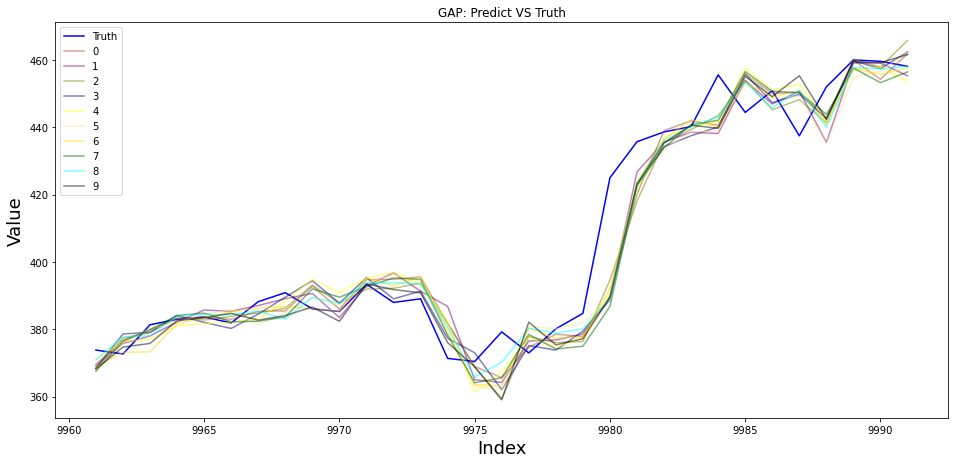

the gap of previous day MSE:90.61528315553844


the data fit by MinMaxScaler MSE:7353.304324901542


In [125]:
mse_or_1=[]
plt.figure(figsize=(16,16))
plt.subplot(211)
plt.title("GAP: Predict VS Truth")
plt.plot(test_or_1, 'blue', label="Truth")
for i in range(10):
    mse_or_1.append(mean_squared_error(test_or_1,predcit_or_list_1[i]))
    plt.plot(predcit_or_list_1[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print('the gap of previous day MSE:'+str(np.mean(mse_or_1)))
mse_1_sca=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,16))
plt.subplot(212)
plt.title("MinMAxScaler: Predict VS Truth Data")
plt.plot(scaler_out_1.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs_1)), 'red', label="Truth")
for i in range(10):
    mse_1_sca.append(mean_squared_error(scaler_out_1.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs_1)),scaler_out_1.inverse_transform(Predict_List_sca[i])))
    plt.plot(scaler_out_1.inverse_transform(Predict_List_sca[i]), color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print('the data fit by MinMaxScaler MSE:'+str(np.mean(mse_1_sca)))

## Data2(raw data)
The gap of previous day versus Fitted by MinMaxScaler

the gap of previous day MSE:135.424431323489


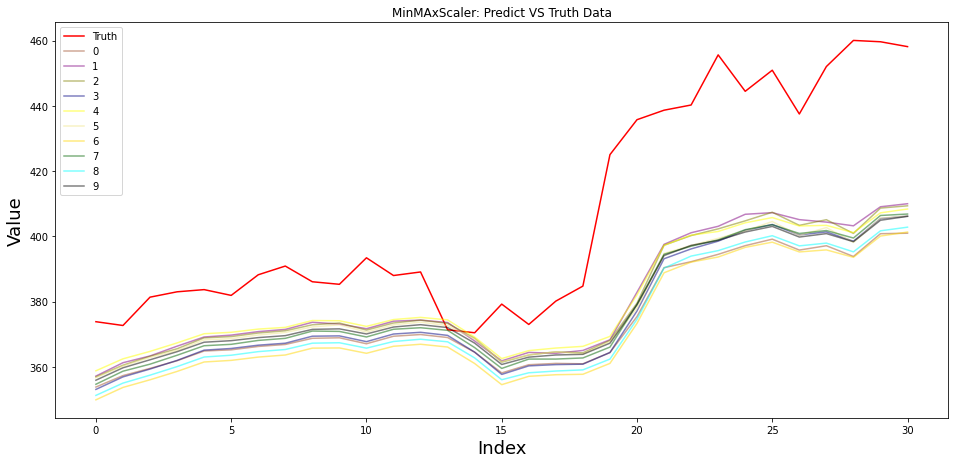

the data fit by MinMaxScaler MSE:1213.4555276450265


In [126]:
mse_or_2=[]
plt.figure(figsize=(16,16))
plt.subplot(211)
plt.title("GAP: Predict VS Truth")
plt.plot(test_or_2, 'blue', label="Truth")
for i in range(10):
    mse_or_2.append(mean_squared_error(test_or_2,predcit_or_list[i]))
    plt.plot(predcit_or_list[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print('the gap of previous day MSE:'+str(np.mean(mse_or_2)))

mse_2_sca=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,16))
plt.subplot(212)
plt.title("MinMAxScaler: Predict VS Truth Data")
plt.plot(scaler_out_2.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs)), 'red', label="Truth")
for i in range(10):
    mse_2_sca.append(mean_squared_error(scaler_out_2.inverse_transform(pd.DataFrame(LSTM_test_sca_outputs)),scaler_out_2.inverse_transform(Predict_List_data2_sca[i])))
    plt.plot(scaler_out_2.inverse_transform(Predict_List_data2_sca[i]), color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print('the data fit by MinMaxScaler MSE:'+str(np.mean(mse_2_sca)))

## Data1 versus Data2 
### Compare the gap of previous day prediction between data 1 and data 2

The data with technical indicators features versus Raw data 

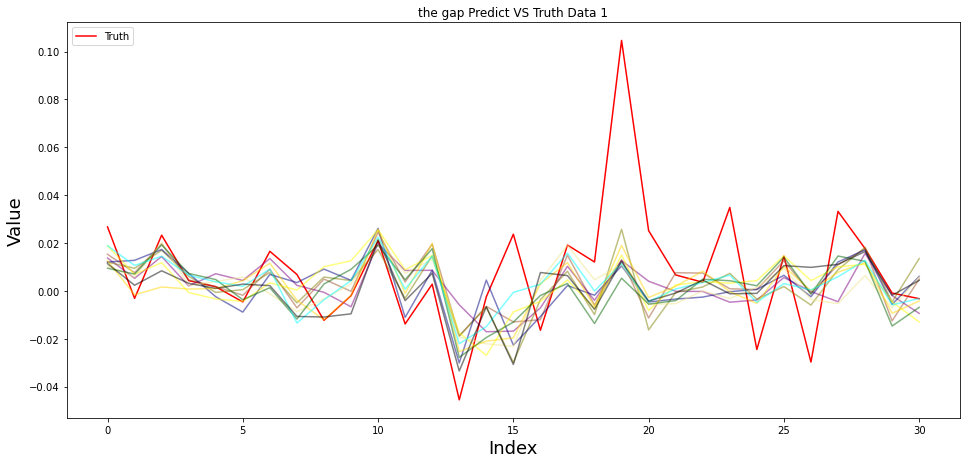

Data 1 MSE:0.0005706506187007371


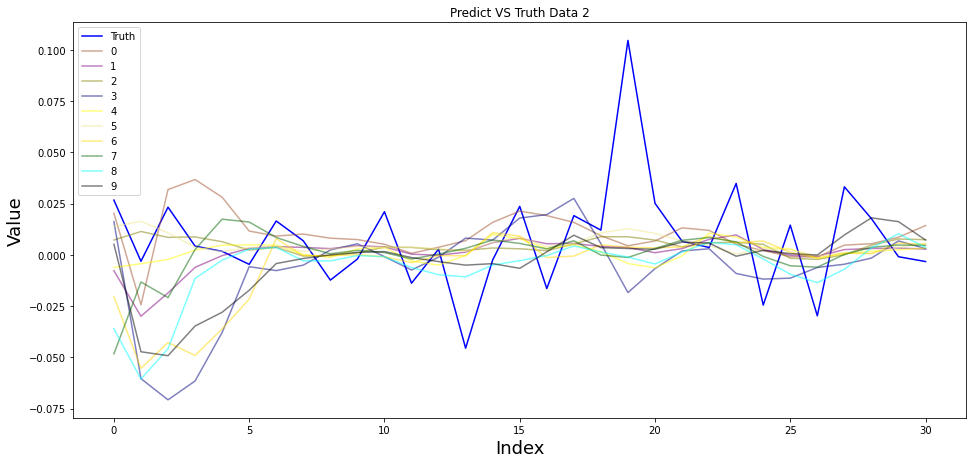

Data 2 MSE:0.0008784179054824572


In [127]:
mse_1=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,16))
plt.subplot(211)
plt.title("the gap Predict VS Truth Data 1")
plt.plot(LSTM_test_1D_outputs_1, 'red', label="Truth")
for i in range(10):
    mse_1.append(mean_squared_error(LSTM_test_1D_outputs_1,Predict_List[i]))
    plt.plot(Predict_List[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth'],loc='upper left')
plt.show()
print('Data 1 MSE:'+str(np.mean(mse_1)))

mse_2=[]
color=['sienna','purple','olive','navy','yellow','khaki','gold','darkgreen','cyan','black']
plt.figure(figsize=(16,16))
plt.subplot(212)
plt.title("Predict VS Truth Data 2")
plt.plot(LSTM_test_1D_outputs, 'blue', label="Truth")
for i in range(10):
    mse_2.append(mean_squared_error(LSTM_test_1D_outputs,Predict_List_data2[i]))
    plt.plot(Predict_List_data2[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print('Data 2 MSE:'+str(np.mean(mse_2)))

The line chart illustrate the difference clearly. The data1 is much better than data2, and data2 line is like a stright line after 5th, which have not any help, the price will remain same as previous day. So, the technical indiacators are prvide the meaningful features for the price predication. <br><br>But, there are some problems, the trend can't remain the one direction 2days, like the 13th-15th, when up to 14th from 13th, the trend change the direction to bottom, but the truth remian upward. And the 20th, the price has a big rising, but model can not to predict this big rising, and this the limitation of the dataset which only have price. <br><br>The model can not to predict big suddenly increasing, so I think we need to use the News or Filings to identify this situation, the 20th is 30/07/2020, and Apple reported Third Quarter Results Reports, which is called a historically strong quarter, a lot of News report this and all have the positive sentiments, for example, the News of CNBC which said "Apple posts blowout third quarter, with sales up 11% despite coronavirus disruptions "(URL: https://www.cnbc.com/2020/07/30/apple-aapl-earnings-q3-2020.html). <br><br>So, I believe the News, filings and reports are significant features for stock predication, and I will using NLP to research it ,for example use BERT to analysis sentiments.

### Compare the Close Price prediction between data 1 and data 2

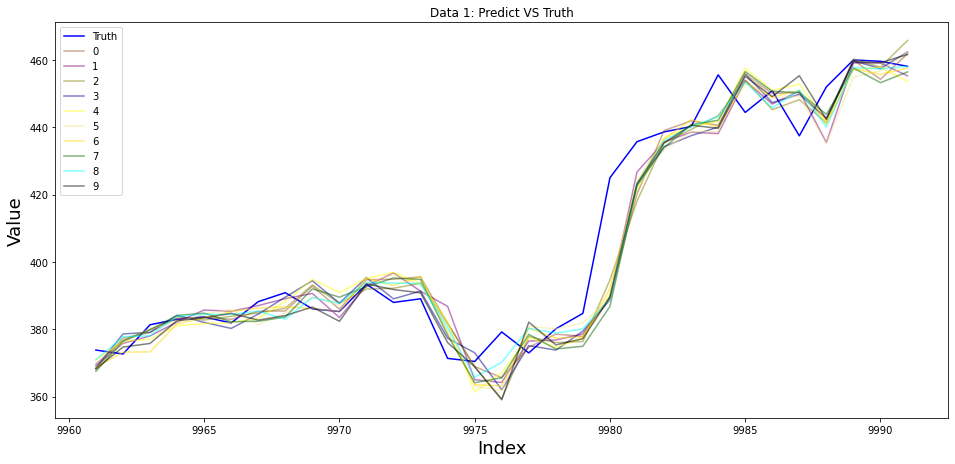

Data 1 Close Price MSE:90.61528315553844


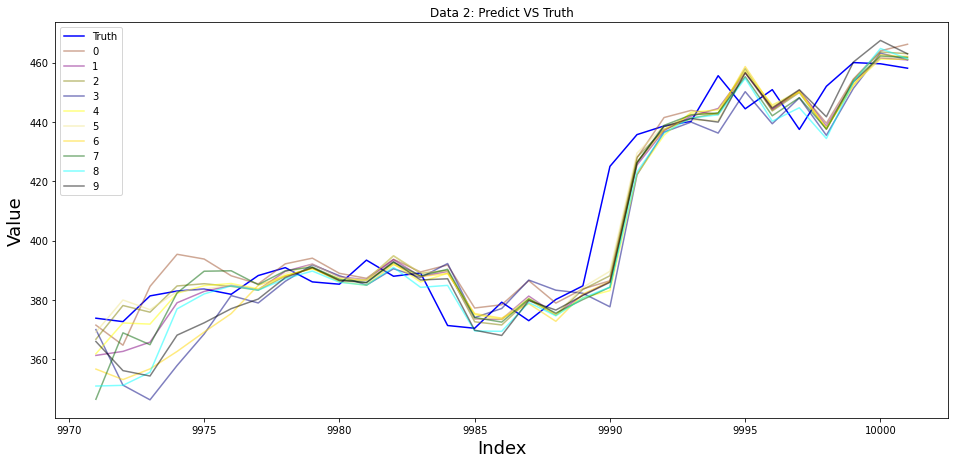

Data 2 Close Price MSE:135.424431323489


In [128]:
mse_or_1=[]
plt.figure(figsize=(16,16))
plt.subplot(211)
plt.title("Data 1: Predict VS Truth")
plt.plot(test_or_1, 'blue', label="Truth")
for i in range(10):
    mse_or_1.append(mean_squared_error(test_or_1,predcit_or_list_1[i]))
    plt.plot(predcit_or_list_1[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print('Data 1 Close Price MSE:'+str(np.mean(mse_or_1)))

mse_or_2=[]
plt.figure(figsize=(16,16))
plt.subplot(212)
plt.title("Data 2: Predict VS Truth")
plt.plot(test_or_2, 'blue', label="Truth")
for i in range(10):
    mse_or_2.append(mean_squared_error(test_or_2,predcit_or_list[i]))
    plt.plot(predcit_or_list[i], color[i], label='P', alpha = 0.5)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.legend(['Truth','0','1','2','3','4','5','6','7','8','9'],loc='upper left')
plt.show()
print('Data 2 Close Price MSE:'+str(np.mean(mse_or_2)))

## Conclusion

### The difference between different data is very clearly. And it shows the data 1 option 1 has the best score.The data 1 option 1 has technical indicators and rebuild to the gap of previous dayCclose Price, Adj Close Price, and to predict the gap of previous day.
### The MSE of gap prediction with data 1 is 0.00044, and the MSE of gap prediciton with data 2 is 0.00085. And the final result, the MSE of data 1 price prediction is 86.1199, the MSE of data 2 price prediction is 166.3624.
### So, the data has technical indicators and try to predict gap is much better than raw data to predict gap or price.
### But, the predication has  bias with the true price, so this model still have many problems, and there is serious problem, the stock movement is not precise, the stock movement is the one of important features of stock and stock prediction. And, as we know, the stock market is very complicated, so only to use the history data and technical indicators is insufficient.

## Future

### The stock market is really complicated, it has a lot of influencing factors, such as the golobal economy situation, politics and others. So, the predict stock market is a very complex task, and in the real life, we need predict a lot of different stocks, select the some stocks and build up a stable wonderful financial investment portfolio. Every different stock has different influencing factors.

### Since, a lot of external factors influence the stock market, so the Twitter, News, and annual reports 10-K 10-Q filings are very important for the stock movement prediction, and I am researching that using NLP technology, for example, BERT to analysis the Twitter, New, Filings sentiments, and believe it will to generate some significant features to stock dataset.

### As we see in this note, the technical indicators are important to stock predictions, so I believe the technical indicators are impotant features in the stock predication dataset. But in the note, the iterpretation of technical indicators have room for improvement.
### And we also realize that data only have price has limitation, the News or Filings are vety important, so I will to research the News, Filings and Report influence, using BERT to analysis sentiment.
### May be we can add Autoregressive Integrated Moving Average (ARIMA) which is a popular techniques for values prediction before the neural network era, and add it in the dataset if it can provide the important feature. And also wil do more complicated feature enginnerring and feature importance.

### At the model part, may be we can use  Generative Adversarial Network (GAN), LSTM and CNN, and to use the Bayesian optimisation to tune the GAN model hyper parameters. But, this is just some thinking and potential strategy, and I will to study it and may be to implement it.



# Disclaimer
### This note only use to study and researching. It is no providing any invesment suggestions, strategies and predictions. All investments have significant risk.
### All investments and all strategies are used at your own risk.

# Thanks for watching and welcome to leave comments